# Capstone Project - Hospital Compare

### Submitted by
    -Richa Goel
    -Ankur Johari
    -Annamalai Ganapathy
    -Ravi Ranjan Kumar



# Business Objective – Hospital Compare
Hospital compare is a consumer-oriented website developed by CMS that provides information on how well hospitals provide recommended care to their patients. CMS rates hospitals in the US on a scale of 1-5, with the objective of making it easier for patients and consumers to compare the quality of services offered by hospitals.
The ratings directly influence the choice of hospitals made by consumers and may significantly impact hospitals' revenues. Thus, it is extremely important for hospitals to understand the methodology that CMS uses for calculating the ratings so that they can work on improving the factors that affect their ratings.
This project is focused on developing an approach to calculate hospital ratings and using it to identify areas of improvement for certain hospitals. It also requires a thorough understanding of the rating system developed by CMS.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Step 1: Reading and Understanding the Data ( Hospital General Information.CSV)


In [2]:
##Encoding
import chardet
with open('Hospital General Information.csv', 'rb') as f:
    result = chardet.detect(f.read()) 
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [3]:
# Load the Hospital General Information
Hospital_Info_DF = pd.read_csv('Hospital General Information.csv',encoding=result['encoding'])

In [4]:
# Showing First 5 Rows by Slice method
Hospital_Info_DF[:5]

Provider ID                     Hospital Name                     Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1        10005     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10006    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET   
3        10007          MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
4        10008       CRENSHAW COMMUNITY HOSPITAL         101 HOSPITAL CIRCLE   

       City State  ZIP Code County Name  Phone Number         Hospital Type  \
0    DOTHAN    AL     36301     HOUSTON    3347938701  Acute Care Hospitals   
1      BOAZ    AL     35957    MARSHALL    2565938310  Acute Care Hospitals   
2  FLORENCE    AL     35631  LAUDERDALE    2567688400  Acute Care Hospitals   
3       OPP    AL     36467   COVINGTON    3344933541  Acute Care Hospitals   
4   LUVERNE    AL     36049    CRENSHAW    3343353374  Acute Care Hospitals   

                            Hospital Ownership Emergency Services  \
0  Government - Hospital District or Authority                Yes   
1  Government - Hospital District or Authority                Yes   
2  Government - Hospital District or Authority                Yes   
3               Voluntary non-profit - Private                Yes   
4                                  Proprietary                Yes   

  Meets criteria for meaningful use of EHRs Hospital overall rating  \
0                                         Y                       3   
1                                         Y                       3   
2                                         Y                       2   
3                                         Y                       3   
4                                         Y                       3   

  Hospital overall rating footnote Mortality national comparison  \
0                              NaN  Same as the National average   
1                              NaN    Below the National average   
2                              NaN    Below the National average   
3                              NaN  Same as the National average   
4                              NaN  Same as the National average   

  Mortality national comparison footnote Safety of care national comparison  \
0                                    NaN         Above the National average   
1                                    NaN       Same as the National average   
2                                    NaN       Same as the National average   
3                                    NaN       Same as the National average   
4                                    NaN                      Not Available   

         Safety of care national comparison footnote  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Results are not available for this reporting p...   

  Readmission national comparison Readmission national comparison footnote  \
0    Same as the National average                                      NaN   
1      Above the National average                                      NaN   
2    Same as the National average                                      NaN   
3      Below the National average                                      NaN   
4    Same as the National average                                      NaN   

  Patient experience national comparison  \
0             Below the National average   
1           Same as the National average   
2             Below the National average   
3           Same as the National average   
4                          Not Available   

     Patient experience national comparison footnote  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                         

- We can see Hospital General Information data is uploaded successfully

In [5]:
# feature type summary
Hospital_Info_DF.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 28 columns):
Provider ID                                                      4818 non-null int64
Hospital Name                                                    4818 non-null object
Address                                                          4818 non-null object
City                                                             4818 non-null object
State                                                            4818 non-null object
ZIP Code                                                         4818 non-null int64
County Name                                                      4803 non-null object
Phone Number                                                     4818 non-null int64
Hospital Type                                                    4818 non-null object
Hospital Ownership                                               4818 non-null object
Emergency Services                  

In [6]:
# Let's check the dataframe shapes
print("\nThe Hospital Info data size is: {} ".format(Hospital_Info_DF.shape))


The Hospital Info data size is: (4818, 28) 


- There are 4818 rows and 28 columns.

In [7]:
#How many columns with different datatypes are there?
Hospital_Info_DF.get_dtype_counts()

int64      3
object    25
dtype: int64

- There columns are numeric while 25 columns are text

In [8]:
# summary statistics for the numerical columns 
Hospital_Info_DF.describe().T

count          mean           std          min           25%  \
Provider ID   4818.0  2.679835e+05  1.566461e+05      10001.0  1.401852e+05   
ZIP Code      4818.0  5.395619e+04  2.691587e+04        603.0  3.301375e+04   
Phone Number  4818.0  5.849487e+09  2.329768e+09  936933841.0  4.017728e+09   

                       50%           75%           max  
Provider ID   2.600370e+05  3.902092e+05  6.701120e+05  
ZIP Code      5.539550e+04  7.601925e+04  9.992900e+04  
Phone Number  6.053298e+09  7.877564e+09  9.898943e+09

In [9]:
# summary statistics for the object and categorical columns
Hospital_Info_DF.describe(include=[np.object, pd.Categorical]).T

count unique  \
Hospital Name                                       4818   4617   
Address                                             4818   4789   
City                                                4818   2949   
State                                               4818     56   
County Name                                         4803   1565   
Hospital Type                                       4818      3   
Hospital Ownership                                  4818     10   
Emergency Services                                  4818      2   
Meets criteria for meaningful use of EHRs           4383      1   
Hospital overall rating                             4818      6   
Hospital overall rating footnote                    1342      5   
Mortality national comparison                       4818      4   
Mortality national comparison footnote              1337      3   
Safety of care national comparison                  4818      4   
Safety of care national comparison footnote         1892      3   
Readmission national comparison                     4818      4   
Readmission national comparison footnote            1002      3   
Patient experience national comparison              4818      4   
Patient experience national comparison footnote     1355      3   
Effectiveness of care national comparison           4818      4   
Effectiveness of care national comparison footnote  1116      3   
Timeliness of care national comparison              4818      4   
Timeliness of care national comparison footnote     1331      3   
Efficient use of medical imaging national compa...  4818      4   
Efficient use of medical imaging national compa...  2026      3   

                                                                                                  top  \
Hospital Name                                                                       MEMORIAL HOSPITAL   
Address                                                                            100 HOSPITAL DRIVE   
City                                                                                          CHICAGO   
State                                                                                              TX   
County Name                                                                               LOS ANGELES   
Hospital Type                                                                    Acute Care Hospitals   
Hospital Ownership                                                     Voluntary non-profit - Private   
Emergency Services                                                                                Yes   
Meets criteria for meaningful use of EHRs                                                           Y   
Hospital overall rating                                                                             3   
Hospital overall rating footnote                    There are too few measures or measure groups r...   
Mortality national comparison                                            Same as the National average   
Mortality national comparison footnote              Results are not available for this reporting p...   
Safety of care national comparison                                                      Not Available   
Safety of care national comparison footnote         Results are not available for this reporting p...   
Readmission national comparison                                          Same as the National average   
Readmission national comparison footnote            Results are not available for this reporting p...   
Patient experience national comparison                                                  Not Available   
Patient experience national comparison footnote     Results are not available for this reporting p...   
Effectiveness of care national comparison                                Same as the National average   
Effectiveness of care national comparison footnote  Results are not available for this reporting p...  

In [10]:
# Copy the Data frame for future before missing value imputation 
Hospital_Info_DF_ORG = Hospital_Info_DF.copy()

In [11]:
# Let's try to find out the Unique value for each columns 
for x in list(Hospital_Info_DF.columns):
    
    # get a list of unique values
    n = Hospital_Info_DF[x].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(x)
        print('*****************************************************************************************')
        print(n)
    else:
        print(x + ': ' +str(len(n)) + ' unique values')
        print('*****************************************************************************************')
        print(n)

Provider ID: 4818 unique values
*****************************************************************************************
[ 10001  10005  10006 ... 650001 650003 660001]
Hospital Name: 4617 unique values
*****************************************************************************************
['SOUTHEAST ALABAMA MEDICAL CENTER' 'MARSHALL MEDICAL CENTER SOUTH'
 'ELIZA COFFEE MEMORIAL HOSPITAL' ... 'GUAM MEMORIAL HOSPITAL AUTHORITY'
 'GUAM REGIONAL MEDICAL CITY' 'COMMONWEALTH HEALTH CENTER']
Address: 4789 unique values
*****************************************************************************************
['1108 ROSS CLARK CIRCLE' '2505 U S HIGHWAY 431 NORTH'
 '205 MARENGO STREET' ... '85O GOV CARLOS G CAMACHO ROAD' '133 ROUTE 3'
 'PO BOX 409CK, NAVY HILL ROAD']
City: 2949 unique values
*****************************************************************************************
['DOTHAN' 'BOAZ' 'FLORENCE' ... 'TAMUNING' 'DEDEDO' 'GARAPAN']
State: 56 unique values
*************************

### Step 2: Missing Value Imputation and Analysis ( Hospital General Information.CSV)

In [12]:
# Finding the Missing Data Count & Percentage of our Data Frame
total = Hospital_Info_DF.isnull().sum().sort_values(ascending = False)
percent = (Hospital_Info_DF.isnull().sum()/Hospital_Info_DF.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data.Total != 0]
missing_data

Total    Percent
Readmission national comparison footnote             3816  79.202989
Effectiveness of care national comparison footnote   3702  76.836862
Timeliness of care national comparison footnote      3487  72.374429
Mortality national comparison footnote               3481  72.249896
Hospital overall rating footnote                     3476  72.146119
Patient experience national comparison footnote      3463  71.876297
Safety of care national comparison footnote          2926  60.730594
Efficient use of medical imaging national compa...   2792  57.949357
Meets criteria for meaningful use of EHRs             435   9.028643
County Name                                            15   0.311333

- We have maximum percentage of Missing Data in footnote columns - 'Readmission national comparison footnote', 'Effectiveness of care national comparison footnote', 'Timeliness of care national comparison footnote', 'Mortality national comparison footnote', 'Hospital overall rating footnote', 'Patient experience national comparison footnote', 'Safety of care national comparison footnote', 'Efficient use of medical imaging national comparison footnote' . So these columns can be dropped as they are insignificant.

In [13]:
## We can See out Foot note fields are missing and they don't have much significance  , so let's drop them

coloumn_to_be_dropped = ['Readmission national comparison footnote',
                        'Effectiveness of care national comparison footnote',
                        'Timeliness of care national comparison footnote',
                        'Mortality national comparison footnote',
                        'Hospital overall rating footnote',
                        'Patient experience national comparison footnote',
                        'Safety of care national comparison footnote',
                        'Efficient use of medical imaging national comparison footnote']

Hospital_Info_DF.drop(coloumn_to_be_dropped, inplace=True, axis=1)

- Hospital overall rating is an important column with CMS provided rating. Let us analyse it.

In [14]:
## We can see that Hospital overall rating has below possible value
Hospital_Info_DF['Hospital overall rating'].value_counts()

3                1772
Not Available    1170
4                 964
2                 684
1                 117
5                 111
Name: Hospital overall rating, dtype: int64

- 1170 values are Not Available in Hospital overall rating column. We can filter the dataframe to process the hospitals having Hospital overall rating values only.

In [15]:
## Let's drop the rows where Rating is not available 
Hospital_Info_DF = Hospital_Info_DF[Hospital_Info_DF['Hospital overall rating'] != 'Not Available' ]
Hospital_Info_DF['Hospital overall rating'].value_counts()

3    1772
4     964
2     684
1     117
5     111
Name: Hospital overall rating, dtype: int64

- Column Meets criteria for meaningful use of EHRs

In [16]:
## We can see that Meets criteria for meaningful use of EHRs has below possible value
Hospital_Info_DF['Meets criteria for meaningful use of EHRs'].value_counts()

Y    3452
Name: Meets criteria for meaningful use of EHRs, dtype: int64

In [17]:
# filling a null values using fillna() with value as N
Hospital_Info_DF['Meets criteria for meaningful use of EHRs'].fillna("N", inplace = True)  

In [18]:
## We can see that Meets criteria for meaningful use of EHRs has below possible value
Hospital_Info_DF['Meets criteria for meaningful use of EHRs'].value_counts()

Y    3452
N     196
Name: Meets criteria for meaningful use of EHRs, dtype: int64

In [19]:
Hospital_Info_DF1 = Hospital_Info_DF[Hospital_Info_DF['County Name'].isna()]
Hospital_Info_DF1

Provider ID                           Hospital Name  \
919         20024      CENTRAL PENINSULA GENERAL HOSPITAL   
4812       480001       ROY LESTER SCHNEIDER HOSPITAL,THE   
4813       480002  GOV JUAN F LUIS HOSPITAL & MEDICAL CTR   
4815       650001        GUAM MEMORIAL HOSPITAL AUTHORITY   

                                    Address       City State  ZIP Code  \
919                      250 HOSPITAL PLACE   SOLDOTNA    AK     99669   
4812                      9048 SUGAR ESTATE  ST THOMAS    VI       801   
4813  #4007 EST DIAMOND RUBY, CHRISTIANSTED   ST CROIX    VI       820   
4815          85O GOV CARLOS G CAMACHO ROAD   TAMUNING    GU     96913   

     County Name  Phone Number         Hospital Type  \
919          NaN    9072624404  Acute Care Hospitals   
4812         NaN    8097768311  Acute Care Hospitals   
4813         NaN    3407786311  Acute Care Hospitals   
4815         NaN    6716472552  Acute Care Hospitals   

                Hospital Ownership Emergency Services  \
919   Voluntary non-profit - Other                Yes   
4812            Government - Local                Yes   
4813            Government - State                Yes   
4815            Government - Local                Yes   

     Meets criteria for meaningful use of EHRs Hospital overall rating  \
919                                          N                       3   
4812                                         N                       2   
4813                                         N                       2   
4815                                         Y                       2   

     Mortality national comparison Safety of care national comparison  \
919   Same as the National average       Same as the National average   
4812  Same as the National average       Same as the National average   
4813  Same as the National average       Same as the National average   
4815    Below the National average                      Not Available   

     Readmission national comparison Patient experience national comparison  \
919     Same as the National average           Same as the National average   
4812    Same as the National average             Below the National average   
4813    Same as the National average             Below the National average   
4815    Same as the National average                          Not Available   

     Effectiveness of care national comparison  \
919               Same as the National average   
4812                Below the National average   
4813                Below the National average   
4815                Below the National average   

     Timeliness of care national comparison  \
919              Below the National average   
4812                          Not Available   
4813                          Not Available   
4815                          Not Available   

     Efficient use of medical imaging national comparison  
919                        Same as the National average    
4812                       Same as the National average    
4813                                      Not Available    
4815                                      Not Available

In [20]:
# As we can see we have only 4 records where County name is not available 
# we are not dropping these records and imputing the missing value with 'XXXX'
Hospital_Info_DF['County Name'].fillna("XXXX", inplace = True)  

In [21]:
# Finding the Missing Data Count & Percentage of our Data Frame
total = Hospital_Info_DF.isnull().sum().sort_values(ascending = False)
percent = (Hospital_Info_DF.isnull().sum()/Hospital_Info_DF.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data.Total != 0]
missing_data

Empty DataFrame
Columns: [Total, Percent]
Index: []

- There are no missing value present in any columns now

#### Processing each column of Hospital General Information File to replace Not Available values to NaN and converting Categorical values to Numeric values

#### Mortality national comparison

In [22]:
## We can see that Mortality national comparison has below possible value
Hospital_Info_DF['Mortality national comparison'].value_counts()

Same as the National average    2618
Above the National average       402
Below the National average       343
Not Available                    285
Name: Mortality national comparison, dtype: int64

In [23]:
# Convert the variable 'Mortality national comparison' to numeric value  
def National_conversion(x):
    "We are converting these value as per below logic "
    if x == 'Not Available':
        return np.NaN
    elif x == 'Below the National average':
        return 0
    elif x == 'Same as the National average':
        return 1
    elif x == 'Above the National average':
        return 2
    else:
        return 3

- Function to convert Categorical Text values to Numeric and replace 'Not Available' by NaN

#### Applying the above function to below seven colmns to create numerical Rank columns for each
- Mortality national comparison
- Safety of care national comparison
- Readmission national comparison
- Patient experience national comparison
- Effectiveness of care national comparison
- Timeliness of care national comparison
- Efficient use of medical imaging national comparison

In [24]:
# Conversion for 'Mortality national comparison'

Hospital_Info_DF['Mortality_National_Comp_Rank'] = Hospital_Info_DF['Mortality national comparison'].apply(
    lambda x: National_conversion(x))

Hospital_Info_DF['Mortality_National_Comp_Rank'].fillna(Hospital_Info_DF['Mortality_National_Comp_Rank'].mean(),inplace=True)

Hospital_Info_DF['Mortality_National_Comp_Rank'] =Hospital_Info_DF['Mortality_National_Comp_Rank'].astype('int8')


# Same conversion for 'Safety of care national comparison'

Hospital_Info_DF['Safety_National_Comp_Rank'] = Hospital_Info_DF['Safety of care national comparison'].apply(lambda x: National_conversion(x))

Hospital_Info_DF['Safety_National_Comp_Rank'].fillna(Hospital_Info_DF['Safety_National_Comp_Rank'].mean(),inplace=True)

Hospital_Info_DF['Safety_National_Comp_Rank'] =Hospital_Info_DF['Safety_National_Comp_Rank'].astype('int8')



# Same conversion for 'Readmission national comparison'

Hospital_Info_DF['Readmission_National_Comp_Rank'] = Hospital_Info_DF['Readmission national comparison'].apply(
    lambda x: National_conversion(x))

Hospital_Info_DF['Readmission_National_Comp_Rank'].fillna(Hospital_Info_DF['Readmission_National_Comp_Rank'].mean(),inplace=True)
                                            
Hospital_Info_DF['Readmission_National_Comp_Rank'] =Hospital_Info_DF['Readmission_National_Comp_Rank'].astype('int8')



# Same conversion for 'Patient experience national comparison'

Hospital_Info_DF['Patient_experience_National_Comp_Rank'] = Hospital_Info_DF['Patient experience national comparison'].apply(
    lambda x: National_conversion(x))

Hospital_Info_DF['Patient_experience_National_Comp_Rank'].fillna(Hospital_Info_DF['Patient_experience_National_Comp_Rank'].mean(),inplace=True)

                                            
Hospital_Info_DF['Patient_experience_National_Comp_Rank'] =Hospital_Info_DF['Patient_experience_National_Comp_Rank'].astype('int8')



# Same conversion for 'Effectiveness of care national comparison'

Hospital_Info_DF['Effectiveness_Care_National_Comp_Rank'] = Hospital_Info_DF['Effectiveness of care national comparison'].apply(lambda x: National_conversion(x))

Hospital_Info_DF['Effectiveness_Care_National_Comp_Rank'].fillna(Hospital_Info_DF['Effectiveness_Care_National_Comp_Rank'].mean(),inplace=True)

Hospital_Info_DF['Effectiveness_Care_National_Comp_Rank'] = Hospital_Info_DF['Effectiveness_Care_National_Comp_Rank'].astype('int8')



# Same conversion for 'Timeliness of care national comparison'

Hospital_Info_DF['Timeliness_Care_National_Comp_Rank'] = Hospital_Info_DF['Timeliness of care national comparison'].apply(lambda x: National_conversion(x))                                                                            

Hospital_Info_DF['Timeliness_Care_National_Comp_Rank'].fillna(Hospital_Info_DF['Timeliness_Care_National_Comp_Rank'].mean(),inplace=True)
                                            
Hospital_Info_DF['Timeliness_Care_National_Comp_Rank'] = Hospital_Info_DF['Timeliness_Care_National_Comp_Rank'].astype('int8')



# Same conversion for 'Efficient use of medical imaging national comparison'

Hospital_Info_DF['Efficient_MI_use_National_Comp_Rank'] = Hospital_Info_DF['Efficient use of medical imaging national comparison'].apply(lambda x: National_conversion(x))                                                                             
Hospital_Info_DF['Efficient_MI_use_National_Comp_Rank'].fillna(Hospital_Info_DF['Efficient_MI_use_National_Comp_Rank'].mean(),inplace=True)                                                                             
Hospital_Info_DF['Efficient_MI_use_National_Comp_Rank'] = Hospital_Info_DF['Efficient_MI_use_National_Comp_Rank'].astype('int8')



In [25]:
# Checking conversion for one column : Mortality_National_Comp_Rank
Hospital_Info_DF['Mortality_National_Comp_Rank'].head(10)

0     1
1     0
2     0
3     1
4     1
5     1
6     0
7     1
9     0
10    1
Name: Mortality_National_Comp_Rank, dtype: int8

In [26]:
Hospital_Info_DF.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Meets criteria for meaningful use of EHRs',
       'Hospital overall rating', 'Mortality national comparison',
       'Safety of care national comparison', 'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison',
       'Mortality_National_Comp_Rank', 'Safety_National_Comp_Rank',
       'Readmission_National_Comp_Rank',
       'Patient_experience_National_Comp_Rank',
       'Effectiveness_Care_National_Comp_Rank',
       'Timeliness_Care_National_Comp_Rank',
       'Efficient_MI_use_National_Comp_Rank'],
      dtype='object')

 - New Rank columns created are :
       - 'Mortality_National_Comp_Rank', 
       - 'Safety_National_Comp_Rank',
       - 'Readmission_National_Comp_Rank',
       - 'Patient_experience_National_Comp_Rank',
       - 'Effectiveness_Care_National_Comp_Rank',
       - 'Timeliness_Care_National_Comp_Rank',
       - 'Efficient_MI_use_National_Comp_Rank'

In [27]:
Hospital_Info_DF.head(10)

Provider ID                     Hospital Name  \
0         10001  SOUTHEAST ALABAMA MEDICAL CENTER   
1         10005     MARSHALL MEDICAL CENTER SOUTH   
2         10006    ELIZA COFFEE MEMORIAL HOSPITAL   
3         10007          MIZELL MEMORIAL HOSPITAL   
4         10008       CRENSHAW COMMUNITY HOSPITAL   
5         10011                 ST VINCENT'S EAST   
6         10012    DEKALB REGIONAL MEDICAL CENTER   
7         10016     SHELBY BAPTIST MEDICAL CENTER   
9         10019    HELEN KELLER MEMORIAL HOSPITAL   
10        10021               DALE MEDICAL CENTER   

                         Address        City State  ZIP Code County Name  \
0         1108 ROSS CLARK CIRCLE      DOTHAN    AL     36301     HOUSTON   
1     2505 U S HIGHWAY 431 NORTH        BOAZ    AL     35957    MARSHALL   
2             205 MARENGO STREET    FLORENCE    AL     35631  LAUDERDALE   
3                  702 N MAIN ST         OPP    AL     36467   COVINGTON   
4            101 HOSPITAL CIRCLE     LUVERNE    AL     36049    CRENSHAW   
5     50 MEDICAL PARK EAST DRIVE  BIRMINGHAM    AL     35235   JEFFERSON   
6           200 MED CENTER DRIVE  FORT PAYNE    AL     35968     DE KALB   
7        1000 FIRST STREET NORTH   ALABASTER    AL     35007      SHELBY   
9   1300 SOUTH MONTGOMERY AVENUE   SHEFFIELD    AL     35660     COLBERT   
10              126 HOSPITAL AVE       OZARK    AL     36360        DALE   

    Phone Number         Hospital Type  \
0     3347938701  Acute Care Hospitals   
1     2565938310  Acute Care Hospitals   
2     2567688400  Acute Care Hospitals   
3     3344933541  Acute Care Hospitals   
4     3343353374  Acute Care Hospitals   
5     2058383122  Acute Care Hospitals   
6     2568453150  Acute Care Hospitals   
7     2056208100  Acute Care Hospitals   
9     2563864556  Acute Care Hospitals   
10    3347742601  Acute Care Hospitals   

                             Hospital Ownership Emergency Services  \
0   Government - Hospital District or Authority                Yes   
1   Government - Hospital District or Authority                Yes   
2   Government - Hospital District or Authority                Yes   
3                Voluntary non-profit - Private                Yes   
4                                   Proprietary                Yes   
5                Voluntary non-profit - Private                Yes   
6                                   Proprietary                Yes   
7                Voluntary non-profit - Private                Yes   
9   Government - Hospital District or Authority                Yes   
10  Government - Hospital District or Authority                Yes   

   Meets criteria for meaningful use of EHRs Hospital overall rating  \
0                                          Y                       3   
1                                          Y                       3   
2                                          Y                       2   
3                                          Y                       3   
4                                          Y                       3   
5                                          Y                       2   
6                                          Y                       3   
7                                          Y                       3   
9                                          Y                       2   
10                                         Y                       4   

   Mortality national comparison Safety of care national comparison  \
0   Same as the National average         Above the National average   
1     Below the National average       Same as the National average   
2     Below the National average       Same as the National average   
3   Same as the National average       Same as the National average   
4   Same as the National average                      Not Available   
5   Same as the National average         Below the National average   
6     Below the National average       Same as the National

In [28]:
# Let's try to find out the Unique value for each columns 
for x in list(Hospital_Info_DF.columns):
    
    # get a list of unique values
    n = Hospital_Info_DF[x].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(x)
        print('*****************************************************************************************')
        print(n)
    else:
        print(x + ': ' +str(len(n)) + ' unique values')
        print('*****************************************************************************************')
        print(n)

Provider ID: 3648 unique values
*****************************************************************************************
[ 10001  10005  10006 ... 480001 480002 650001]
Hospital Name: 3497 unique values
*****************************************************************************************
['SOUTHEAST ALABAMA MEDICAL CENTER' 'MARSHALL MEDICAL CENTER SOUTH'
 'ELIZA COFFEE MEMORIAL HOSPITAL' ... 'ROY LESTER SCHNEIDER HOSPITAL,THE'
 'GOV JUAN F LUIS HOSPITAL & MEDICAL CTR'
 'GUAM MEMORIAL HOSPITAL AUTHORITY']
Address: 3628 unique values
*****************************************************************************************
['1108 ROSS CLARK CIRCLE' '2505 U S HIGHWAY 431 NORTH'
 '205 MARENGO STREET' ... '9048 SUGAR ESTATE'
 '#4007 EST DIAMOND RUBY, CHRISTIANSTED' '85O GOV CARLOS G CAMACHO ROAD']
City: 2289 unique values
*****************************************************************************************
['DOTHAN' 'BOAZ' 'FLORENCE' ... 'ST THOMAS' 'ST CROIX' 'TAMUNING']
State: 53 

#### As we have converted below columns to Rank columns so these columns can be dropped 
- Mortality national comparison
- Safety of care national comparison
- Readmission national comparison
- Patient experience national comparison
- Effectiveness of care national comparison
- Timeliness of care national comparison
- Efficient use of medical imaging national comparison

In [29]:
## Take a copy of data frame before dropping

Hospital_Info_DF_ORG1 = Hospital_Info_DF.copy()

In [30]:
## Dropping the fields which are not required

column_to_be_dropped = ['Mortality national comparison',
                        'Safety of care national comparison',
                        'Readmission national comparison',
                        'Patient experience national comparison',
                        'Effectiveness of care national comparison',
                        'Timeliness of care national comparison',
                        'Efficient use of medical imaging national comparison']
                        
Hospital_Info_DF.drop(column_to_be_dropped, inplace=True, axis=1)

In [31]:
# For Modelling we just need Acute Care hospital , other type hospital can be dropped 

Hospital_Info_DF = Hospital_Info_DF[Hospital_Info_DF['Hospital Type']=='Acute Care Hospitals']

In [32]:
## Lets check the Data after dropping the columns 
Hospital_Info_DF.head(10)

Provider ID                     Hospital Name  \
0         10001  SOUTHEAST ALABAMA MEDICAL CENTER   
1         10005     MARSHALL MEDICAL CENTER SOUTH   
2         10006    ELIZA COFFEE MEMORIAL HOSPITAL   
3         10007          MIZELL MEMORIAL HOSPITAL   
4         10008       CRENSHAW COMMUNITY HOSPITAL   
5         10011                 ST VINCENT'S EAST   
6         10012    DEKALB REGIONAL MEDICAL CENTER   
7         10016     SHELBY BAPTIST MEDICAL CENTER   
9         10019    HELEN KELLER MEMORIAL HOSPITAL   
10        10021               DALE MEDICAL CENTER   

                         Address        City State  ZIP Code County Name  \
0         1108 ROSS CLARK CIRCLE      DOTHAN    AL     36301     HOUSTON   
1     2505 U S HIGHWAY 431 NORTH        BOAZ    AL     35957    MARSHALL   
2             205 MARENGO STREET    FLORENCE    AL     35631  LAUDERDALE   
3                  702 N MAIN ST         OPP    AL     36467   COVINGTON   
4            101 HOSPITAL CIRCLE     LUVERNE    AL     36049    CRENSHAW   
5     50 MEDICAL PARK EAST DRIVE  BIRMINGHAM    AL     35235   JEFFERSON   
6           200 MED CENTER DRIVE  FORT PAYNE    AL     35968     DE KALB   
7        1000 FIRST STREET NORTH   ALABASTER    AL     35007      SHELBY   
9   1300 SOUTH MONTGOMERY AVENUE   SHEFFIELD    AL     35660     COLBERT   
10              126 HOSPITAL AVE       OZARK    AL     36360        DALE   

    Phone Number         Hospital Type  \
0     3347938701  Acute Care Hospitals   
1     2565938310  Acute Care Hospitals   
2     2567688400  Acute Care Hospitals   
3     3344933541  Acute Care Hospitals   
4     3343353374  Acute Care Hospitals   
5     2058383122  Acute Care Hospitals   
6     2568453150  Acute Care Hospitals   
7     2056208100  Acute Care Hospitals   
9     2563864556  Acute Care Hospitals   
10    3347742601  Acute Care Hospitals   

                             Hospital Ownership Emergency Services  \
0   Government - Hospital District or Authority                Yes   
1   Government - Hospital District or Authority                Yes   
2   Government - Hospital District or Authority                Yes   
3                Voluntary non-profit - Private                Yes   
4                                   Proprietary                Yes   
5                Voluntary non-profit - Private                Yes   
6                                   Proprietary                Yes   
7                Voluntary non-profit - Private                Yes   
9   Government - Hospital District or Authority                Yes   
10  Government - Hospital District or Authority                Yes   

   Meets criteria for meaningful use of EHRs Hospital overall rating  \
0                                          Y                       3   
1                                          Y                       3   
2                                          Y                       2   
3                                          Y                       3   
4                                          Y                       3   
5                                          Y                       2   
6                                          Y                       3   
7                                          Y                       3   
9                                          Y                       2   
10                                         Y                       4   

    Mortality_National_Comp_Rank  Safety_National_Comp_Rank  \
0                              1                          2   
1                              0                          1   
2                              0                          1   
3                              1                          1   
4                              1                          1   
5                              1                          0   
6                              0                          1   
7                              1                    

In [33]:
### For Modelling we just need Overall rating and other 7 group comparison Rank columns so lets create one new data frame for 
###all the columns required for modeling

Hospital_Info_DF2 = Hospital_Info_DF[['Hospital overall rating','Mortality_National_Comp_Rank','Safety_National_Comp_Rank',
                                      'Readmission_National_Comp_Rank','Patient_experience_National_Comp_Rank',
                                     'Effectiveness_Care_National_Comp_Rank','Timeliness_Care_National_Comp_Rank',
                                     'Efficient_MI_use_National_Comp_Rank']]

In [34]:
## Check data frame 
Hospital_Info_DF2.head(5)

Hospital overall rating  Mortality_National_Comp_Rank  \
0                       3                             1   
1                       3                             0   
2                       2                             0   
3                       3                             1   
4                       3                             1   

   Safety_National_Comp_Rank  Readmission_National_Comp_Rank  \
0                          2                               1   
1                          1                               2   
2                          1                               1   
3                          1                               0   
4                          1                               1   

   Patient_experience_National_Comp_Rank  \
0                                      0   
1                                      1   
2                                      0   
3                                      1   
4                                      1   

   Effectiveness_Care_National_Comp_Rank  Timeliness_Care_National_Comp_Rank  \
0                                      1                                   1   
1                                      1                                   2   
2                                      1                                   2   
3                                      1                                   2   
4                                      1                                   2   

   Efficient_MI_use_National_Comp_Rank  
0                                    1  
1                                    0  
2                                    1  
3                                    0  
4                                    0

In [35]:
## Check info
Hospital_Info_DF2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3061 entries, 0 to 4815
Data columns (total 8 columns):
Hospital overall rating                  3061 non-null object
Mortality_National_Comp_Rank             3061 non-null int8
Safety_National_Comp_Rank                3061 non-null int8
Readmission_National_Comp_Rank           3061 non-null int8
Patient_experience_National_Comp_Rank    3061 non-null int8
Effectiveness_Care_National_Comp_Rank    3061 non-null int8
Timeliness_Care_National_Comp_Rank       3061 non-null int8
Efficient_MI_use_National_Comp_Rank      3061 non-null int8
dtypes: int8(7), object(1)
memory usage: 68.8+ KB


In [36]:
## For Modelling Rating should be a numerical value so lets convert overall rating to numeric column
Hospital_Info_DF2['Hospital overall rating']= Hospital_Info_DF2['Hospital overall rating'].astype('int8')

  - Hospital_Info_DF2 is final dataframe with Hospital Overall Rating and other 7 Group data from hospital General             information. We will use this data frame for modelling

## Other Group file data

### Reading and Understanding (Readmissions and Deaths)

In [37]:
import chardet
with open('Readmissions and Deaths - Hospital.csv', 'rb') as f:
    result = chardet.detect(f.read()) 
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [38]:
# Load the CSV  
Radm_Mort = pd.read_csv('Readmissions and Deaths - Hospital.csv',encoding=result['encoding'])

In [39]:
# Showing First 5 Rows
Radm_Mort.head()

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                                        Measure Name    Measure ID  \
0  Acute Myocardial Infarction (AMI) 30-Day Morta...   MORT_30_AMI   
1                                Death rate for CABG  MORT_30_CABG   
2  Death rate for chronic obstructive pulmonary d...  MORT_30_COPD   
3           Heart failure (HF) 30-Day Mortality Rate    MORT_30_HF   
4               Pneumonia (PN) 30-Day Mortality Rate    MORT_30_PN   

                  Compared to National Denominator Score Lower Estimate  \
0  No Different than the National Rate         733  12.5           10.6   
1  No Different than the National Rate         278   4.2            2.6   
2  No Different than the National Rate         586   9.3            7.3   
3  No Different than the National Rate         797  12.4           10.4   
4  No Different than the National Rate         599  15.5           13.0   

  Higher Estimate Footnote Measure Start Date Measure End Date  
0            14.9      NaN         07/01/2012       06/30/2015  
1             6.8      NaN         07/01/2012       06/30/2015  
2            11.8      NaN         07/01/2012       06/30/2015  
3            14.6      NaN         07/01/2012       06/30/2015  
4            18.5      NaN         07/01/2012       06/30/2015

In [40]:
# Let's check the dataframe shapes
print("\nThe   data size is: {} ".format(Radm_Mort.shape)) 


The   data size is: (67452, 18) 


-In Readmission and Mortality there are  67452 rows and 18 columns 

In [41]:
#How many columns with different datatypes are there?
Radm_Mort.get_dtype_counts()

int64      3
object    15
dtype: int64

In [42]:
# summary statistics for the numerical columns 
Radm_Mort.describe().T

count          mean           std          min           25%  \
Provider ID   67452.0  2.679835e+05  1.566310e+05      10001.0  1.401850e+05   
ZIP Code      67452.0  5.395619e+04  2.691327e+04        603.0  3.301300e+04   
Phone Number  67452.0  5.849487e+09  2.329544e+09  936933841.0  4.017694e+09   

                       50%           75%           max  
Provider ID   2.600370e+05  3.902110e+05  6.701120e+05  
ZIP Code      5.539550e+04  7.602000e+04  9.992900e+04  
Phone Number  6.053298e+09  7.877569e+09  9.898943e+09

In [43]:
# summary statistics for the object and categorical columns
Radm_Mort.describe(include=[np.object, pd.Categorical]).T

count unique  \
Hospital Name         67452   4617   
Address               67452   4789   
City                  67452   2949   
State                 67452     56   
County Name           67242   1565   
Measure Name          67452     14   
Measure ID            67452     14   
Compared to National  67452      5   
Denominator           67452   2772   
Score                 67452    259   
Lower Estimate        67452    238   
Higher Estimate       67452    292   
Footnote              25742      5   
Measure Start Date    67452      2   
Measure End Date      67452      1   

                                                                    top   freq  
Hospital Name                                         MEMORIAL HOSPITAL    210  
Address                                              100 HOSPITAL DRIVE     98  
City                                                            CHICAGO    406  
State                                                                TX   5698  
County Name                                                 LOS ANGELES   1162  
Measure Name                       Pneumonia (PN) 30-Day Mortality Rate   4818  
Measure ID                                                   MORT_30_HF   4818  
Compared to National                No Different than the National Rate  39289  
Denominator                                               Not Available  25742  
Score                                                     Not Available  25742  
Lower Estimate                                            Not Available  25742  
Higher Estimate                                           Not Available  25742  
Footnote              5 - Results are not available for this reporti...  11280  
Measure Start Date                                           07/01/2012  62634  
Measure End Date                                             06/30/2015  67452

In [44]:
# Let's try to find out the Unique value for each columns 
for x in list(Radm_Mort.columns):
    
    # get a list of unique values
    n = Radm_Mort[x].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(x)
        print('*****************************************************************************************')
        print(n)
    else:
        print(x + ': ' +str(len(n)) + ' unique values')
        print('*****************************************************************************************')
        print(n)

Provider ID: 4818 unique values
*****************************************************************************************
[ 10001  10005  10006 ... 650001 650003 660001]
Hospital Name: 4617 unique values
*****************************************************************************************
['SOUTHEAST ALABAMA MEDICAL CENTER' 'MARSHALL MEDICAL CENTER SOUTH'
 'ELIZA COFFEE MEMORIAL HOSPITAL' ... 'GUAM MEMORIAL HOSPITAL AUTHORITY'
 'GUAM REGIONAL MEDICAL CITY' 'COMMONWEALTH HEALTH CENTER']
Address: 4789 unique values
*****************************************************************************************
['1108 ROSS CLARK CIRCLE' '2505 U S HIGHWAY 431 NORTH'
 '205 MARENGO STREET' ... '85O GOV CARLOS G CAMACHO ROAD' '133 ROUTE 3'
 'PO BOX 409CK, NAVY HILL ROAD']
City: 2949 unique values
*****************************************************************************************
['DOTHAN' 'BOAZ' 'FLORENCE' ... 'TAMUNING' 'DEDEDO' 'GARAPAN']
State: 56 unique values
*************************

- Observation

- There are some columns which has Not avaiable value 
- In this CSV file there are two type of measure id present . Some measure id starts with MORT and some starts with  READM . Base upon these measure id  prefix we can create two data frame , One is for Readmission and another one is for Mortality .



In [45]:
# Getting a missing % count
all_data_missing = (Radm_Mort.isnull().sum() / len(Radm_Mort)) * 100
all_data_missing = all_data_missing.drop(all_data_missing[all_data_missing == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage':all_data_missing})
missing_data

Missing Percentage
Footnote              61.836565
County Name            0.311333

-There are maximum missing value percentage in footnote and Country Columns

In [46]:

## Lets replace all the not available value with nan
Radm_Mort = Radm_Mort.replace('Not Available', np.nan)

In [47]:
## Lets check the shape
Radm_Mort.shape

(67452, 18)

In [48]:
## Check the missing data after replacing Not Available with NAN
all_data_missing = (Radm_Mort.isnull().sum() / len(Radm_Mort)) * 100
all_data_missing = all_data_missing.drop(all_data_missing[all_data_missing == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage':all_data_missing})
missing_data

Missing Percentage
Footnote                       61.836565
Higher Estimate                38.163435
Lower Estimate                 38.163435
Score                          38.163435
Denominator                    38.163435
Compared to National           21.570895
County Name                     0.311333

In [49]:
## Lets drop all the rows which has NULL value in score columns
Radm_Mort = Radm_Mort[~Radm_Mort['Score'].isnull()]

In [50]:
## check the shape after dropping NULL value
Radm_Mort.shape

(41710, 18)

In [51]:
## Lets create two data frame based upon Measure Id 4 character Prefix .
## 1 Data frame will save all the Mortality Measure id and another one will contain all the Radmission Measure id 
start, stop, step = 0, 4, 1

Radm_Mort["Measure"]= Radm_Mort["Measure ID"].str.slice(start, stop, step) 
#print(Radm_Mort['Measure'])

df_Mort = Radm_Mort[Radm_Mort.Measure == 'MORT']

print(df_Mort.head())
df_Radm = Radm_Mort[Radm_Mort.Measure == 'READ']
print(df_Radm.head())

   Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                                        Measure Name    Measure ID  \
0  Acute Myocardial Infarction (AMI) 30-Day Morta...   MORT_30_AMI   
1                                Death rate for CABG  MORT_30_CABG   
2 

In [52]:
## Check the Mortality Data frame 
df_Mort.head()

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                                        Measure Name    Measure ID  \
0  Acute Myocardial Infarction (AMI) 30-Day Morta...   MORT_30_AMI   
1                                Death rate for CABG  MORT_30_CABG   
2  Death rate for chronic obstructive pulmonary d...  MORT_30_COPD   
3           Heart failure (HF) 30-Day Mortality Rate    MORT_30_HF   
4               Pneumonia (PN) 30-Day Mortality Rate    MORT_30_PN   

                  Compared to National Denominator Score Lower Estimate  \
0  No Different than the National Rate         733  12.5           10.6   
1  No Different than the National Rate         278   4.2            2.6   
2  No Different than the National Rate         586   9.3            7.3   
3  No Different than the National Rate         797  12.4           10.4   
4  No Different than the National Rate         599  15.5           13.0   

  Higher Estimate Footnote Measure Start Date Measure End Date Measure  
0            14.9      NaN         07/01/2012       06/30/2015    MORT  
1             6.8      NaN         07/01/2012       06/30/2015    MORT  
2            11.8      NaN         07/01/2012       06/30/2015    MORT  
3            14.6      NaN         07/01/2012       06/30/2015    MORT  
4            18.5      NaN         07/01/2012       06/30/2015    MORT

In [53]:
## Check the Radmission Data frame 
df_Radm.head()

Provider ID                     Hospital Name                 Address  \
6         10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
7         10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
8         10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
9         10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
10        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

      City State  ZIP Code County Name  Phone Number  \
6   DOTHAN    AL     36301     HOUSTON    3347938701   
7   DOTHAN    AL     36301     HOUSTON    3347938701   
8   DOTHAN    AL     36301     HOUSTON    3347938701   
9   DOTHAN    AL     36301     HOUSTON    3347938701   
10  DOTHAN    AL     36301     HOUSTON    3347938701   

                                         Measure Name         Measure ID  \
6   Acute Myocardial Infarction (AMI) 30-Day Readm...       READM_30_AMI   
7                        Rate of readmission for CABG      READM_30_CABG   
8   Rate of readmission for chronic obstructive pu...      READM_30_COPD   
9          Heart failure (HF) 30-Day Readmission Rate        READM_30_HF   
10     Rate of readmission after hip/knee replacement  READM_30_HIP_KNEE   

                   Compared to National Denominator Score Lower Estimate  \
6   No Different than the National Rate         781  16.5           14.6   
7   No Different than the National Rate         273  15.1           12.3   
8   No Different than the National Rate         707  21.1           18.7   
9   No Different than the National Rate         981  21.4           19.2   
10  No Different than the National Rate         335   5.1            3.8   

   Higher Estimate Footnote Measure Start Date Measure End Date Measure  
6             18.8      NaN         07/01/2012       06/30/2015    READ  
7             18.5      NaN         07/01/2012       06/30/2015    READ  
8             23.8      NaN         07/01/2012       06/30/2015    READ  
9             23.7      NaN         07/01/2012       06/30/2015    READ  
10             6.8      NaN         07/01/2012       06/30/2015    READ

#### As of now all the Measure id in row format , We need to consider score for all the measure id so lets conver this data in to Column format

In [54]:
## Lets Convert Score in numeric value 
df_Mort['Score']  = df_Mort['Score'].apply(pd.to_numeric)

In [55]:
## Numerical statistics of DF Mortality Data fram
df_Mort.describe().T

count          mean           std          min           25%  \
Provider ID   17399.0  2.627540e+05  1.557784e+05      10001.0  1.313270e+05   
ZIP Code      17399.0  5.151221e+04  2.751093e+04        603.0  3.045800e+04   
Phone Number  17399.0  5.903181e+09  2.350434e+09  936933841.0  3.863268e+09   
Score         17399.0  1.247407e+01  4.036381e+00          1.4  9.400000e+00   

                       50%           75%           max  
Provider ID   2.600050e+05  3.900900e+05  6.700980e+05  
ZIP Code      4.973500e+04  7.505700e+04  9.990100e+04  
Phone Number  6.068869e+09  8.032565e+09  9.898943e+09  
Score         1.330000e+01  1.530000e+01  2.680000e+01

In [56]:
## check top 5 rows for Mortality Column
df_Mort.head()

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                                        Measure Name    Measure ID  \
0  Acute Myocardial Infarction (AMI) 30-Day Morta...   MORT_30_AMI   
1                                Death rate for CABG  MORT_30_CABG   
2  Death rate for chronic obstructive pulmonary d...  MORT_30_COPD   
3           Heart failure (HF) 30-Day Mortality Rate    MORT_30_HF   
4               Pneumonia (PN) 30-Day Mortality Rate    MORT_30_PN   

                  Compared to National Denominator  Score Lower Estimate  \
0  No Different than the National Rate         733   12.5           10.6   
1  No Different than the National Rate         278    4.2            2.6   
2  No Different than the National Rate         586    9.3            7.3   
3  No Different than the National Rate         797   12.4           10.4   
4  No Different than the National Rate         599   15.5           13.0   

  Higher Estimate Footnote Measure Start Date Measure End Date Measure  
0            14.9      NaN         07/01/2012       06/30/2015    MORT  
1             6.8      NaN         07/01/2012       06/30/2015    MORT  
2            11.8      NaN         07/01/2012       06/30/2015    MORT  
3            14.6      NaN         07/01/2012       06/30/2015    MORT  
4            18.5      NaN         07/01/2012       06/30/2015    MORT

### Outlier Treatment for Mortality

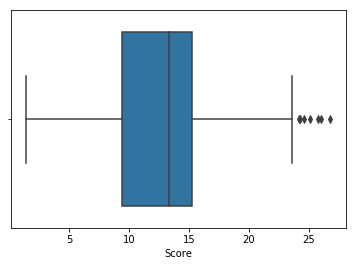

In [57]:
#Boxplot on df_Mort for Score column to check for outliers
import seaborn as sns
sns.boxplot(x=df_Mort['Score'])

- We can see from box plot there are not much outlier in this Column . Lets check IQR method to remove outlier if there is any 


In [58]:
# Finding out Quartiles - Q1 , Q3 and IQR for Score Column

Q1 = df_Mort['Score'].quantile(0.25)
Q3 = df_Mort['Score'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

5.9


In [59]:
#Checking out and analysing Data which can be removed using IQR method of Outlier removal
df_Outlier = df_Mort[((df_Mort['Score'] < (Q1 - 1.5 * IQR)) |(df_Mort['Score'] > (Q3 + 1.5 * IQR)))]
print("Shape of Outlier data  :  " , df_Outlier.shape )
df_Outlier[['Measure ID' ,'Score']]

Shape of Outlier data  :   (7, 19)


Measure ID  Score
88     MORT_30_PN   26.8
5408   MORT_30_PN   26.0
14102  MORT_30_PN   25.1
42914  MORT_30_PN   25.8
49200  MORT_30_PN   24.2
54534  MORT_30_PN   24.6
67442  MORT_30_PN   24.3

##### All of these 7 Scores belongs to just one Measure ID "MORT_30_PN" . Also these 7 scores are continuous in nature.
##### In that sense actually these are not true Outliers and we are not required to perform Any Outlier Treatment for df_Mort

### Outlier Treatment for Readmission

In [60]:
##Lets Convert Score Column to Numeric Column so that we can check outier for this column
df_Radm['Score']  = df_Radm['Score'].apply(pd.to_numeric)

In [61]:
## Statistics of Readmission Data frame 
df_Radm.describe().T

count          mean           std          min           25%  \
Provider ID   24311.0  2.636823e+05  1.559179e+05      10001.0  1.400130e+05   
ZIP Code      24311.0  5.199747e+04  2.741359e+04        603.0  3.090900e+04   
Phone Number  24311.0  5.893895e+09  2.348403e+09  936933841.0  3.865862e+09   
Score         24311.0  1.596911e+01  5.031908e+00          2.4  1.440000e+01   

                       50%           75%           max  
Provider ID   2.600170e+05  3.901010e+05  6.701060e+05  
ZIP Code      5.070300e+04  7.511450e+04  9.992900e+04  
Phone Number  6.066797e+09  8.025246e+09  9.898943e+09  
Score         1.640000e+01  1.950000e+01  3.130000e+01

In [62]:
## Shape of Data frame
df_Radm.shape

(24311, 19)

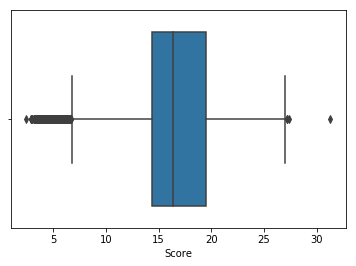

In [63]:
#Boxplot on df_Radm for Score column to check for outliers
import seaborn as sns
sns.boxplot(x=df_Radm['Score'])

- We can see from box plot there are not much outlier in this Column . Lets check IQR method to remove outlier if there is any 


In [64]:
# Finding out Quartiles - Q1 , Q3 and IQR for Score Column

Q1 = df_Radm['Score'].quantile(0.25)
Q3 = df_Radm['Score'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

5.1


In [65]:
#Checking out and analysing Data which can be removed using IQR method of Outlier removal

df_Outlier = df_Radm[((df_Radm['Score'] < (Q1 - 1.5 * IQR)) |(df_Radm['Score'] > (Q3 + 1.5 * IQR)))]
print("Shape of Outlier data  :  " , df_Outlier.shape )

df_Outlier[['Measure ID' ,'Score']]

Shape of Outlier data  :   (2731, 19)


Measure ID  Score
10     READM_30_HIP_KNEE    5.1
24     READM_30_HIP_KNEE    5.7
38     READM_30_HIP_KNEE    5.0
80     READM_30_HIP_KNEE    5.1
108    READM_30_HIP_KNEE    5.0
136    READM_30_HIP_KNEE    4.1
150    READM_30_HIP_KNEE    5.1
178    READM_30_HIP_KNEE    4.7
192    READM_30_HIP_KNEE    4.9
206    READM_30_HIP_KNEE    5.9
234    READM_30_HIP_KNEE    5.7
262    READM_30_HIP_KNEE    4.6
276    READM_30_HIP_KNEE    3.9
290    READM_30_HIP_KNEE    4.7
304    READM_30_HIP_KNEE    4.8
318    READM_30_HIP_KNEE    6.7
360    READM_30_HIP_KNEE    4.8
388    READM_30_HIP_KNEE    4.3
430    READM_30_HIP_KNEE    4.9
444    READM_30_HIP_KNEE    5.1
486    READM_30_HIP_KNEE    4.6
514    READM_30_HIP_KNEE    5.7
556    READM_30_HIP_KNEE    6.2
570    READM_30_HIP_KNEE    4.3
584    READM_30_HIP_KNEE    5.5
598    READM_30_HIP_KNEE    4.3
640    READM_30_HIP_KNEE    4.8
654    READM_30_HIP_KNEE    4.7
682    READM_30_HIP_KNEE    5.5
738    READM_30_HIP_KNEE    4.6
780    READM_30_HIP_KNEE    4.5
794    READM_30_HIP_KNEE    5.2
864    READM_30_HIP_KNEE    5.1
878    READM_30_HIP_KNEE    4.5
934    READM_30_HIP_KNEE    4.8
990    READM_30_HIP_KNEE    4.8
1018   READM_30_HIP_KNEE    5.0
1032   READM_30_HIP_KNEE    4.8
1088   READM_30_HIP_KNEE    4.5
1102   READM_30_HIP_KNEE    4.1
1116   READM_30_HIP_KNEE    5.4
1130   READM_30_HIP_KNEE    5.7
1144   READM_30_HIP_KNEE    4.2
1256   READM_30_HIP_KNEE    4.5
1270   READM_30_HIP_KNEE    5.4
1284   READM_30_HIP_KNEE    4.4
1298   READM_30_HIP_KNEE    4.0
1312   READM_30_HIP_KNEE    5.2
1340   READM_30_HIP_KNEE    4.5
1424   READM_30_HIP_KNEE    4.8
1452   READM_30_HIP_KNEE    4.4
1468   READM_30_HIP_KNEE    5.3
1578   READM_30_HIP_KNEE    4.0
1592   READM_30_HIP_KNEE    4.6
1606   READM_30_HIP_KNEE    4.3
1620   READM_30_HIP_KNEE    3.9
1634   READM_30_HIP_KNEE    4.1
1648   READM_30_HIP_KNEE    4.9
1662   READM_30_HIP_KNEE    4.6
1676   READM_30_HIP_KNEE    4.7
1704   READM_30_HIP_KNEE    3.7
1732   READM_30_HIP_KNEE    4.8
1746   READM_30_HIP_KNEE    5.2
1760   READM_30_HIP_KNEE    4.4
1774   READM_30_HIP_KNEE    4.3
1788   READM_30_HIP_KNEE    4.9
1802   READM_30_HIP_KNEE    4.7
1816   READM_30_HIP_KNEE    4.7
1830   READM_30_HIP_KNEE    4.4
1844   READM_30_HIP_KNEE    4.3
1858   READM_30_HIP_KNEE    3.8
1872   READM_30_HIP_KNEE    5.0
1886   READM_30_HIP_KNEE    4.7
1900   READM_30_HIP_KNEE    5.3
1928   READM_30_HIP_KNEE    4.8
1984   READM_30_HIP_KNEE    4.5
2012   READM_30_HIP_KNEE    4.8
2026   READM_30_HIP_KNEE    4.3
2040   READM_30_HIP_KNEE    5.0
2054   READM_30_HIP_KNEE    5.1
2068   READM_30_HIP_KNEE    4.5
2082   READM_30_HIP_KNEE    5.5
2096   READM_30_HIP_KNEE    4.5
2110   READM_30_HIP_KNEE    5.2
2124   READM_30_HIP_KNEE    3.6
2152   READM_30_HIP_KNEE    4.3
2166   READM_30_HIP_KNEE    5.4
2208   READM_30_HIP_KNEE    6.2
2236   READM_30_HIP_KNEE    3.7
2250   READM_30_HIP_KNEE    5.1
2264   READM_30_HIP_KNEE    4.7
2278   READM_30_HIP_KNEE    4.2
2292   READM_30_HIP_KNEE    4.8
2320   READM_30_HIP_KNEE    5.1
2334   READM_30_HIP_KNEE    5.1
2348   READM_30_HIP_KNEE    3.9
2362   READM_30_HIP_KNEE    4.9
2376   READM_30_HIP_KNEE    4.2
2600   READM_30_HIP_KNEE    4.9
2684   READM_30_HIP_KNEE    4.8
2698   READM_30_HIP_KNEE    4.4
2712   READM_30_HIP_KNEE    3.9
2726   READM_30_HIP_KNEE    4.6
2740   READM_30_HIP_KNEE    5.0
2768   READM_30_HIP_KNEE    4.7
2796   READM_30_HIP_KNEE    4.4
2810   READM_30_HIP_KNEE    3.9
2852   READM_30_HIP_KNEE    4.7
2866   READM_30_HIP_KNEE    4.4
2880   READM_30_HIP_KNEE    4.4
2894   READM_30_HIP_KNEE    4.5
2908   READM_30_HIP_KNEE    5.0
2922   READM_30_HIP_KNEE    4.9
2936   READM_30_HIP_KNEE    5.2
2950   READM_30_HIP_KNEE    4.3
2978   READM_30_HIP_KNEE    4.4
3006   READM_30_HIP_KNEE    4.7
3020   READM_30_HIP_KNEE    4.7
3062   READM_30_HIP_KNEE    5.1
3118   READM_30_HIP_KNEE    5.3
3146   READM_30_HIP_KNEE    5.3
3174   READM_30_HIP_KNEE    5.0
3188   READM_30_HIP_KNEE    5.1
3202   READM_30_HIP_KNEE    4.7
3216   READM_3

In [66]:
#Lets check the unique values of Measure ID to check which Measure ID are impacted
print(df_Outlier['Measure ID'].unique())

['READM_30_HIP_KNEE' 'READM_30_HF']


In [67]:
## Statistics of all the outlier rows that can be removed by IQR Method
df_Outlier[['Score']].describe(percentiles=[0.01,0.05,0.10,0.25,0.5,0.75,0.9,0.95,0.97,0.99,0.9905]).T

count     mean       std  min   1%   5%  10%  25%  50%  75%  90%  95%  \
Score  2731.0  4.64178  1.058865  2.4  3.4  3.8  3.9  4.3  4.6  4.9  5.3  5.5   

       97%  99%  99.05%   max  
Score  5.8  6.2     6.2  31.3

We see that till 99.05% the values are continously increasing till value of 6.2. But we see we have a maximum value of 31.3 which is clearly an outlier and need to be removed.

In [68]:
## Check no of rows that can be removed if we remove all the data greater then 30
df_Radm[df_Radm.Score >=30].shape

(1, 19)

In [69]:
#Removing the outlier
df_Radm = df_Radm[~(df_Radm.Score >=30)]

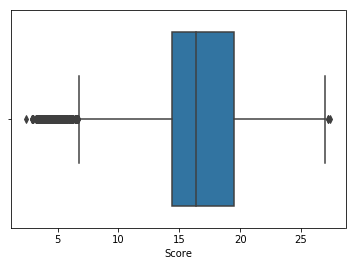

In [70]:
## box plot after removing outlier
import seaborn as sns
sns.boxplot(x=df_Radm['Score'])

- We can see from boxplot that extereme outliers are completly removed .

#### Converting Readmission and Mortality Data frame  Measure id to Column format for model building by using Pivot table 

In [71]:
## Convert long format to wide format
df_Mort=df_Mort.pivot(index='Provider ID', columns='Measure ID', values=['Score'])
df_Radm=df_Radm.pivot(index='Provider ID', columns='Measure ID', values=['Score'])


In [72]:
## Lets adding Measure id to 'Score' Column name 
df_Mort.columns = ['_'.join(col) for col in df_Mort.columns]

In [73]:
## Lets adding Measure id to 'Score' Column name 
df_Radm.columns = ['_'.join(col) for col in df_Radm.columns]

In [74]:
## Lets check the mortality columns
df_Mort.columns

Index(['Score_MORT_30_AMI', 'Score_MORT_30_CABG', 'Score_MORT_30_COPD',
       'Score_MORT_30_HF', 'Score_MORT_30_PN', 'Score_MORT_30_STK'],
      dtype='object')

In [75]:
## Lets check the Radmission Columns
df_Radm.columns

Index(['Score_READM_30_AMI', 'Score_READM_30_CABG', 'Score_READM_30_COPD',
       'Score_READM_30_HF', 'Score_READM_30_HIP_KNEE',
       'Score_READM_30_HOSP_WIDE', 'Score_READM_30_PN', 'Score_READM_30_STK'],
      dtype='object')

In [76]:
##Check the null value in Readmission data frame 

all_data_missing = (df_Radm.isnull().sum() / len(df_Radm)) * 100
all_data_missing = all_data_missing.drop(all_data_missing[all_data_missing == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage':all_data_missing})
missing_data

Missing Percentage
Score_READM_30_CABG                76.738392
Score_READM_30_AMI                 51.007928
Score_READM_30_STK                 40.928652
Score_READM_30_HIP_KNEE            38.142695
Score_READM_30_COPD                17.372593
Score_READM_30_HF                  17.349943
Score_READM_30_PN                   7.383918
Score_READM_30_HOSP_WIDE            0.453001

- There are many measure id which has more than 50% missing value , we can drop these measure id before Modelling 

In [77]:
## Checkthe null value in Mortality Columns
all_data_missing = (df_Mort.isnull().sum() / len(df_Mort)) * 100
all_data_missing = all_data_missing.drop(all_data_missing[all_data_missing == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage':all_data_missing})
missing_data

Missing Percentage
Score_MORT_30_CABG           74.805825
Score_MORT_30_AMI            42.038835
Score_MORT_30_STK            35.048544
Score_MORT_30_COPD           12.839806
Score_MORT_30_HF             12.184466
Score_MORT_30_PN              0.776699

- The measure id Score_MORT_30_CABG has more than 50% missing value , we can drop this before Modelling 

In [78]:
## Check Readmission data frame shape
df_Radm.shape


(4415, 8)

- There are 7 Measure id in Readmission Group 

In [79]:
## Check Mortality  Data frame shape
df_Mort.shape

(4120, 6)

-There are 5 Measure id in Mortality Data frame 

#### Reading and Understanding (Safety of Care)

In [80]:
import chardet
with open('Healthcare Associated Infections - Hospital.csv', 'rb') as f:
    result = chardet.detect(f.read()) 
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [81]:
# Load Healthcare Associated Infections data in Safety Data frame 
Safety = pd.read_csv('Healthcare Associated Infections - Hospital.csv',encoding=result['encoding'])

In [82]:
# Showing First 5 Rows
Safety.head()

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                     Measure Name       Measure ID Compared to National  \
0  CLABSI: Lower Confidence Limit   HAI_1_CI_LOWER                  NaN   
1  CLABSI: Upper Confidence Limit   HAI_1_CI_UPPER                  NaN   
2   CLABSI: Number of Device Days  HAI_1_DOPC_DAYS                  NaN   
3         CLABSI: Predicted Cases  HAI_1_ELIGCASES                  NaN   
4          CLABSI: Observed Cases  HAI_1_NUMERATOR                  NaN   

   Score Footnote Measure Start Date Measure End Date  
0   1.03      NaN           1/1/2015       12/31/2015  
1  2.765      NaN           1/1/2015       12/31/2015  
2   7117      NaN           1/1/2015       12/31/2015  
3  9.198      NaN           1/1/2015       12/31/2015  
4     16      NaN           1/1/2015       12/31/2015

In [83]:
# feature type summary
Safety.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231264 entries, 0 to 231263
Data columns (total 15 columns):
Provider ID             231264 non-null int64
Hospital Name           231264 non-null object
Address                 231264 non-null object
City                    231264 non-null object
State                   231264 non-null object
ZIP Code                231264 non-null int64
County Name             230544 non-null object
Phone Number            231264 non-null int64
Measure Name            231264 non-null object
Measure ID              231264 non-null object
Compared to National    38544 non-null object
Score                   231264 non-null object
Footnote                103373 non-null object
Measure Start Date      231264 non-null object
Measure End Date        231264 non-null object
dtypes: int64(3), object(12)
memory usage: 26.5+ MB


In [84]:
# Let's check the dataframe shapes
print("\nThe   data size is: {} ".format(Safety.shape)) 


The   data size is: (231264, 15) 


In [85]:
#How many columns with different datatypes are there?
Safety.get_dtype_counts()

int64      3
object    12
dtype: int64

In [86]:
# summary statistics for the numerical columns 
Safety.describe(include=[np.number]).T

count          mean           std          min           25%  \
Provider ID   231264.0  2.679835e+05  1.566302e+05      10001.0  1.401850e+05   
ZIP Code      231264.0  5.395619e+04  2.691313e+04        603.0  3.301300e+04   
Phone Number  231264.0  5.849487e+09  2.329532e+09  936933841.0  4.017694e+09   

                       50%           75%           max  
Provider ID   2.600370e+05  3.902110e+05  6.701120e+05  
ZIP Code      5.539550e+04  7.602000e+04  9.992900e+04  
Phone Number  6.053298e+09  7.877569e+09  9.898943e+09

In [87]:
# summary statistics for the object and categorical columns
Safety.describe(include=[np.object, pd.Categorical]).T

count unique  \
Hospital Name         231264   4617   
Address               231264   4789   
City                  231264   2949   
State                 231264     56   
County Name           230544   1565   
Measure Name          231264     48   
Measure ID            231264     48   
Compared to National   38544      4   
Score                 231264  24263   
Footnote              103373      8   
Measure Start Date    231264      1   
Measure End Date      231264      1   

                                                                    top  \
Hospital Name                                         MEMORIAL HOSPITAL   
Address                                              100 HOSPITAL DRIVE   
City                                                            CHICAGO   
State                                                                TX   
County Name                                                 LOS ANGELES   
Measure Name                              C.diff Upper Confidence Limit   
Measure ID                                             HAI_2a_ELIGCASES   
Compared to National                                      Not Available   
Score                                                     Not Available   
Footnote              5 - Results are not available for this reporti...   
Measure Start Date                                             1/1/2015   
Measure End Date                                             12/31/2015   

                        freq  
Hospital Name            720  
Address                  336  
City                    1392  
State                  19536  
County Name             3984  
Measure Name            4818  
Measure ID              4818  
Compared to National   21010  
Score                 101886  
Footnote               33490  
Measure Start Date    231264  
Measure End Date      231264

In [88]:
# Let's try to find out the Unique value for each columns 
for x in list(Safety.columns):
    
    # get a list of unique values
    n = Safety[x].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(x)
        print('*****************************************************************************************')
        print(n)
    else:
        print(x + ': ' +str(len(n)) + ' unique values')
        print('*****************************************************************************************')
        print(n)

Provider ID: 4818 unique values
*****************************************************************************************
[ 10001  10005  10006 ... 670109 670111 670112]
Hospital Name: 4617 unique values
*****************************************************************************************
['SOUTHEAST ALABAMA MEDICAL CENTER' 'MARSHALL MEDICAL CENTER SOUTH'
 'ELIZA COFFEE MEMORIAL HOSPITAL' ... 'ALTUS BAYTOWN HOSPITAL'
 'CONTINUECARE HOSPITAL AT MEDICAL CENTER ODESSA'
 'CUMBERLAND SURGICAL HOSPITAL']
Address: 4789 unique values
*****************************************************************************************
['1108 ROSS CLARK CIRCLE' '2505 U S HIGHWAY 431 NORTH'
 '205 MARENGO STREET' ... '1626 W BAKER RD'
 '500 WEST  4TH STREET , 4TH FLOOR' '5330 NORTH LOOP 1604 WEST']
City: 2949 unique values
*****************************************************************************************
['DOTHAN' 'BOAZ' 'FLORENCE' ... 'NEW BRAUNFELS' 'PEARLAND' 'MARBLE FALLS']
State: 56 unique val

- There are many columns where Not available value is present that can be replaced with NAN
- Provided id is unique for each record
- Below Measure id exist in Safety Data. Only the measure id that has suffix _SIR is significant . Other MEasure id can be dropped 
  HAI_1_CI_LOWER' ,HAI_1_CI_UPPER' 'HAI_1_DOPC_DAYS' 'HAI_1_ELIGCASES'
 'HAI_1_NUMERATOR' 'HAI_1_SIR' 'HAI_1a_CI_LOWER' 'HAI_1a_CI_UPPER'
 'HAI_1a_DOPC_DAYS' 'HAI_1a_ELIGCASES' 'HAI_1a_NUMERATOR' 'HAI_1a_SIR'
 'HAI_2_CI_LOWER' 'HAI_2_CI_UPPER' 'HAI_2_DOPC_DAYS' 'HAI_2_ELIGCASES'
 'HAI_2_NUMERATOR' 'HAI_2_SIR' 'HAI_2a_CI_LOWER' 'HAI_2a_CI_UPPER'
 'HAI_2a_DOPC_DAYS' 'HAI_2a_ELIGCASES' 'HAI_2a_NUMERATOR' 'HAI_2a_SIR'
 'HAI_3_CI_LOWER' 'HAI_3_CI_UPPER' 'HAI_3_DOPC_DAYS' 'HAI_3_ELIGCASES'
 'HAI_3_NUMERATOR' 'HAI_3_SIR' 'HAI_4_CI_LOWER' 'HAI_4_CI_UPPER'
 'HAI_4_DOPC_DAYS' 'HAI_4_ELIGCASES' 'HAI_4_NUMERATOR' 'HAI_4_SIR'
 'HAI_5_CI_LOWER' 'HAI_5_CI_UPPER' 'HAI_5_DOPC_DAYS' 'HAI_5_ELIGCASES'
 'HAI_5_NUMERATOR' 'HAI_5_SIR' 'HAI_6_CI_LOWER' 'HAI_6_CI_UPPER'
 
 

#### Missing value imputations for Safety and Care

In [89]:
## Not Avaiable value can be replaced with NULL
Safety = Safety.replace('Not Available', np.nan)


In [90]:
# Getting a missing % count
all_data_missing = (Safety.isnull().sum() / len(Safety)) * 100
all_data_missing = all_data_missing.drop(all_data_missing[all_data_missing == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage':all_data_missing})
missing_data

Missing Percentage
Compared to National           92.418189
Footnote                       55.300868
Score                          44.056144
County Name                     0.311333

- There are more than 50% missing values in Compare to National and Footnote columns so these columns are insignificants 

- Only Measure id that has suffix _SIR is significant , other measure id can be dropped 

In [91]:
Safety = Safety[Safety['Measure ID'].str.contains('_SIR')]

In [92]:
## Data frame after removing other measure id 
Safety.head(10)

Provider ID                     Hospital Name                     Address  \
5         10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
11        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
17        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
23        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
29        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
35        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
41        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
47        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
53        10005     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
59        10005     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   

      City State  ZIP Code County Name  Phone Number  \
5   DOTHAN    AL     36301     HOUSTON    3347938701   
11  DOTHAN    AL     36301     HOUSTON    3347938701   
17  DOTHAN    AL     36301     HOUSTON    3347938701   
23  DOTHAN    AL     36301     HOUSTON    3347938701   
29  DOTHAN    AL     36301     HOUSTON    3347938701   
35  DOTHAN    AL     36301     HOUSTON    3347938701   
41  DOTHAN    AL     36301     HOUSTON    3347938701   
47  DOTHAN    AL     36301     HOUSTON    3347938701   
53    BOAZ    AL     35957    MARSHALL    2565938310   
59    BOAZ    AL     35957    MARSHALL    2565938310   

                                         Measure Name  Measure ID  \
5   Central line-associated bloodstream infections...   HAI_1_SIR   
11  Central line-associated blood stream infection...  HAI_1a_SIR   
17  Catheter-associated urinary tract infections (...   HAI_2_SIR   
23  Catheter-Associated Urinary Tract Infections (...  HAI_2a_SIR   
29  Surgical Site Infection from colon surgery (SS...   HAI_3_SIR   
35  Surgical Site Infection from abdominal hystere...   HAI_4_SIR   
41  Methicillin-resistant Staphylococcus Aureus (M...   HAI_5_SIR   
47  Clostridium difficile (C.diff.) Laboratory-ide...   HAI_6_SIR   
53  Central line-associated bloodstream infections...   HAI_1_SIR   
59  Central line-associated blood stream infection...  HAI_1a_SIR   

                    Compared to National  Score Footnote Measure Start Date  \
5      Worse than the National Benchmark   1.74      NaN           1/1/2015   
11     Worse than the National Benchmark  2.433      NaN           1/1/2015   
17  No Different than National Benchmark  1.427      NaN           1/1/2015   
23     Worse than the National Benchmark  2.307      NaN           1/1/2015   
29  No Different than National Benchmark   1.87      NaN           1/1/2015   
35  No Different than National Benchmark      0      NaN           1/1/2015   
41  No Different than National Benchmark  0.422      NaN           1/1/2015   
47  No Different than National Benchmark  0.787      NaN           1/1/2015   
53  No Different than National Benchmark  1.062      NaN           1/1/2015   
59  No Different than National Benchmark  0.648      NaN           1/1/2015   

   Measure End Date  
5        12/31/2015  
11       12/31/2015  
17       12/31/2015  
23       12/31/2015  
29       12/31/2015  
35       12/31/2015  
41       12/31/2015  
47       12/31/2015  
53       12/31/2015  
59       12/31/2015

In [93]:
Safety.shape

(38544, 15)

In [94]:
## Lets Convert Score column to numeric fomart
Safety['Score']=Safety['Score'].apply(pd.to_numeric)

In [95]:
## Statistics for all the numeric column
Safety.describe().T

count          mean           std          min           25%  \
Provider ID   38544.0  2.679835e+05  1.566319e+05      10001.0  1.401850e+05   
ZIP Code      38544.0  5.395619e+04  2.691342e+04        603.0  3.301300e+04   
Phone Number  38544.0  5.849487e+09  2.329557e+09  936933841.0  4.017694e+09   
Score         17534.0  6.977445e-01  6.486438e-01          0.0  2.400000e-01   

                       50%           75%           max  
Provider ID   2.600370e+05  3.902110e+05  6.701120e+05  
ZIP Code      5.539550e+04  7.602000e+04  9.992900e+04  
Phone Number  6.053298e+09  7.877569e+09  9.898943e+09  
Score         5.910000e-01  9.770000e-01  7.017000e+00

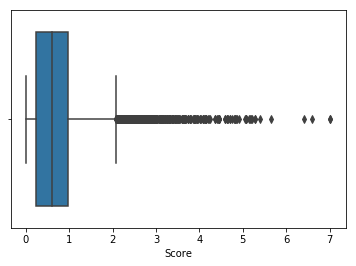

In [96]:
#Boxplot on Safety for Score column to check for outliers
import seaborn as sns
sns.boxplot(x=Safety['Score'])

- We can see from box plot there are not much outlier in this Column . Lets check IQR method to remove outlier if there is any 


In [97]:
# Finding out Quartiles - Q1 , Q3 and IQR

Q1 = Safety['Score'].quantile(0.25)
Q3 = Safety['Score'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.737


In [98]:
#Checking out and analysing Data which can be removed using IQR method of Outlier removal

df_Outlier = Safety[((Safety['Score'] < (Q1 - 1.5 * IQR)) |(Safety['Score'] > (Q3 + 1.5 * IQR)))]
print("Shape of Outlier data  :  " , df_Outlier.shape )

df_Outlier[['Measure ID' ,'Score']]

Shape of Outlier data  :   (612, 15)


Measure ID  Score
11      HAI_1a_SIR  2.433
23      HAI_2a_SIR  2.307
617      HAI_5_SIR  2.343
659      HAI_4_SIR  2.334
665      HAI_5_SIR  3.474
2141     HAI_3_SIR  2.379
2153     HAI_5_SIR  3.182
2681     HAI_5_SIR  4.361
4349     HAI_3_SIR  2.356
4445     HAI_3_SIR  2.510
5069     HAI_3_SIR  2.289
5129     HAI_5_SIR  2.279
5225     HAI_5_SIR  2.489
6233     HAI_5_SIR  3.087
6365     HAI_3_SIR  2.801
7085     HAI_3_SIR  2.560
7229     HAI_3_SIR  2.089
7517     HAI_3_SIR  3.731
8009     HAI_5_SIR  2.437
8045     HAI_3_SIR  2.174
9785     HAI_5_SIR  2.599
10313    HAI_5_SIR  2.582
10625    HAI_2_SIR  2.503
10685    HAI_3_SIR  2.558
11021    HAI_3_SIR  3.953
11033    HAI_5_SIR  2.182
11111   HAI_2a_SIR  2.612
12839   HAI_2a_SIR  2.789
12845    HAI_3_SIR  2.718
12857    HAI_5_SIR  3.256
12905    HAI_5_SIR  2.444
13193    HAI_5_SIR  2.405
13229    HAI_3_SIR  2.887
13235    HAI_4_SIR  2.549
13565    HAI_3_SIR  2.416
13673    HAI_5_SIR  2.541
13787   HAI_1a_SIR  2.201
13919    HAI_6_SIR  2.383
14045    HAI_3_SIR  2.239
14051    HAI_4_SIR  2.799
14435    HAI_4_SIR  2.947
14579    HAI_4_SIR  4.023
15053    HAI_3_SIR  2.720
15203    HAI_4_SIR  4.643
15293    HAI_3_SIR  2.089
15785    HAI_5_SIR  2.515
15929    HAI_5_SIR  2.423
16253    HAI_3_SIR  3.683
16265    HAI_5_SIR  2.906
16829    HAI_3_SIR  3.000
17021    HAI_3_SIR  2.234
17513    HAI_5_SIR  2.506
17759    HAI_6_SIR  2.449
17837    HAI_3_SIR  2.200
17945    HAI_5_SIR  2.292
18071   HAI_2a_SIR  2.720
18077    HAI_3_SIR  2.445
18269    HAI_3_SIR  2.099
19133    HAI_3_SIR  2.288
19187    HAI_4_SIR  4.819
19583    HAI_6_SIR  3.668
19613    HAI_3_SIR  2.467
19619    HAI_4_SIR  4.579
19661    HAI_3_SIR  2.520
19757    HAI_3_SIR  2.816
19769    HAI_5_SIR  3.454
19901    HAI_3_SIR  2.721
19949    HAI_3_SIR  2.835
20429    HAI_3_SIR  2.504
20549    HAI_1_SIR  4.110
20555   HAI_1a_SIR  4.013
20561    HAI_2_SIR  2.889
20567   HAI_2a_SIR  2.642
20621    HAI_3_SIR  3.288
21119    HAI_6_SIR  3.085
21239   HAI_2a_SIR  3.265
21437    HAI_3_SIR  2.361
21737    HAI_5_SIR  4.653
21785    HAI_5_SIR  3.791
21875    HAI_4_SIR  2.250
21929    HAI_5_SIR  2.110
22157    HAI_3_SIR  3.857
22349    HAI_3_SIR  2.329
22721    HAI_2_SIR  3.590
22727   HAI_2a_SIR  5.290
23021    HAI_3_SIR  3.166
23741    HAI_3_SIR  3.425
23795    HAI_4_SIR  2.487
23885    HAI_3_SIR  2.404
24047    HAI_6_SIR  2.110
24131    HAI_4_SIR  2.488
24329    HAI_5_SIR  2.658
24419    HAI_4_SIR  2.852
24575    HAI_6_SIR  2.333
24689    HAI_2_SIR  2.423
24695   HAI_2a_SIR  3.230
25097    HAI_5_SIR  3.452
25349    HAI_1_SIR  2.742
25355   HAI_1a_SIR  2.996
25727    HAI_6_SIR  2.651
25775    HAI_6_SIR  2.368
25925    HAI_1_SIR  3.499
26009    HAI_5_SIR  2.260
26201    HAI_5_SIR  4.042
26213    HAI_1_SIR  2.784
26345    HAI_5_SIR  3.528
26567   HAI_2a_SIR  2.892
26957    HAI_3_SIR  2.715
28511    HAI_6_SIR  2.599
29363    HAI_4_SIR  2.375
29981    HAI_3_SIR  2.143
30167   HAI_2a_SIR  2.418
30227    HAI_4_SIR  2.205
30269    HAI_3_SIR  2.957
30371    HAI_4_SIR  2.246
30989    HAI_3_SIR  2.238
31223   HAI_2a_SIR  2.384
33167    HAI_6_SIR  2.098
33443    HAI_4_SIR  3.357
33497    HAI_5_SIR  3.109
33557    HAI_1_SIR  2.313
33563   HAI_1a_SIR  2.396
33581    HAI_3_SIR  2.151
33641    HAI_5_SIR  3.438
33773    HAI_3_SIR  2.186
34253    HAI_3_SIR  2.352
34745    HAI_5_SIR  4.750
34829    HAI_3_SIR  2.969
35075    HAI_4_SIR  3.663
35177    HAI_5_SIR  2.198
35285    HAI_1_SIR  2.525
35291   HAI_1a_SIR  2.225
35315    HAI_4_SIR  2.657
35321    HAI_5_SIR  3.783
35369    HAI_5_SIR  2.318
35507    HAI_4_SIR  2.692
35531   HAI_1a_SIR  2.152
35549    HAI_3_SIR  2.607
35597    HAI_3_SIR  2.511
35645    HAI_3_SIR  2.575
35849    HAI_5_SIR  2.550
35939    HAI_4_SIR  3.874
36233    HAI_5_SIR  2.437
36773    HAI_1_SIR  5.190
36779   HAI_1a_SIR  5.386
36797    HAI_3_SIR  2.967
36809    HAI_5_SIR  2.881
36851    HAI_4_SIR  3.311
36857    HAI_5_SIR  2.445
37145    HAI_5_SIR  2.335
...            ...    ...
166367   HAI_6_SIR  2.136
168413   HAI_3_SIR  2.305
1689

In [99]:
#Lets check the unique values of Measure ID to check which Measure ID are impacted
print(df_Outlier['Measure ID'].unique())

['HAI_1a_SIR' 'HAI_2a_SIR' 'HAI_5_SIR' 'HAI_4_SIR' 'HAI_3_SIR' 'HAI_2_SIR'
 'HAI_6_SIR' 'HAI_1_SIR']


In [100]:
## Check the statistics for all the records that can be removed .
df_Outlier[['Score']].describe(percentiles=[0.01,0.05,0.10,0.25,0.5,0.75,0.9,0.95,0.97,0.99,0.9905]).T

count      mean       std    min       1%       5%     10%      25%  \
Score  612.0  2.804072  0.772984  2.085  2.08933  2.11655  2.1521  2.28975   

        50%      75%     90%      95%      97%   99%    99.05%    max  
Score  2.54  3.00225  3.8723  4.45265  4.83607  5.29  5.308768  7.017

In [101]:
## Check the shape
Safety[Safety.Score >=5.5].shape

(5, 15)

In [102]:
#Removing the outlier
#Safety = Safety[~(Safety.Score >=5.5)]

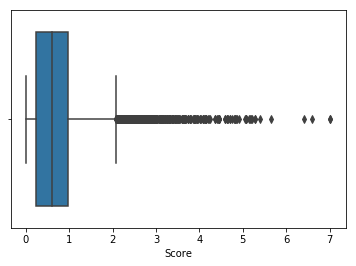

In [103]:
#Boxplot on Safety after removing extreme outlier.
sns.boxplot(x=Safety['Score'])

In [104]:
## Shape of Saferty after removing outlier
Safety.shape

(38544, 15)

In [105]:
## We have many measure id in this data frame but these measure ids are in Row format , Lets check score for all the measure id 
df_Safety=Safety.pivot(index='Provider ID', columns='Measure ID', values=['Score'])

In [106]:
## Add Measure id to score Column
df_Safety.columns = ['_'.join(col) for col in df_Safety.columns]

In [107]:
## Lets check top row of safety Data frame 
df_Safety.head()

Score_HAI_1_SIR  Score_HAI_1a_SIR  Score_HAI_2_SIR  \
Provider ID                                                       
10001                  1.740             2.433            1.427   
10005                  1.062             0.648            0.456   
10006                  0.341             0.443            0.641   
10007                    NaN               NaN            0.000   
10008                    NaN               NaN              NaN   

             Score_HAI_2a_SIR  Score_HAI_3_SIR  Score_HAI_4_SIR  \
Provider ID                                                       
10001                   2.307            1.870              0.0   
10005                   0.698            0.386              NaN   
10006                   0.801            0.310              NaN   
10007                     NaN              NaN              NaN   
10008                     NaN              NaN              NaN   

             Score_HAI_5_SIR  Score_HAI_6_SIR  
Provider ID                                    
10001                  0.422            0.787  
10005                  1.388            0.405  
10006                  1.261            0.513  
10007                    NaN            0.000  
10008                    NaN            0.585

In [108]:
df_Safety.shape

(4818, 8)

- There are 7 Measure id in Safety Group

In [109]:
# Getting a missing % count
all_data_missing = (df_Safety.isnull().sum() / len(df_Safety)) * 100
all_data_missing = all_data_missing.drop(all_data_missing[all_data_missing == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage':all_data_missing})
missing_data

Missing Percentage
Score_HAI_4_SIR            82.233292
Score_HAI_5_SIR            62.017435
Score_HAI_1a_SIR           58.426733
Score_HAI_3_SIR            57.596513
Score_HAI_2a_SIR           52.968037
Score_HAI_1_SIR            50.705687
Score_HAI_2_SIR            40.037360
Score_HAI_6_SIR            32.088003

- There are many Measure ids where score is Missing for more than 50% rows , we can drop these before modelling

### Reading and Understanding (Complications - Hospital)

In [110]:
## Encoding
import chardet
with open('Complications - Hospital.csv', 'rb') as f:
    result = chardet.detect(f.read()) 
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [111]:
# Load the Complications data frame  
Complicat = pd.read_csv('Complications - Hospital.csv',encoding=result['encoding'])

In [112]:
# Showing First 5 Rows
Complicat.head()

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                                        Measure Name  \
0  Rate of complications for hip/knee replacement...   
1                  Serious blood clots after surgery   
2               Blood stream infection after surgery   
3  A wound that splits open  after surgery on the...   
4   Accidental cuts and tears from medical treatment   

                  Measure ID                 Compared to National Denominator  \
0              COMP_HIP_KNEE  No Different than the National Rate         331   
1  PSI_12_POSTOP_PULMEMB_DVT  No Different than the National Rate        4549   
2         PSI_13_POST_SEPSIS  No Different than the National Rate         578   
3        PSI_14_POSTOP_DEHIS  No Different than the National Rate         445   
4             PSI_15_ACC_LAC  No Different than the National Rate       16429   

  Score Lower Estimate Higher Estimate Footnote Measure Start Date  \
0   3.8            2.6             5.5      NaN         04/01/2012   
1  3.32           1.25            5.38      NaN         07/01/2013   
2  5.72           0.00           11.48      NaN         07/01/2013   
3  2.72           0.65            4.79      NaN         07/01/2013   
4  1.35           0.76            1.95      NaN         07/01/2013   

  Measure End Date  
0       03/31/2015  
1       06/30/2015  
2       06/30/2015  
3       06/30/2015  
4       06/30/2015

In [113]:
# feature type summary
Complicat.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52998 entries, 0 to 52997
Data columns (total 18 columns):
Provider ID             52998 non-null int64
Hospital Name           52998 non-null object
Address                 52998 non-null object
City                    52998 non-null object
State                   52998 non-null object
ZIP Code                52998 non-null int64
County Name             52833 non-null object
Phone Number            52998 non-null int64
Measure Name            52998 non-null object
Measure ID              52998 non-null object
Compared to National    52998 non-null object
Denominator             52998 non-null object
Score                   52998 non-null object
Lower Estimate          52998 non-null object
Higher Estimate         52998 non-null object
Footnote                21874 non-null object
Measure Start Date      52998 non-null object
Measure End Date        52998 non-null object
dtypes: int64(3), object(15)
memory usage: 7.3+ MB


In [114]:
# Let's check the dataframe shapes
print("\nThe   data size is: {} ".format(Complicat.shape)) 


The   data size is: (52998, 18) 


In [115]:
#How many columns with different datatypes are there?
Complicat.get_dtype_counts()

int64      3
object    15
dtype: int64

In [116]:
# summary statistics for the numerical columns 
Complicat.describe(include=[np.number]).T

count          mean           std          min           25%  \
Provider ID   52998.0  2.679835e+05  1.566313e+05      10001.0  1.401850e+05   
ZIP Code      52998.0  5.395619e+04  2.691333e+04        603.0  3.301300e+04   
Phone Number  52998.0  5.849487e+09  2.329549e+09  936933841.0  4.017694e+09   

                       50%           75%           max  
Provider ID   2.600370e+05  3.902110e+05  6.701120e+05  
ZIP Code      5.539550e+04  7.602000e+04  9.992900e+04  
Phone Number  6.053298e+09  7.877569e+09  9.898943e+09

In [117]:
# summary statistics for the object and categorical columns
Complicat.describe(include=[np.object, pd.Categorical]).T

count unique  \
Hospital Name         52998   4617   
Address               52998   4789   
City                  52998   2949   
State                 52998     56   
County Name           52833   1565   
Measure Name          52998     11   
Measure ID            52998     11   
Compared to National  52998      5   
Denominator           52998   7466   
Score                 52998   3042   
Lower Estimate        52998   2460   
Higher Estimate       52998   3685   
Footnote              21874      6   
Measure Start Date    52998      2   
Measure End Date      52998      2   

                                                                    top   freq  
Hospital Name                                         MEMORIAL HOSPITAL    165  
Address                                              100 HOSPITAL DRIVE     77  
City                                                            CHICAGO    319  
State                                                                TX   4477  
County Name                                                 LOS ANGELES    913  
Measure Name                    Collapsed lung due to medical treatment   4818  
Measure ID                                                  PSI_7_CVCBI   4818  
Compared to National                No Different than the National Rate  29837  
Denominator                                               Not Available  25098  
Score                                                     Not Available  21874  
Lower Estimate                                            Not Available  21874  
Higher Estimate                                           Not Available  21874  
Footnote              13 - Results cannot be calculated for this rep...  13090  
Measure Start Date                                           07/01/2013  48180  
Measure End Date                                             06/30/2015  48180

In [118]:
# Let's try to find out the Unique value for each columns 
for x in list(Complicat.columns):
    
    # get a list of unique values
    n = Complicat[x].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(x)
        print('*****************************************************************************************')
        print(n)
    else:
        print(x + ': ' +str(len(n)) + ' unique values')
        print('*****************************************************************************************')
        print(n)

Provider ID: 4818 unique values
*****************************************************************************************
[ 10001  10005  10006 ... 670109 670111 670112]
Hospital Name: 4617 unique values
*****************************************************************************************
['SOUTHEAST ALABAMA MEDICAL CENTER' 'MARSHALL MEDICAL CENTER SOUTH'
 'ELIZA COFFEE MEMORIAL HOSPITAL' ... 'ALTUS BAYTOWN HOSPITAL'
 'CONTINUECARE HOSPITAL AT MEDICAL CENTER ODESSA'
 'CUMBERLAND SURGICAL HOSPITAL']
Address: 4789 unique values
*****************************************************************************************
['1108 ROSS CLARK CIRCLE' '2505 U S HIGHWAY 431 NORTH'
 '205 MARENGO STREET' ... '1626 W BAKER RD'
 '500 WEST  4TH STREET , 4TH FLOOR' '5330 NORTH LOOP 1604 WEST']
City: 2949 unique values
*****************************************************************************************
['DOTHAN' 'BOAZ' 'FLORENCE' ... 'NEW BRAUNFELS' 'PEARLAND' 'MARBLE FALLS']
State: 56 unique val

- Observations

- There are many columns which has missing value
- There are many columns which has Not Avaiable as a value and can be replaced with NULL

In [119]:
## Lets replaced Not Avaiable with Nan
Complicat = Complicat.replace('Not Available', np.nan)

In [120]:
# Getting a missing % count
all_data_missing = (Complicat.isnull().sum() / len(Complicat)) * 100
all_data_missing = all_data_missing.drop(all_data_missing[all_data_missing == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage':all_data_missing})
missing_data

Missing Percentage
Footnote                       58.726744
Denominator                    47.356504
Higher Estimate                41.273256
Lower Estimate                 41.273256
Score                          41.273256
Compared to National           34.737160
County Name                     0.311333

##### Outlier Treatment

In [121]:
Complicat['Score']=Complicat['Score'].apply(pd.to_numeric)

In [122]:
Complicat.describe().T

count          mean           std           min           25%  \
Provider ID   52998.0  2.679835e+05  1.566313e+05  1.000100e+04  1.401850e+05   
ZIP Code      52998.0  5.395619e+04  2.691333e+04  6.030000e+02  3.301300e+04   
Phone Number  52998.0  5.849487e+09  2.329549e+09  9.369338e+08  4.017694e+09   
Score         31124.0  1.003527e+01  3.200193e+01  3.000000e-02  3.300000e-01   

                       50%           75%           max  
Provider ID   2.600370e+05  3.902110e+05  6.701120e+05  
ZIP Code      5.539550e+04  7.602000e+04  9.992900e+04  
Phone Number  6.053298e+09  7.877569e+09  9.898943e+09  
Score         1.065000e+00  3.200000e+00  2.121600e+02

In [123]:
Complicat.shape

(52998, 18)

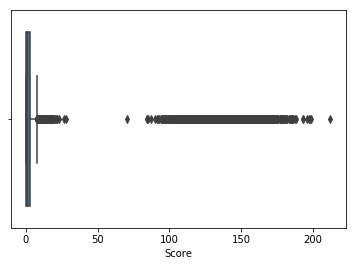

In [124]:
#Boxplot on df_Radm for Score column to check for outliers

sns.boxplot(x=Complicat['Score'])

In [125]:
# Finding out Quartiles - Q1 , Q3 and IQR

Q1 = Complicat['Score'].quantile(0.25)
Q3 = Complicat['Score'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2.87


In [126]:
#Checking out and analysing Data which can be removed using IQR method of Outlier removal

df_Outlier = Complicat[((Complicat['Score'] < (Q1 - 1.5 * IQR)) |(Complicat['Score'] > (Q3 + 1.5 * IQR)))]
print("Shape of Outlier data  :  " , df_Outlier.shape )

df_Outlier[['Measure ID' ,'Score']]

Shape of Outlier data  :   (4233, 18)


Measure ID   Score
6                PSI_4_SURG_COMP  168.26
13            PSI_13_POST_SEPSIS    9.18
17               PSI_4_SURG_COMP  179.05
28               PSI_4_SURG_COMP  198.33
35            PSI_13_POST_SEPSIS    9.89
57            PSI_13_POST_SEPSIS    9.66
61               PSI_4_SURG_COMP  157.92
68            PSI_13_POST_SEPSIS   11.78
79            PSI_13_POST_SEPSIS   10.26
83               PSI_4_SURG_COMP  155.98
105              PSI_4_SURG_COMP  135.38
112           PSI_13_POST_SEPSIS    9.43
134           PSI_13_POST_SEPSIS    9.97
138              PSI_4_SURG_COMP  171.58
145           PSI_13_POST_SEPSIS   11.66
149              PSI_4_SURG_COMP  169.43
156           PSI_13_POST_SEPSIS    8.54
160              PSI_4_SURG_COMP  149.67
178           PSI_13_POST_SEPSIS    8.80
182              PSI_4_SURG_COMP  142.00
200           PSI_13_POST_SEPSIS   10.14
204              PSI_4_SURG_COMP  127.02
237              PSI_4_SURG_COMP  171.91
244           PSI_13_POST_SEPSIS   12.21
248              PSI_4_SURG_COMP  122.13
277           PSI_13_POST_SEPSIS   13.58
281              PSI_4_SURG_COMP  133.64
299           PSI_13_POST_SEPSIS    9.23
336              PSI_4_SURG_COMP  197.49
347              PSI_4_SURG_COMP  160.56
376           PSI_13_POST_SEPSIS   11.42
398           PSI_13_POST_SEPSIS    9.51
402              PSI_4_SURG_COMP  123.43
431           PSI_13_POST_SEPSIS   10.78
435              PSI_4_SURG_COMP  157.97
442           PSI_13_POST_SEPSIS    9.73
453           PSI_13_POST_SEPSIS    8.10
457              PSI_4_SURG_COMP  139.23
468              PSI_4_SURG_COMP  188.60
486           PSI_13_POST_SEPSIS    8.71
490              PSI_4_SURG_COMP  141.74
497           PSI_13_POST_SEPSIS    8.10
501              PSI_4_SURG_COMP  131.28
508           PSI_13_POST_SEPSIS    8.98
512              PSI_4_SURG_COMP  180.64
534              PSI_4_SURG_COMP  143.91
574           PSI_13_POST_SEPSIS   10.64
578              PSI_4_SURG_COMP  142.50
607           PSI_13_POST_SEPSIS    9.29
611              PSI_4_SURG_COMP  144.15
618           PSI_13_POST_SEPSIS    9.31
622              PSI_4_SURG_COMP  178.46
672    PSI_12_POSTOP_PULMEMB_DVT   11.87
673           PSI_13_POST_SEPSIS    8.76
677              PSI_4_SURG_COMP  133.73
684           PSI_13_POST_SEPSIS    9.91
688              PSI_4_SURG_COMP  154.80
695           PSI_13_POST_SEPSIS   10.56
699              PSI_4_SURG_COMP  124.09
728           PSI_13_POST_SEPSIS    9.45
772           PSI_13_POST_SEPSIS    8.02
776              PSI_4_SURG_COMP  135.91
798              PSI_4_SURG_COMP  144.98
805           PSI_13_POST_SEPSIS   10.32
809              PSI_4_SURG_COMP  144.54
838           PSI_13_POST_SEPSIS    8.89
849           PSI_13_POST_SEPSIS    9.86
871           PSI_13_POST_SEPSIS    9.11
881    PSI_12_POSTOP_PULMEMB_DVT    7.96
882           PSI_13_POST_SEPSIS   10.57
893           PSI_13_POST_SEPSIS    8.37
981           PSI_13_POST_SEPSIS   13.76
985              PSI_4_SURG_COMP  127.05
992           PSI_13_POST_SEPSIS    9.94
1014          PSI_13_POST_SEPSIS    9.10
1025          PSI_13_POST_SEPSIS   14.00
1029             PSI_4_SURG_COMP  132.06
1047          PSI_13_POST_SEPSIS    8.29
1051             PSI_4_SURG_COMP  163.08
1135          PSI_13_POST_SEPSIS   15.12
1139             PSI_4_SURG_COMP  136.43
1150             PSI_4_SURG_COMP  127.03
1157          PSI_13_POST_SEPSIS    8.16
1161             PSI_4_SURG_COMP  117.28
1168          PSI_13_POST_SEPSIS   10.09
1172             PSI_4_SURG_COMP  142.56
1179          PSI_13_POST_SEPSIS   10.78
1183             PSI_4_SURG_COMP  164.77
1190          PSI_13_POST_SEPSIS    8.71
1194             PSI_4_SURG_COMP  114.35
1201          PSI_13_POST_SEPSIS    8.26
1205             PSI_4_SURG_COMP  141.39
1212          PSI_13_POST_SEPSIS   13.96
1216             PSI_4_SURG_COMP  114.64
1223          PSI_13_POST_SEPSIS    8.62
1227             PSI_4_SURG_COMP  143.29
1233   PSI_12_POSTOP_PULMEMB_DVT    9.27
1234

In [127]:
#Lets check the unique values of Measure ID to check which Measure ID are impacted
print(df_Outlier['Measure ID'].unique())

['PSI_4_SURG_COMP' 'PSI_13_POST_SEPSIS' 'PSI_12_POSTOP_PULMEMB_DVT'
 'PSI_3_ULCER']


In [128]:
## Check Statistics for all the rows that can be removed in outlier treatment .
df_Outlier[['Score']].describe(percentiles=[0.01,0.05,0.10,0.25,0.5,0.75,0.9,0.95,0.97,0.99,0.9905]).T

count       mean       std   min    1%    5%   10%   25%    50%  \
Score  4233.0  64.654378  63.73735  7.52  7.63  8.16  8.68  9.64  12.58   

          75%      90%      95%       97%       99%     99.05%     max  
Score  132.02  149.422  158.848  165.7804  177.2384  177.62676  212.16

In [129]:
## Check the no of rows that has Score more than 200
Complicat[Complicat.Score >=200].shape

(1, 18)

In [130]:
#Removing the extreme outlier.
#Complicat = Complicat[~(Complicat.Score >=200)]

In [131]:
### Shape of Complicat outlier after removing extreme outlier.
Complicat.shape

(52998, 18)

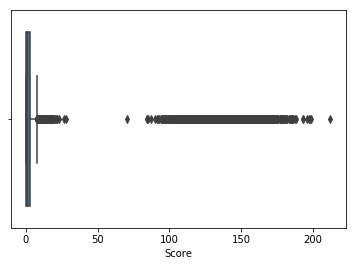

In [132]:
## Box plot of Complicat Datarame after removing outlier.
sns.boxplot(x=Complicat['Score'])

In [133]:
## Lets conver all the measure id in column format from row

df_Complicat=Complicat.pivot(index='Provider ID', columns='Measure ID', values=['Score'])


In [134]:
## Add Measure id to the score column
df_Complicat.columns = ['_'.join(col) for col in df_Complicat.columns]

In [135]:
df_Complicat.columns

Index(['Score_COMP_HIP_KNEE', 'Score_PSI_12_POSTOP_PULMEMB_DVT',
       'Score_PSI_13_POST_SEPSIS', 'Score_PSI_14_POSTOP_DEHIS',
       'Score_PSI_15_ACC_LAC', 'Score_PSI_3_ULCER', 'Score_PSI_4_SURG_COMP',
       'Score_PSI_6_IAT_PTX', 'Score_PSI_7_CVCBI', 'Score_PSI_8_POST_HIP',
       'Score_PSI_90_SAFETY'],
      dtype='object')

##### Our mentor suggested to remove Score_PSI_8_POST_HIP Measure id before performing modelling . Lets remove that 




In [136]:
#df_Complicat.drop(['Score_PSI_8_POST_HIP'], axis=1, inplace= True)

In [137]:
# Getting a missing % count
all_data_missing = (df_Complicat.isnull().sum() / len(df_Complicat)) * 100
all_data_missing = all_data_missing.drop(all_data_missing[all_data_missing == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage':all_data_missing})
missing_data

Missing Percentage
Score_PSI_4_SURG_COMP                     62.266501
Score_PSI_13_POST_SEPSIS                  52.096306
Score_PSI_14_POSTOP_DEHIS                 47.281029
Score_COMP_HIP_KNEE                       43.669572
Score_PSI_8_POST_HIP                      40.514736
Score_PSI_12_POSTOP_PULMEMB_DVT           38.065587
Score_PSI_3_ULCER                         36.114570
Score_PSI_7_CVCBI                         33.769199
Score_PSI_15_ACC_LAC                      33.603155
Score_PSI_6_IAT_PTX                       33.540888
Score_PSI_90_SAFETY                       33.084267

-There are many measure id which has more than 50% missing value , we can drop these measure id before Modelling

In [138]:
## Check shape of Complicat data frmae
df_Complicat.shape

(4818, 11)

- There are almost 9  Measure id avaiable in this data 

### Reading and Understanding (Medical Imaging)

In [139]:
# Encoding 
import chardet
with open('Outpatient Imaging Efficiency - Hospital.csv', 'rb') as f:
    result = chardet.detect(f.read()) 
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [140]:
# Load the Data in Imaging data frame
Imaging = pd.read_csv('Outpatient Imaging Efficiency - Hospital.csv',encoding=result['encoding'])

In [141]:
## Check data
Imaging.head()

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number Measure ID  \
0  DOTHAN    AL     36301     HOUSTON    3347938701      OP_10   
1  DOTHAN    AL     36301     HOUSTON    3347938701      OP_11   
2  DOTHAN    AL     36301     HOUSTON    3347938701      OP_13   
3  DOTHAN    AL     36301     HOUSTON    3347938701      OP_14   
4  DOTHAN    AL     36301     HOUSTON    3347938701       OP_8   

                                        Measure Name Score Footnote  \
0                Abdomen CT Use of Contrast Material   6.4      NaN   
1                 Thorax CT Use of Contrast Material   0.9      NaN   
2  Outpatients who got cardiac imaging stress tes...   7.1      NaN   
3  Outpatients with brain CT scans who got a sinu...   2.4      NaN   
4                 MRI Lumbar Spine for Low Back Pain  38.1      NaN   

  Measure Start Date Measure End Date  
0         07/01/2014       06/30/2015  
1         07/01/2014       06/30/2015  
2         07/01/2014       06/30/2015  
3         07/01/2014       06/30/2015  
4         07/01/2014       06/30/2015

In [142]:
# feature type summary
Complicat.info(verbose=1)
# Let's check the dataframe shapes
print("\nThe   data size is: {} ".format(Imaging.shape)) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52998 entries, 0 to 52997
Data columns (total 18 columns):
Provider ID             52998 non-null int64
Hospital Name           52998 non-null object
Address                 52998 non-null object
City                    52998 non-null object
State                   52998 non-null object
ZIP Code                52998 non-null int64
County Name             52833 non-null object
Phone Number            52998 non-null int64
Measure Name            52998 non-null object
Measure ID              52998 non-null object
Compared to National    34588 non-null object
Denominator             27900 non-null object
Score                   31124 non-null float64
Lower Estimate          31124 non-null object
Higher Estimate         31124 non-null object
Footnote                21874 non-null object
Measure Start Date      52998 non-null object
Measure End Date        52998 non-null object
dtypes: float64(1), int64(3), object(14)
memory usage: 7.3+ MB

T

In [143]:

#How many columns with different datatypes are there?
Imaging.get_dtype_counts()

int64      3
object    11
dtype: int64

In [144]:
# summary statistics for the object and categorical columns
Imaging.describe(include=[np.object, pd.Categorical]).T

count unique  \
Hospital Name       28908   4617   
Address             28908   4789   
City                28908   2949   
State               28908     56   
County Name         28818   1565   
Measure ID          28908      6   
Measure Name        28908      6   
Score               28908    590   
Footnote            12595      5   
Measure Start Date  28908      1   
Measure End Date    28908      1   

                                                                  top   freq  
Hospital Name                                       MEMORIAL HOSPITAL     90  
Address                                            100 HOSPITAL DRIVE     42  
City                                                          CHICAGO    174  
State                                                              TX   2442  
County Name                                               LOS ANGELES    498  
Measure ID                                                      OP_11   4818  
Measure Name                       MRI Lumbar Spine for Low Back Pain   4818  
Score                                                   Not Available  12595  
Footnote            1 - The number of cases/patients is too few to...   5659  
Measure Start Date                                         07/01/2014  28908  
Measure End Date                                           06/30/2015  28908

In [145]:
# summary statistics for the numerical columns 
Imaging.describe(include=[np.number]).T


count          mean           std          min           25%  \
Provider ID   28908.0  2.679835e+05  1.566325e+05      10001.0  1.401850e+05   
ZIP Code      28908.0  5.395619e+04  2.691354e+04        603.0  3.301300e+04   
Phone Number  28908.0  5.849487e+09  2.329567e+09  936933841.0  4.017694e+09   

                       50%           75%           max  
Provider ID   2.600370e+05  3.902110e+05  6.701120e+05  
ZIP Code      5.539550e+04  7.602000e+04  9.992900e+04  
Phone Number  6.053298e+09  7.877569e+09  9.898943e+09

In [146]:
# Let's try to find out the Unique value for each columns 
for x in list(Imaging.columns):
    
    # get a list of unique values
    n = Imaging[x].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(x)
        print('*****************************************************************************************')
        print(n)
    else:
        print(x + ': ' +str(len(n)) + ' unique values')
        print('*****************************************************************************************')
        print(n)

Provider ID: 4818 unique values
*****************************************************************************************
[ 10001  10005  10006 ... 670109 670111 670112]
Hospital Name: 4617 unique values
*****************************************************************************************
['SOUTHEAST ALABAMA MEDICAL CENTER' 'MARSHALL MEDICAL CENTER SOUTH'
 'ELIZA COFFEE MEMORIAL HOSPITAL' ... 'ALTUS BAYTOWN HOSPITAL'
 'CONTINUECARE HOSPITAL AT MEDICAL CENTER ODESSA'
 'CUMBERLAND SURGICAL HOSPITAL']
Address: 4789 unique values
*****************************************************************************************
['1108 ROSS CLARK CIRCLE' '2505 U S HIGHWAY 431 NORTH'
 '205 MARENGO STREET' ... '1626 W BAKER RD'
 '500 WEST  4TH STREET , 4TH FLOOR' '5330 NORTH LOOP 1604 WEST']
City: 2949 unique values
*****************************************************************************************
['DOTHAN' 'BOAZ' 'FLORENCE' ... 'NEW BRAUNFELS' 'PEARLAND' 'MARBLE FALLS']
State: 56 unique val

- Observation
- There are many columns which has Not avaiable as a value and can be replaced with NULL 

In [147]:

# Lets replace Not Avaiable with NULL 
Imaging = Imaging.replace('Not Available', np.nan)

In [148]:
# Getting a missing % count
all_data_missing = (Imaging.isnull().sum() / len(Imaging)) * 100
all_data_missing = all_data_missing.drop(all_data_missing[all_data_missing == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage':all_data_missing})
missing_data

Missing Percentage
Footnote              56.430746
Score                 43.569254
County Name            0.311333

##### Outlier Treatment

In [149]:
## check Statistics for Imaging data frame 
Imaging.describe().T

count          mean           std          min           25%  \
Provider ID   28908.0  2.679835e+05  1.566325e+05      10001.0  1.401850e+05   
ZIP Code      28908.0  5.395619e+04  2.691354e+04        603.0  3.301300e+04   
Phone Number  28908.0  5.849487e+09  2.329567e+09  936933841.0  4.017694e+09   

                       50%           75%           max  
Provider ID   2.600370e+05  3.902110e+05  6.701120e+05  
ZIP Code      5.539550e+04  7.602000e+04  9.992900e+04  
Phone Number  6.053298e+09  7.877569e+09  9.898943e+09

In [150]:
## Check the shape of Imaging Data frmae 
Imaging.shape

(28908, 14)

In [151]:
Imaging['Score']=Imaging['Score'].apply(pd.to_numeric)

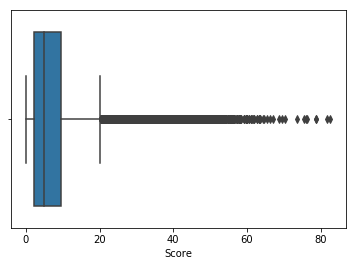

In [152]:
#Boxplot on df_Radm for Score column to check for outliers

sns.boxplot(x=Imaging['Score'])

In [153]:
# Finding out Quartiles - Q1 , Q3 and IQR

Q1 = Imaging['Score'].quantile(0.25)
Q3 = Imaging['Score'].quantile(0.75)
Q3 = Imaging['Score'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)



7.2


In [154]:
#Checking out and analysing Data which can be removed using IQR method of Outlier removal

df_Outlier = Imaging[((Imaging['Score'] < (Q1 - 1.5 * IQR)) |(Imaging['Score'] > (Q3 + 1.5 * IQR)))]
print("Shape of Outlier data  :  " , df_Outlier.shape )

df_Outlier[['Measure ID' ,'Score']]

Shape of Outlier data  :   (2027, 14)


Measure ID  Score
4           OP_8   38.1
10          OP_8   42.8
16          OP_8   45.6
18         OP_10   24.3
23          OP_9   20.7
34          OP_8   36.2
42         OP_10   31.4
46          OP_8   37.8
54         OP_10   21.0
58          OP_8   38.4
64          OP_8   52.9
76          OP_8   45.9
82          OP_8   45.7
88          OP_8   46.7
96         OP_10   23.6
100         OP_8   40.3
112         OP_8   45.6
118         OP_8   36.8
124         OP_8   52.8
130         OP_8   39.5
136         OP_8   38.3
148         OP_8   49.0
166         OP_8   50.0
184         OP_8   43.0
190         OP_8   47.7
208         OP_8   43.9
210        OP_10   33.3
220         OP_8   49.1
238         OP_8   39.0
240        OP_10   26.6
244         OP_8   31.3
246        OP_10   21.2
250         OP_8   32.0
256         OP_8   41.2
262         OP_8   53.6
264        OP_10   22.8
274         OP_8   56.4
276        OP_10   41.0
280         OP_8   47.3
282        OP_10   30.8
283        OP_11   24.0
292         OP_8   47.2
306        OP_10   33.7
310         OP_8   59.7
316         OP_8   38.7
334         OP_8   42.2
340         OP_8   43.8
346         OP_8   52.6
364         OP_8   41.9
366        OP_10   64.6
370         OP_8   39.3
376         OP_8   35.7
382         OP_8   37.1
388         OP_8   50.0
394         OP_8   36.7
402        OP_10   29.6
408        OP_10   32.3
415        OP_11   24.1
424         OP_8   41.9
436         OP_8   52.8
438        OP_10   36.0
444        OP_10   28.2
454         OP_8   39.7
460         OP_8   43.0
468        OP_10   24.4
472         OP_8   40.7
473         OP_9   22.7
478         OP_8   47.8
484         OP_8   45.8
492        OP_10   20.9
538         OP_8   50.0
556         OP_8   61.8
634         OP_8   31.5
654        OP_10   52.3
658         OP_8   40.7
664         OP_8   48.7
666        OP_10   25.8
682         OP_8   39.0
688         OP_8   33.3
700         OP_8   29.0
724         OP_8   47.1
730         OP_8   30.6
742         OP_8   47.9
748         OP_8   36.7
766         OP_8   36.6
844         OP_8   46.3
862         OP_8   39.0
918        OP_10   21.2
922         OP_8   41.2
928         OP_8   41.1
1000        OP_8   52.5
1120        OP_8   40.4
1126        OP_8   38.7
1138        OP_8   43.8
1144        OP_8   39.4
1150        OP_8   35.7
1156        OP_8   45.8
1168        OP_8   41.3
1170       OP_10   43.3
1174        OP_8   36.2
1180        OP_8   51.4
1186        OP_8   48.5
1192        OP_8   40.1
1198        OP_8   45.9
1205        OP_8   32.9
1252        OP_8   41.4
1254       OP_10   39.5
1258        OP_8   35.4
1264        OP_8   53.2
1276        OP_8   52.6
1278       OP_10   41.6
1279       OP_11   35.1
1282        OP_8   43.1
1288        OP_8   57.5
1290       OP_10   54.9
1294        OP_8   37.4
1300        OP_8   51.4
1306        OP_8   51.4
1312        OP_8   52.3
1318        OP_8   59.6
1330        OP_8   48.6
1336        OP_8   42.3
1348        OP_8   43.3
1360        OP_8   37.0
1366        OP_8   38.1
1368       OP_10   30.2
1372        OP_8   38.9
1378        OP_8   35.4
1396        OP_8   42.1
1402        OP_8   43.7
1453       OP_11   20.8
1470       OP_10   32.7
1471       OP_11   49.4
1486        OP_8   50.0
1534        OP_8   47.4
1542       OP_10   26.2
1564        OP_8   60.0
1566       OP_10   37.5
1567       OP_11   30.0
1606        OP_8   24.3
1612        OP_8   36.9
1624        OP_8   36.9
1636        OP_8   35.1
1666        OP_8   33.3
1672        OP_8   39.5
1684        OP_8   35.2
1696        OP_8   45.6
1714        OP_8   52.7
1726        OP_8   50.0
1756        OP_8   42.7
...          ...    ...
26533       OP_8   33.3
26551       OP_8   41.8
26553      OP_10   39.7
26563       OP_8   37.1
26569       OP_8   31.6
26575       OP_8   42.4
26581       OP_8   41.3
26599       OP_8   28.0
26605       OP_8   42.4
26611       OP_8   38.5
26617       OP_8   47.4
26623       OP_8   40.4
26629       OP_8   47.3
26635       OP_8   41.0
26647       OP_8   37.

In [155]:
#Lets check the unique values of Measure ID to check which Measure ID are impacted
print(df_Outlier['Measure ID'].unique())

['OP_8' 'OP_10' 'OP_9' 'OP_11']


In [156]:
## Checking statistics for Outlier records 
df_Outlier[['Score']].describe(percentiles=[0.01,0.05,0.10,0.25,0.5,0.75,0.9,0.95,0.97,0.99,0.9905]).T

count       mean       std   min    1%     5%    10%   25%   50%  \
Score  2027.0  38.423631  9.266763  20.3  20.8  22.43  25.56  32.7  38.3   

         75%   90%   95%     97%     99%   99.05%   max  
Score  44.15  50.0  53.2  56.222  62.774  63.1012  82.6

In [157]:
## Check rows which has value more than80
Imaging[Imaging.Score >=80].shape

(2, 14)

In [158]:
#Removing the outlier
#Imaging = Imaging[~(Imaging.Score >=80)]

In [159]:
## Check the shape 
Imaging.shape

(28908, 14)

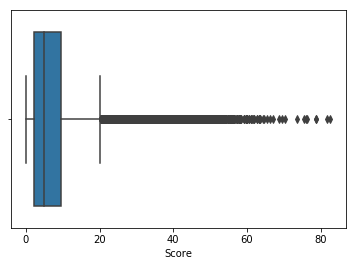

In [160]:
## Check the box plot for score column after removing outlier 
sns.boxplot(x=Imaging['Score'])

In [161]:
## Lets convert all the measure id from row format to Column format
df_Imaging=Imaging.pivot(index='Provider ID', columns='Measure ID', values=['Score'])

In [162]:
### Ading Measure id to Column Name 
df_Imaging.columns = ['_'.join(col) for col in df_Imaging.columns]

In [163]:
df_Imaging.columns

Index(['Score_OP_10', 'Score_OP_11', 'Score_OP_13', 'Score_OP_14',
       'Score_OP_8', 'Score_OP_9'],
      dtype='object')

In [164]:
#Check top 5 rows for Imaging data frmae 
df_Imaging.head()

Score_OP_10  Score_OP_11  Score_OP_13  Score_OP_14  Score_OP_8  \
Provider ID                                                                   
10001                6.4          0.9          7.1          2.4        38.1   
10005               13.3         10.2          5.3          4.0        42.8   
10006               11.8          4.6          0.0          4.6        45.6   
10007               24.3          6.1          NaN          NaN         NaN   
10008                3.6          NaN          NaN          0.6         NaN   

             Score_OP_9  
Provider ID              
10001               6.9  
10005               5.1  
10006               9.1  
10007              20.7  
10008               8.2

In [165]:
df_Imaging.shape

(4818, 6)

- There are 5 Measure id in Imaging Group

In [166]:
# Getting a missing % count
all_data_missing = (df_Imaging.isnull().sum() / len(df_Imaging)) * 100
all_data_missing = all_data_missing.drop(all_data_missing[all_data_missing == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage':all_data_missing})
missing_data

Missing Percentage
Score_OP_8            68.368618
Score_OP_13           53.652968
Score_OP_14           52.179328
Score_OP_9            32.046492
Score_OP_11           30.489830
Score_OP_10           24.678290

- There are many measure id which has more than 50% missing value and can be dropped before modelling

### Reading and Understanding Data (HCA HPS - Patient Experience)

In [167]:
# Identifying the encoding takes time, so hard coding the encoding value.
df_hcahps = pd.read_csv('HCAHPS - Hospital.csv',encoding='Windows-1252')

In [168]:
## Check Df
df_hcahps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264990 entries, 0 to 264989
Data columns (total 22 columns):
Provider ID                              264990 non-null int64
Hospital Name                            264990 non-null object
Address                                  264990 non-null object
City                                     264990 non-null object
State                                    264990 non-null object
ZIP Code                                 264990 non-null int64
County Name                              264165 non-null object
Phone Number                             264990 non-null int64
HCAHPS Measure ID                        264990 non-null object
HCAHPS Question                          264990 non-null object
HCAHPS Answer Description                264990 non-null object
Patient Survey Star Rating               264990 non-null object
Patient Survey Star Rating Footnote      15720 non-null object
HCAHPS Answer Percent                    264990 non-null obje

In [169]:
## Check statstics
df_hcahps.describe(include=[np.object, pd.Categorical]).T

count unique  \
Hospital Name                          264990   4617   
Address                                264990   4789   
City                                   264990   2949   
State                                  264990     56   
County Name                            264165   1565   
HCAHPS Measure ID                      264990     55   
HCAHPS Question                        264990     55   
HCAHPS Answer Description              264990     55   
Patient Survey Star Rating             264990      7   
Patient Survey Star Rating Footnote     15720      3   
HCAHPS Answer Percent                  264990    103   
HCAHPS Answer Percent Footnote          44032     13   
HCAHPS Linear Mean Value               264990     45   
Number of Completed Surveys            264990   1611   
Number of Completed Surveys Footnote    31735      3   
Survey Response Rate Percent           264990     75   
Survey Response Rate Percent Footnote   75735     13   
Measure Start Date                     264990      1   
Measure End Date                       264990      1   

                                                                                     top  \
Hospital Name                                                          MEMORIAL HOSPITAL   
Address                                                               100 HOSPITAL DRIVE   
City                                                                             CHICAGO   
State                                                                                 TX   
County Name                                                                  LOS ANGELES   
HCAHPS Measure ID                                                   H_COMP_5_STAR_RATING   
HCAHPS Question                        Patients who reported that their pain was "Usu...   
HCAHPS Answer Description                Yes, staff "did" give patients this information   
Patient Survey Star Rating                                                Not Applicable   
Patient Survey Star Rating Footnote    15 - The number of cases/patients is too few t...   
HCAHPS Answer Percent                                                     Not Applicable   
HCAHPS Answer Percent Footnote         5 - Results are not available for this reporti...   
HCAHPS Linear Mean Value                                                  Not Applicable   
Number of Completed Surveys                                                Not Available   
Number of Completed Surveys Footnote   5 - Results are not available for this reporti...   
Survey Response Rate Percent                                               Not Available   
Survey Response Rate Percent Footnote  5 - Results are not available for this reporti...   
Measure Start Date                                                            01/01/2015   
Measure End Date                                                              12/31/2015   

                                         freq  
Hospital Name                             825  
Address                                   385  
City                                     1595  
State                                   22385  
County Name                              4565  
HCAHPS Measure ID                        4818  
HCAHPS Question                          4818  
HCAHPS Answer Description                4818  
Patient Survey Star Rating             207174  
Patient Survey Star Rating Footnote      8796  
HCAHPS Answer Percent                  110814  
HCAHPS Answer Percent Footnote          12320  
HCAHPS Linear Mean Value               211992  
Number of Completed Surveys             31735  
Number of Completed Surveys Footnote    21175  
Survey Response Rate Percent            31845  
Survey Response Rate Percent Footnote   21230  
Measure Start Date                     264990  
Measure End Date                       264990

In [170]:
## Lets check the shape

df_hcahps.shape

(264990, 22)

In [171]:
# Let's try to find out the Unique value for each columns 
for x in list(df_hcahps.columns):
    
    # get a list of unique values
    n = df_hcahps[x].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(x)
        print('*****************************************************************************************')
        print(n)
    else:
        print(x + ': ' +str(len(n)) + ' unique values')
        print('*****************************************************************************************')
        print(n)

Provider ID: 4818 unique values
*****************************************************************************************
[ 10001  10005  10006 ... 670109 670111 670112]
Hospital Name: 4617 unique values
*****************************************************************************************
['SOUTHEAST ALABAMA MEDICAL CENTER' 'MARSHALL MEDICAL CENTER SOUTH'
 'ELIZA COFFEE MEMORIAL HOSPITAL' ... 'ALTUS BAYTOWN HOSPITAL'
 'CONTINUECARE HOSPITAL AT MEDICAL CENTER ODESSA'
 'CUMBERLAND SURGICAL HOSPITAL']
Address: 4789 unique values
*****************************************************************************************
['1108 ROSS CLARK CIRCLE' '2505 U S HIGHWAY 431 NORTH'
 '205 MARENGO STREET' ... '1626 W BAKER RD'
 '500 WEST  4TH STREET , 4TH FLOOR' '5330 NORTH LOOP 1604 WEST']
City: 2949 unique values
*****************************************************************************************
['DOTHAN' 'BOAZ' 'FLORENCE' ... 'NEW BRAUNFELS' 'PEARLAND' 'MARBLE FALLS']
State: 56 unique val

Survey Response Rate Percent: 75 unique values
*****************************************************************************************
['27' '36' '25' '33' '31' '28' '29' '26' '46' '39' '21' '34' '24' '30'
 '14' '18' '35' '38' '17' '41' '15' '22' '23' '32' '6' '51' '43' '44'
 'Not Available' '19' '37' '8' '20' '55' '59' '45' '49' '10' '40' '58'
 '13' '16' '12' '11' '9' '52' '60' '48' '47' '56' '76' '50' '42' '7' '69'
 '61' '68' '74' '53' '88' '4' '54' '78' '66' '5' '63' '57' '70' '75' '65'
 '64' '72' '67' '77' '62']
Survey Response Rate Percent Footnote
*****************************************************************************************
[nan
 '6 - Fewer than 100 patients completed the HCAHPS survey. Use these scores with caution, as the number of surveys may be too low to reliably assess hospital performance.'
 '10 - Very few patients were eligible for the HCAHPS survey. The scores shown reflect fewer than 50 completed surveys. Use these scores with caution, as the number of sur

#### Data Cleaning

In [172]:
## All the not Avaiable value can be replaced with NAN
df_hcahps = df_hcahps.replace(['Not Available','Not Applicable',''], np.nan)

In [173]:
# Missing percentages:
((df_hcahps.isnull().sum() / len(df_hcahps)) * 100).sort_values(ascending=False)

Patient Survey Star Rating Footnote      94.067701
Number of Completed Surveys Footnote     88.024076
HCAHPS Linear Mean Value                 85.437941
Patient Survey Star Rating               84.114118
HCAHPS Answer Percent Footnote           83.383524
Survey Response Rate Percent Footnote    71.419676
HCAHPS Answer Percent                    48.855429
Survey Response Rate Percent             12.017435
Number of Completed Surveys              11.975924
County Name                               0.311333
Measure End Date                          0.000000
ZIP Code                                  0.000000
Hospital Name                             0.000000
Address                                   0.000000
City                                      0.000000
State                                     0.000000
HCAHPS Answer Description                 0.000000
Phone Number                              0.000000
HCAHPS Measure ID                         0.000000
HCAHPS Question                

In [174]:
## Removes all the rows where Survey Start rating is null 
df_hcahps = df_hcahps[~df_hcahps['Patient Survey Star Rating'].isnull()]

In [175]:
## Df shape after remove null value
df_hcahps.shape

(42096, 22)

In [176]:
# Missing percentages:
((df_hcahps.isnull().sum() / len(df_hcahps)) * 100).sort_values(ascending=False)

Number of Completed Surveys Footnote     100.000000
HCAHPS Linear Mean Value                 100.000000
HCAHPS Answer Percent Footnote           100.000000
HCAHPS Answer Percent                    100.000000
Patient Survey Star Rating Footnote      100.000000
Survey Response Rate Percent Footnote     98.090080
County Name                                0.114025
Survey Response Rate Percent               0.028506
Measure End Date                           0.000000
Hospital Name                              0.000000
Address                                    0.000000
City                                       0.000000
State                                      0.000000
ZIP Code                                   0.000000
HCAHPS Answer Description                  0.000000
Phone Number                               0.000000
HCAHPS Measure ID                          0.000000
HCAHPS Question                            0.000000
Measure Start Date                         0.000000
Patient Surv

In [177]:
# check the missing values again
((df_hcahps.isnull().sum() / len(df_hcahps)) * 100).sort_values(ascending=False)

Number of Completed Surveys Footnote     100.000000
HCAHPS Linear Mean Value                 100.000000
HCAHPS Answer Percent Footnote           100.000000
HCAHPS Answer Percent                    100.000000
Patient Survey Star Rating Footnote      100.000000
Survey Response Rate Percent Footnote     98.090080
County Name                                0.114025
Survey Response Rate Percent               0.028506
Measure End Date                           0.000000
Hospital Name                              0.000000
Address                                    0.000000
City                                       0.000000
State                                      0.000000
ZIP Code                                   0.000000
HCAHPS Answer Description                  0.000000
Phone Number                               0.000000
HCAHPS Measure ID                          0.000000
HCAHPS Question                            0.000000
Measure Start Date                         0.000000
Patient Surv

##### Outlier Treatment

In [178]:
## Convert Patient Survey Star Rating to Numeric Column 
df_hcahps['Patient Survey Star Rating']=df_hcahps['Patient Survey Star Rating'].apply(pd.to_numeric)

In [179]:
## Check statistics for Patient Survey Star Rating column
df_hcahps.describe().T

count          mean           std           min  \
Provider ID                 42096.0  2.619303e+05  1.574325e+05  1.000100e+04   
ZIP Code                    42096.0  5.213770e+04  2.756246e+04  8.010000e+02   
Phone Number                42096.0  5.849105e+09  2.373869e+09  2.013831e+09   
Patient Survey Star Rating  42096.0  3.176953e+00  9.943764e-01  1.000000e+00   

                                     25%           50%           75%  \
Provider ID                 1.300645e+05  2.500460e+05  3.900792e+05   
ZIP Code                    3.034200e+04  4.993250e+04  7.577025e+04   
Phone Number                3.604330e+09  6.036594e+09  8.034598e+09   
Patient Survey Star Rating  3.000000e+00  3.000000e+00  4.000000e+00   

                                     max  
Provider ID                 6.701030e+05  
ZIP Code                    9.990100e+04  
Phone Number                9.898943e+09  
Patient Survey Star Rating  5.000000e+00

In [180]:
## Check shape
df_hcahps.shape

(42096, 22)

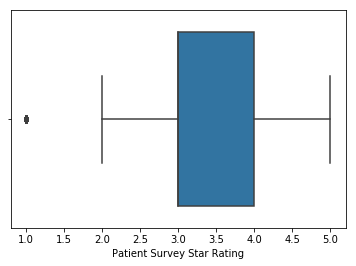

In [181]:
#Boxplot on df_hcaps for Patient Survey Star Rating column to check for outliers

import seaborn as sns
sns.boxplot(x=df_hcahps['Patient Survey Star Rating'])

In [182]:
# Finding out Quartiles - Q1 , Q3 and IQR

Q1 = df_hcahps['Patient Survey Star Rating'].quantile(0.25)
Q3 = df_hcahps['Patient Survey Star Rating'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


In [183]:
#Checking out and analysing Data which can be removed using IQR method of Outlier removal

df_Outlier = df_hcahps[((df_hcahps['Patient Survey Star Rating'] < (Q1 - 1.5 * IQR)) |(df_hcahps['Patient Survey Star Rating'] > (Q3 + 1.5 * IQR)))]

print("Shape of Outlier data  :  " , df_Outlier.shape )

df_Outlier[['HCAHPS Measure ID' ,'Patient Survey Star Rating']]

Shape of Outlier data  :   (2067, 22)


HCAHPS Measure ID  Patient Survey Star Rating
280          H_CLEAN_STAR_RATING                           1
390          H_CLEAN_STAR_RATING                           1
1414        H_COMP_7_STAR_RATING                           1
1459        H_COMP_5_STAR_RATING                           1
1463        H_COMP_6_STAR_RATING                           1
1469        H_COMP_7_STAR_RATING                           1
1848        H_COMP_6_STAR_RATING                           1
2074        H_COMP_7_STAR_RATING                           1
2624        H_COMP_7_STAR_RATING                           1
3333        H_COMP_6_STAR_RATING                           1
3484        H_COMP_3_STAR_RATING                           1
3504        H_COMP_7_STAR_RATING                           1
3519        H_RECMND_STAR_RATING                           1
3669        H_COMP_7_STAR_RATING                           1
4240         H_CLEAN_STAR_RATING                           1
4329        H_COMP_7_STAR_RATING                           1
5175         H_CLEAN_STAR_RATING                           1
5194        H_COMP_4_STAR_RATING                           1
5209        H_COMP_7_STAR_RATING                           1
5264        H_COMP_7_STAR_RATING                           1
5274         H_QUIET_STAR_RATING                           1
5924        H_COMP_7_STAR_RATING                           1
5939        H_RECMND_STAR_RATING                           1
6319         H_QUIET_STAR_RATING                           1
6429         H_QUIET_STAR_RATING                           1
6474        H_COMP_7_STAR_RATING                           1
6649         H_QUIET_STAR_RATING                           1
6804        H_COMP_7_STAR_RATING                           1
6834        H_COMP_2_STAR_RATING                           1
7034         H_QUIET_STAR_RATING                           1
7045         H_CLEAN_STAR_RATING                           1
7059        H_COMP_3_STAR_RATING                           1
7064        H_COMP_4_STAR_RATING                           1
7079        H_COMP_7_STAR_RATING                           1
7084    H_HSP_RATING_STAR_RATING                           1
7094        H_RECMND_STAR_RATING                           1
7589        H_RECMND_STAR_RATING                           1
7794        H_COMP_7_STAR_RATING                           1
7870         H_CLEAN_STAR_RATING                           1
8035         H_CLEAN_STAR_RATING                           1
8200         H_CLEAN_STAR_RATING                           1
8264        H_COMP_2_STAR_RATING                           1
8564        H_COMP_7_STAR_RATING                           1
8585         H_CLEAN_STAR_RATING                           1
8629         H_QUIET_STAR_RATING                           1
8869        H_COMP_2_STAR_RATING                           1
9034        H_COMP_2_STAR_RATING                           1
9053        H_COMP_6_STAR_RATING                           1
9059        H_COMP_7_STAR_RATING                           1
9114        H_COMP_7_STAR_RATING                           1
10159       H_COMP_7_STAR_RATING                           1
10214       H_COMP_7_STAR_RATING                           1
10224        H_QUIET_STAR_RATING                           1
10290        H_CLEAN_STAR_RATING                           1
10299       H_COMP_2_STAR_RATING                           1
10324       H_COMP_7_STAR_RATING                           1
10675        H_CLEAN_STAR_RATING                           1
10804       H_COMP_4_STAR_RATING                           1
10813       H_COMP_6_STAR_RATING                           1
11919       H_COMP_7_STAR_RATING                           1
11935              H_STAR_RATING                           1
11940        H_CLEAN_STAR_RATING                           1
11949       H_COMP_2_STAR_RATING                           1
11954       H_COMP_3_STAR_RATING                           1
11959       H_COMP_4_STAR_RATING                  

In [184]:
#Lets check the unique values of Measure ID to check which Measure ID are impacted
print(df_Outlier['HCAHPS Measure ID'].unique())

['H_CLEAN_STAR_RATING' 'H_COMP_7_STAR_RATING' 'H_COMP_5_STAR_RATING'
 'H_COMP_6_STAR_RATING' 'H_COMP_3_STAR_RATING' 'H_RECMND_STAR_RATING'
 'H_COMP_4_STAR_RATING' 'H_QUIET_STAR_RATING' 'H_COMP_2_STAR_RATING'
 'H_HSP_RATING_STAR_RATING' 'H_STAR_RATING' 'H_COMP_1_STAR_RATING']


In [185]:
df_Outlier[['Patient Survey Star Rating']].describe(percentiles=[0.01,0.05,0.10,0.25,0.5,0.75,0.9,0.95,0.97,0.99,0.9905]).T

count  mean  std  min   1%   5%  10%  25%  50%  \
Patient Survey Star Rating  2067.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0   

                            75%  90%  95%  97%  99%  99.05%  max  
Patient Survey Star Rating  1.0  1.0  1.0  1.0  1.0     1.0  1.0

In [186]:
#Removing the outlier
#df_hcahps = df_hcahps[~(df_hcahps['Patient Survey Star Rating'] ==1)]

In [187]:
## Shape of Data frame after removing outlier 
df_hcahps.shape

(42096, 22)

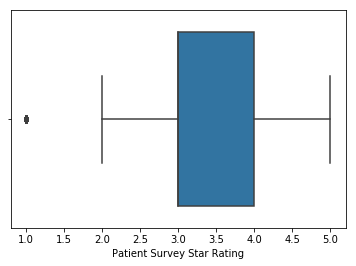

In [188]:
## Box plot after removing outlier 
sns.boxplot(x=df_hcahps['Patient Survey Star Rating'])

In [189]:
## Convert all the measure id data to column format by using pivot table 
df_hcahps_eda = df_hcahps.pivot(index='Provider ID', columns='HCAHPS Measure ID', 
                                values=['Patient Survey Star Rating'])

In [190]:
## Check shape of data
df_hcahps_eda.shape

(3508, 12)

In [191]:
## Check top 5 rows of data 
df_hcahps_eda.head(5)

Patient Survey Star Rating                       \
HCAHPS Measure ID        H_CLEAN_STAR_RATING H_COMP_1_STAR_RATING   
Provider ID                                                         
10001                                      2                    3   
10005                                      2                    3   
10006                                      2                    3   
10007                                      3                    3   
10011                                      1                    3   

                                                             \
HCAHPS Measure ID H_COMP_2_STAR_RATING H_COMP_3_STAR_RATING   
Provider ID                                                   
10001                                3                    2   
10005                                4                    3   
10006                                4                    3   
10007                                5                    4   
10011                                3                    2   

                                                             \
HCAHPS Measure ID H_COMP_4_STAR_RATING H_COMP_5_STAR_RATING   
Provider ID                                                   
10001                                3                    3   
10005                                3                    3   
10006                                3                    3   
10007                                4                    4   
10011                                3                    2   

                                                             \
HCAHPS Measure ID H_COMP_6_STAR_RATING H_COMP_7_STAR_RATING   
Provider ID                                                   
10001                                3                    3   
10005                                4                    2   
10006                                2                    2   
10007                                3                    3   
10011                                3                    2   

                                                                \
HCAHPS Measure ID H_HSP_RATING_STAR_RATING H_QUIET_STAR_RATING   
Provider ID                                                      
10001                                    4                   4   
10005                                    4                   4   
10006                                    2                   4   
10007                                    3                   5   
10011                                    3                   3   

                                                      
HCAHPS Measure ID H_RECMND_STAR_RATING H_STAR_RATING  
Provider ID                                           
10001                                4             3  
10005                                3             3  
10006                                2             3  
10007                                3             4  
10011                                3             3

In [192]:
## Adding measure id to Column name 
df_hcahps_eda.columns = ['_'.join(col) for col in df_hcahps_eda.columns]

In [193]:
## Check 5 top rows 
df_hcahps_eda.head(5)

Patient Survey Star Rating_H_CLEAN_STAR_RATING  \
Provider ID                                                   
10001                                                     2   
10005                                                     2   
10006                                                     2   
10007                                                     3   
10011                                                     1   

             Patient Survey Star Rating_H_COMP_1_STAR_RATING  \
Provider ID                                                    
10001                                                      3   
10005                                                      3   
10006                                                      3   
10007                                                      3   
10011                                                      3   

             Patient Survey Star Rating_H_COMP_2_STAR_RATING  \
Provider ID                                                    
10001                                                      3   
10005                                                      4   
10006                                                      4   
10007                                                      5   
10011                                                      3   

             Patient Survey Star Rating_H_COMP_3_STAR_RATING  \
Provider ID                                                    
10001                                                      2   
10005                                                      3   
10006                                                      3   
10007                                                      4   
10011                                                      2   

             Patient Survey Star Rating_H_COMP_4_STAR_RATING  \
Provider ID                                                    
10001                                                      3   
10005                                                      3   
10006                                                      3   
10007                                                      4   
10011                                                      3   

             Patient Survey Star Rating_H_COMP_5_STAR_RATING  \
Provider ID                                                    
10001                                                      3   
10005                                                      3   
10006                                                      3   
10007                                                      4   
10011                                                      2   

             Patient Survey Star Rating_H_COMP_6_STAR_RATING  \
Provider ID                                                    
10001                                                      3   
10005                                                      4   
10006                                                      2   
10007                                                      3   
10011                                                      3   

             Patient Survey Star Rating_H_COMP_7_STAR_RATING  \
Provider ID                                                    
10001                                                      3   
10005                                                      2   
10006                                                      2   
10007                                                      3   
10011                                                      2   

             Patient Survey Star Rating_H_HSP_RATING_STAR_RATING  \
Provider ID                                                        
10001                                                        4     
10005                                                        4     
10006                                                        2     
10007                                                        3     
10011               

### ### Reading and Understanding Data (Timely & Effective Care - Timeliness of Care)

In [194]:
## Load Time and Effective care data in Data frame
df_tec = pd.read_csv('Timely and Effective Care - Hospital.csv',encoding='Windows-1252')

In [195]:
## Check data frame
df_tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207174 entries, 0 to 207173
Data columns (total 16 columns):
Provider ID           207174 non-null int64
Hospital Name         207174 non-null object
Address               207174 non-null object
City                  207174 non-null object
State                 207174 non-null object
ZIP Code              207174 non-null int64
County Name           206529 non-null object
Phone Number          207174 non-null int64
Condition             207174 non-null object
Measure ID            207174 non-null object
Measure Name          207174 non-null object
Score                 207174 non-null object
Sample                202356 non-null object
Footnote              160185 non-null object
Measure Start Date    207174 non-null object
Measure End Date      207174 non-null object
dtypes: int64(3), object(13)
memory usage: 25.3+ MB


In [196]:
## Check Statistics
df_tec.describe(include=[np.object, pd.Categorical]).T

count unique  \
Hospital Name       207174   4617   
Address             207174   4789   
City                207174   2949   
State               207174     56   
County Name         206529   1565   
Condition           207174     11   
Measure ID          207174     43   
Measure Name        207174     43   
Score               207174    583   
Sample              202356   5988   
Footnote            160185     13   
Measure Start Date  207174      5   
Measure End Date    207174      5   

                                                                  top    freq  
Hospital Name                                       MEMORIAL HOSPITAL     645  
Address                                            100 HOSPITAL DRIVE     301  
City                                                          CHICAGO    1247  
State                                                              TX   17501  
County Name                                               LOS ANGELES    3569  
Condition                                                 Stroke Care   38544  
Measure ID                                                      VTE_1    4818  
Measure Name        Surgery Patients on a Beta Blocker Prior to Ar...    4818  
Score                                                   Not Available  129024  
Sample                                                  Not Available  127487  
Footnote            5 - Results are not available for this reporti...   86714  
Measure Start Date                                         01/01/2015  178266  
Measure End Date                                           12/31/2015  110814

In [197]:
## Let's try to find out the Unique value for each columns 
for x in list(df_tec.columns):
    
    # get a list of unique values
    n = df_tec[x].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(x)
        print('*****************************************************************************************')
        print(n)
    else:
        print(x + ': ' +str(len(n)) + ' unique values')
        print('*****************************************************************************************')
        print(n)

Provider ID: 4818 unique values
*****************************************************************************************
[ 10001  10005  10006 ... 670109 670111 670112]
Hospital Name: 4617 unique values
*****************************************************************************************
['SOUTHEAST ALABAMA MEDICAL CENTER' 'MARSHALL MEDICAL CENTER SOUTH'
 'ELIZA COFFEE MEMORIAL HOSPITAL' ... 'ALTUS BAYTOWN HOSPITAL'
 'CONTINUECARE HOSPITAL AT MEDICAL CENTER ODESSA'
 'CUMBERLAND SURGICAL HOSPITAL']
Address: 4789 unique values
*****************************************************************************************
['1108 ROSS CLARK CIRCLE' '2505 U S HIGHWAY 431 NORTH'
 '205 MARENGO STREET' ... '1626 W BAKER RD'
 '500 WEST  4TH STREET , 4TH FLOOR' '5330 NORTH LOOP 1604 WEST']
City: 2949 unique values
*****************************************************************************************
['DOTHAN' 'BOAZ' 'FLORENCE' ... 'NEW BRAUNFELS' 'PEARLAND' 'MARBLE FALLS']
State: 56 unique val

Sample: 5989 unique values
*****************************************************************************************
['Not Available' '24' '535' ... '5505' '6069' '6264']
Footnote
*****************************************************************************************
['7 - No cases met the criteria for this measure.'
 '3 - Results are based on a shorter time period than required.'
 '5 - Results are not available for this reporting period.'
 '2 - Data submitted were based on a sample of cases/patients.' nan
 '3 - Results are based on a shorter time period than required., 7 - No cases met the criteria for this measure.'
 '1 - The number of cases/patients is too few to report.'
 '1 - The number of cases/patients is too few to report., 3 - Results are based on a shorter time period than required.'
 '2 - Data submitted were based on a sample of cases/patients., 3 - Results are based on a shorter time period than required.'
 '1 - The number of cases/patients is too few to report., 2 - Data

In [198]:
## Not avaible value can be replaced with NAN
df_tec = df_tec.replace(['Not Available','Not Applicable',''], np.nan)

In [199]:
# Missing percentages:
((df_tec.isnull().sum() / len(df_tec)) * 100).sort_values(ascending=False)

Sample                63.861778
Score                 62.278085
Footnote              22.680935
County Name            0.311333
Measure End Date       0.000000
Measure Start Date     0.000000
Measure Name           0.000000
Measure ID             0.000000
Condition              0.000000
Phone Number           0.000000
ZIP Code               0.000000
State                  0.000000
City                   0.000000
Address                0.000000
Hospital Name          0.000000
Provider ID            0.000000
dtype: float64

In [200]:
# Missing percentages:
((df_tec.isnull().sum() / len(df_tec)) * 100).sort_values(ascending=False)

Sample                63.861778
Score                 62.278085
Footnote              22.680935
County Name            0.311333
Measure End Date       0.000000
Measure Start Date     0.000000
Measure Name           0.000000
Measure ID             0.000000
Condition              0.000000
Phone Number           0.000000
ZIP Code               0.000000
State                  0.000000
City                   0.000000
Address                0.000000
Hospital Name          0.000000
Provider ID            0.000000
dtype: float64

In [201]:
# Missing percentages:
((df_tec.isnull().sum() / len(df_tec)) * 100).sort_values(ascending=False)

Sample                63.861778
Score                 62.278085
Footnote              22.680935
County Name            0.311333
Measure End Date       0.000000
Measure Start Date     0.000000
Measure Name           0.000000
Measure ID             0.000000
Condition              0.000000
Phone Number           0.000000
ZIP Code               0.000000
State                  0.000000
City                   0.000000
Address                0.000000
Hospital Name          0.000000
Provider ID            0.000000
dtype: float64

- Lets convert all the measure id from row to Column format 

In [202]:
## Check score of final data frame
df_tec['Score']

0                                              NaN
1                                               92
2                                              NaN
3                                              269
4                                               68
5         High (40,000 - 59,999 patients annually)
6                                              100
7                                               97
8                                               81
9                                              NaN
10                                             196
11                                             NaN
12                                              65
13                                              99
14                                               4
15                                             NaN
16                                             NaN
17                                              82
18                                             NaN
19                             

In [203]:
## Removing all the record which has null in score 
df_tec = df_tec[~df_tec['Score'].isnull()]

In [204]:
## Check the shape of data frame
df_tec.shape

(78150, 16)

In [205]:
#Convert the Score value to numeric value and Assign value where it has Low ,Medium high and very high value   
def Score_EDV(x):
   # "We are converting these value as per below logic "
    if x == 'Low (0 - 19,999 patients annually)':
        return 10
    elif x == 'Medium (20,000 - 39,999 patients annually)':
        return 30
    elif x == 'High (40,000 - 59,999 patients annually)':
        return 50
    elif x == 'Very High (60,000+ patients annually)':
        return 70
    else:
        return x

#df_tec['Score'] = df_tec['Score'].apply(lambda x: Score_EDV(x))

In [206]:

## Check the head 
df_tec.head(5)

Provider ID                     Hospital Name                 Address  \
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
5        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
6        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
1  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   
5  DOTHAN    AL     36301     HOUSTON    3347938701   
6  DOTHAN    AL     36301     HOUSTON    3347938701   

                    Condition Measure ID  \
1  Heart Attack or Chest Pain     AMI_8a   
3        Emergency Department      ED_1b   
4        Emergency Department      ED_2b   
5        Emergency Department        EDV   
6               Heart Failure       HF_2   

                                        Measure Name  \
1  Primary PCI Received Within 90 Minutes of Hosp...   
3                                                ED1   
4                                                ED2   
5                        Emergency department volume   
6                         Evaluation of LVS Function   

                                      Score Sample  \
1                                        92     24   
3                                       269    535   
4                                        68    535   
5  High (40,000 - 59,999 patients annually)    NaN   
6                                       100    337   

                                            Footnote Measure Start Date  \
1  3 - Results are based on a shorter time period...         01/01/2015   
3  2 - Data submitted were based on a sample of c...         01/01/2015   
4  2 - Data submitted were based on a sample of c...         01/01/2015   
5                                                NaN         01/01/2014   
6  3 - Results are based on a shorter time period...         01/01/2015   

  Measure End Date  
1       09/30/2015  
3       12/31/2015  
4       12/31/2015  
5       12/31/2014  
6       09/30/2015

In [207]:
#Check the score to numeric column
#df_tec['Score']  = df_tec['Score'].apply(pd.to_numeric)

In [208]:
#Check the Sample column to numeric value 
#df_tec['Sample']  = df_tec['Sample'].apply(pd.to_numeric)

In [209]:
df_tec_ms= df_tec[['Measure ID','Sample']]

In [210]:
df_tec_ms.head(5)

Measure ID Sample
1     AMI_8a     24
3      ED_1b    535
4      ED_2b    535
5        EDV    NaN
6       HF_2    337

In [211]:
df_tec_ms['Measure ID']

1                         AMI_8a
3                          ED_1b
4                          ED_2b
5                            EDV
6                           HF_2
7                          IMM_2
8         IMM_3_OP_27_FAC_ADHPCT
10                        OP_18b
12                         OP_20
13                         OP_21
14                         OP_22
17                         OP_30
21                         PC_01
22                          PN_6
23                   SCIP_CARD_2
24                    SCIP_INF_1
25                    SCIP_INF_2
26                    SCIP_INF_3
27                    SCIP_INF_9
28                    SCIP_VTE_2
29                         STK_1
30                        STK_10
31                         STK_2
33                         STK_4
34                         STK_5
35                         STK_6
36                         STK_8
37                         VTE_1
38                         VTE_2
39                         VTE_3
41        

In [212]:
# Replace all the Nan value of sample with 100
#df_tec['Sample'] = df_tec['Sample'].replace(np.nan, 100)

- In score column no of people is mentioned and Sample significes the total sample size , We need to caculate the %age Score which will be Score /Sample but if Score is less than sample it means record is not valid.and can be ignored

In [213]:
#df_tec1= df_tec[(df_tec.Sample>= df_tec.Score)]

In [214]:
# Check shape of Dataframe 

#df_tec1.shape

In [215]:
## Check head of data frame 
#df_tec1.head(5)

In [216]:
## Lets calculate score which is Score/Sampel size
#df_tec1['Score'] = df_tec1['Score']/df_tec1['Sample']

In [217]:
#df_tec1['Score'].head(5)

In [218]:
#df_tec1.shape

#### Outlier Treatment

In [219]:
df_tec.Score.describe().T

count     78150
unique      582
top         100
freq      14414
Name: Score, dtype: object

In [220]:
#Boxplot on df_tec1 for Score column to check for outliers

#sns.boxplot(x=df_tec['Score'])

In [221]:
df_tec1=df_tec.copy()

In [222]:
# Finding out Quartiles - Q1 , Q3 and IQR

#Q1 = df_tec1['Score'].quantile(0.05)
#Q3 = df_tec1['Score'].quantile(0.95)
#IQR = Q3 - Q1
#print(IQR)

In [223]:
#Checking out and analysing Data which can be removed using IQR method of Outlier removal

#df_Outlier = df_tec1[((df_tec1['Score'] < (Q1 - 1.5 * IQR)) |(df_tec1['Score'] > (Q3 + 1.5 * IQR)))]
#print("Shape of Outlier data  :  " , df_Outlier.shape )

#df_Outlier[['Measure ID' ,'Score']]


No Outlier Found

In [224]:
df_tec_eda = df_tec1.pivot(index='Provider ID', columns='Measure ID', 
                                values=['Score'])

- There are 42 Measure id in this Time and Effective Care Data frame

In [225]:
df_tec_eda.shape

(4463, 43)

In [226]:
df_tec_eda.head(5)

Score                                                         \
Measure ID  AMI_7a AMI_8a CAC_3                                       EDV   
Provider ID                                                                 
10001          NaN     92   NaN  High (40,000 - 59,999 patients annually)   
10005          NaN    NaN   NaN     Very High (60,000+ patients annually)   
10006          NaN    NaN   NaN  High (40,000 - 59,999 patients annually)   
10007          NaN    NaN   NaN        Low (0 - 19,999 patients annually)   
10008          NaN    NaN   NaN        Low (0 - 19,999 patients annually)   

                                                                            \
Measure ID  ED_1b ED_2b HF_2 IMM_2 IMM_3_OP_27_FAC_ADHPCT OP_1 OP_18b OP_2   
Provider ID                                                                  
10001         269    68  100    97                     81  NaN    196  NaN   
10005         243    71   97    99                     83  NaN    117  NaN   
10006         217    78  NaN   100                     87  NaN    133  NaN   
10007         219    68   97    99                     53  NaN    119  NaN   
10008         180    56  100    95                     43  NaN     98  NaN   

                                                                            \
Measure ID  OP_20 OP_21 OP_22 OP_23 OP_29 OP_30 OP_3b OP_4 OP_5 PC_01 PN_6   
Provider ID                                                                  
10001          65    99     4   NaN   NaN    82   NaN  NaN  NaN     0   98   
10005          27    60     2    86    92    92   NaN   99   12     1   98   
10006          10    58     1   NaN    70    88   NaN  NaN  NaN     0  NaN   
10007          38    90     1   NaN     0     0   NaN   89    7   NaN   84   
10008          27    49     1   NaN    96    97   NaN  NaN  NaN   NaN   94   

                                                                     \
Measure ID  SCIP_CARD_2 SCIP_INF_1 SCIP_INF_2 SCIP_INF_3 SCIP_INF_9   
Provider ID                                                           
10001                98        100        100         99         96   
10005               100        100         99        100        100   
10006               NaN        NaN        NaN        NaN        NaN   
10007                80        100        100         94         85   
10008               NaN        NaN        NaN        NaN        NaN   

                                                                               \
Measure ID  SCIP_VTE_2 STK_1 STK_10 STK_2 STK_3 STK_4 STK_5 STK_6 STK_8 VTE_1   
Provider ID                                                                     
10001              100    99     96   100   NaN    67    98    99    87    97   
10005              100    98     99   100   100   NaN    99    88   100    95   
10006              NaN    99    100   100    94   NaN    99    97    90    98   
10007              100    80     85   100   NaN   NaN   100    71   NaN    97   
10008              NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN    99   

                                           
Measure ID  VTE_2 VTE_3 VTE_4 VTE_5 VTE_6  
Provider ID                                
10001          99    91   NaN    90     0  
10005          94   100   100   100   NaN  
10006          89    86   100    92     0  
10007          99   NaN   NaN   NaN   NaN  
10008         NaN   NaN   NaN   NaN   NaN

In [227]:
#df_tec_eda['Score_num']=df_tec_eda['Score_num'].apply(pd.to_numeric)

In [228]:
df_tec_eda.columns = ['_'.join(col) for col in df_tec_eda.columns]

In [229]:
#.drop(['Score_EDV'],axis=1,inplace=True)

In [230]:
columns =df_tec_eda.columns

In [231]:
df_tec_eda.head(5)

Score_AMI_7a Score_AMI_8a Score_CAC_3  \
Provider ID                                         
10001                NaN           92         NaN   
10005                NaN          NaN         NaN   
10006                NaN          NaN         NaN   
10007                NaN          NaN         NaN   
10008                NaN          NaN         NaN   

                                            Score_EDV Score_ED_1b Score_ED_2b  \
Provider ID                                                                     
10001        High (40,000 - 59,999 patients annually)         269          68   
10005           Very High (60,000+ patients annually)         243          71   
10006        High (40,000 - 59,999 patients annually)         217          78   
10007              Low (0 - 19,999 patients annually)         219          68   
10008              Low (0 - 19,999 patients annually)         180          56   

            Score_HF_2 Score_IMM_2 Score_IMM_3_OP_27_FAC_ADHPCT Score_OP_1  \
Provider ID                                                                  
10001              100          97                           81        NaN   
10005               97          99                           83        NaN   
10006              NaN         100                           87        NaN   
10007               97          99                           53        NaN   
10008              100          95                           43        NaN   

            Score_OP_18b Score_OP_2 Score_OP_20 Score_OP_21 Score_OP_22  \
Provider ID                                                               
10001                196        NaN          65          99           4   
10005                117        NaN          27          60           2   
10006                133        NaN          10          58           1   
10007                119        NaN          38          90           1   
10008                 98        NaN          27          49           1   

            Score_OP_23 Score_OP_29 Score_OP_30 Score_OP_3b Score_OP_4  \
Provider ID                                                              
10001               NaN         NaN          82         NaN        NaN   
10005                86          92          92         NaN         99   
10006               NaN          70          88         NaN        NaN   
10007               NaN           0           0         NaN         89   
10008               NaN          96          97         NaN        NaN   

            Score_OP_5 Score_PC_01 Score_PN_6 Score_SCIP_CARD_2  \
Provider ID                                                       
10001              NaN           0         98                98   
10005               12           1         98               100   
10006              NaN           0        NaN               NaN   
10007                7         NaN         84                80   
10008              NaN         NaN         94               NaN   

            Score_SCIP_INF_1 Score_SCIP_INF_2 Score_SCIP_INF_3  \
Provider ID                                                      
10001                    100              100               99   
10005                    100               99              100   
10006                    NaN              NaN              NaN   
10007                    100              100               94   
10008                    NaN              NaN              NaN   

            Score_SCIP_INF_9 Score_SCIP_VTE_2 Score_STK_1 Score_STK_10  \
Provider ID                                                              
10001                     96              100          99           96   
10005                    100              100          98           99   
10006                    NaN              NaN          99          100   
10007                     85              100          80           85   
10008                    NaN              NaN         NaN          NaN   

            Score_STK_2 Scor

#### Combined Data frame :-Merge 7 Data frame to Create 1 final Data Frame 
 
 Lets create a Combined Data frame by joining Hospital data frame and seven Group Data Frame On the basi of Provider ID

In [232]:
## lets use Combine one df , df_Mort ,df_Radm,df_Safety, df_Complicat,df_Imaging, df_hcahps_eda and df_tec_eda
Combine_df = pd.merge(Hospital_Info_DF, df_Mort,how='left',on='Provider ID')

Combine_df = pd.merge(Combine_df, df_Radm,how='left',on='Provider ID')

Combine_df = pd.merge(Combine_df, df_Safety,how='left',on='Provider ID')

Combine_df = pd.merge(Combine_df, df_Complicat,how='left',on='Provider ID')

Combine_df = pd.merge(Combine_df, df_Imaging,how='left',on='Provider ID')

Combine_df = pd.merge(Combine_df, df_hcahps_eda,how='left',on='Provider ID')

Combine_df = pd.merge(Combine_df, df_tec_eda,how='left',on='Provider ID')


In [233]:
## Check all the Data frame  Shape to make sure if got all the rows combined
print(Hospital_Info_DF.shape)
print(df_Mort.shape)
print(df_Radm.shape)
print(df_Safety.shape)
print(df_Complicat.shape)
print(df_Imaging.shape)
print(df_hcahps_eda.shape)
print(df_tec_eda.shape)

print(Combine_df.shape)

(3061, 20)
(4120, 6)
(4415, 8)
(4818, 8)
(4818, 11)
(4818, 6)
(3508, 12)
(4463, 43)
(3061, 114)


In [234]:
## Check Comined Data frame shape
Combine_df.head(4)

Provider ID                     Hospital Name                     Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1        10005     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10006    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET   
3        10007          MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   

       City State  ZIP Code County Name  Phone Number         Hospital Type  \
0    DOTHAN    AL     36301     HOUSTON    3347938701  Acute Care Hospitals   
1      BOAZ    AL     35957    MARSHALL    2565938310  Acute Care Hospitals   
2  FLORENCE    AL     35631  LAUDERDALE    2567688400  Acute Care Hospitals   
3       OPP    AL     36467   COVINGTON    3344933541  Acute Care Hospitals   

                            Hospital Ownership Emergency Services  \
0  Government - Hospital District or Authority                Yes   
1  Government - Hospital District or Authority                Yes   
2  Government - Hospital District or Authority                Yes   
3               Voluntary non-profit - Private                Yes   

  Meets criteria for meaningful use of EHRs Hospital overall rating  \
0                                         Y                       3   
1                                         Y                       3   
2                                         Y                       2   
3                                         Y                       3   

   Mortality_National_Comp_Rank  Safety_National_Comp_Rank  \
0                             1                          2   
1                             0                          1   
2                             0                          1   
3                             1                          1   

   Readmission_National_Comp_Rank  Patient_experience_National_Comp_Rank  \
0                               1                                      0   
1                               2                                      1   
2                               1                                      0   
3                               0                                      1   

   Effectiveness_Care_National_Comp_Rank  Timeliness_Care_National_Comp_Rank  \
0                                      1                                   1   
1                                      1                                   2   
2                                      1                                   2   
3                                      1                                   2   

   Efficient_MI_use_National_Comp_Rank  Score_MORT_30_AMI  Score_MORT_30_CABG  \
0                                    1               12.5                 4.2   
1                                    0               16.0                 NaN   
2                                    1               16.7                 4.1   
3                                    0                NaN                 NaN   

   Score_MORT_30_COPD  Score_MORT_30_HF  Score_MORT_30_PN  Score_MORT_30_STK  \
0                 9.3              12.4              15.5               15.4   
1                 7.6              15.5              20.8               15.5   
2                 7.1              15.6              18.2               17.9   
3                 9.3              14.4              18.8               16.6   

   Score_READM_30_AMI  Score_READM_30_CABG  Score_READM_30_COPD  \
0                16.5                 15.1                 21.1   
1                16.7                  NaN                 18.0   
2                16.1                 15.2                 19.8   
3                 NaN                  NaN                 19.9   

   Score_READM_30_HF  Score_READM_30_HIP_KNEE  Score_READM_30_HOSP_WIDE  \
0               21.4                      5.1                      15.4   
1               21.9                      5.7                      14.9   
2               20.6                      5

In [235]:
# Missing percentages:
((Combine_df.isnull().sum() / len(Combine_df)) * 100).sort_values(ascending=False)

Score_AMI_7a                                           99.967331
Score_OP_2                                             97.582489
Score_OP_1                                             97.582489
Score_CAC_3                                            95.687684
Score_AMI_8a                                           95.360993
Score_SCIP_CARD_2                                      89.578569
Score_SCIP_INF_9                                       88.631166
Score_OP_3b                                            88.500490
Score_SCIP_VTE_2                                       88.141130
Score_SCIP_INF_3                                       88.043123
Score_SCIP_INF_2                                       87.912447
Score_HF_2                                             87.879778
Score_SCIP_INF_1                                       87.585756
Score_PN_6                                             86.965044
Score_VTE_4                                            81.541980
Score_STK_3              

- There are many Measure id where more then 50% values are missing , We can dropped those Measure IDs

In [236]:
# drop all columns with more than 50% of null calues (NaN)
Combine_df1 = Combine_df.dropna(thresh=Combine_df.shape[0]*0.5,how='all',axis=1)

In [237]:
Combine_df1.shape

(3061, 88)

In [238]:
# Missing percentages after dropping the columns
((Combine_df1.isnull().sum() / len(Combine_df1)) * 100).sort_values(ascending=False)

Score_OP_4                                             45.834695
Score_OP_5                                             45.083306
Score_HAI_5_SIR                                        41.587716
Score_PSI_4_SURG_COMP                                  40.640314
Score_HAI_1a_SIR                                       35.870631
Score_HAI_3_SIR                                        34.465861
Score_OP_14                                            33.551127
Score_OP_13                                            32.701731
Score_READM_30_AMI                                     30.349559
Score_VTE_5                                            29.108135
Score_HAI_2a_SIR                                       27.409343
Score_PSI_13_POST_SEPSIS                               25.057171
Score_STK_8                                            24.632473
Score_HAI_1_SIR                                        24.338451
Score_MORT_30_AMI                                      24.142437
Score_PC_01              

-- Now we have all the measure id which has missing value less than 50% 

In [239]:
Combine_df1.shape

(3061, 88)

In [240]:
### We dont need all the hospital information for Model building so those Columns can be dropped 

In [241]:
dropcols =['Hospital Name','State','City','Hospital Ownership','Hospital Type','Mortality_National_Comp_Rank',
          'Emergency Services','Meets criteria for meaningful use of EHRs',
          'Address', 'ZIP Code', 'County Name', 'Phone Number',
          'Safety_National_Comp_Rank',
       'Readmission_National_Comp_Rank',
       'Patient_experience_National_Comp_Rank',
       'Effectiveness_Care_National_Comp_Rank',
       'Timeliness_Care_National_Comp_Rank',
       'Efficient_MI_use_National_Comp_Rank']

In [242]:
Combine_df1.drop(dropcols,axis=1,inplace=True)

In [243]:
Combine_df1.shape

(3061, 70)

In [244]:
Combine_df1.columns

Index(['Provider ID', 'Hospital overall rating', 'Score_MORT_30_AMI',
       'Score_MORT_30_COPD', 'Score_MORT_30_HF', 'Score_MORT_30_PN',
       'Score_MORT_30_STK', 'Score_READM_30_AMI', 'Score_READM_30_COPD',
       'Score_READM_30_HF', 'Score_READM_30_HIP_KNEE',
       'Score_READM_30_HOSP_WIDE', 'Score_READM_30_PN', 'Score_READM_30_STK',
       'Score_HAI_1_SIR', 'Score_HAI_1a_SIR', 'Score_HAI_2_SIR',
       'Score_HAI_2a_SIR', 'Score_HAI_3_SIR', 'Score_HAI_5_SIR',
       'Score_HAI_6_SIR', 'Score_COMP_HIP_KNEE',
       'Score_PSI_12_POSTOP_PULMEMB_DVT', 'Score_PSI_13_POST_SEPSIS',
       'Score_PSI_14_POSTOP_DEHIS', 'Score_PSI_15_ACC_LAC',
       'Score_PSI_3_ULCER', 'Score_PSI_4_SURG_COMP', 'Score_PSI_6_IAT_PTX',
       'Score_PSI_7_CVCBI', 'Score_PSI_8_POST_HIP', 'Score_PSI_90_SAFETY',
       'Score_OP_10', 'Score_OP_11', 'Score_OP_13', 'Score_OP_14',
       'Score_OP_9', 'Patient Survey Star Rating_H_CLEAN_STAR_RATING',
       'Patient Survey Star Rating_H_COMP_1_STAR_RATING',

In [245]:
# Let's try to find out the Unique value for each columns 
for x in list(Combine_df1.columns):
    
    # get a list of unique values
    n = Combine_df1[x].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(x)
        print('*****************************************************************************************')
        print(n)
    else:
        print(x + ': ' +str(len(n)) + ' unique values')
        print('*****************************************************************************************')

        print(n)

Provider ID: 3061 unique values
*****************************************************************************************
[ 10001  10005  10006 ... 480001 480002 650001]
Hospital overall rating
*****************************************************************************************
['3' '2' '4' '5' '1']
Score_MORT_30_AMI: 85 unique values
*****************************************************************************************
[12.5 16.  16.7  nan 13.9 16.8 14.7 15.6 13.4 14.8 15.5 12.4 15.7 14.5
 13.1 15.  15.9 17.  14.2 12.7 16.2 14.3 18.2 15.2 13.5 15.3 13.6 14.9
 14.1 13.  13.2 14.6 14.4 15.1 14.  13.3 16.1 15.8 13.8 13.7 11.3 12.8
 15.4 11.8 11.6 12.  11.9 11.1 12.2 12.1 12.9 12.6 16.5 16.3 18.  11.4
 11.5 16.4 10.5  9.4 16.6 10.1 11.7 11.2 17.2 17.1 17.3 12.3 16.9 17.5
  9.9 17.7 10.9 17.6 10.4 18.9 11.  10.6 10.7 17.4 17.9 20.  18.7 17.8
 18.6]
Score_MORT_30_COPD: 79 unique values
*****************************************************************************************
[ 9.3  7

Score_VTE_2: 45 unique values
*****************************************************************************************
['99' '94' '89' nan '69' '98' '100' '97' '95' '78' '91' '96' '90' '75'
 '57' '79' '93' '64' '81' '92' '83' '72' '84' '88' '80' '87' '76' '86'
 '85' '67' '55' '56' '61' '74' '77' '82' '71' '65' '59' '35' '66' '52'
 '62' '45' '68']
Score_VTE_3: 50 unique values
*****************************************************************************************
['91' '100' '86' nan '65' '95' '89' '82' '98' '94' '92' '96' '85' '78'
 '83' '80' '84' '87' '81' '97' '53' '90' '93' '99' '79' '88' '71' '56'
 '72' '69' '70' '77' '76' '61' '75' '60' '67' '59' '64' '39' '62' '50'
 '40' '73' '74' '68' '63' '57' '44' '45']
Score_VTE_5: 67 unique values
*****************************************************************************************
['90' '100' '92' nan '97' '96' '81' '78' '95' '94' '87' '66' '79' '83'
 '98' '93' '88' '55' '53' '99' '84' '70' '74' '91' '62' '72' '77' '73'
 '82' '85' '8

In [246]:
# Convert the variable 'Mortality national comparison' to numeric value  
def Score_EDV(x):
    "We are converting these value as per below logic "
    if x == 'Low (0 - 19,999 patients annually)':
        return 1
    elif x == 'Medium (20,000 - 39,999 patients annually)':
        return 2
    elif x == 'High (40,000 - 59,999 patients annually)':
        return 3
    elif x == 'Very High (60,000+ patients annually)':
        return 4
    else:
        return 0

Combine_df1['Score_EDV_num'] = Combine_df1['Score_EDV'].apply(lambda x: Score_EDV(x))

In [247]:
dropcols =['Score_EDV']
Combine_df1.drop(dropcols,axis=1,inplace=True)

In [248]:
## Lets convert all the categorical columns to numeric format 
Combine_df2  = Combine_df1.apply(pd.to_numeric)
# Lets drop the Provider ID from Combine_df2 and keep it on the Combine_df1 for Part 3
Combine_df2 = Combine_df2.drop('Provider ID', axis=1) 

In [249]:
# Finding the Missing Data Count & Percentage of our Data Frame
total = Combine_df2.isnull().sum().sort_values(ascending = False)
percent = (Combine_df2.isnull().sum()/Combine_df2.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data.Total != 0]
missing_data.head()

Total    Percent
Score_OP_4              1403  45.834695
Score_OP_5              1380  45.083306
Score_HAI_5_SIR         1273  41.587716
Score_PSI_4_SURG_COMP   1244  40.640314
Score_HAI_1a_SIR        1098  35.870631

In [250]:
### Lets check the Statistics for Combined Data frame 
# summary statistics for the numerical columns 
Combine_df2.describe().T

count        mean  \
Hospital overall rating                             3061.0    3.024828   
Score_MORT_30_AMI                                   2322.0   14.054091   
Score_MORT_30_COPD                                  2867.0    8.074015   
Score_MORT_30_HF                                    2891.0   12.043653   
Score_MORT_30_PN                                    2932.0   16.356514   
Score_MORT_30_STK                                   2500.0   14.889760   
Score_READM_30_AMI                                  2132.0   16.893574   
Score_READM_30_COPD                                 2886.0   20.014449   
Score_READM_30_HF                                   2894.0   21.994990   
Score_READM_30_HIP_KNEE                             2426.0    4.615622   
Score_READM_30_HOSP_WIDE                            3058.0   15.595716   
Score_READM_30_PN                                   2936.0   17.222139   
Score_READM_30_STK                                  2459.0   12.585075   
Score_HAI_1_SIR                                     2316.0    0.539892   
Score_HAI_1a_SIR                                    1963.0    0.528434   
Score_HAI_2_SIR                                     2745.0    0.482797   
Score_HAI_2a_SIR                                    2222.0    0.581128   
Score_HAI_3_SIR                                     2006.0    0.964460   
Score_HAI_5_SIR                                     1788.0    0.986660   
Score_HAI_6_SIR                                     2937.0    0.841475   
Score_COMP_HIP_KNEE                                 2417.0    3.042904   
Score_PSI_12_POSTOP_PULMEMB_DVT                     2906.0    5.045179   
Score_PSI_13_POST_SEPSIS                            2294.0   10.254041   
Score_PSI_14_POSTOP_DEHIS                           2536.0    2.318955   
Score_PSI_15_ACC_LAC                                3042.0    1.442406   
Score_PSI_3_ULCER                                   3006.0    0.451906   
Score_PSI_4_SURG_COMP                               1817.0  136.771392   
Score_PSI_6_IAT_PTX                                 3042.0    0.406818   
Score_PSI_7_CVCBI                                   3037.0    0.169476   
Score_PSI_8_POST_HIP                                2841.0    0.060000   
Score_PSI_90_SAFETY                                 3043.0    0.890667   
Score_OP_10                                         2900.0    8.692897   
Score_OP_11                                         2770.0    2.936245   
Score_OP_13                                         2060.0    4.716942   
Score_OP_14                                         2034.0    2.964405   
Score_OP_9                                          2578.0    9.144957   
Patient Survey Star Rating_H_CLEAN_STAR_RATING      2962.0    2.716745   
Patient Survey Star Rating_H_COMP_1_STAR_RATING     2962.0    3.418636   
Patient Survey Star Rating_H_COMP_2_STAR_RATING     2962.0    3.097569   
Patient Survey Star Rating_H_COMP_3_STAR_RATING     2962.0    3.163403   
Patient Survey Star Rating_H_COMP_4_STAR_RATING     2962.0    3.077313   
Patient Survey Star Rating_H_COMP_5_STAR_RATING     2962.0    2.956448   
Patient Survey Star Rating_H_COMP_6_STAR_RATING     2962.0    3.287981   
Patient Survey Star Rating_H_COMP_7_STAR_RATING     2962.0    2.536462   
Patient Survey Star Rating_H_HSP_RATING_STAR_RA...  2962.0    3.409858   
Patient Survey Star Rating_H_QUIET_STAR_RATING      2962.0    2.904794   
Patient Survey Star Rating_H_RECMND_STAR_RATING     2962.0    3.082377   
Patient Survey Star Rating_H_STAR_RATING            2962.0    3.098920   
Score_ED_1b                                         2938.0  290.195371   
Score_ED_2b                                         2937.0  110.195438   
Score_IMM_2                                         3051.0   94.236316   
Score_IMM_3_OP_27_FAC_ADHPCT                        3039.0   84.545574   
Score_OP_18b                                        2921.0  149.930503   
Score_OP_20                                         2919.

In [251]:
## Lets replace all the missing value with the mean valye 
Combine_df2.fillna(Combine_df2.mean(),inplace=True)

In [252]:
# Finding the Missing Data Count & Percentage of our Data Frame
total = Combine_df2.isnull().sum().sort_values(ascending = False)
percent = (Combine_df2.isnull().sum()/Combine_df2.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data.Total != 0]
missing_data.head()

Empty DataFrame
Columns: [Total, Percent]
Index: []

In [253]:
# summary statistics for the numerical columns 
Combine_df2.describe().T

count        mean  \
Hospital overall rating                             3061.0    3.024828   
Score_MORT_30_AMI                                   3061.0   14.054091   
Score_MORT_30_COPD                                  3061.0    8.074015   
Score_MORT_30_HF                                    3061.0   12.043653   
Score_MORT_30_PN                                    3061.0   16.356514   
Score_MORT_30_STK                                   3061.0   14.889760   
Score_READM_30_AMI                                  3061.0   16.893574   
Score_READM_30_COPD                                 3061.0   20.014449   
Score_READM_30_HF                                   3061.0   21.994990   
Score_READM_30_HIP_KNEE                             3061.0    4.615622   
Score_READM_30_HOSP_WIDE                            3061.0   15.595716   
Score_READM_30_PN                                   3061.0   17.222139   
Score_READM_30_STK                                  3061.0   12.585075   
Score_HAI_1_SIR                                     3061.0    0.539892   
Score_HAI_1a_SIR                                    3061.0    0.528434   
Score_HAI_2_SIR                                     3061.0    0.482797   
Score_HAI_2a_SIR                                    3061.0    0.581128   
Score_HAI_3_SIR                                     3061.0    0.964460   
Score_HAI_5_SIR                                     3061.0    0.986660   
Score_HAI_6_SIR                                     3061.0    0.841475   
Score_COMP_HIP_KNEE                                 3061.0    3.042904   
Score_PSI_12_POSTOP_PULMEMB_DVT                     3061.0    5.045179   
Score_PSI_13_POST_SEPSIS                            3061.0   10.254041   
Score_PSI_14_POSTOP_DEHIS                           3061.0    2.318955   
Score_PSI_15_ACC_LAC                                3061.0    1.442406   
Score_PSI_3_ULCER                                   3061.0    0.451906   
Score_PSI_4_SURG_COMP                               3061.0  136.771392   
Score_PSI_6_IAT_PTX                                 3061.0    0.406818   
Score_PSI_7_CVCBI                                   3061.0    0.169476   
Score_PSI_8_POST_HIP                                3061.0    0.060000   
Score_PSI_90_SAFETY                                 3061.0    0.890667   
Score_OP_10                                         3061.0    8.692897   
Score_OP_11                                         3061.0    2.936245   
Score_OP_13                                         3061.0    4.716942   
Score_OP_14                                         3061.0    2.964405   
Score_OP_9                                          3061.0    9.144957   
Patient Survey Star Rating_H_CLEAN_STAR_RATING      3061.0    2.716745   
Patient Survey Star Rating_H_COMP_1_STAR_RATING     3061.0    3.418636   
Patient Survey Star Rating_H_COMP_2_STAR_RATING     3061.0    3.097569   
Patient Survey Star Rating_H_COMP_3_STAR_RATING     3061.0    3.163403   
Patient Survey Star Rating_H_COMP_4_STAR_RATING     3061.0    3.077313   
Patient Survey Star Rating_H_COMP_5_STAR_RATING     3061.0    2.956448   
Patient Survey Star Rating_H_COMP_6_STAR_RATING     3061.0    3.287981   
Patient Survey Star Rating_H_COMP_7_STAR_RATING     3061.0    2.536462   
Patient Survey Star Rating_H_HSP_RATING_STAR_RA...  3061.0    3.409858   
Patient Survey Star Rating_H_QUIET_STAR_RATING      3061.0    2.904794   
Patient Survey Star Rating_H_RECMND_STAR_RATING     3061.0    3.082377   
Patient Survey Star Rating_H_STAR_RATING            3061.0    3.098920   
Score_ED_1b                                         3061.0  290.195371   
Score_ED_2b                                         3061.0  110.195438   
Score_IMM_2                                         3061.0   94.236316   
Score_IMM_3_OP_27_FAC_ADHPCT                        3061.0   84.545574   
Score_OP_18b                                        3061.0  149.930503   
Score_OP_20                                         3061.

In [254]:
Combine_df2.columns

Index(['Hospital overall rating', 'Score_MORT_30_AMI', 'Score_MORT_30_COPD',
       'Score_MORT_30_HF', 'Score_MORT_30_PN', 'Score_MORT_30_STK',
       'Score_READM_30_AMI', 'Score_READM_30_COPD', 'Score_READM_30_HF',
       'Score_READM_30_HIP_KNEE', 'Score_READM_30_HOSP_WIDE',
       'Score_READM_30_PN', 'Score_READM_30_STK', 'Score_HAI_1_SIR',
       'Score_HAI_1a_SIR', 'Score_HAI_2_SIR', 'Score_HAI_2a_SIR',
       'Score_HAI_3_SIR', 'Score_HAI_5_SIR', 'Score_HAI_6_SIR',
       'Score_COMP_HIP_KNEE', 'Score_PSI_12_POSTOP_PULMEMB_DVT',
       'Score_PSI_13_POST_SEPSIS', 'Score_PSI_14_POSTOP_DEHIS',
       'Score_PSI_15_ACC_LAC', 'Score_PSI_3_ULCER', 'Score_PSI_4_SURG_COMP',
       'Score_PSI_6_IAT_PTX', 'Score_PSI_7_CVCBI', 'Score_PSI_8_POST_HIP',
       'Score_PSI_90_SAFETY', 'Score_OP_10', 'Score_OP_11', 'Score_OP_13',
       'Score_OP_14', 'Score_OP_9',
       'Patient Survey Star Rating_H_CLEAN_STAR_RATING',
       'Patient Survey Star Rating_H_COMP_1_STAR_RATING',
       'Patien

#### Outlier Removal 

In [255]:
## Check statistics for all the column in Combined _df2
#for col in Combine_df2.columns:
Combine_df2.describe(percentiles=[0.01,0.05,0.10,0.25,0.5,0.75,0.9,0.95,0.97,0.99,0.9905]).T

count        mean  \
Hospital overall rating                             3061.0    3.024828   
Score_MORT_30_AMI                                   3061.0   14.054091   
Score_MORT_30_COPD                                  3061.0    8.074015   
Score_MORT_30_HF                                    3061.0   12.043653   
Score_MORT_30_PN                                    3061.0   16.356514   
Score_MORT_30_STK                                   3061.0   14.889760   
Score_READM_30_AMI                                  3061.0   16.893574   
Score_READM_30_COPD                                 3061.0   20.014449   
Score_READM_30_HF                                   3061.0   21.994990   
Score_READM_30_HIP_KNEE                             3061.0    4.615622   
Score_READM_30_HOSP_WIDE                            3061.0   15.595716   
Score_READM_30_PN                                   3061.0   17.222139   
Score_READM_30_STK                                  3061.0   12.585075   
Score_HAI_1_SIR                                     3061.0    0.539892   
Score_HAI_1a_SIR                                    3061.0    0.528434   
Score_HAI_2_SIR                                     3061.0    0.482797   
Score_HAI_2a_SIR                                    3061.0    0.581128   
Score_HAI_3_SIR                                     3061.0    0.964460   
Score_HAI_5_SIR                                     3061.0    0.986660   
Score_HAI_6_SIR                                     3061.0    0.841475   
Score_COMP_HIP_KNEE                                 3061.0    3.042904   
Score_PSI_12_POSTOP_PULMEMB_DVT                     3061.0    5.045179   
Score_PSI_13_POST_SEPSIS                            3061.0   10.254041   
Score_PSI_14_POSTOP_DEHIS                           3061.0    2.318955   
Score_PSI_15_ACC_LAC                                3061.0    1.442406   
Score_PSI_3_ULCER                                   3061.0    0.451906   
Score_PSI_4_SURG_COMP                               3061.0  136.771392   
Score_PSI_6_IAT_PTX                                 3061.0    0.406818   
Score_PSI_7_CVCBI                                   3061.0    0.169476   
Score_PSI_8_POST_HIP                                3061.0    0.060000   
Score_PSI_90_SAFETY                                 3061.0    0.890667   
Score_OP_10                                         3061.0    8.692897   
Score_OP_11                                         3061.0    2.936245   
Score_OP_13                                         3061.0    4.716942   
Score_OP_14                                         3061.0    2.964405   
Score_OP_9                                          3061.0    9.144957   
Patient Survey Star Rating_H_CLEAN_STAR_RATING      3061.0    2.716745   
Patient Survey Star Rating_H_COMP_1_STAR_RATING     3061.0    3.418636   
Patient Survey Star Rating_H_COMP_2_STAR_RATING     3061.0    3.097569   
Patient Survey Star Rating_H_COMP_3_STAR_RATING     3061.0    3.163403   
Patient Survey Star Rating_H_COMP_4_STAR_RATING     3061.0    3.077313   
Patient Survey Star Rating_H_COMP_5_STAR_RATING     3061.0    2.956448   
Patient Survey Star Rating_H_COMP_6_STAR_RATING     3061.0    3.287981   
Patient Survey Star Rating_H_COMP_7_STAR_RATING     3061.0    2.536462   
Patient Survey Star Rating_H_HSP_RATING_STAR_RA...  3061.0    3.409858   
Patient Survey Star Rating_H_QUIET_STAR_RATING      3061.0    2.904794   
Patient Survey Star Rating_H_RECMND_STAR_RATING     3061.0    3.082377   
Patient Survey Star Rating_H_STAR_RATING            3061.0    3.098920   
Score_ED_1b                                         3061.0  290.195371   
Score_ED_2b                                         3061.0  110.195438   
Score_IMM_2                                         3061.0   94.236316   
Score_IMM_3_OP_27_FAC_ADHPCT                        3061.0   84.545574   
Score_OP_18b                                        3061.0  149.930503   
Score_OP_20                                         3061.

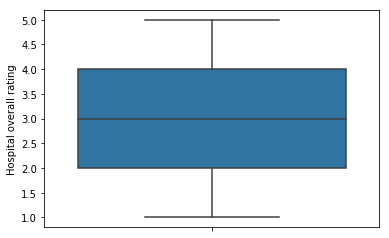

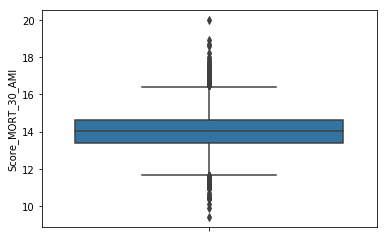

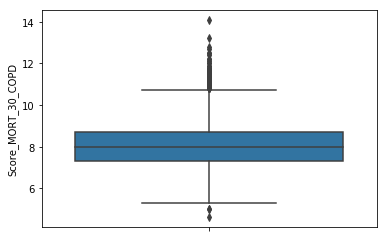

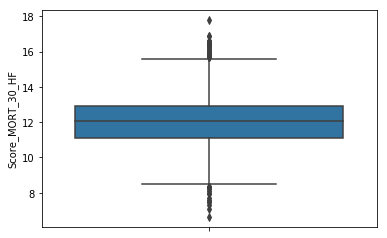

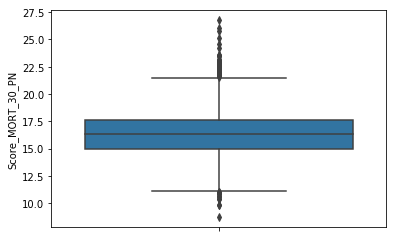

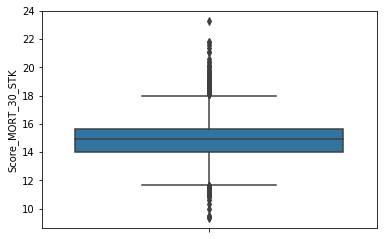

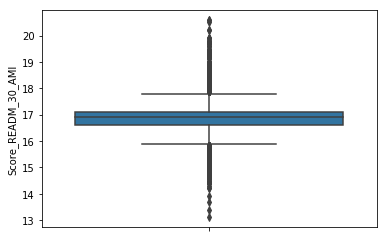

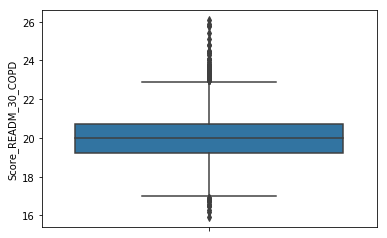

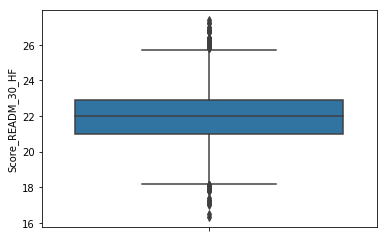

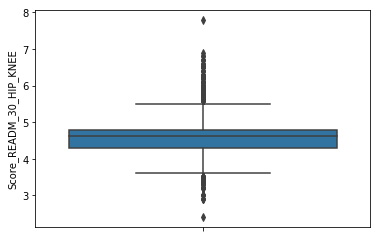

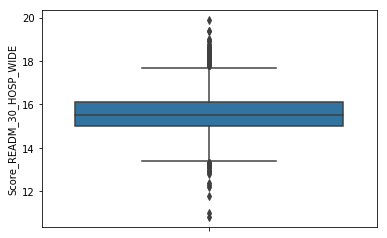

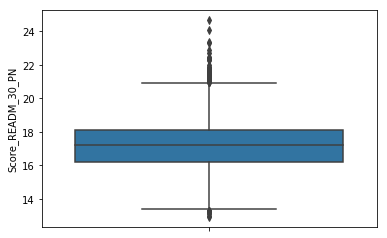

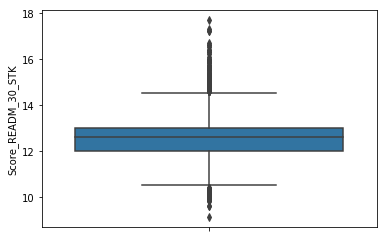

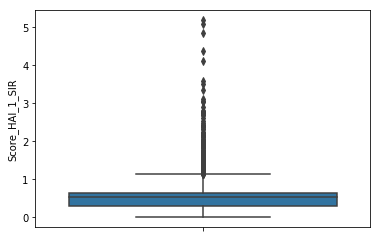

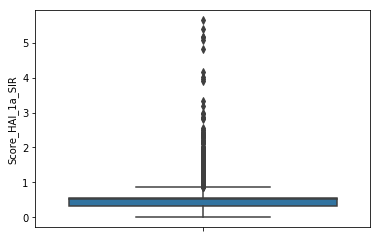

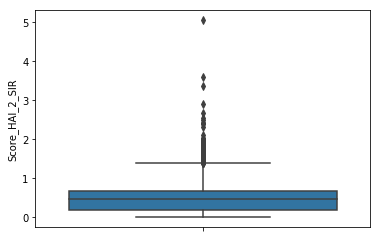

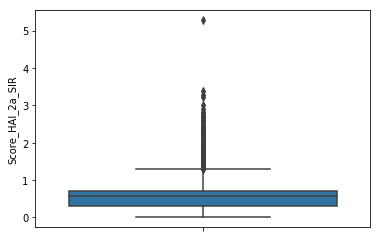

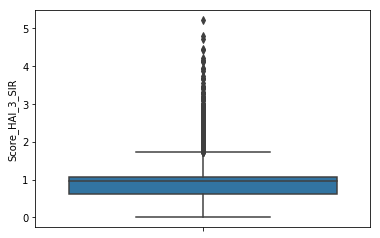

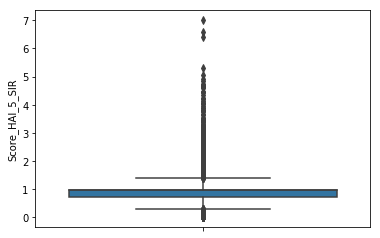

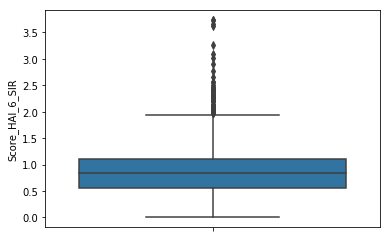

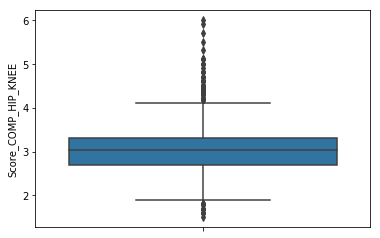

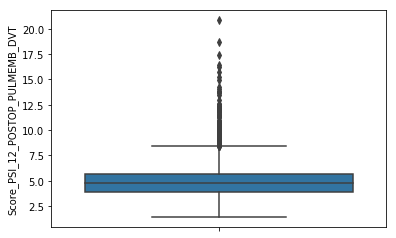

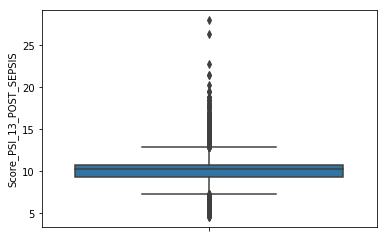

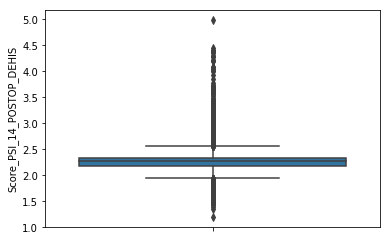

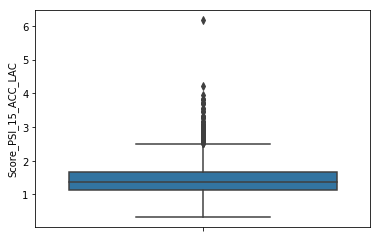

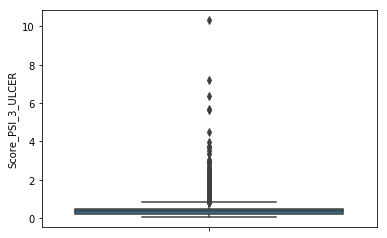

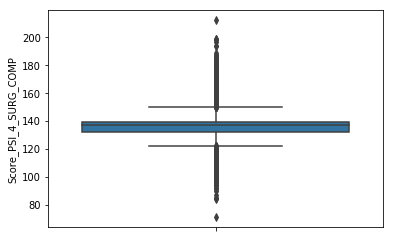

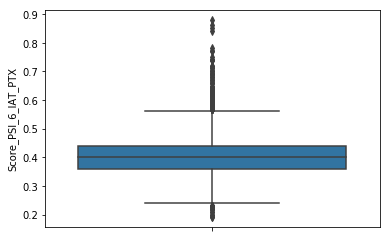

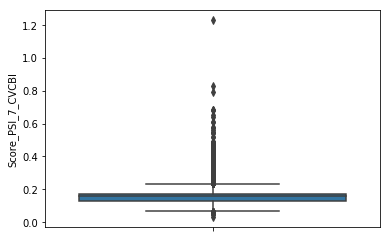

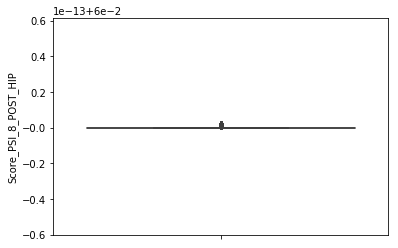

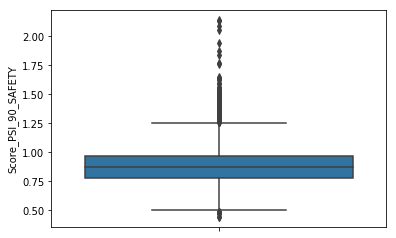

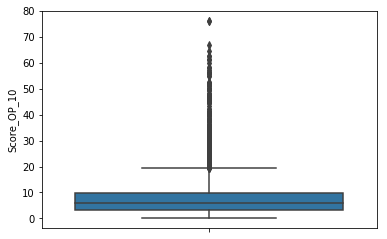

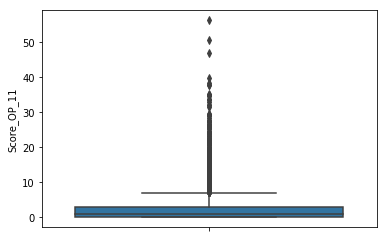

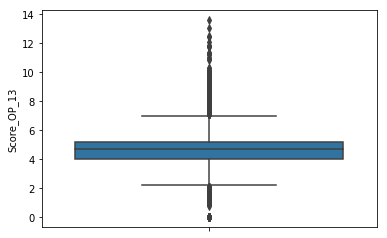

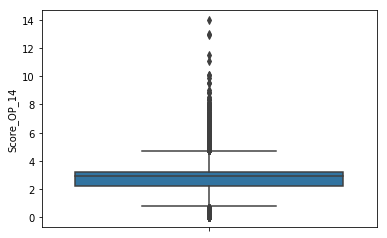

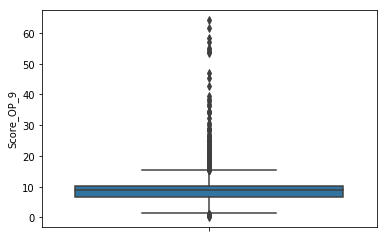

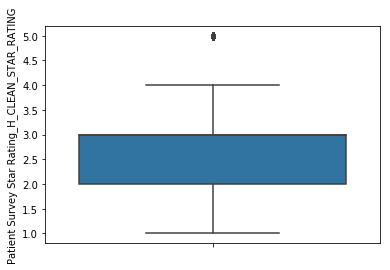

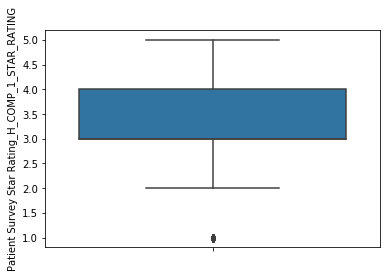

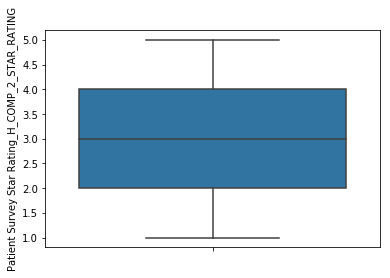

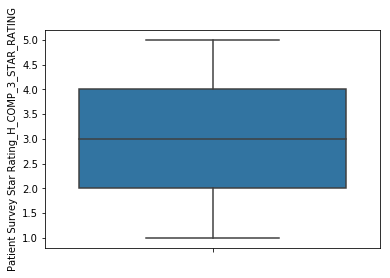

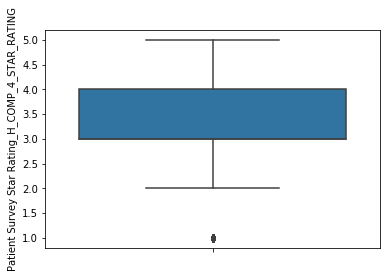

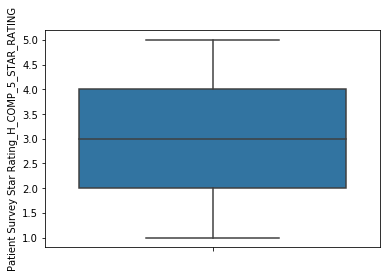

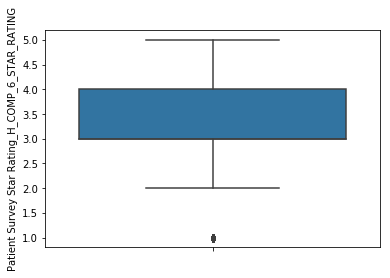

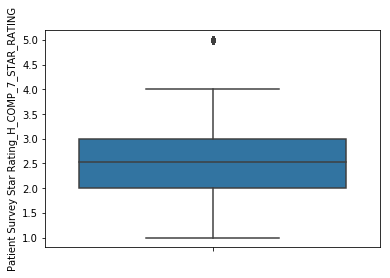

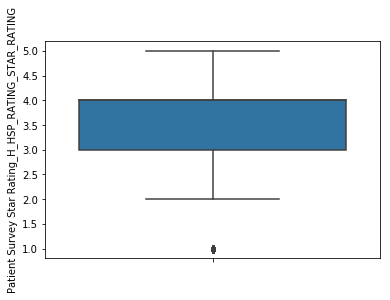

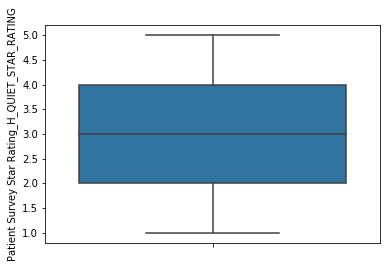

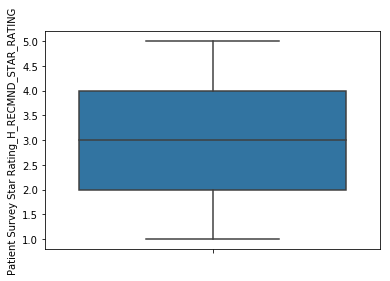

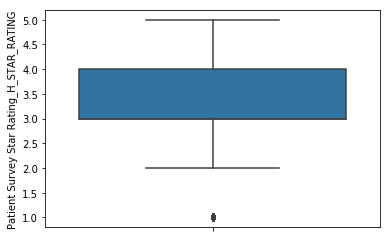

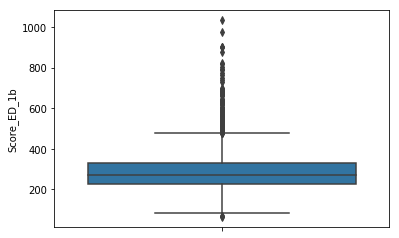

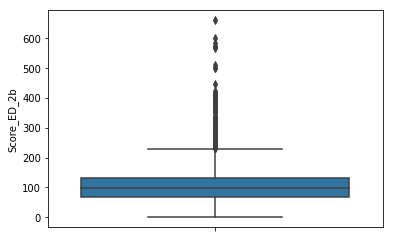

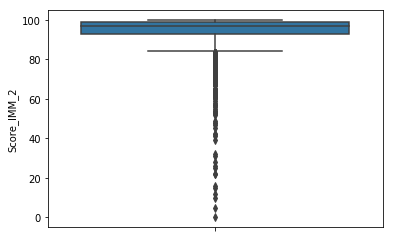

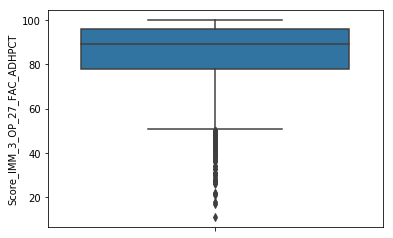

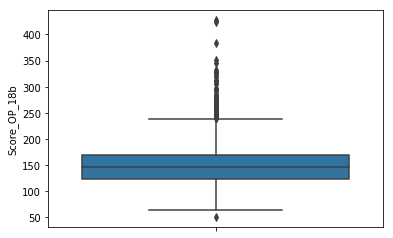

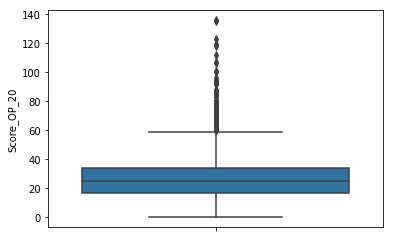

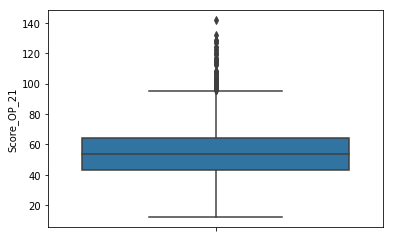

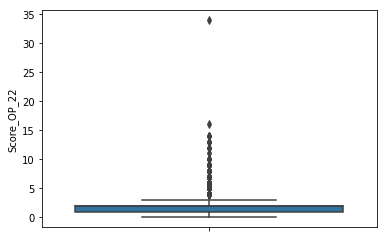

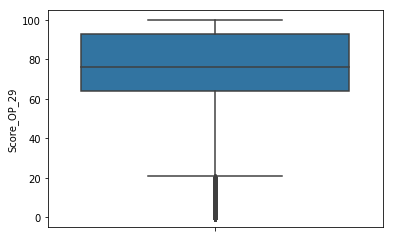

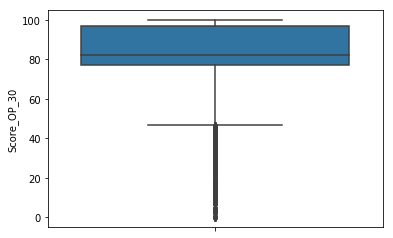

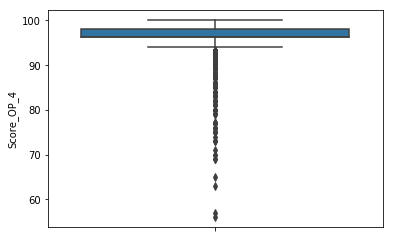

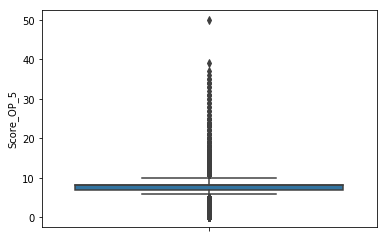

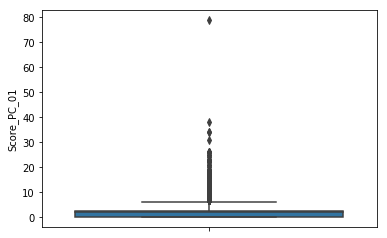

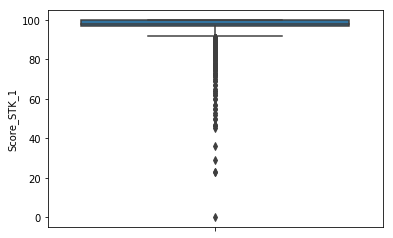

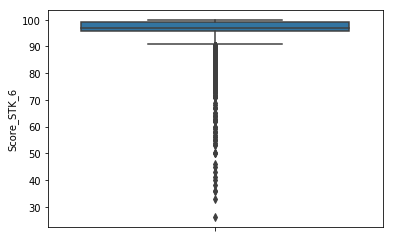

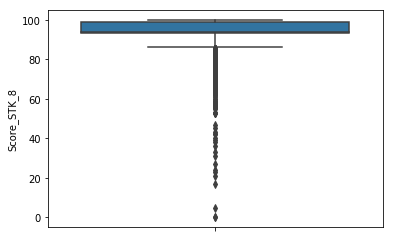

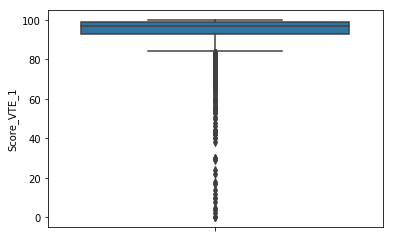

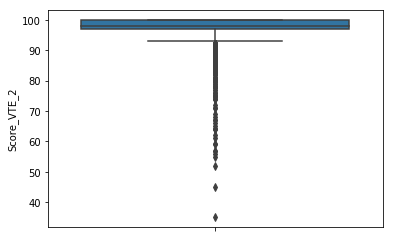

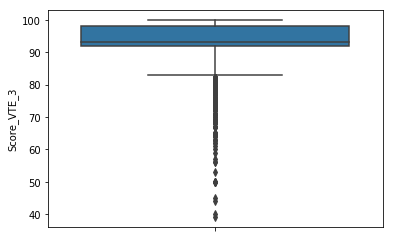

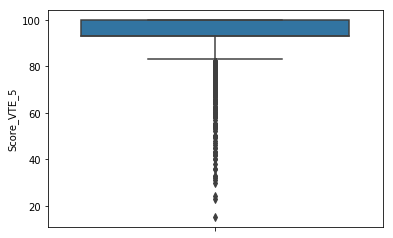

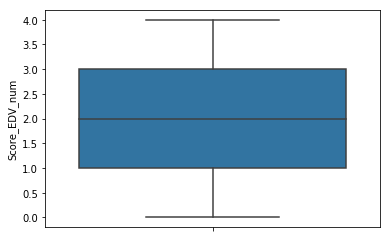

In [256]:
## Lets check box plot for all the column
for col in Combine_df2.columns:
   
    sns.boxplot(y=Combine_df2[col])
    plt.show()

 - Observations
- Hospital overall rating :-There is no outlier in this column.
- Score_MORT_30_AMI - There is not much outlier in this column as well. Score 20 can be considered as Outlier and can be removed.
- Score_MORT_30_COPD -Value more than 14 can be considered as outlier.
- Score_MORT_30_HF- There is no much outlier in this column , Only value 18 can be considered as Outlier.
- Score_MORT_30_PN - Value below 10 can be considered as Outlier.
- Score_MORT_30_STK - There is no much Outlier in this Column, Only 24 can be considered as Outlier.
- Score_READM_30_AMI - Data is continuously incresing in this column , There is no much outlier in this column.
- Score_READM_30_COPD - Data is continuously incresing in this column , There is no much outlier in this column.
- Score_READM_30_HF -No Outlier
- Score_READM_30_HIP_KNEE -Score Value above 7.5 and lower than 2.5 can be considered as Outlier .
- Score_READM_30_HOSP_WIDE-Values below 11.5 are Outliers
- Score_READM_30_PN-There is no outlier in this column.
- Score_READM_30_STK- Values below 10.5 can be considered as outlier
- Score_HAI_1_SIR-Data is continuously incresing in this column , There is no much outlier in this column
- Score_HAI_1a_SIR -Data is continuously incresing in this column , There is no much outlier in this column
- Score_HAI_2_SIR-Value above 4 are Outliers
- Score_HAI_2a_SIR-Value above 4 are Outliers
- Score_HAI_3_SIR-Value above 4 are Outliers
- Score_HAI_5_SIR-Data is continuously incresing in this column , There is no much outlier in this column
- Score_HAI_6_SIR-Value above 3.5 are Outliers
- Score_COMP_HIP_KNEE  No Outliers
- Score_PSI_12_POSTOP_PULMEMB_DVT-Value more than 17.5 can be considered as Outlier
- Score_PSI_13_POST_SEPSIS:-value more than 25 can be considered as Outlier.
- Score_PSI_14_POSTOP_DEHIS :-Value more than 4.5 can be considered as Outlier.
- Score_PSI_15_ACC_LAC-Value more than 5 can be considered as Outlier.
- Score_PSI_3_ULCER:-Value more than 8 can be considered as Outlier.
- Score_PSI_4_SURG_COMP:-Value less than 80 can be considered as Outlier.
- Score_PSI_6_IAT_PTX   : Values above 0.8 can be outliers
- Score_PSI_7_CVCBI :-Value more than 1 can be considered as Outlier
- Score_PSI_8_POST_HIP   No Outlier
- Score_PSI_90_SAFETY    No Outlier
- Score_OP_10  -Value more thna 70 can be considered as Outlier.
- Score_OP_11 :-Values more thna 40 can be considered as Outlier.
- Score_OP_13   No Outlier
- Score_OP_14 :-Value more thean 12 can be considered as Outlier.
- Score_OP_8 : Value Less than 19 can be outlier
- Score_OP_9 : No Outlier
- Patient Survey Star Rating_H_CLEAN_STAR_RATING : Value above 4.5 are outliers
- Patient Survey Star Rating_H_COMP_1_STAR_RATING - No Outlier
- Patient Survey Star Rating_H_COMP_2_STAR_RATING - No Outlier
- Patient Survey Star Rating_H_COMP_3_STAR_RATING - No Outlier
- Patient Survey Star Rating_H_COMP_4_STAR_RATING - No Outlier
- Patient Survey Star Rating_H_COMP_5_STAR_RATING - No Outlier
- Patient Survey Star Rating_H_COMP_6_STAR_RATING - No Outlier
- Patient Survey Star Rating_H_COMP_7_STAR_RATING - Value above 4.5 are outliers
- Patient Survey Star Rating_H_HSP_RATING_STAR_RATING - No Outlier
- Patient Survey Star Rating_H_QUIET_STAR_RATING - No Outlier
- Patient Survey Star Rating_H_RECMND_STAR_RATING - No Outlier
- Patient Survey Star Rating_H_STAR_RATING  -  No Outlier

-  Score_EDV : No Outlier
 - Score_ED_1b -Value more thanless than 0.1 can be considered as Outlier.
 - Score_ED_2b - Value more than 0.9 can be considered as oulier
 - Score_IMM_2 - No Outlier
 - Score_IMM_3_OP_27_FAC_ADHPCT : value above 0.8 are Outlier
 - Score_OP_18b - No Outlier.
 - Score_OP_20 - No Outlier
 - Score_OP_21 - No Outlier
 - Score_OP_22':-Value above 0.1 are outlier.
 - Score_OP_29 : No Outlier
 - Score_OP_5 :-Value more than 0.95 can be considered as Outlier.
 - Score_PC_01 : Value abobe 0.8 can be consider as outlier
  - Score_STK_1 :-Value Equals 0 can be considered as Outlier.
 - Score_STK_6 :-No Outlier
 - Score_VTE_1 : No Outlier
 - Score_VTE_2 : No Outlier
 - Score_VTE_6 :  AVobe 0.9 are outliers


In [257]:
# For loop for outlier treatment considering 0.1 % for low values and 99.9% for high values data and replacing the removed 
# data with high value(99%) for exterme value and low value (1%) for low value  
for col in Combine_df2.columns:
    Q1 = Combine_df2[col].quantile(0.001)
    Q3 = Combine_df2[col].quantile(0.999)
    IQR = Q3 - Q1
    #print(IQR)
    df_Outlier = Combine_df2[((Combine_df2[col] < (Q1)) |(Combine_df2[col] > (Q3)))]
    print("Outlier data Set for ", col)
    print(df_Outlier[col])
    #print(Combine_df2[col].mean)
    #Combine_df2[col][((Combine_df2[col] < (Q1)) |(Combine_df2[col] > (Q3)))] = Combine_df2[col].mean()
    Combine_df2[col][((Combine_df2[col] < (Q1)))] = Q1
    Combine_df2[col][((Combine_df2[col] > (Q3)))] = Q3
    
    

Outlier data Set for  Hospital overall rating
Series([], Name: Hospital overall rating, dtype: int64)
Outlier data Set for  Score_MORT_30_AMI
446      9.4
515     10.1
950      9.9
1637    18.9
2707    20.0
2919    18.7
3059    18.6
Name: Score_MORT_30_AMI, dtype: float64
Outlier data Set for  Score_MORT_30_COPD
252      4.6
833     12.7
850      5.0
1061    14.1
1234     5.0
1337     5.3
1381    13.2
2114    12.8
Name: Score_MORT_30_COPD, dtype: float64
Outlier data Set for  Score_MORT_30_HF
172     16.9
409      7.3
438      7.1
726     16.9
950      6.6
1551    17.8
Name: Score_MORT_30_HF, dtype: float64
Outlier data Set for  Score_MORT_30_PN
6       26.8
252      8.7
299     26.0
413      9.8
568      9.8
798     25.1
1963    25.8
Name: Score_MORT_30_PN, dtype: float64
Outlier data Set for  Score_MORT_30_STK
438      9.3
697     23.3
760     21.8
950      9.4
964     21.6
1641    21.8
1830     9.5
1843     9.5
Name: Score_MORT_30_STK, dtype: float64
Outlier data Set for  Score_READ

Outlier data Set for  Score_OP_20
345    119.0
543    123.0
793    136.0
799    135.0
Name: Score_OP_20, dtype: float64
Outlier data Set for  Score_OP_21
431     142.0
723      12.0
724      15.0
866     129.0
928      16.0
1205     15.0
2732    132.0
Name: Score_OP_21, dtype: float64
Outlier data Set for  Score_OP_22
755     34.0
2546    16.0
Name: Score_OP_22, dtype: float64
Outlier data Set for  Score_OP_29
Series([], Name: Score_OP_29, dtype: float64)
Outlier data Set for  Score_OP_30
Series([], Name: Score_OP_30, dtype: float64)
Outlier data Set for  Score_OP_4
431     65.0
1214    56.0
2154    57.0
2650    63.0
Name: Score_OP_4, dtype: float64
Outlier data Set for  Score_OP_5
546     39.0
801     37.0
958     50.0
1913    36.0
Name: Score_OP_5, dtype: float64
Outlier data Set for  Score_PC_01
182     34.0
2621    79.0
2936    34.0
2946    38.0
Name: Score_PC_01, dtype: float64
Outlier data Set for  Score_STK_1
143     23.0
1170    23.0
1484     0.0
1548    29.0
Name: Score_STK_1,

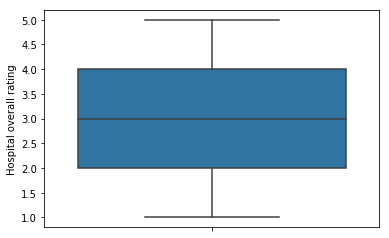

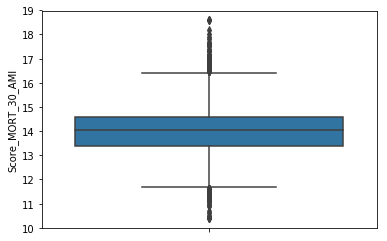

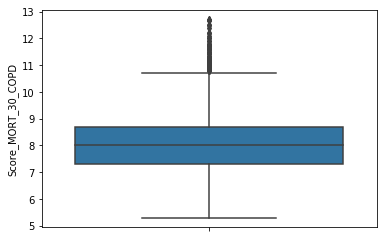

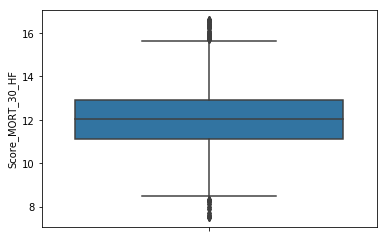

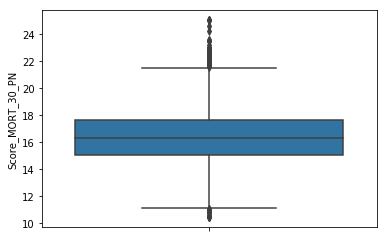

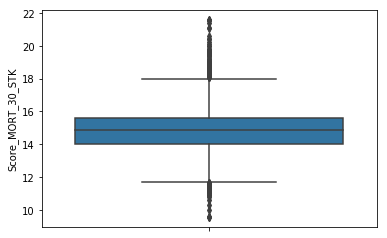

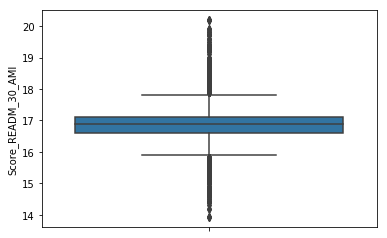

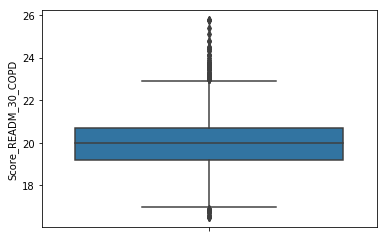

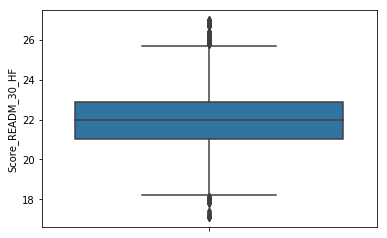

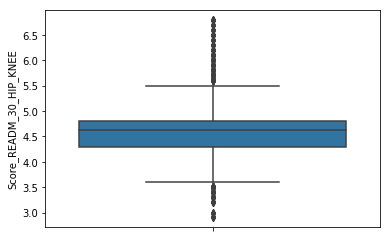

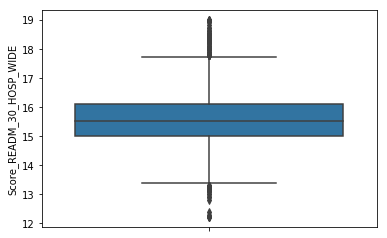

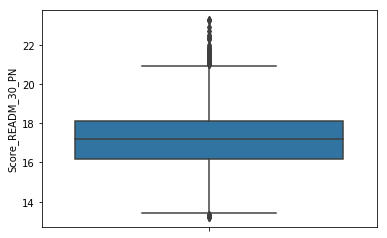

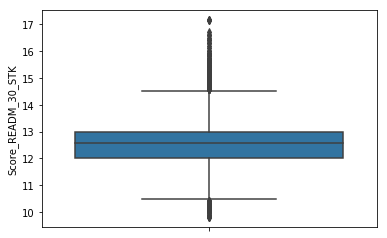

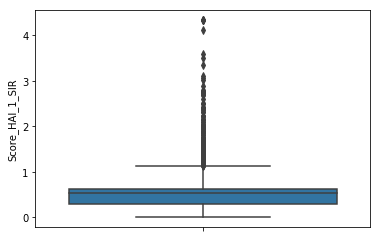

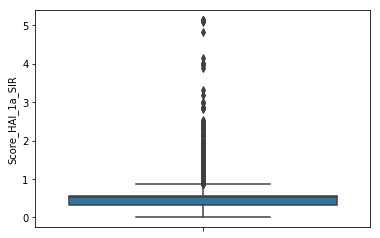

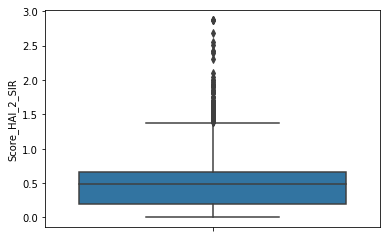

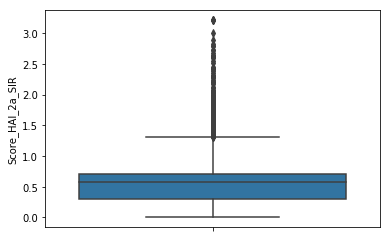

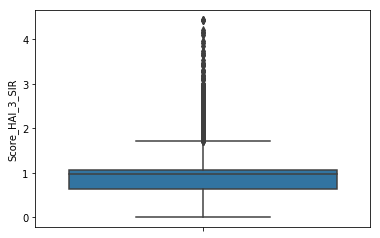

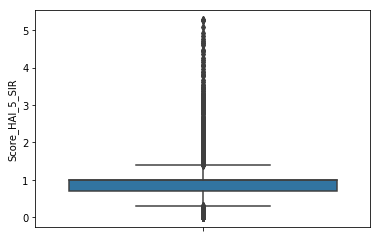

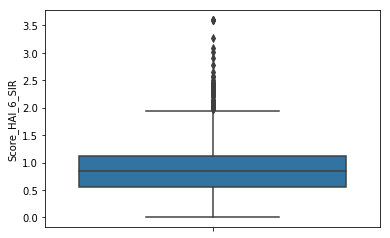

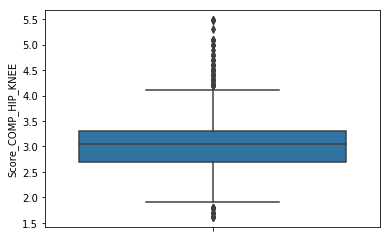

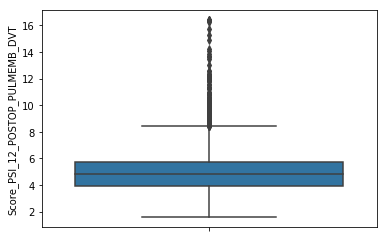

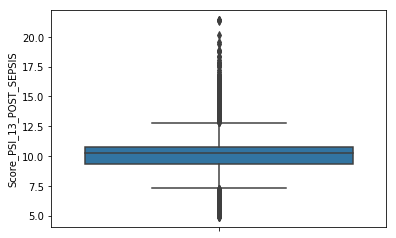

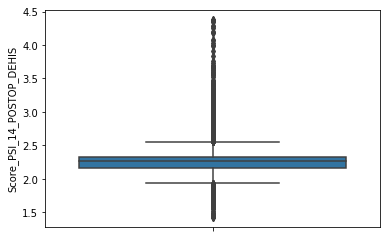

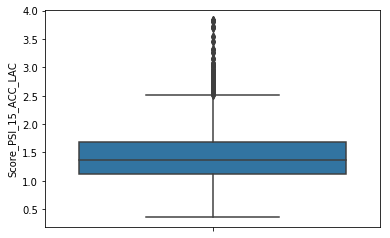

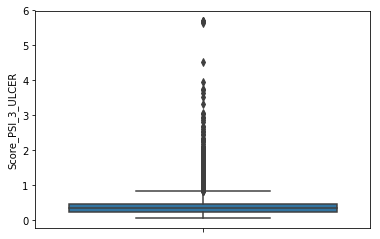

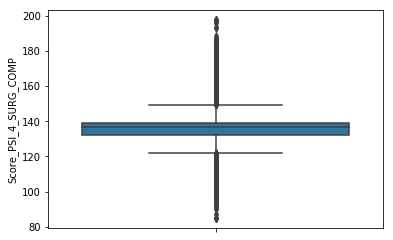

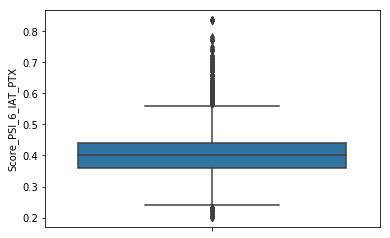

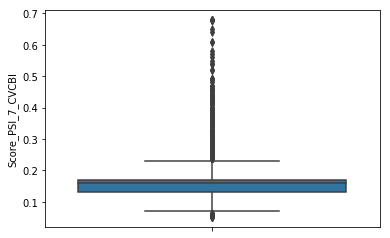

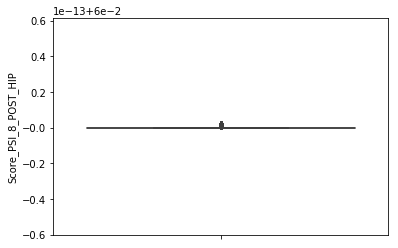

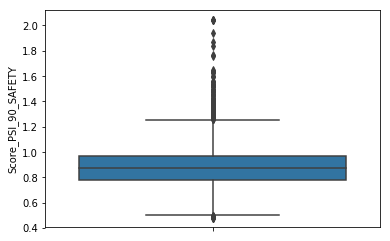

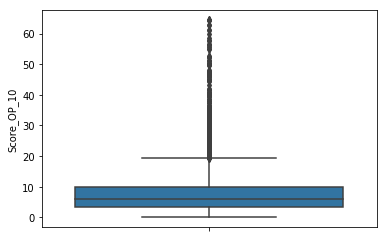

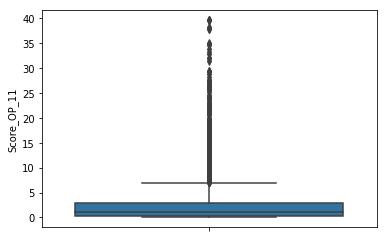

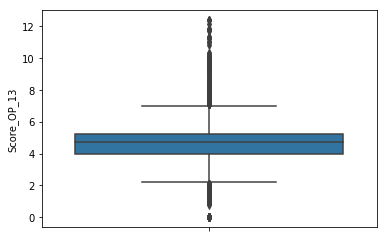

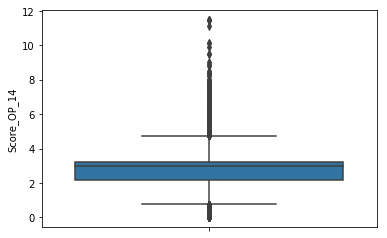

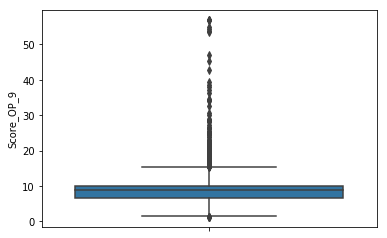

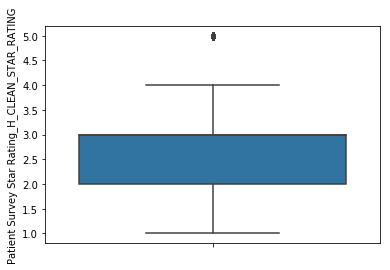

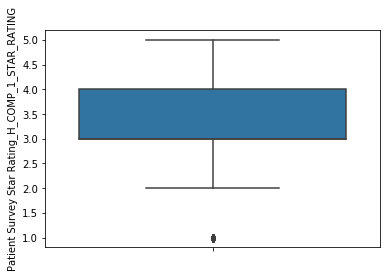

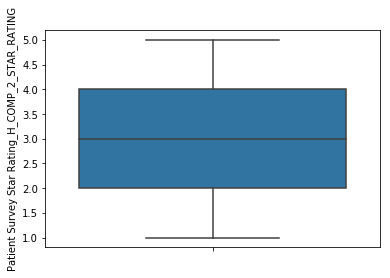

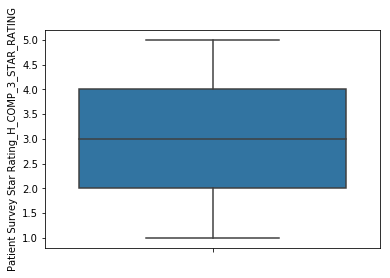

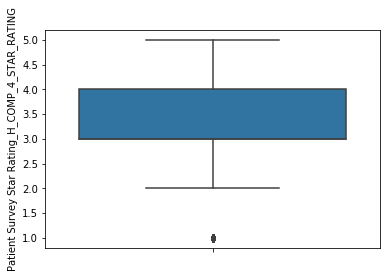

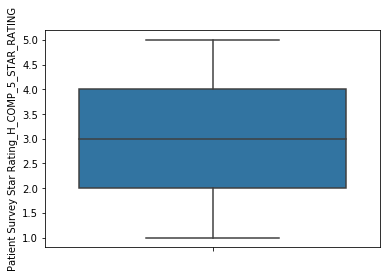

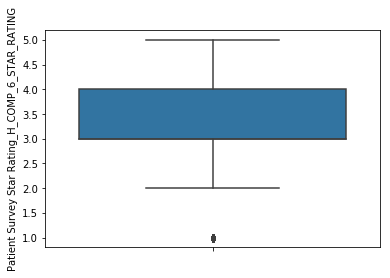

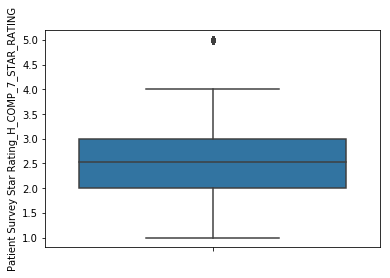

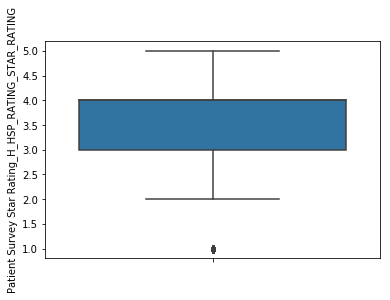

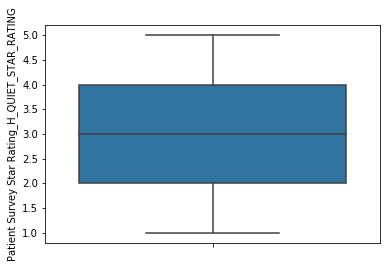

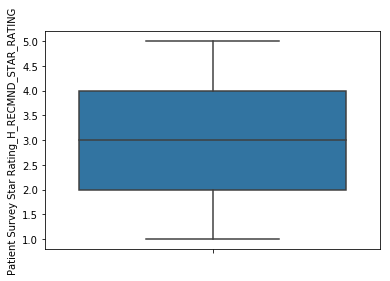

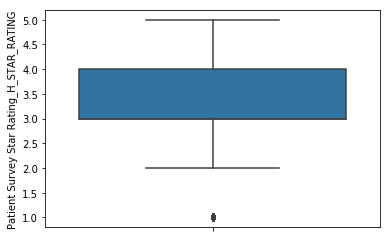

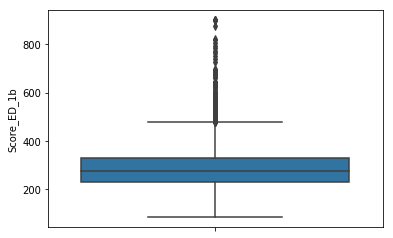

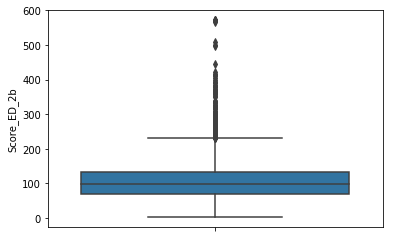

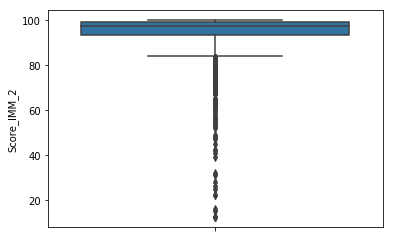

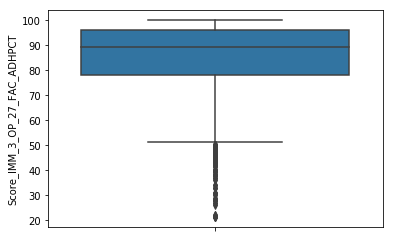

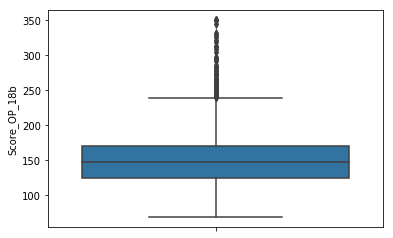

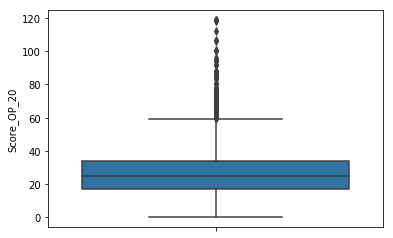

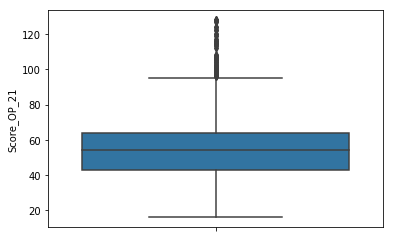

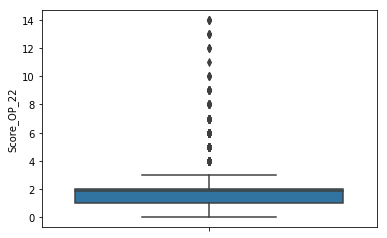

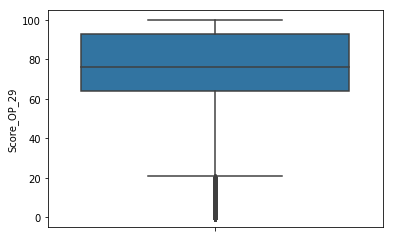

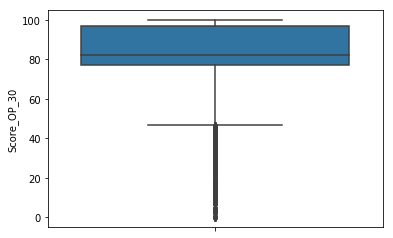

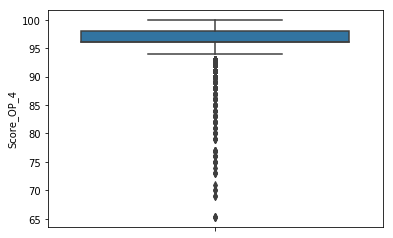

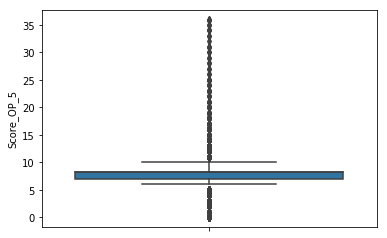

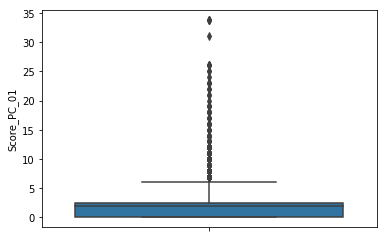

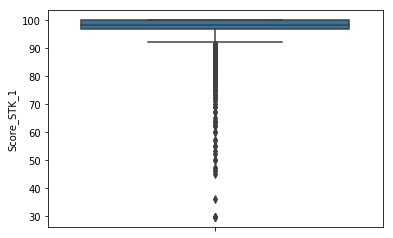

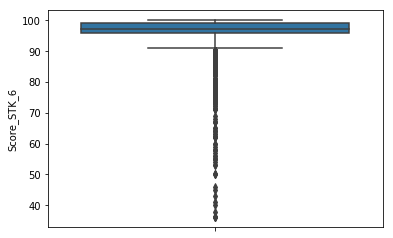

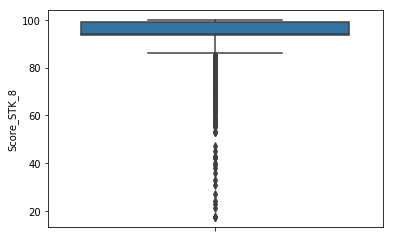

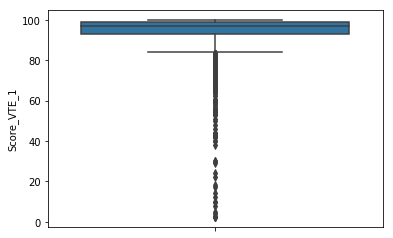

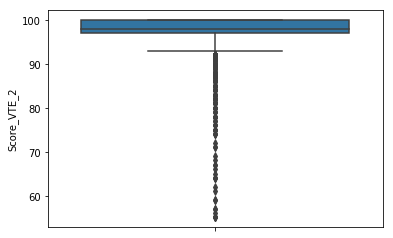

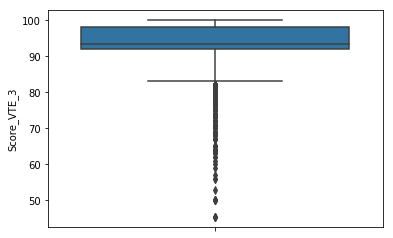

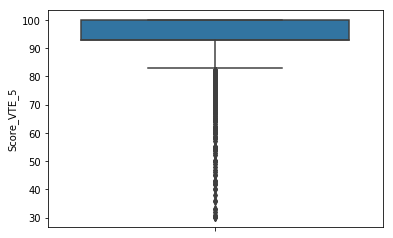

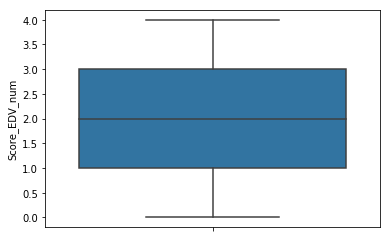

In [258]:
## Box plot after removing outlier 
for col in Combine_df2.columns:
    #boxplot = Combine_df2.boxplot(column=col2)
    sns.boxplot(y=Combine_df2[col])
    plt.show()

In [259]:

#Check the shpae of final data frame 
Combine_df2.shape

(3061, 69)

####  Measure Id for Modeling

In [260]:
Combine_df2.columns

Index(['Hospital overall rating', 'Score_MORT_30_AMI', 'Score_MORT_30_COPD',
       'Score_MORT_30_HF', 'Score_MORT_30_PN', 'Score_MORT_30_STK',
       'Score_READM_30_AMI', 'Score_READM_30_COPD', 'Score_READM_30_HF',
       'Score_READM_30_HIP_KNEE', 'Score_READM_30_HOSP_WIDE',
       'Score_READM_30_PN', 'Score_READM_30_STK', 'Score_HAI_1_SIR',
       'Score_HAI_1a_SIR', 'Score_HAI_2_SIR', 'Score_HAI_2a_SIR',
       'Score_HAI_3_SIR', 'Score_HAI_5_SIR', 'Score_HAI_6_SIR',
       'Score_COMP_HIP_KNEE', 'Score_PSI_12_POSTOP_PULMEMB_DVT',
       'Score_PSI_13_POST_SEPSIS', 'Score_PSI_14_POSTOP_DEHIS',
       'Score_PSI_15_ACC_LAC', 'Score_PSI_3_ULCER', 'Score_PSI_4_SURG_COMP',
       'Score_PSI_6_IAT_PTX', 'Score_PSI_7_CVCBI', 'Score_PSI_8_POST_HIP',
       'Score_PSI_90_SAFETY', 'Score_OP_10', 'Score_OP_11', 'Score_OP_13',
       'Score_OP_14', 'Score_OP_9',
       'Patient Survey Star Rating_H_CLEAN_STAR_RATING',
       'Patient Survey Star Rating_H_COMP_1_STAR_RATING',
       'Patien

### Exploratory data Analysis (EDA)

#### DataFrames available after Data Cleaning and EDA
- Hospital_Info_DF_ORG - Hospital General Information.csv   file read- 4818 Rows and 28 Columns
- Hospital_Info_DF_ORG1 - Hospital General Information - With Rank values for Seven Variables after removing Not available from Hospital Overall Rating but No filteration for Acute Care - 3648 Rows and 27 Columns
- Hospital_Info_DF   - Hospital_Info_DF_ORG after removing Not Available for Hospital Overall Rating and Rank for 7 National Comparision and Data Fitered for Acute Care only - 3061 Rows and 20 Columns
- Hospital_Info_DF2  - Only Rank and Hospital overall rating cleaned - 3061 Rows and 8 Columns


#### EDA for Hospital count

In [261]:
#Hospital_Info_DF is filtered for Acute Care Hospitals. 

Total_state = pd.value_counts(Hospital_Info_DF['State'])
Total_state = pd.DataFrame(Total_state)
Total_state = Total_state.reset_index()

Total_state.columns = ['State', 'Number of Hospitals']

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Number of Hospitals per State')

Text(293.0, 0.040000000000000036, '283.00')

Text(273.0, 1.04, '263.00')

Text(174.0, 2.04, '164.00')

Text(157.0, 3.04, '147.00')

Text(152.0, 4.04, '142.00')

Text(134.0, 5.04, '124.00')

Text(129.0, 6.04, '119.00')

Text(108.0, 7.04, '98.00')

Text(98.0, 8.04, '88.00')

Text(97.0, 9.04, '87.00')

Text(91.0, 10.04, '81.00')

Text(90.0, 11.04, '80.00')

Text(88.0, 12.04, '78.00')

Text(88.0, 13.04, '78.00')

Text(87.0, 14.04, '77.00')

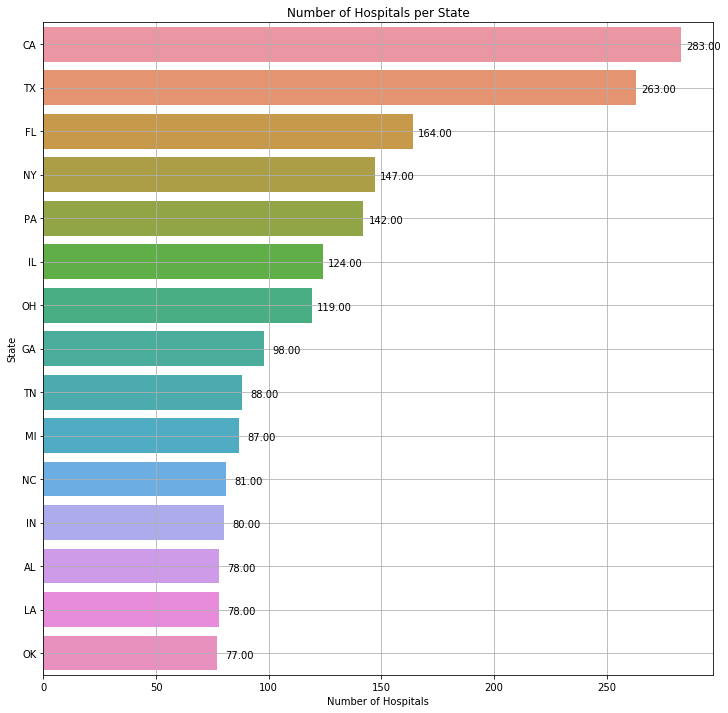

In [262]:
# Number of Hospitals per State
Temp = Total_state.sort_values('Number of Hospitals',ascending=False)
ab = Temp.head(15)
plt.figure(figsize=(12,12))
ax = sns.barplot(y='State', x='Number of Hospitals', data=ab )
ax.set_title('Number of Hospitals per State')
ax.grid(True)
for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

This is a bar plot between Number of Hospitals of Acute Care Type and State. It shows that California has maximum number of Acute care Hospitals followed by Texas. While Okhlohoma has the lowest count.

#### EDA for Hospital Type

In [263]:
# Hospital_Info_DF_ORG to show all data for Hospital Type
Hospital_Type_df = pd.value_counts(Hospital_Info_DF_ORG['Hospital Type'])
Hospital_Type_df = pd.DataFrame(Hospital_Type_df)
Hospital_Type_df = Hospital_Type_df.reset_index()
Hospital_Type_df.columns = ['Hospital Type', 'Number of Hospitals']

<Figure size 576x360 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Number of Hospitals'), Text(0.5, 0, 'Type of Hospital')]

Text(0, 10, '3382.0')

Text(0, 10, '1337.0')

Text(0, 10, '99.0')

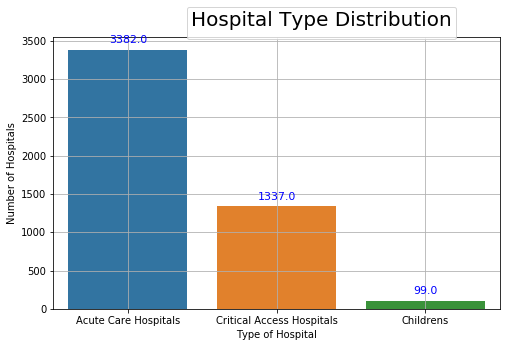

In [264]:
# Hospital Type Distribution - Annotation with number
ab = Hospital_Type_df
plt.figure(figsize=(8,5))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                title=r'Hospital Type Distribution')                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Hospital Type', y='Number of Hospitals', data=ab )
ax.set(xlabel = 'Type of Hospital', ylabel = 'Number of Hospitals')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points')  

<Figure size 576x360 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Number of Hospitals'), Text(0.5, 0, 'Type of Hospital')]

Text(0, 10, '70.20%')

Text(0, 10, '27.75%')

Text(0, 10, '2.05%')

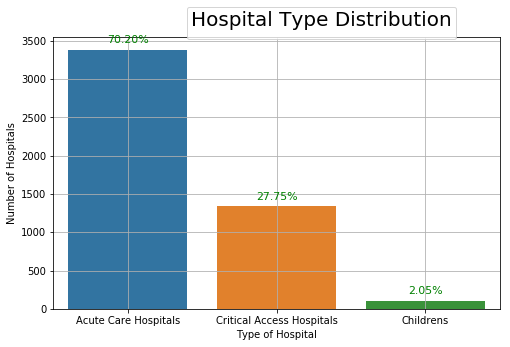

In [265]:
# Hospital Type Distribution - Annotation with Percenatage
ab = Hospital_Type_df
plt.figure(figsize=(8,5))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                title=r'Hospital Type Distribution')                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Hospital Type', y='Number of Hospitals', data=ab )
ax.set(xlabel = 'Type of Hospital', ylabel = 'Number of Hospitals')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / ab['Number of Hospitals'].sum():.2f}%", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='green', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

Before any type of filteration on Hospital Information We have
Acute Care Hospitals - Total 3382 counts  - 70.02%
Critical Access Hospitals - Total 1337 counts - 27.75%
Childrens Care Hospitals - Total 99 counts - 2.05%

In [266]:
#After removing Not Avilable from Hospital Overall Rating - Hospital_Info_DF_ORG1
Hospital_Type_df = pd.value_counts(Hospital_Info_DF_ORG1['Hospital Type'])
Hospital_Type_df = pd.DataFrame(Hospital_Type_df)
Hospital_Type_df = Hospital_Type_df.reset_index()
Hospital_Type_df.columns = ['Hospital Type', 'Number of Hospitals']

<Figure size 576x360 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Number of Hospitals'), Text(0.5, 0, 'Type of Hospital')]

Text(0, 10, '3061.0')

Text(0, 10, '587.0')

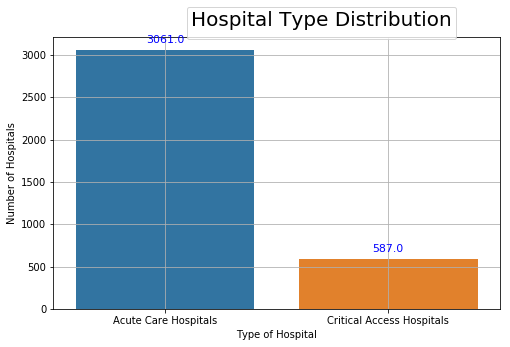

In [267]:
# Hospital Type Distribution - Annotation with number
ab = Hospital_Type_df
plt.figure(figsize=(8,5))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                title=r'Hospital Type Distribution')                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Hospital Type', y='Number of Hospitals', data=ab )
ax.set(xlabel = 'Type of Hospital', ylabel = 'Number of Hospitals')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points')  

<Figure size 576x360 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Number of Hospitals'), Text(0.5, 0, 'Type of Hospital')]

Text(0, 10, '83.91%')

Text(0, 10, '16.09%')

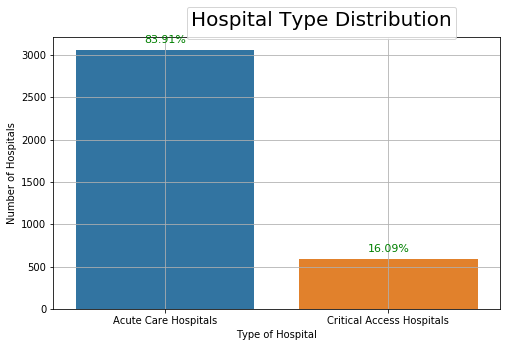

In [268]:
# Hospital Type Distribution - Annotation with Percenatage
ab = Hospital_Type_df
plt.figure(figsize=(8,5))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                title=r'Hospital Type Distribution')                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Hospital Type', y='Number of Hospitals', data=ab )
ax.set(xlabel = 'Type of Hospital', ylabel = 'Number of Hospitals')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / ab['Number of Hospitals'].sum():.2f}%", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='green', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

We are left with 3061 Acute Care Hospitals that is 83.91% and 587 Crtical Access Hospitals which is 16.09% after removing Not Available from Hospital Overall Rating column as they are not useful for our analysis.

#### EDA on Hospital Ownership

In [269]:
Hospital_owner = pd.value_counts(Hospital_Info_DF_ORG['Hospital Ownership'])
Hospital_owner = pd.DataFrame(Hospital_owner)
Hospital_owner = Hospital_owner.reset_index()
Hospital_owner.columns = ['Hospital Ownership', 'Number of Hospitals']

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Count of the different Types of Hospital Ownership')

Text(2047.0, 0.040000000000000036, '2027.00')

Text(819.0, 1.04, '799.00')

Text(587.0, 2.04, '567.00')

Text(497.0, 3.04, '477.00')

Text(432.0, 4.04, '412.00')

Text(369.0, 5.04, '349.00')

Text(87.0, 6.04, '67.00')

Text(86.0, 7.04, '66.00')

Text(66.0, 8.04, '46.00')

Text(28.0, 9.04, '8.00')

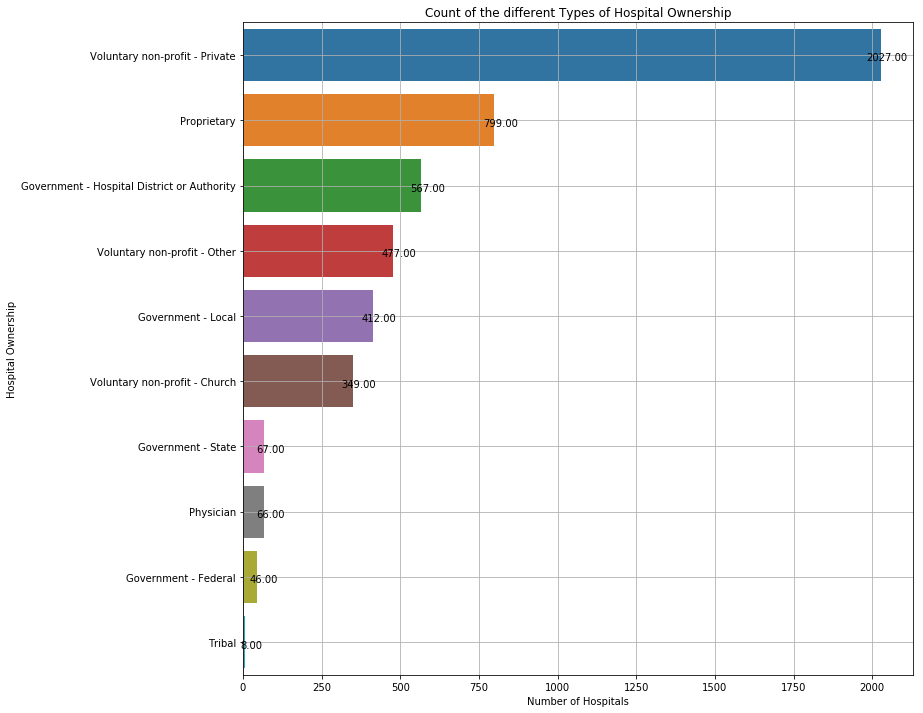

In [270]:
# Number of Hospitals per State
Temp = Hospital_owner.sort_values('Number of Hospitals',ascending=False)
ab = Temp.head(15)
plt.figure(figsize=(12,12))
ax = sns.barplot(y='Hospital Ownership', x='Number of Hospitals', data=ab )
ax.set_title('Count of the different Types of Hospital Ownership')
ax.grid(True)
for p in ax.patches:
    width = p.get_width()
    plt.text(20+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

In [271]:
Hospital_owner = pd.value_counts(Hospital_Info_DF_ORG1['Hospital Ownership'])
Hospital_owner = pd.DataFrame(Hospital_owner)
Hospital_owner = Hospital_owner.reset_index()
Hospital_owner.columns = ['Hospital Ownership', 'Number of Hospitals']

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Count of the different Types of Hospital Ownership')

Text(1611.0, 0.040000000000000036, '1591.00')

Text(679.0, 1.04, '659.00')

Text(417.0, 2.04, '397.00')

Text(365.0, 3.04, '345.00')

Text(336.0, 4.04, '316.00')

Text(264.0, 5.04, '244.00')

Text(66.0, 6.04, '46.00')

Text(51.0, 7.04, '31.00')

Text(37.0, 8.04, '17.00')

Text(22.0, 9.04, '2.00')

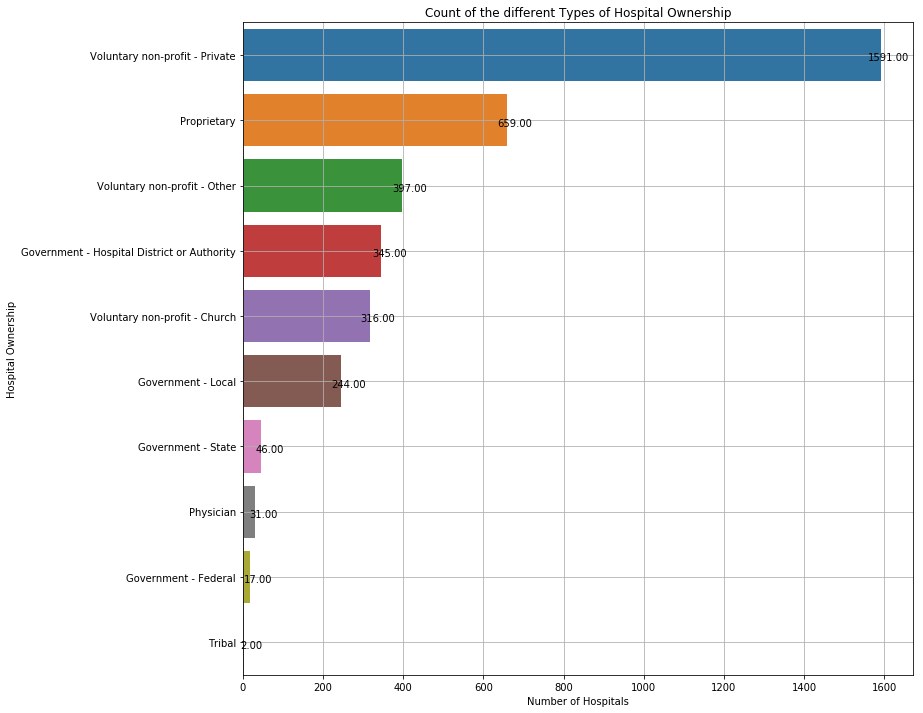

In [272]:
# Number of Hospitals per State
Temp = Hospital_owner.sort_values('Number of Hospitals',ascending=False)
ab = Temp.head(15)
plt.figure(figsize=(12,12))
ax = sns.barplot(y='Hospital Ownership', x='Number of Hospitals', data=ab )
ax.set_title('Count of the different Types of Hospital Ownership')
ax.grid(True)
for p in ax.patches:
    width = p.get_width()
    plt.text(20+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

For types of Hospital we see that Voluntary Non-Profit Private Hospitals are most in count while Tribal Hospitals are least in count.



#### EDA on Hospital Overall Rating

In [273]:
Hospital_rating = pd.value_counts(Hospital_Info_DF_ORG1['Hospital overall rating'])
Hospital_rating = pd.DataFrame(Hospital_rating)
Hospital_rating = Hospital_rating.reset_index()
Hospital_rating.columns = ['Hospital Rating', 'Number of Hospitals']

<Figure size 576x360 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Number of Hospitals'), Text(0.5, 0, 'Hospital Overall rating')]

Text(0, 10, '3.21%')

Text(0, 10, '18.75%')

Text(0, 10, '48.57%')

Text(0, 10, '26.43%')

Text(0, 10, '3.04%')

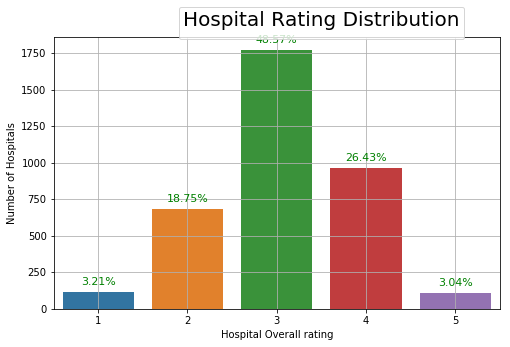

In [274]:
# Hospital Ratings - Annotation with Percenatage
ab = Hospital_rating
plt.figure(figsize=(8,5))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                title=r'Hospital Rating Distribution')                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Hospital Rating', y='Number of Hospitals', data=ab )
ax.set(xlabel = 'Hospital Overall rating', ylabel = 'Number of Hospitals')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / ab['Number of Hospitals'].sum():.2f}%", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='green', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

Most of the Hospitals - 48.57% are having a Hospital Overall Rating of 3. The Hospitals with Overall Hospital rating as 5 is lowest (3.04%) followed by Hospitals with Overall Rating as 1.

#### Hospital Rating Distribution Vs Hospital Ownership



In [275]:
Hospital_Info_DF['Hospital overall rating']=Hospital_Info_DF['Hospital overall rating'].apply(pd.to_numeric)

In [276]:
Hospital_rating = Hospital_Info_DF.groupby(['Hospital Ownership'])['Hospital overall rating'].mean()

Hospital_rating = pd.DataFrame(Hospital_rating)
Hospital_rating = Hospital_rating.reset_index()
Hospital_rating.columns = ['Hospital Ownership', 'Hospital overall rating']

<Figure size 1800x1800 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Hospital overall rating'), Text(0.5, 0, 'Hospital Ownership')]

Text(0, 10, '9.73%')

Text(0, 10, '9.82%')

Text(0, 10, '9.26%')

Text(0, 10, '8.74%')

Text(0, 10, '13.59%')

Text(0, 10, '9.64%')

Text(0, 10, '8.29%')

Text(0, 10, '10.43%')

Text(0, 10, '10.32%')

Text(0, 10, '10.17%')

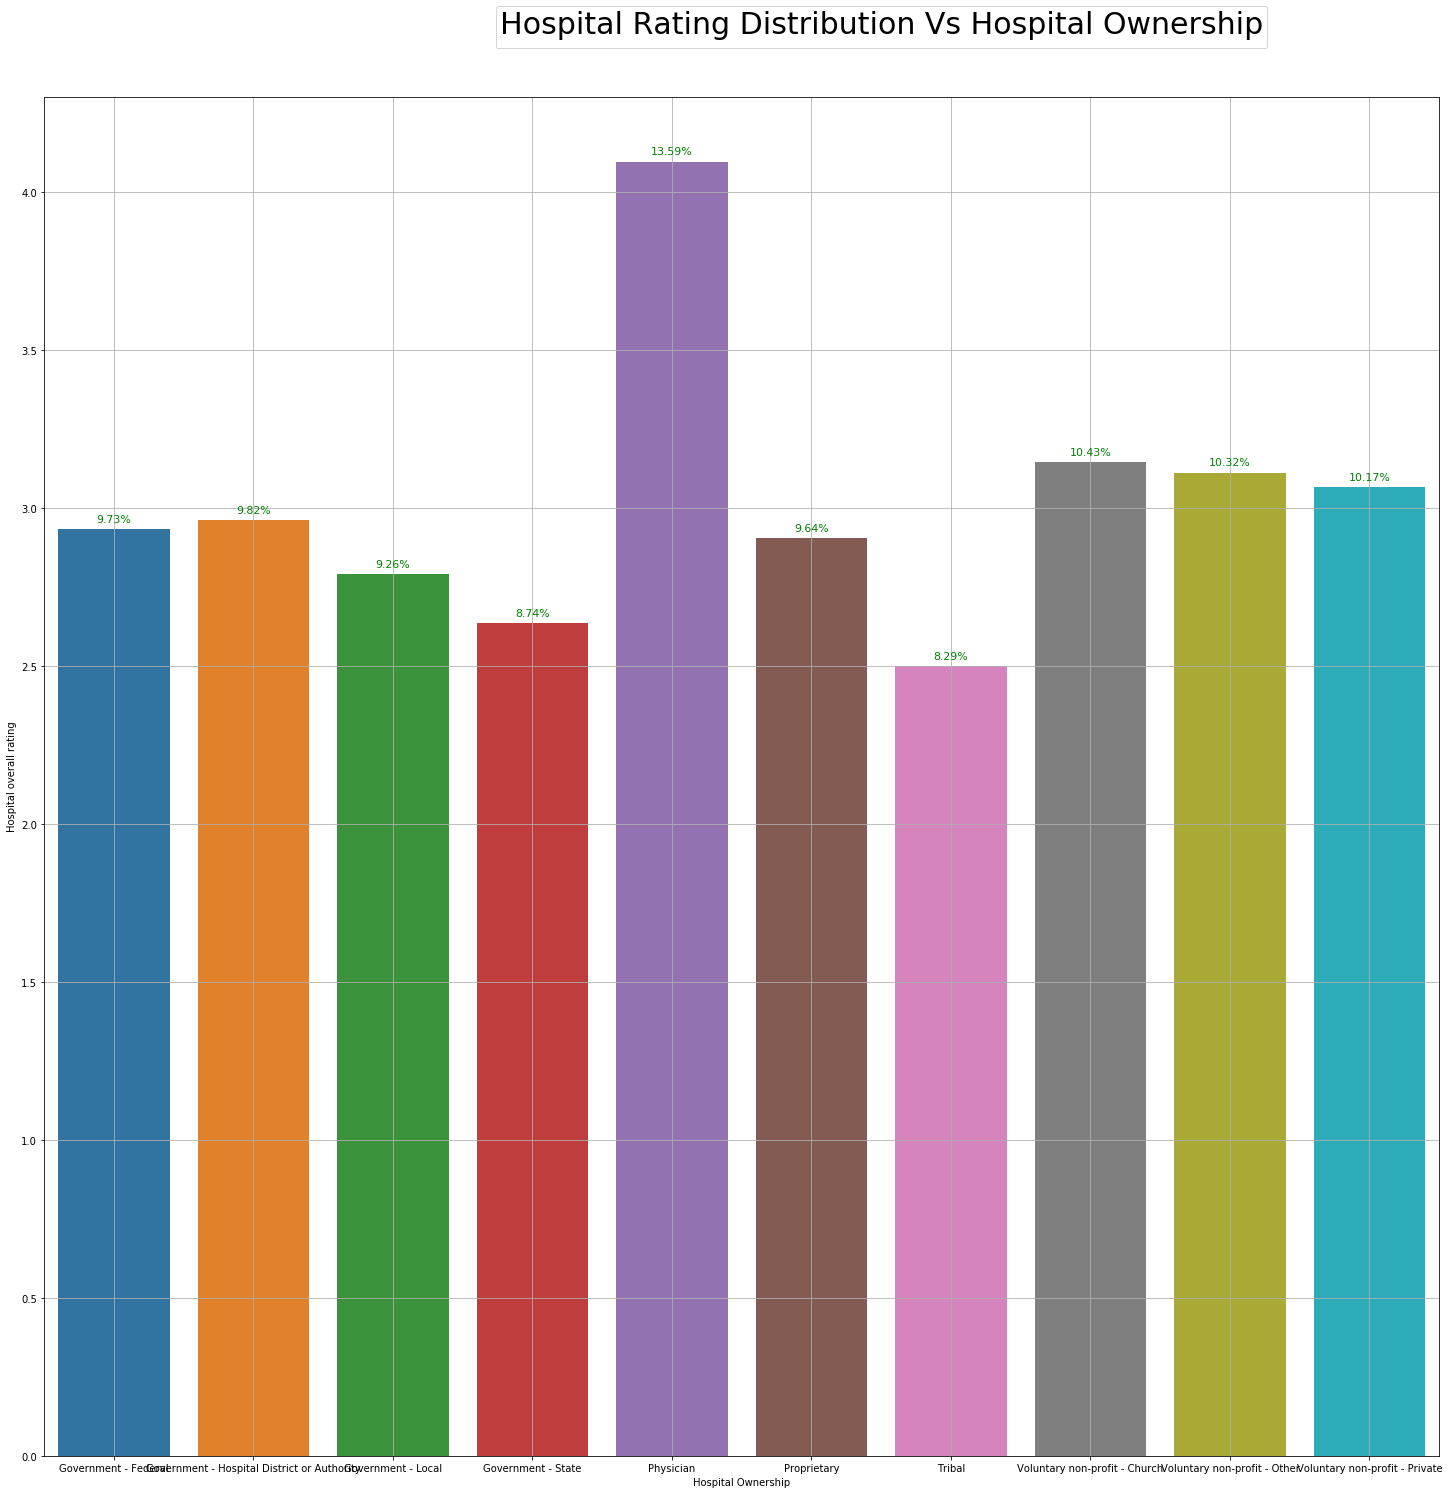

In [277]:
# Hospital Ratings - Annotation with Percenatage
ab = Hospital_rating
plt.figure(figsize=(25,25))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                title=r'Hospital Rating Distribution Vs Hospital Ownership')                 
ax.get_title().set_fontsize('30')
ax = sns.barplot(x='Hospital Ownership', y='Hospital overall rating', data=ab )
ax.set(xlabel = 'Hospital Ownership', ylabel = 'Hospital overall rating')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / ab['Hospital overall rating'].sum():.2f}%", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='green', rotation=0, xytext=(0, 10),
         textcoords='offset points')

In [278]:
#### Hospital Rating Distribution Vs Hospital State

In [279]:
Hospital_rating = Hospital_Info_DF.groupby(['State'])['Hospital overall rating'].mean()

Hospital_rating = pd.DataFrame(Hospital_rating)
Hospital_rating = Hospital_rating.reset_index()
Hospital_rating.columns = ['State', 'Hospital overall rating']

<Figure size 1800x1800 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Hospital overall rating'), Text(0.5, 0, 'Statep')]

Text(0, 10, '1.79%')

Text(0, 10, '1.89%')

Text(0, 10, '1.68%')

Text(0, 10, '1.87%')

Text(0, 10, '1.80%')

Text(0, 10, '2.18%')

Text(0, 10, '1.67%')

Text(0, 10, '0.89%')

Text(0, 10, '2.28%')

Text(0, 10, '1.65%')

Text(0, 10, '1.82%')

Text(0, 10, '1.25%')

Text(0, 10, '2.08%')

Text(0, 10, '2.05%')

Text(0, 10, '2.28%')

Text(0, 10, '1.88%')

Text(0, 10, '2.24%')

Text(0, 10, '2.20%')

Text(0, 10, '1.84%')

Text(0, 10, '1.97%')

Text(0, 10, '1.96%')

Text(0, 10, '2.13%')

Text(0, 10, '1.88%')

Text(0, 10, '2.19%')

Text(0, 10, '1.86%')

Text(0, 10, '1.67%')

Text(0, 10, '2.23%')

Text(0, 10, '1.92%')

Text(0, 10, '1.87%')

Text(0, 10, '2.14%')

Text(0, 10, '2.21%')

Text(0, 10, '1.58%')

Text(0, 10, '1.68%')

Text(0, 10, '1.31%')

Text(0, 10, '1.40%')

Text(0, 10, '2.12%')

Text(0, 10, '1.94%')

Text(0, 10, '1.91%')

Text(0, 10, '1.88%')

Text(0, 10, '1.25%')

Text(0, 10, '2.04%')

Text(0, 10, '1.97%')

Text(0, 10, '2.62%')

Text(0, 10, '1.78%')

Text(0, 10, '2.05%')

Text(0, 10, '2.17%')

Text(0, 10, '1.86%')

Text(0, 10, '1.25%')

Text(0, 10, '2.08%')

Text(0, 10, '1.84%')

Text(0, 10, '2.30%')

Text(0, 10, '1.67%')

Text(0, 10, '1.93%')

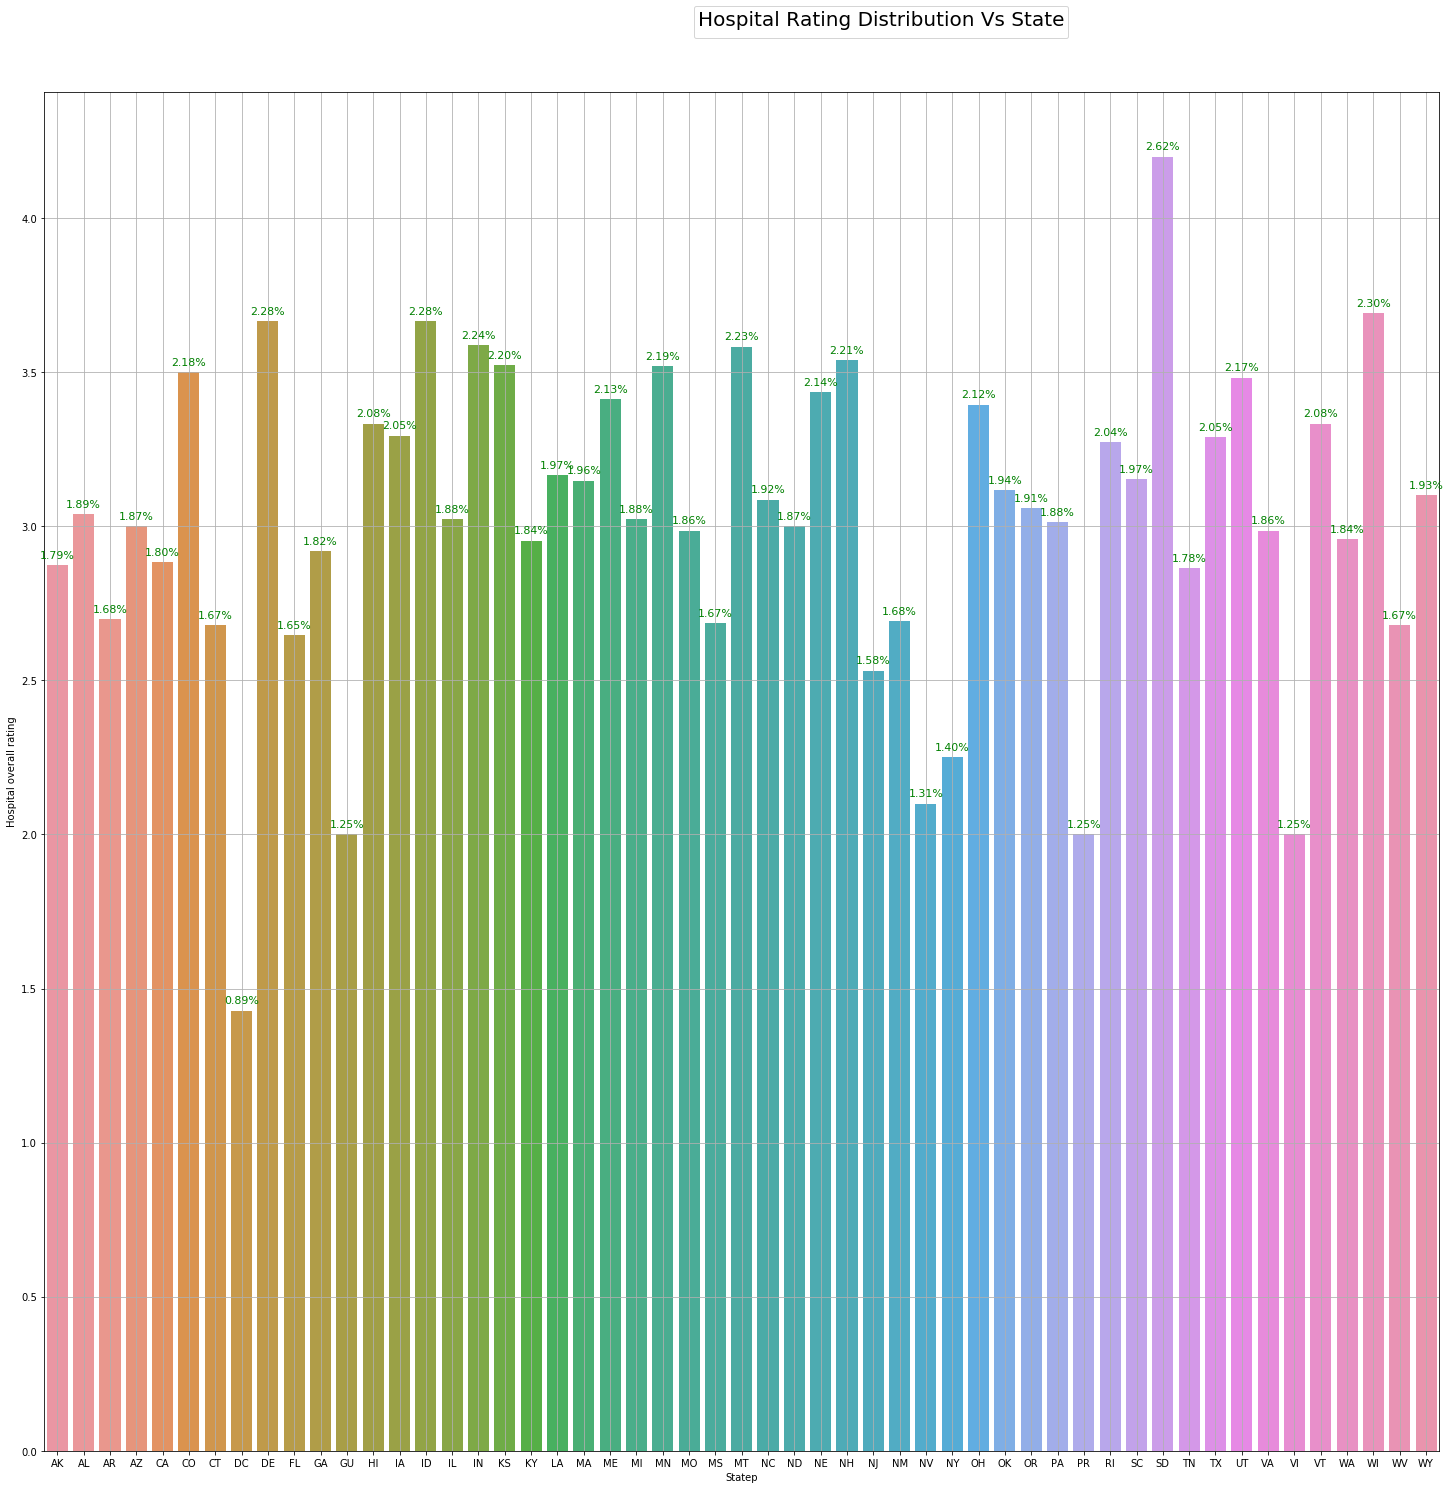

In [280]:
# Hospital Ratings - Annotation with Percenatage
ab = Hospital_rating
plt.figure(figsize=(25,25))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                title=r'Hospital Rating Distribution Vs State')                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='State', y='Hospital overall rating', data=ab )
ax.set(xlabel = 'Statep', ylabel = 'Hospital overall rating')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / ab['Hospital overall rating'].sum():.2f}%", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='green', rotation=0, xytext=(0, 10),
         textcoords='offset points')

#### EDA on All Seven variables of Hospital Info DF with Hospital Overall rating

In [281]:
Hospital_Info_DF2['Hospital overall rating'] = Hospital_Info_DF2['Hospital overall rating'].apply(pd.to_numeric)

In [282]:
Safety_hidf=Hospital_Info_DF2.groupby(['Safety_National_Comp_Rank'])['Hospital overall rating'].mean()
Exp_hidf=Hospital_Info_DF2.groupby(['Patient_experience_National_Comp_Rank'])['Hospital overall rating'].mean()
Eff_hidf=Hospital_Info_DF2.groupby(['Effectiveness_Care_National_Comp_Rank'])['Hospital overall rating'].mean()
Imaging_hidf=Hospital_Info_DF2.groupby(['Efficient_MI_use_National_Comp_Rank'])['Hospital overall rating'].mean()
Mort_hidf=Hospital_Info_DF2.groupby(['Mortality_National_Comp_Rank'])['Hospital overall rating'].mean()
Radm_hidf=Hospital_Info_DF2.groupby(['Readmission_National_Comp_Rank'])['Hospital overall rating'].mean()
Time_hidf=Hospital_Info_DF2.groupby(['Timeliness_Care_National_Comp_Rank'])['Hospital overall rating'].mean()

####       1. Readmission

In [283]:
Radm_hidf = Hospital_Info_DF2.groupby(['Readmission_National_Comp_Rank'])['Hospital overall rating'].mean()
Hospital_eda = pd.DataFrame(Radm_hidf )
Hospital_eda = Hospital_eda.reset_index()
Hospital_eda.columns = ['Readmission_National_Comp_Rank', 'Hospital overall rating']

<Figure size 576x360 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Hospital overall rating'),
 Text(0.5, 0, 'Readmission_National_Comp_Rank')]

Text(0, 10, '28.05%')

Text(0, 10, '33.06%')

Text(0, 10, '38.89%')

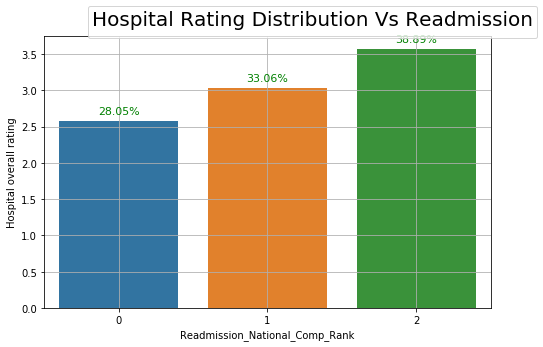

In [284]:
# Hospital Ratings - Annotation with Percenatage
ab = Hospital_eda
plt.figure(figsize=(8,5))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                title=r'Hospital Rating Distribution Vs Readmission')                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Readmission_National_Comp_Rank', y='Hospital overall rating', data=ab )
ax.set(xlabel = 'Readmission_National_Comp_Rank', ylabel = 'Hospital overall rating')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / ab['Hospital overall rating'].sum():.2f}%", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='green', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

Insight: This plot average rating and Readmission. For Above the National Average for Readmission Score we have Higher Average Hospital Rating.

#### 2. Safety of Care

<Figure size 576x360 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Hospital overall rating'),
 Text(0.5, 0, 'Safety_National_Comp_Rank')]

Text(0, 10, '26.55%')

Text(0, 10, '34.81%')

Text(0, 10, '38.64%')

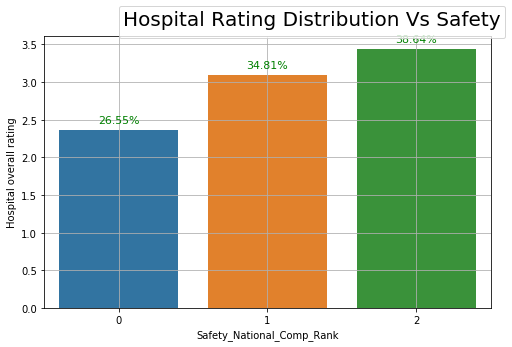

In [285]:


Safety_hidf = Hospital_Info_DF2.groupby(['Safety_National_Comp_Rank'])['Hospital overall rating'].mean()
Hospital_eda = pd.DataFrame(Safety_hidf )
Hospital_eda = Hospital_eda.reset_index()
Hospital_eda.columns = ['Safety_National_Comp_Rank', 'Hospital overall rating']

# Hospital Ratings - Annotation with Percenatage
ab = Hospital_eda
plt.figure(figsize=(8,5))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                title=r'Hospital Rating Distribution Vs Safety')                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Safety_National_Comp_Rank', y='Hospital overall rating', data=ab )
ax.set(xlabel = 'Safety_National_Comp_Rank', ylabel = 'Hospital overall rating')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / ab['Hospital overall rating'].sum():.2f}%", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='green', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

Insight: This plot average rating and Safety. For Above the National Average for Safety Score we have Higher Average Hospital Rating.

#### 3. Patient Experience

<Figure size 576x360 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Hospital overall rating'),
 Text(0.5, 0, 'Patient_experience_National_Comp_Rank')]

Text(0, 10, '26.29%')

Text(0, 10, '33.57%')

Text(0, 10, '40.14%')

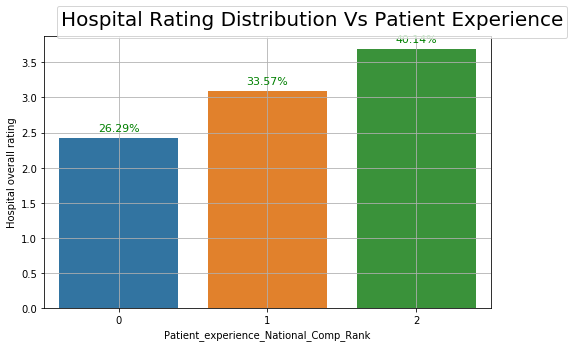

In [286]:
Exp_hidf=Hospital_Info_DF2.groupby(['Patient_experience_National_Comp_Rank'])['Hospital overall rating'].mean()
Hospital_eda = pd.DataFrame(Exp_hidf )
Hospital_eda = Hospital_eda.reset_index()
Hospital_eda.columns = ['Patient_experience_National_Comp_Rank', 'Hospital overall rating']

# Hospital Ratings - Annotation with Percenatage
ab = Hospital_eda
plt.figure(figsize=(8,5))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                title=r'Hospital Rating Distribution Vs Patient Experience')                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Patient_experience_National_Comp_Rank', y='Hospital overall rating', data=ab )
ax.set(xlabel = 'Patient_experience_National_Comp_Rank', ylabel = 'Hospital overall rating')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / ab['Hospital overall rating'].sum():.2f}%", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='green', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

Insight: This plot average rating and Patient Experience. For Above the National Average for Patient Experience Score we have Higher Average Hospital Rating.

#### 4. Effectiveness of care

<Figure size 576x360 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Hospital overall rating'),
 Text(0.5, 0, 'Effectiveness_Care_National_Comp_Rank')]

Text(0, 10, '30.65%')

Text(0, 10, '34.62%')

Text(0, 10, '34.73%')

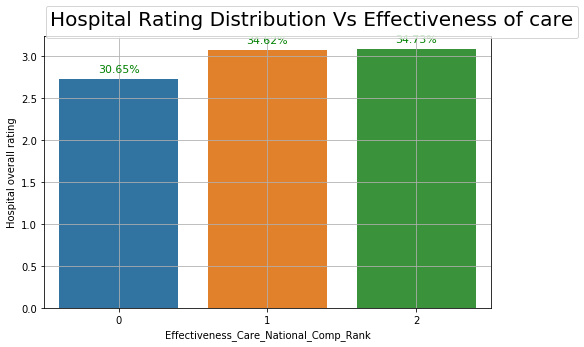

In [287]:
Eff_hidf=Hospital_Info_DF2.groupby(['Effectiveness_Care_National_Comp_Rank'])['Hospital overall rating'].mean()
Hospital_eda = pd.DataFrame(Eff_hidf )
Hospital_eda = Hospital_eda.reset_index()
Hospital_eda.columns = ['Effectiveness_Care_National_Comp_Rank', 'Hospital overall rating']

# Hospital Ratings - Annotation with Percenatage
ab = Hospital_eda
plt.figure(figsize=(8,5))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                title=r'Hospital Rating Distribution Vs Effectiveness of care')                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Effectiveness_Care_National_Comp_Rank', y='Hospital overall rating', data=ab )
ax.set(xlabel = 'Effectiveness_Care_National_Comp_Rank', ylabel = 'Hospital overall rating')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / ab['Hospital overall rating'].sum():.2f}%", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='green', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

Insight: This plot average rating and Effectiveness of care. For Above the National Average for Effectiveness of care Score we have Higher Average Hospital Rating.

#### 5. Efficient use of medical imaging

<Figure size 576x360 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Hospital overall rating'),
 Text(0.5, 0, 'Efficient_MI_use_National_Comp_Rank')]

Text(0, 10, '33.08%')

Text(0, 10, '33.47%')

Text(0, 10, '33.45%')

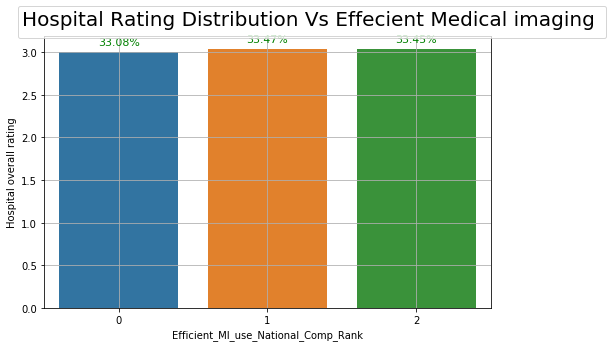

In [288]:
Imaging_hidf=Hospital_Info_DF2.groupby(['Efficient_MI_use_National_Comp_Rank'])['Hospital overall rating'].mean()
Hospital_eda = pd.DataFrame(Imaging_hidf )
Hospital_eda = Hospital_eda.reset_index()
Hospital_eda.columns = ['Efficient_MI_use_National_Comp_Rank', 'Hospital overall rating']

# Hospital Ratings - Annotation with Percenatage
ab = Hospital_eda
plt.figure(figsize=(8,5))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                title=r'Hospital Rating Distribution Vs Effecient Medical imaging ')                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Efficient_MI_use_National_Comp_Rank', y='Hospital overall rating', data=ab )
ax.set(xlabel = 'Efficient_MI_use_National_Comp_Rank', ylabel = 'Hospital overall rating')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / ab['Hospital overall rating'].sum():.2f}%", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='green', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

Insight: This plot average rating and Efficient use of Medical Imaging. For Same as the National Average for Efficient use of Medical Imaging Score we have Higher Average Hospital Rating.

#### 6. Mortality

<Figure size 576x360 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Hospital overall rating'),
 Text(0.5, 0, 'Mortality_National_Comp_Rank')]

Text(0, 10, '28.10%')

Text(0, 10, '34.65%')

Text(0, 10, '37.26%')

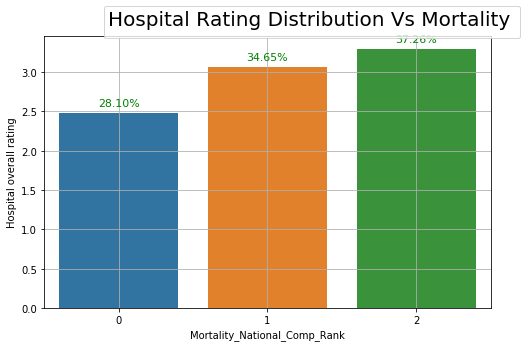

In [289]:
Mort_hidf=Hospital_Info_DF2.groupby(['Mortality_National_Comp_Rank'])['Hospital overall rating'].mean()
Hospital_eda = pd.DataFrame(Mort_hidf )
Hospital_eda = Hospital_eda.reset_index()
Hospital_eda.columns = ['Mortality_National_Comp_Rank', 'Hospital overall rating']

# Hospital Ratings - Annotation with Percenatage
ab = Hospital_eda
plt.figure(figsize=(8,5))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                title=r'Hospital Rating Distribution Vs Mortality ')                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Mortality_National_Comp_Rank', y='Hospital overall rating', data=ab )
ax.set(xlabel = 'Mortality_National_Comp_Rank', ylabel = 'Hospital overall rating')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / ab['Hospital overall rating'].sum():.2f}%", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='green', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

Insight: This plot average rating and Mortality.For Above the National Average for Mortality Score we have Higher Average Hospital Rating.

#### 7. Timeliness of care

<Figure size 576x360 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Hospital overall rating'),
 Text(0.5, 0, 'Timeliness_Care_National_Comp_Rank')]

Text(0, 10, '29.04%')

Text(0, 10, '35.26%')

Text(0, 10, '35.69%')

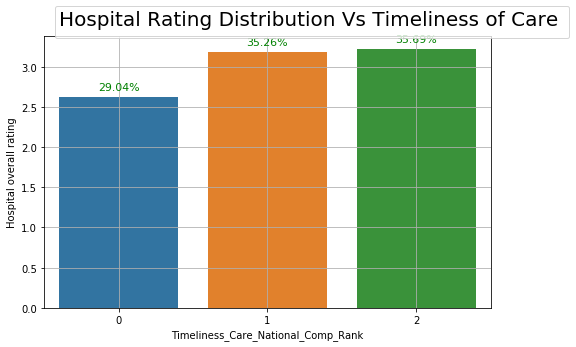

In [290]:
Time_hidf=Hospital_Info_DF2.groupby(['Timeliness_Care_National_Comp_Rank'])['Hospital overall rating'].mean()
Hospital_eda = pd.DataFrame(Time_hidf )
Hospital_eda = Hospital_eda.reset_index()
Hospital_eda.columns = ['Timeliness_Care_National_Comp_Rank', 'Hospital overall rating']

# Hospital Ratings - Annotation with Percenatage
ab = Hospital_eda
plt.figure(figsize=(8,5))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                title=r'Hospital Rating Distribution Vs Timeliness of Care ')                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Timeliness_Care_National_Comp_Rank', y='Hospital overall rating', data=ab )
ax.set(xlabel = 'Timeliness_Care_National_Comp_Rank', ylabel = 'Hospital overall rating')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / ab['Hospital overall rating'].sum():.2f}%", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='green', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

Insight: This plot average rating and Timeliness of Care.For Above the National Average for Timeliness of Care Score we have Higher Average Hospital Rating.

#### Histogram to show Number of Hospital for Hospital Overall Rating

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002958B549C88>]],
      dtype=object)

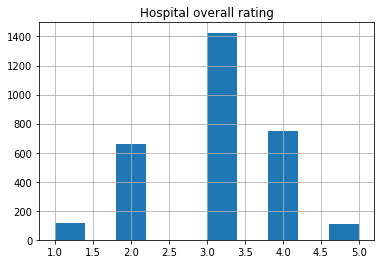

In [291]:
Hospital_Info_DF2.hist(column='Hospital overall rating')

This Histogram Shows the ditribution of Hospital Counts with respect to the Hospital Overall Rating again showing maximum number of Hospitals are having a star raing of 3.

In [292]:
Hospital_Info_DF2.columns

Index(['Hospital overall rating', 'Mortality_National_Comp_Rank',
       'Safety_National_Comp_Rank', 'Readmission_National_Comp_Rank',
       'Patient_experience_National_Comp_Rank',
       'Effectiveness_Care_National_Comp_Rank',
       'Timeliness_Care_National_Comp_Rank',
       'Efficient_MI_use_National_Comp_Rank'],
      dtype='object')

In [293]:
#Lets check the correlation betweek all numeric variable 
Hospital_Info_DF2.corr()


Hospital overall rating  \
Hospital overall rating                               1.000000   
Mortality_National_Comp_Rank                          0.223293   
Safety_National_Comp_Rank                             0.421485   
Readmission_National_Comp_Rank                        0.431387   
Patient_experience_National_Comp_Rank                 0.586321   
Effectiveness_Care_National_Comp_Rank                 0.102952   
Timeliness_Care_National_Comp_Rank                    0.262807   
Efficient_MI_use_National_Comp_Rank                   0.015457   

                                       Mortality_National_Comp_Rank  \
Hospital overall rating                                    0.223293   
Mortality_National_Comp_Rank                               1.000000   
Safety_National_Comp_Rank                                 -0.015734   
Readmission_National_Comp_Rank                            -0.087416   
Patient_experience_National_Comp_Rank                     -0.003675   
Effectiveness_Care_National_Comp_Rank                      0.032878   
Timeliness_Care_National_Comp_Rank                        -0.110230   
Efficient_MI_use_National_Comp_Rank                        0.005387   

                                       Safety_National_Comp_Rank  \
Hospital overall rating                                 0.421485   
Mortality_National_Comp_Rank                           -0.015734   
Safety_National_Comp_Rank                               1.000000   
Readmission_National_Comp_Rank                          0.045289   
Patient_experience_National_Comp_Rank                   0.110414   
Effectiveness_Care_National_Comp_Rank                   0.082887   
Timeliness_Care_National_Comp_Rank                      0.094906   
Efficient_MI_use_National_Comp_Rank                    -0.015317   

                                       Readmission_National_Comp_Rank  \
Hospital overall rating                                      0.431387   
Mortality_National_Comp_Rank                                -0.087416   
Safety_National_Comp_Rank                                    0.045289   
Readmission_National_Comp_Rank                               1.000000   
Patient_experience_National_Comp_Rank                        0.210123   
Effectiveness_Care_National_Comp_Rank                       -0.010364   
Timeliness_Care_National_Comp_Rank                           0.131647   
Efficient_MI_use_National_Comp_Rank                          0.075339   

                                       Patient_experience_National_Comp_Rank  \
Hospital overall rating                                             0.586321   
Mortality_National_Comp_Rank                                       -0.003675   
Safety_National_Comp_Rank                                           0.110414   
Readmission_National_Comp_Rank                                      0.210123   
Patient_experience_National_Comp_Rank                               1.000000   
Effectiveness_Care_National_Comp_Rank                               0.017525   
Timeliness_Care_National_Comp_Rank                                  0.292330   
Efficient_MI_use_National_Comp_Rank                                -0.000454   

                                       Effectiveness_Care_National_Comp_Rank  \
Hospital overall rating                                             0.102952   
Mortality_National_Comp_Rank                                        0.032878   
Safety_National_Comp_Rank                                           0.082887   
Readmission_National_Comp_Rank                                     -0.010364   
Patient_experience_National_Comp_Rank                               0.017525   
Effectiveness_Care_National_Comp_Rank                               1.000000   
Timeliness_Care_National_Comp_Rank                                 -0.047079   
Efficient_MI_use_National_Comp_Rank                                 0.177598   

                                       Timeliness_Care_National_Comp_Rank  \
Hospital overa

<Figure size 1152x576 with 0 Axes>

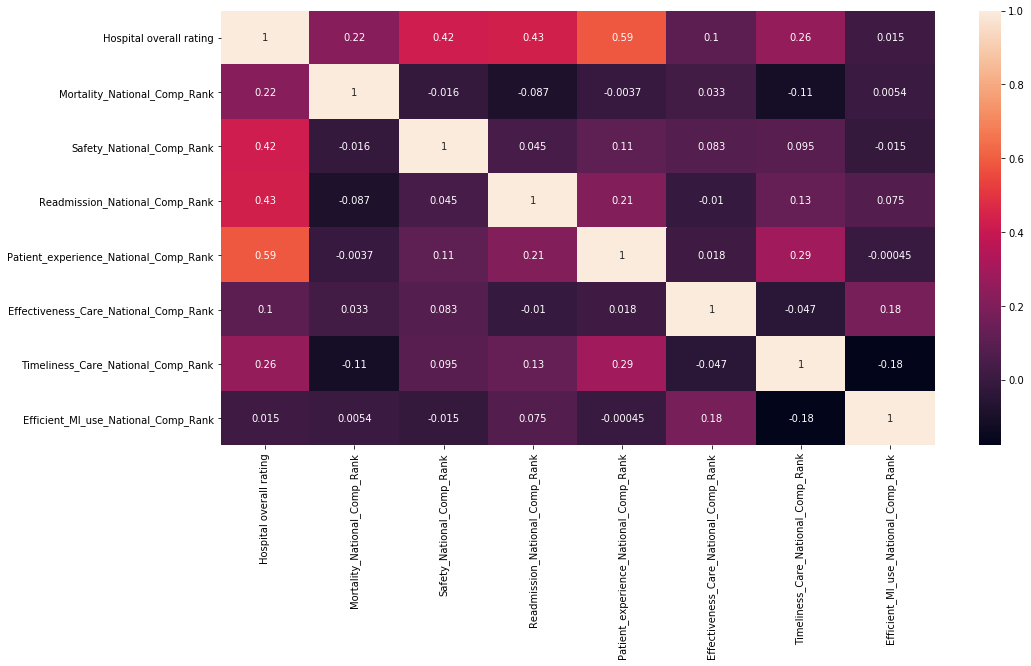

In [294]:
#Plotting Heatmap for Correlation
corr=Hospital_Info_DF2.corr()
# figure size
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True)
plt.show()

Hospital overall rating is having highest correlation with Patient_experience_National_Comp_Rank. The order of Correlation from Highest to lowest are:
- Patient_experience_National_Comp_Rank
- Readmission_National_Comp_Rank	
- Safety_National_Comp_Rank
- Timeliness_Care_National_Comp_Rank
- Mortality_National_Comp_Rank
- Effectiveness_Care_National_Comp_Rank	
- Efficient_MI_use_National_Comp_Rank

In [295]:
Hospital_Info_DF.shape

(3061, 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002958B6DF668>]],
      dtype=object)

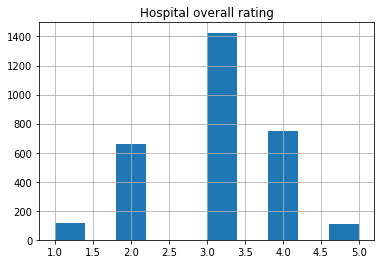

In [296]:
Combine_df2.hist(column='Hospital overall rating')

In [297]:
Combine_df2.columns

Index(['Hospital overall rating', 'Score_MORT_30_AMI', 'Score_MORT_30_COPD',
       'Score_MORT_30_HF', 'Score_MORT_30_PN', 'Score_MORT_30_STK',
       'Score_READM_30_AMI', 'Score_READM_30_COPD', 'Score_READM_30_HF',
       'Score_READM_30_HIP_KNEE', 'Score_READM_30_HOSP_WIDE',
       'Score_READM_30_PN', 'Score_READM_30_STK', 'Score_HAI_1_SIR',
       'Score_HAI_1a_SIR', 'Score_HAI_2_SIR', 'Score_HAI_2a_SIR',
       'Score_HAI_3_SIR', 'Score_HAI_5_SIR', 'Score_HAI_6_SIR',
       'Score_COMP_HIP_KNEE', 'Score_PSI_12_POSTOP_PULMEMB_DVT',
       'Score_PSI_13_POST_SEPSIS', 'Score_PSI_14_POSTOP_DEHIS',
       'Score_PSI_15_ACC_LAC', 'Score_PSI_3_ULCER', 'Score_PSI_4_SURG_COMP',
       'Score_PSI_6_IAT_PTX', 'Score_PSI_7_CVCBI', 'Score_PSI_8_POST_HIP',
       'Score_PSI_90_SAFETY', 'Score_OP_10', 'Score_OP_11', 'Score_OP_13',
       'Score_OP_14', 'Score_OP_9',
       'Patient Survey Star Rating_H_CLEAN_STAR_RATING',
       'Patient Survey Star Rating_H_COMP_1_STAR_RATING',
       'Patien

In [298]:
Combine_df2.corr()

Hospital overall rating  \
Hospital overall rating                                            1.000000   
Score_MORT_30_AMI                                                 -0.194708   
Score_MORT_30_COPD                                                -0.162226   
Score_MORT_30_HF                                                  -0.127145   
Score_MORT_30_PN                                                  -0.275750   
Score_MORT_30_STK                                                 -0.143466   
Score_READM_30_AMI                                                -0.285059   
Score_READM_30_COPD                                               -0.322179   
Score_READM_30_HF                                                 -0.389238   
Score_READM_30_HIP_KNEE                                           -0.207001   
Score_READM_30_HOSP_WIDE                                          -0.604187   
Score_READM_30_PN                                                 -0.391255   
Score_READM_30_STK                                                -0.274833   
Score_HAI_1_SIR                                                   -0.141944   
Score_HAI_1a_SIR                                                  -0.084344   
Score_HAI_2_SIR                                                   -0.113575   
Score_HAI_2a_SIR                                                  -0.036643   
Score_HAI_3_SIR                                                   -0.039154   
Score_HAI_5_SIR                                                   -0.095299   
Score_HAI_6_SIR                                                   -0.064483   
Score_COMP_HIP_KNEE                                               -0.152424   
Score_PSI_12_POSTOP_PULMEMB_DVT                                   -0.395773   
Score_PSI_13_POST_SEPSIS                                          -0.132981   
Score_PSI_14_POSTOP_DEHIS                                         -0.093531   
Score_PSI_15_ACC_LAC                                              -0.273731   
Score_PSI_3_ULCER                                                 -0.182030   
Score_PSI_4_SURG_COMP                                             -0.197441   
Score_PSI_6_IAT_PTX                                               -0.133133   
Score_PSI_7_CVCBI                                                 -0.177487   
Score_PSI_8_POST_HIP                                               0.019326   
Score_PSI_90_SAFETY                                               -0.494426   
Score_OP_10                                                       -0.067312   
Score_OP_11                                                       -0.068933   
Score_OP_13                                                        0.009225   
Score_OP_14                                                       -0.156861   
Score_OP_9                                                        -0.037843   
Patient Survey Star Rating_H_CLEAN_STAR_RATING                     0.473013   
Patient Survey Star Rating_H_COMP_1_STAR_RATING                    0.568541   
Patient Survey Star Rating_H_COMP_2_STAR_RATING                    0.465880   
Patient Survey Star Rating_H_COMP_3_STAR_RATING                    0.552178   
Patient Survey Star Rating_H_COMP_4_STAR_RATING                    0.531962   
Patient Survey Star Rating_H_COMP_5_STAR_RATING                    0.511769   
Patient Survey Star Rating_H_COMP_6_STAR_RATING                    0.468943   
Patient Survey Star Rating_H_COMP_7_STAR_RATING                    0.580980   
Patient Survey Star Rating_H_HSP_RATING_STAR_RA...                 0.578182   
Patient Survey Star Rating_H_QUIET_STAR_RATING                     0.378203   
Patient Survey Star Rating_H_RECMND_STAR_RATING                    0.551278   
Patient Survey Star Rating_H_STAR_RATING                           0.595960   
Score_ED_1b                                                       -0.335128   
Score_ED_2b                                                       -0.285788   
Score_IMM_2            

<Figure size 2880x2160 with 0 Axes>

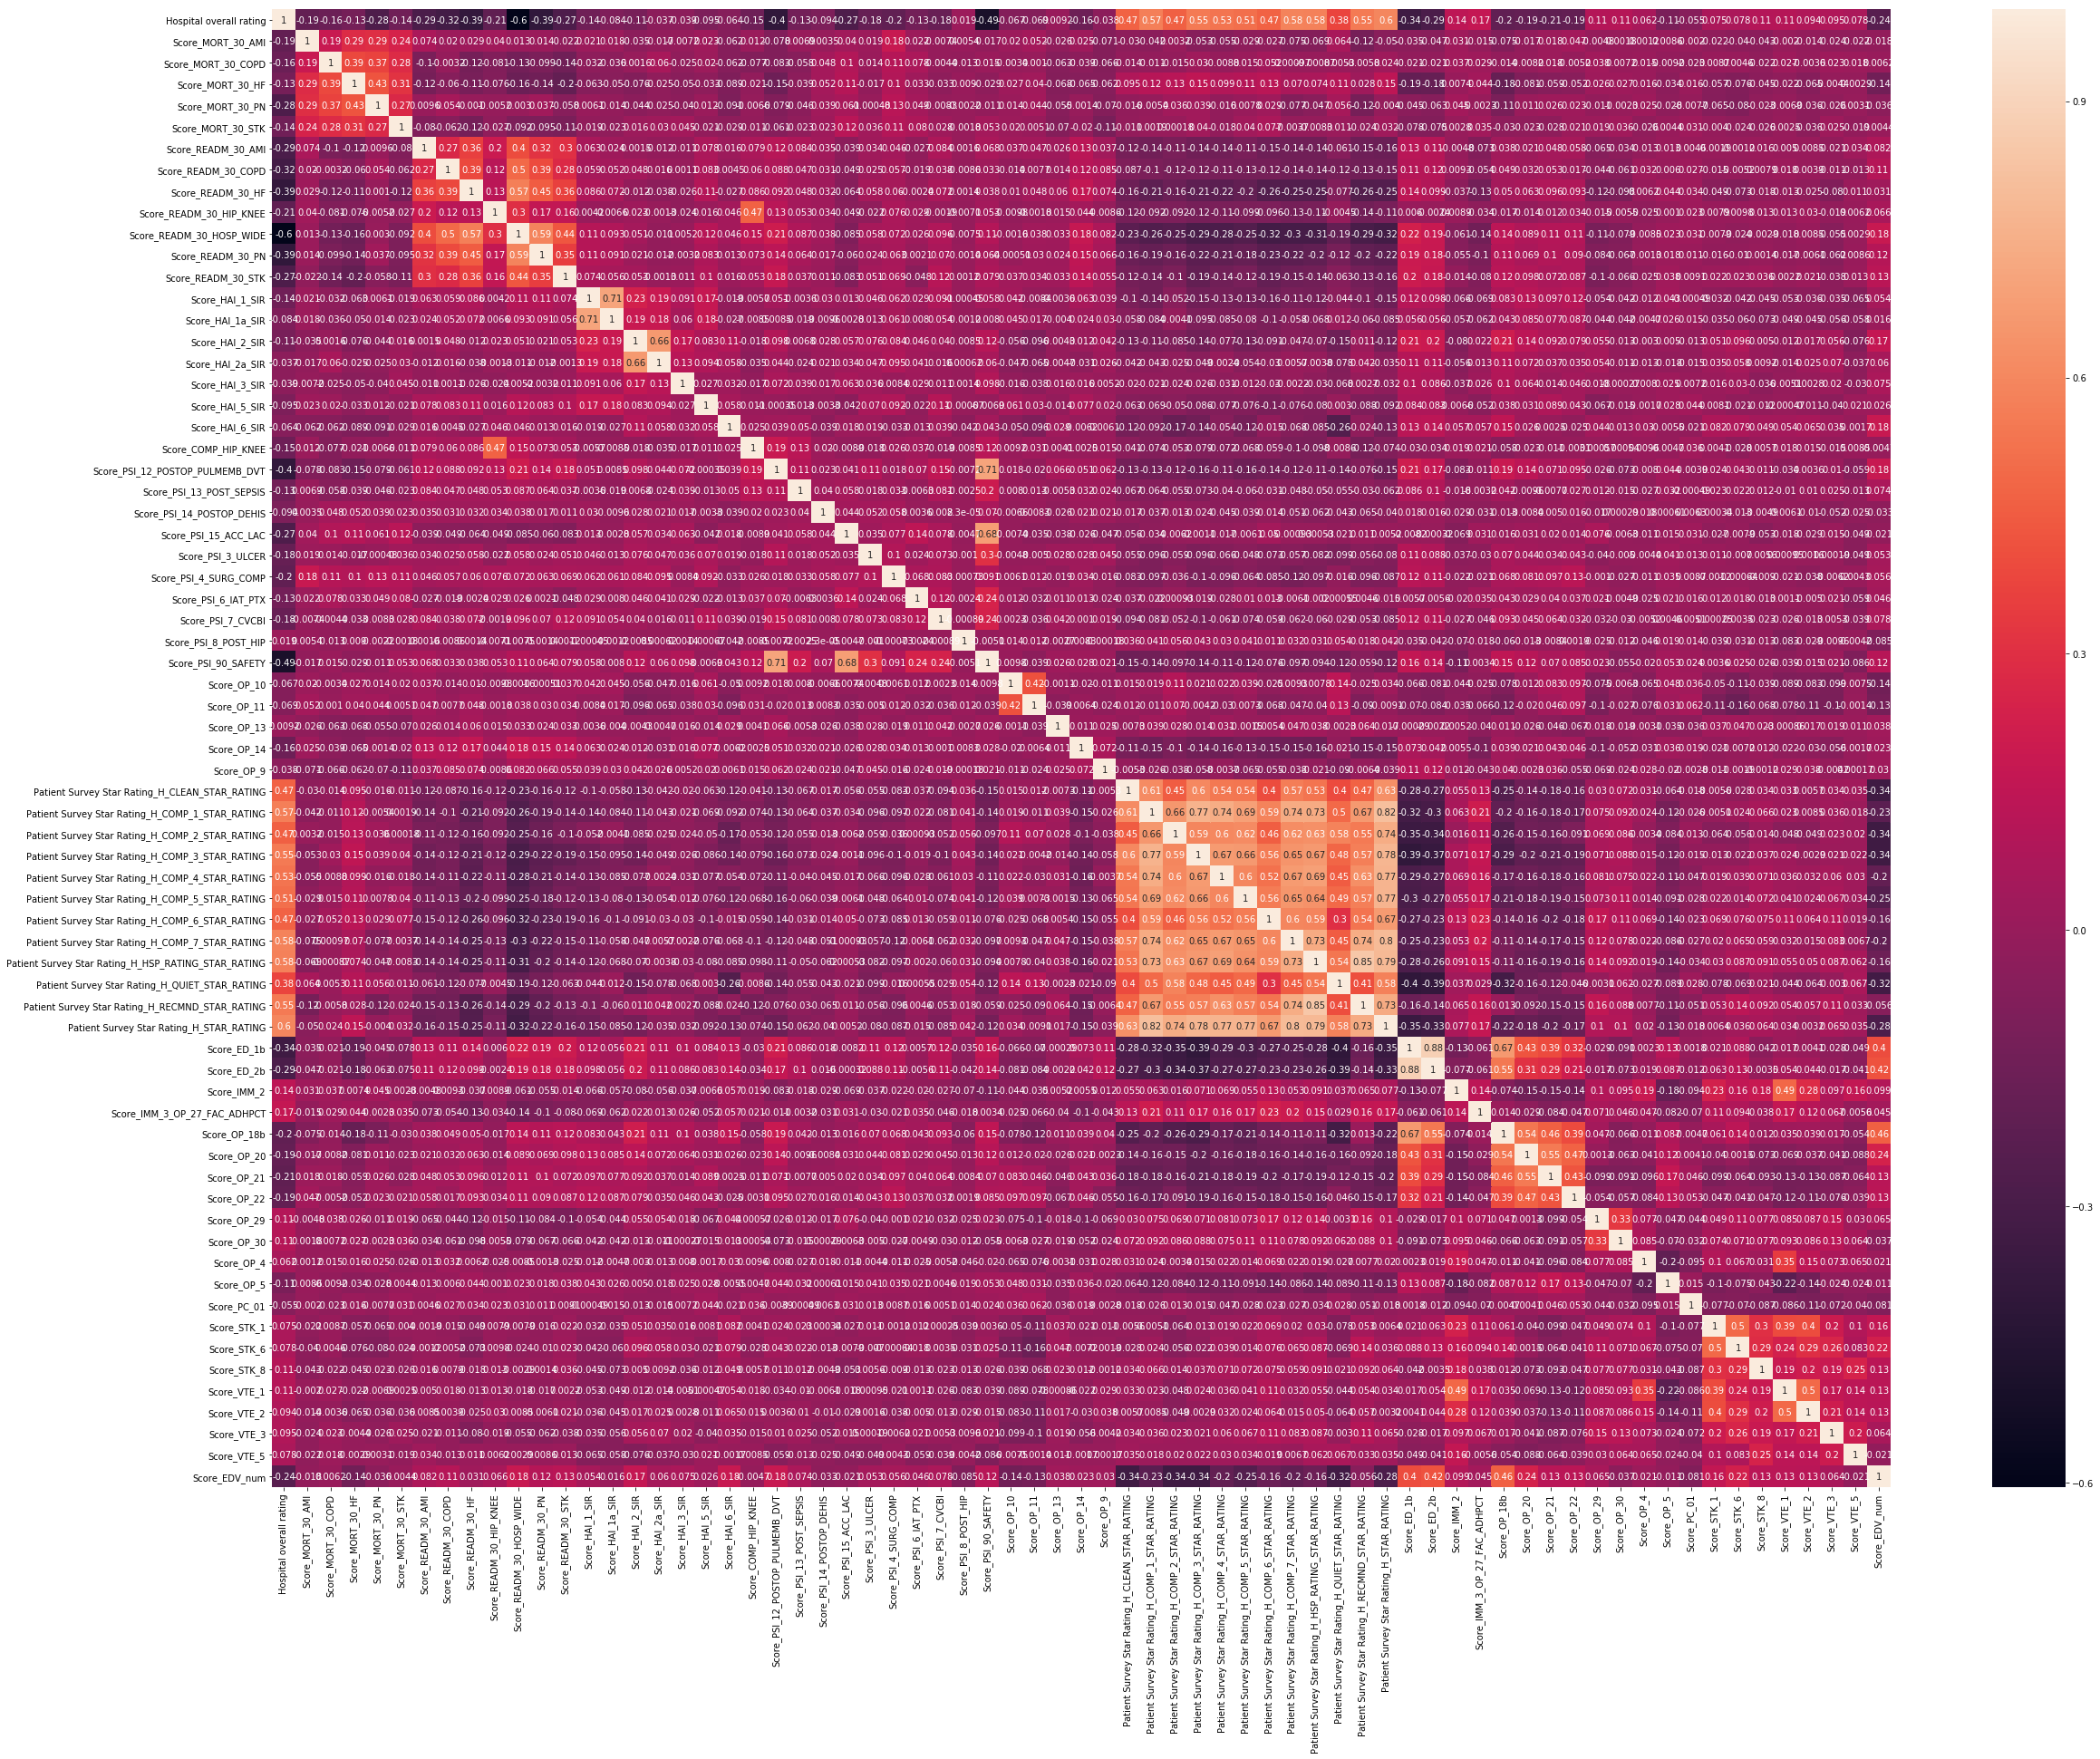

In [299]:
#Plotting Heatmap for Correlation
corr=Combine_df2.corr()
# figure size
plt.figure(figsize=(40,30))
sns.heatmap(corr, annot=True)
plt.show()

### Model Building - Part I - Supervised Learning

### Part 1 - Supervised Learning-Based Rating

Think about the types of supervised models you will choose for predicting the star ratings (1-5, five-class classification). Consider all the practical as well as technical aspects involved. In the report, mention the types of models you will consider, the pros and cons of each, and the reasons for choosing certain models for this problem. Note that you have to build two types of model (as mentioned below). 

Create a Random Forest and a Linear Regression(considering the ratings as continuous ordinal variables) Model to predict the hospital ratings (1-5) using the 64 measures specified by the CMS.  
Evaluate your model using relevant techniques. Report the relative importance of the measures according to their predictive power. Finally, report the overall accuracy of predictions using the actual star ratings for both the models.

In [300]:
 Combine_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3061 entries, 0 to 3060
Data columns (total 69 columns):
Hospital overall rating                                3061 non-null int64
Score_MORT_30_AMI                                      3061 non-null float64
Score_MORT_30_COPD                                     3061 non-null float64
Score_MORT_30_HF                                       3061 non-null float64
Score_MORT_30_PN                                       3061 non-null float64
Score_MORT_30_STK                                      3061 non-null float64
Score_READM_30_AMI                                     3061 non-null float64
Score_READM_30_COPD                                    3061 non-null float64
Score_READM_30_HF                                      3061 non-null float64
Score_READM_30_HIP_KNEE                                3061 non-null float64
Score_READM_30_HOSP_WIDE                               3061 non-null float64
Score_READM_30_PN                               

### Review Hospital Rating Distribution

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Hospital Rating distribution')

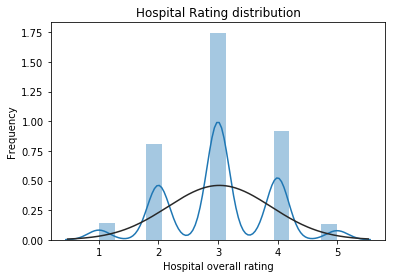

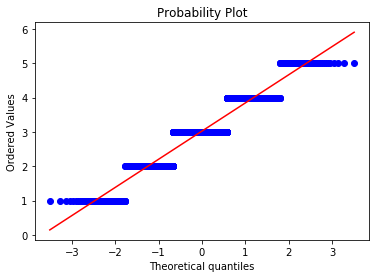

In [301]:
import scipy.stats as stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
# Kernel Density Plot
sns.distplot(Combine_df2['Hospital overall rating'],fit=norm);
plt.ylabel('Frequency')
plt.title('Hospital Rating distribution');
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Combine_df2['Hospital overall rating']);
# QQ-plot
fig = plt.figure()
res = stats.probplot(Combine_df2['Hospital overall rating'], plot=plt)
plt.show()

### Import libraries for Linear Regression Modeling

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn import metrics
import eli5
# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

In [303]:
# Initialize instance of StandardScaler
scaler = StandardScaler()

### Training the Model

In [304]:
X = Combine_df2.drop(columns=['Hospital overall rating'],axis=1)
y = Combine_df2['Hospital overall rating']

In [305]:
Scale_x = scaler.fit_transform(X)

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [307]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1836, 68), (1225, 68), (1836,), (1225,))

In [308]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Test the Model

In [309]:
predictions = lm.predict(X_test).round(decimals=0).astype(int)
predictions_df = pd.DataFrame(predictions)
predictions_df.columns=['PredictedRating']
predictions_df.head(5)

PredictedRating
0                4
1                2
2                3
3                3
4                3

#### Create a scatterplot of the real test values versus the predicted values.

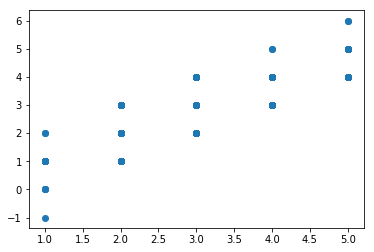

In [310]:
plt.scatter(y_test,predictions)

### Evaluating the Model

In [311]:
# calculate r2 score
round(r2_score(y_test, predictions),2)

0.87

In [312]:
# Lets review accuracy by rating with the classification report
print("Classification report: ", classification_report(y_test, predictions))

Classification report:                precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         0
           1       0.81      0.84      0.83        45
           2       0.93      0.87      0.90       272
           3       0.91      0.94      0.92       570
           4       0.91      0.90      0.90       298
           5       0.94      0.72      0.82        40
           6       0.00      0.00      0.00         0

   micro avg       0.90      0.90      0.90      1225
   macro avg       0.56      0.53      0.55      1225
weighted avg       0.91      0.90      0.91      1225



In [313]:
from sklearn.metrics import accuracy_score
print("Accuracy:",round(accuracy_score(y_test, predictions),3))

Accuracy: 0.904


#### Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [314]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.09714285714285714
MSE: 0.09877551020408164
RMSE: 0.3142857142857143


In [315]:
predictions_df.head(5)

PredictedRating
0                4
1                2
2                3
3                3
4                3

In [316]:
y_test_df = pd.DataFrame(y_test)
y_test_df

# reset indexes to merge datasets correctly

y_test_df.reset_index(drop=True, inplace=True)
predictions_df.reset_index(drop=True, inplace=True)

df_LR_plot = pd.concat([y_test_df, predictions_df], axis=1)
df_LR_plot['IsCorrect'] =  np.where(df_LR_plot['Hospital overall rating']==df_LR_plot['PredictedRating'],1,0)


Hospital overall rating
2566                        4
2207                        2
1276                        3
45                          3
1630                        3
1416                        2
1280                        2
2526                        2
2943                        3
2667                        4
410                         3
1289                        3
2560                        3
2093                        5
922                         3
819                         4
2774                        4
2527                        3
2868                        3
534                         3
1762                        1
2206                        3
1956                        2
2106                        3
2839                        4
1790                        3
2558                        4
2820                        4
60                          3
631                         1
1703                        2
1291                        3
74                          3
457                         3
505                         4
959                         2
1529                        4
2223                        3
247                         2
1682                        4
256                         3
2266                        4
1891                        2
2592                        4
1424                        4
730                         4
2007                        3
2340                        4
1266                        3
1697                        3
246                         3
2024                        3
2525                        2
2643                        3
59                          3
773                         2
2844                        3
463                         3
928                         3
2719                        2
1295                        4
1675                        2
2684                        2
484                         4
1707                        2
887                         4
18                          3
312                         2
2050                        4
683                         2
1997                        2
1415                        2
1810                        3
403                         4
1635                        3
1665                        4
1460                        3
1489                        4
888                         3
1430                        3
258                         5
520                         3
501                         4
2469                        3
48                          2
2917                        3
704                         2
1317                        3
1654                        4
2442                        3
442                         2
481                         3
1107                        4
1979                        1
1915                        4
2916                        4
602                         5
843                         3
1836                        2
2925                        3
1046                        3
257                         3
1222                        4
1042                        2
2573                        3
2443                        5
147                         3
651                         3
329                         2
1321                        3
1696                        2
3043                        3
2067                        4
2343                        3
2311                        2
2580                        4
215                         2
2395                        3
1624                        5
1001                        3
2541                        2
1267                        3
304                         2
235                         2
1146                        3
379                         2
2373                        4
660                         3
2306                        4
2167                        5
56                          3
1550                        1
2500            

In [317]:
df1 = pd.DataFrame(columns=['Actual','Predicted','Accuracy'])
df1['Actual']=df_LR_plot.groupby(['Hospital overall rating'])['Hospital overall rating'].count()
df1['Predicted']=df_LR_plot.groupby(['PredictedRating'])['PredictedRating'].count()
df1['Accuracy']=df_LR_plot.groupby(['Hospital overall rating'])['IsCorrect'].sum()


Text(0.5, 1.0, 'LR Model Classification - Actual vs. Predicted vs. Accuracy')

Text(0, 0.5, 'No. of Hospitals')

Text(0.5, 0, 'Hospital Rating')

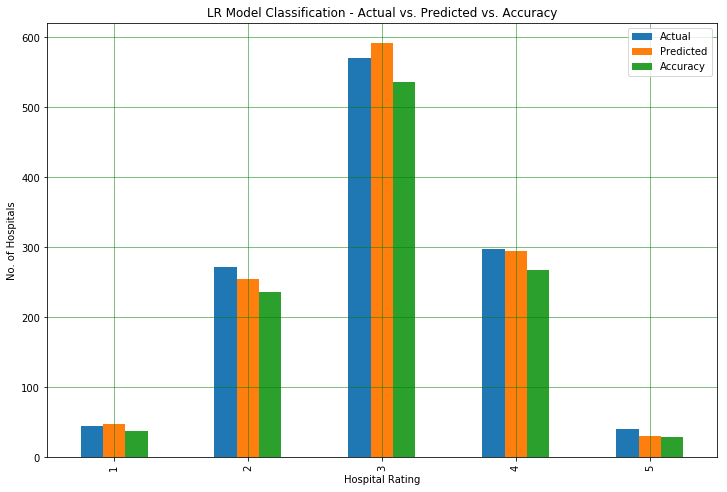

In [318]:
df1.plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('LR Model Classification - Actual vs. Predicted vs. Accuracy')
plt.ylabel('No. of Hospitals', fontsize=10)
plt.xlabel('Hospital Rating', fontsize=10)
plt.show()

#### Prediction - Accuracy at the Classification Level

In [319]:
df1['Accuracy %'] = round(((df1['Accuracy']/df1['Actual'])*100),0)
df1.reset_index(inplace=True)

In [320]:
df1.head(5)

Hospital overall rating  Actual  Predicted  Accuracy  Accuracy %
0                        1      45         47        38        84.0
1                        2     272        254       236        87.0
2                        3     570        591       536        94.0
3                        4     298        295       268        90.0
4                        5      40         31        29        72.0

Text(0.5, 1.0, 'Test Model Classification Accuracy')

Text(0, 0.5, 'Accuracy %')

Text(0.5, 0, 'Hospital Rating')

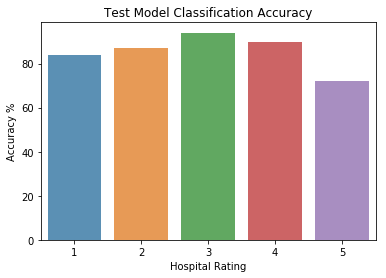

In [321]:
sns.barplot(df1['Hospital overall rating'], df1['Accuracy %'], alpha=0.8)
plt.title('Test Model Classification Accuracy')
plt.ylabel('Accuracy %', fontsize=10)
plt.xlabel('Hospital Rating', fontsize=10)
plt.show()

### Residuals

Let's quickly explore the residuals to make sure everything was okay with our data.

#### Plot a histogram of the residuals

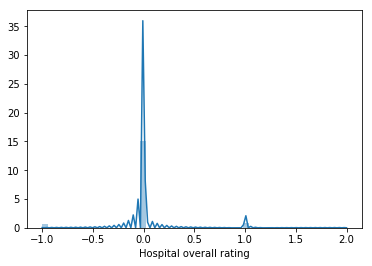

In [322]:
sns.distplot((y_test-predictions),bins=50);

In [323]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficients'])
coeff_df.head(10)

Coefficients
Score_MORT_30_AMI            -0.040430
Score_MORT_30_COPD           -0.064574
Score_MORT_30_HF             -0.085332
Score_MORT_30_PN             -0.061052
Score_MORT_30_STK            -0.034836
Score_READM_30_AMI           -0.023303
Score_READM_30_COPD          -0.019551
Score_READM_30_HF            -0.015905
Score_READM_30_HIP_KNEE      -0.027874
Score_READM_30_HOSP_WIDE     -0.352751

### Use ELI5 to find weights to the features

In [324]:
# Identify the top features
eli5.show_weights(lm, top=100, feature_filter=lambda x: x != '<BIAS>',
                  feature_names=coeff_df.index.values.tolist())

In [325]:
# Features and thier respective coefficients
coeffs_df = pd.DataFrame(list(zip(X.columns, lm.coef_,)), columns = ['Features', 'Estimated_Coefficients'])
coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)

Features  Estimated_Coefficients
29                                Score_PSI_90_SAFETY            2.413471e+00
42    Patient Survey Star Rating_H_COMP_7_STAR_RATING            6.974234e-02
36    Patient Survey Star Rating_H_COMP_1_STAR_RATING            6.281781e-02
38    Patient Survey Star Rating_H_COMP_3_STAR_RATING            6.245687e-02
43  Patient Survey Star Rating_H_HSP_RATING_STAR_R...            5.945832e-02
45    Patient Survey Star Rating_H_RECMND_STAR_RATING            5.287551e-02
40    Patient Survey Star Rating_H_COMP_5_STAR_RATING            4.810578e-02
39    Patient Survey Star Rating_H_COMP_4_STAR_RATING            4.534692e-02
41    Patient Survey Star Rating_H_COMP_6_STAR_RATING            4.068999e-02
35     Patient Survey Star Rating_H_CLEAN_STAR_RATING            3.830637e-02
37    Patient Survey Star Rating_H_COMP_2_STAR_RATING            2.728798e-02
17                                    Score_HAI_5_SIR            1.388405e-02
16                                    Score_HAI_3_SIR            1.219324e-02
44     Patient Survey Star Rating_H_QUIET_STAR_RATING            5.906492e-03
57                                         Score_OP_4            5.365147e-03
12                                    Score_HAI_1_SIR            4.193287e-03
63                                        Score_VTE_1            4.088469e-03
64                                        Score_VTE_2            3.945082e-03
46           Patient Survey Star Rating_H_STAR_RATING            3.582215e-03
54                                        Score_OP_22            3.237466e-03
62                                        Score_STK_8            2.213400e-03
19                                Score_COMP_HIP_KNEE            1.760569e-03
15                                   Score_HAI_2a_SIR            1.339749e-03
65                                        Score_VTE_3            1.079472e-03
49                                        Score_IMM_2            8.593566e-04
50                       Score_IMM_3_OP_27_FAC_ADHPCT            8.520897e-04
58                                         Score_OP_5            8.464119e-04
66                                        Score_VTE_5            5.887168e-04
34                                         Score_OP_9            3.455483e-04
60                                        Score_STK_1            1.276899e-04
52                                        Score_OP_20            5.866596e-05
55                                        Score_OP_29            5.197178e-05
28                               Score_PSI_8_POST_HIP            1.197538e-13
48                                        Score_ED_2b           -4.044301e-05
53                                        Score_OP_21           -1.002591e-04
51                                       Score_OP_18b           -1.161201e-04
32                                        Score_OP_13           -1.688258e-04
56                                        Score_OP_30           -2.153714e-04
61                                        Score_STK_6           -2.290982e-04
33                                        Score_OP_14           -2.671088e-04
47                                        Score_ED_1b           -4.632262e-04
25                              Score_PSI_4_SURG_COMP           -7.801541e-04
59                                        Score_PC_01           -2.370142e-03
31                                        Score_OP_11           -3.915916e-03
30                                        Score_OP_10           -5.529752e-03
11                                 Score_READM_30_STK           -7.378986e-03
10                                  Score_READM_30_PN           -8.848774e-03
14                                    Score_HAI_2_SIR           -1.142934e-02
67                                      Score_EDV_num           -1.214581e-02
7                                   Score_READM_30_HF           -1.590549e-02
13                                   Score_HAI_1a_SIR           -1.

### Positive Coefficients

In [326]:
coeffs_pos_df = coeffs_df[(coeffs_df['Estimated_Coefficients'])>=0].sort_values(by='Estimated_Coefficients', ascending=False)
coeffs_pos_df.head(5)

Features  Estimated_Coefficients
29                                Score_PSI_90_SAFETY                2.413471
42    Patient Survey Star Rating_H_COMP_7_STAR_RATING                0.069742
36    Patient Survey Star Rating_H_COMP_1_STAR_RATING                0.062818
38    Patient Survey Star Rating_H_COMP_3_STAR_RATING                0.062457
43  Patient Survey Star Rating_H_HSP_RATING_STAR_R...                0.059458

### Negative Coefficients

In [327]:
coeffs_neg_df = coeffs_df[(coeffs_df['Estimated_Coefficients'])<0].sort_values(by='Estimated_Coefficients', ascending=False)
coeffs_neg_df.head(5)

Features  Estimated_Coefficients
48   Score_ED_2b               -0.000040
53   Score_OP_21               -0.000100
51  Score_OP_18b               -0.000116
32   Score_OP_13               -0.000169
56   Score_OP_30               -0.000215

#### TOP 10 Features (TOP 5 positive measures and TOP 5 negative measures with group names)

### Findings: Here is a list of key measures impacting the hospital overall rating
1. Patient Survey Star Rating_H_COMP_7_STAR_RATING
2. Patient Survey Star Rating_H_COMP_1_STAR_RATING	
3. Patient Survey Star Rating_H_COMP_3_STAR_RATING
4. Patient Survey Star Rating_H_HSP_RATING_STAR_R..	
5. Patient Survey Star Rating_H_RECMND_STAR_RATING
6. Score_PSI_8_POST_HIP
7. Score_STK_1	
8. Score_ED_2b
9. Score_OP_30	
10. Score_OP_18b

### Part 3 - Recommendations for Hospitals (Use LR results to review Evanston Hospital Score/Measures)

Suppose you work for a healthcare consulting company. The hospital with Provider ID = 140010 (EVANSTON HOSPITAL) is your client.

The hospital’s current star rating is 3, and it wants to improve the rating to at least 4 next year. The data required for this analysis is already available to you.

Using your understanding of the star rating system, recommend ways to improve the rating. The structure you follow for this part is up to you.

In [328]:
# Need to use the entire dataframe X to predict the hospital rating for the this specific hospital
predictions_hosp = lm.predict(X).round(decimals=0).astype(int)
predictions_hosp_df = pd.DataFrame(predictions_hosp)
predictions_hosp_df.columns=['PredictedRating']
predictions_hosp_df.head(5)

PredictedRating
0                3
1                3
2                2
3                3
4                3

In [329]:
# combine the results with the original data frame that has got Provider ID
df_pred = pd.concat([Combine_df1, predictions_hosp_df], axis=1)
df_pred.head(5)

Provider ID Hospital overall rating  Score_MORT_30_AMI  Score_MORT_30_COPD  \
0        10001                       3               12.5                 9.3   
1        10005                       3               16.0                 7.6   
2        10006                       2               16.7                 7.1   
3        10007                       3                NaN                 9.3   
4        10008                       3                NaN                 8.2   

   Score_MORT_30_HF  Score_MORT_30_PN  Score_MORT_30_STK  Score_READM_30_AMI  \
0              12.4              15.5               15.4                16.5   
1              15.5              20.8               15.5                16.7   
2              15.6              18.2               17.9                16.1   
3              14.4              18.8               16.6                 NaN   
4              12.7              15.7                NaN                 NaN   

   Score_READM_30_COPD  Score_READM_30_HF  Score_READM_30_HIP_KNEE  \
0                 21.1               21.4                      5.1   
1                 18.0               21.9                      5.7   
2                 19.8               20.6                      5.0   
3                 19.9               21.1                      NaN   
4                 19.2               23.1                      NaN   

   Score_READM_30_HOSP_WIDE  Score_READM_30_PN  Score_READM_30_STK  \
0                      15.4               18.7                12.7   
1                      14.9               16.4                13.4   
2                      15.4               17.9                12.0   
3                      16.6               17.3                12.7   
4                      15.7               16.0                 NaN   

   Score_HAI_1_SIR  Score_HAI_1a_SIR  Score_HAI_2_SIR  Score_HAI_2a_SIR  \
0            1.740             2.433            1.427             2.307   
1            1.062             0.648            0.456             0.698   
2            0.341             0.443            0.641             0.801   
3              NaN               NaN            0.000               NaN   
4              NaN               NaN              NaN               NaN   

   Score_HAI_3_SIR  Score_HAI_5_SIR  Score_HAI_6_SIR  Score_COMP_HIP_KNEE  \
0            1.870            0.422            0.787                  3.8   
1            0.386            1.388            0.405                  3.0   
2            0.310            1.261            0.513                  3.8   
3              NaN              NaN            0.000                  NaN   
4              NaN              NaN            0.585                  NaN   

   Score_PSI_12_POSTOP_PULMEMB_DVT  Score_PSI_13_POST_SEPSIS  \
0                             3.32                      5.72   
1                             5.63                      9.18   
2                             3.85                       NaN   
3                             4.57                      9.89   
4                              NaN                       NaN   

   Score_PSI_14_POSTOP_DEHIS  Score_PSI_15_ACC_LAC  Score_PSI_3_ULCER  \
0                       2.72                  1.35               0.07   
1                       2.11                  1.25               0.14   
2                       2.50                  1.93               0.09   
3                        NaN                  1.20               0.35   
4                        NaN                  1.41               0.45   

   Score_PSI_4_SURG_COMP  Score_PSI_6_IAT_PTX  Score_PSI_7_CVCBI  \
0                 168.26                 0.36               0.12   
1                 179.05                 0.47               0.11   
2                 198.33                 0.41               0.24   
3                    NaN                 0.40               0.16   
4                    NaN                 0.41               0.17   

   Score_PSI_8_POST_HIP  Score_PSI_90_SAFETY  

In [330]:
# Print the values for 
df_pred[(df_pred['Provider ID']==140010)][['Provider ID','Hospital overall rating','PredictedRating'
                                           ,'Patient Survey Star Rating_H_COMP_7_STAR_RATING'
                                           ,'Patient Survey Star Rating_H_COMP_1_STAR_RATING'
                                           ,'Patient Survey Star Rating_H_COMP_3_STAR_RATING'
                                           ,'Patient Survey Star Rating_H_HSP_RATING_STAR_RATING'
                                           ,'Patient Survey Star Rating_H_RECMND_STAR_RATING'
                                           ,'Score_PSI_8_POST_HIP'
                                           ,'Score_STK_1'
                                           ,'Score_ED_2b'
                                           ,'Score_OP_30'
                                           ,'Score_OP_18b'
                                          ]]

Provider ID Hospital overall rating  PredictedRating  \
840       140010                       3                3   

     Patient Survey Star Rating_H_COMP_7_STAR_RATING  \
840                                              2.0   

     Patient Survey Star Rating_H_COMP_1_STAR_RATING  \
840                                              3.0   

     Patient Survey Star Rating_H_COMP_3_STAR_RATING  \
840                                              3.0   

     Patient Survey Star Rating_H_HSP_RATING_STAR_RATING  \
840                                                4.0     

     Patient Survey Star Rating_H_RECMND_STAR_RATING  Score_PSI_8_POST_HIP  \
840                                              4.0                  0.06   

    Score_STK_1 Score_ED_2b Score_OP_30 Score_OP_18b  
840          98          76          94          166

#### Review the mean scores for the hospitals with rating 4 & 5

In [331]:
# Print the values for 
df_pred[(df_pred['Hospital overall rating'].isin(['4','5']))][['Provider ID','Hospital overall rating','PredictedRating'
                                           ,'Patient Survey Star Rating_H_COMP_7_STAR_RATING'
                                           ,'Patient Survey Star Rating_H_COMP_1_STAR_RATING'
                                           ,'Patient Survey Star Rating_H_COMP_3_STAR_RATING'
                                           ,'Patient Survey Star Rating_H_HSP_RATING_STAR_RATING'
                                           ,'Patient Survey Star Rating_H_RECMND_STAR_RATING'
                                           ,'Score_PSI_8_POST_HIP'
                                           ,'Score_STK_1'
                                           ,'Score_ED_2b'
                                           ,'Score_OP_30'
                                           ,'Score_OP_18b'
                                          ]].describe()

Provider ID  PredictedRating  \
count     859.000000       859.000000   
mean   284381.557625         4.047730   
std    162599.077639         0.422341   
min     10021.000000         3.000000   
25%    150034.500000         4.000000   
50%    270086.000000         4.000000   
75%    430012.500000         4.000000   
max    670085.000000         6.000000   

       Patient Survey Star Rating_H_COMP_7_STAR_RATING  \
count                                       851.000000   
mean                                          3.287897   
std                                           0.878813   
min                                           1.000000   
25%                                           3.000000   
50%                                           3.000000   
75%                                           4.000000   
max                                           5.000000   

       Patient Survey Star Rating_H_COMP_1_STAR_RATING  \
count                                       851.000000   
mean                                          4.045828   
std                                           0.715552   
min                                           2.000000   
25%                                           4.000000   
50%                                           4.000000   
75%                                           5.000000   
max                                           5.000000   

       Patient Survey Star Rating_H_COMP_3_STAR_RATING  \
count                                       851.000000   
mean                                          3.784959   
std                                           0.763619   
min                                           1.000000   
25%                                           3.000000   
50%                                           4.000000   
75%                                           4.000000   
max                                           5.000000   

       Patient Survey Star Rating_H_HSP_RATING_STAR_RATING  \
count                                         851.000000     
mean                                            4.027027     
std                                             0.625327     
min                                             2.000000     
25%                                             4.000000     
50%                                             4.000000     
75%                                             4.000000     
max                                             5.000000     

       Patient Survey Star Rating_H_RECMND_STAR_RATING  Score_PSI_8_POST_HIP  
count                                       851.000000          7.890000e+02  
mean                                          3.810811          6.000000e-02  
std                                           0.809168          3.610514e-16  
min                                           1.000000          6.000000e-02  
25%                                           3.000000          6.000000e-02  
50%                                           4.000000          6.000000e-02  
75%                                           4.000000          6.000000e-02  
max                                           5.000000          6.000000e-02

### Findings & Recommendations:

Please refer to the Power Point Slides. Scores noted above are validated against the national average and improvement points are highlighted.

### Supervised Learning - Part II - Random Forest

#### Model Building

In [332]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [333]:
# Making predictions
predictions = rfc.predict(X_test)
predictions[0:10]

array([4, 3, 3, 3, 3, 3, 2, 3, 3, 3], dtype=int64)

In [334]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.67      0.36      0.46        45
           2       0.63      0.59      0.61       272
           3       0.65      0.80      0.72       570
           4       0.66      0.50      0.57       298
           5       0.75      0.38      0.50        40

   micro avg       0.65      0.65      0.65      1225
   macro avg       0.67      0.52      0.57      1225
weighted avg       0.65      0.65      0.64      1225



In [335]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[ 16  28   1   0   0]
 [  8 161 101   2   0]
 [  0  61 455  54   0]
 [  0   4 139 150   5]
 [  0   0   2  23  15]]


In [336]:
print(round(accuracy_score(y_test,predictions),3))

0.651


### Hyperparameter Tuning

In [337]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [338]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.025132      0.002309         0.003391        0.000488   
1       0.045278      0.004442         0.003391        0.000489   
2       0.062033      0.009172         0.003391        0.000489   
3       0.054521      0.002452         0.003448        0.000566   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.578378           0.554348   
1               7   {'max_depth': 7}           0.664865           0.635870   
2              12  {'max_depth': 12}           0.702703           0.668478   
3              17  {'max_depth': 17}           0.681081           0.701087   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.549180           0.568306           0.612022         0.572440   
1           0.647541           0.661202           0.614754         0.644880   
2           0.658470           0.672131           0.644809         0.669390   
3           0.674863           0.677596           0.663934         0.679739   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.022278                4            0.568213            0.568801   
1        0.018226                3            0.856753            0.853542   
2        0.019223                2            0.978854            0.988420   
3        0.012131                1            0.989086            0.995232   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.601361            0.563946            0.600680   
1            0.853061            0.859184            0.849660   
2            0.984354            0.977551            0.984354   
3            0.988435            0.988435            0.991156   

   mean_train_score  std_train_score  
0          0.580600         0.016759  
1          0.854440         0.003268  
2          0.982706         0.003987  
3          0.990469         0.002582

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'Accuracy')

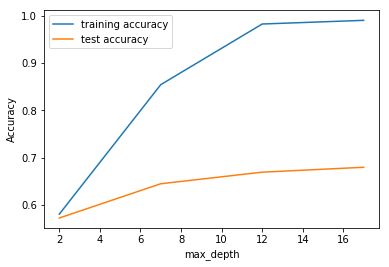

In [339]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

In [340]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   44.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [341]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.6067538126361656 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [342]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             n_estimators=500,
                             min_samples_leaf=4, 
                             max_features=0.33,
                             random_state=123)
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.33, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [343]:
predictions_train = rfc.predict(X_train)
# predict
predictions_test = rfc.predict(X_test)

In [344]:
print(classification_report(y_test,predictions_test))
print(confusion_matrix(y_test,predictions_test))

              precision    recall  f1-score   support

           1       0.93      0.29      0.44        45
           2       0.79      0.69      0.74       272
           3       0.75      0.91      0.82       570
           4       0.78      0.71      0.74       298
           5       0.94      0.42      0.59        40

   micro avg       0.77      0.77      0.77      1225
   macro avg       0.84      0.60      0.67      1225
weighted avg       0.78      0.77      0.76      1225

[[ 13  32   0   0   0]
 [  1 188  83   0   0]
 [  0  17 516  37   0]
 [  0   0  86 211   1]
 [  0   0   0  23  17]]


In [345]:
print("Training Accuracy:",accuracy_score(y_train, predictions_train))
print("Test Accuracy:",accuracy_score(y_test, predictions_test))

Training Accuracy: 0.974400871459695
Test Accuracy: 0.7714285714285715


In [346]:
y_test_df = pd.DataFrame(y_test)
y_test_df

predictions_df = pd.DataFrame(predictions_test)
predictions_df.columns=['PredictedRating']
# reset indexes to merge datasets correctly

y_test_df.reset_index(drop=True, inplace=True)
predictions_df.reset_index(drop=True, inplace=True)

df_LR_plot = pd.concat([y_test_df, predictions_df], axis=1)
df_LR_plot['IsCorrect'] =  np.where(df_LR_plot['Hospital overall rating']==df_LR_plot['PredictedRating'],1,0)

df1 = pd.DataFrame(columns=['Actual','Predicted','Accuracy'])
df1['Actual']=df_LR_plot.groupby(['Hospital overall rating'])['Hospital overall rating'].count()
df1['Predicted']=df_LR_plot.groupby(['PredictedRating'])['PredictedRating'].count()
df1['Accuracy']=df_LR_plot.groupby(['Hospital overall rating'])['IsCorrect'].sum()
df1['Accuracy %'] = round(((df1['Accuracy']/df1['Actual'])*100),0)
df1.reset_index(inplace=True)
df1.head(5)

Hospital overall rating
2566                        4
2207                        2
1276                        3
45                          3
1630                        3
1416                        2
1280                        2
2526                        2
2943                        3
2667                        4
410                         3
1289                        3
2560                        3
2093                        5
922                         3
819                         4
2774                        4
2527                        3
2868                        3
534                         3
1762                        1
2206                        3
1956                        2
2106                        3
2839                        4
1790                        3
2558                        4
2820                        4
60                          3
631                         1
1703                        2
1291                        3
74                          3
457                         3
505                         4
959                         2
1529                        4
2223                        3
247                         2
1682                        4
256                         3
2266                        4
1891                        2
2592                        4
1424                        4
730                         4
2007                        3
2340                        4
1266                        3
1697                        3
246                         3
2024                        3
2525                        2
2643                        3
59                          3
773                         2
2844                        3
463                         3
928                         3
2719                        2
1295                        4
1675                        2
2684                        2
484                         4
1707                        2
887                         4
18                          3
312                         2
2050                        4
683                         2
1997                        2
1415                        2
1810                        3
403                         4
1635                        3
1665                        4
1460                        3
1489                        4
888                         3
1430                        3
258                         5
520                         3
501                         4
2469                        3
48                          2
2917                        3
704                         2
1317                        3
1654                        4
2442                        3
442                         2
481                         3
1107                        4
1979                        1
1915                        4
2916                        4
602                         5
843                         3
1836                        2
2925                        3
1046                        3
257                         3
1222                        4
1042                        2
2573                        3
2443                        5
147                         3
651                         3
329                         2
1321                        3
1696                        2
3043                        3
2067                        4
2343                        3
2311                        2
2580                        4
215                         2
2395                        3
1624                        5
1001                        3
2541                        2
1267                        3
304                         2
235                         2
1146                        3
379                         2
2373                        4
660                         3
2306                        4
2167                        5
56                          3
1550                        1
2500            

Hospital overall rating  Actual  Predicted  Accuracy  Accuracy %
0                        1      45         14        13        29.0
1                        2     272        237       188        69.0
2                        3     570        685       516        91.0
3                        4     298        271       211        71.0
4                        5      40         18        17        42.0

Text(0.5, 1.0, 'Test Model Classification Accuracy - Random Forrest')

Text(0, 0.5, 'Accuracy %')

Text(0.5, 0, 'Hospital Rating')

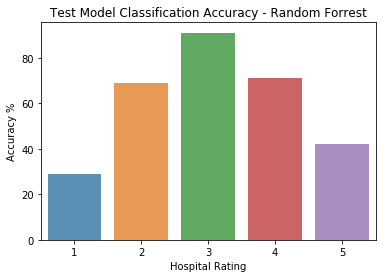

In [347]:
sns.barplot(df1['Hospital overall rating'], df1['Accuracy %'], alpha=0.8)
plt.title('Test Model Classification Accuracy - Random Forrest')
plt.ylabel('Accuracy %', fontsize=10)
plt.xlabel('Hospital Rating', fontsize=10)
plt.show()

## Model Building - Part II - Un-Supervised Learning

In [348]:
# Load the Hospital Refined dataset
try:
    Hinfo_df = Combine_df2.copy()
    print("Hospital Refined dataset has {} samples with {} features each.".format(*Hinfo_df.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Hospital Refined dataset has 3061 samples with 69 features each.


In [349]:

dropcols =['Hospital overall rating',
          'Hospital overall rating',
          'Score_EDV_num']
raw_df = Hinfo_df.drop(dropcols, axis = 1) 
raw_df.head(2)

Score_MORT_30_AMI  Score_MORT_30_COPD  Score_MORT_30_HF  Score_MORT_30_PN  \
0               12.5                 9.3              12.4              15.5   
1               16.0                 7.6              15.5              20.8   

   Score_MORT_30_STK  Score_READM_30_AMI  Score_READM_30_COPD  \
0               15.4                16.5                 21.1   
1               15.5                16.7                 18.0   

   Score_READM_30_HF  Score_READM_30_HIP_KNEE  Score_READM_30_HOSP_WIDE  \
0               21.4                      5.1                      15.4   
1               21.9                      5.7                      14.9   

   Score_READM_30_PN  Score_READM_30_STK  Score_HAI_1_SIR  Score_HAI_1a_SIR  \
0               18.7                12.7            1.740             2.433   
1               16.4                13.4            1.062             0.648   

   Score_HAI_2_SIR  Score_HAI_2a_SIR  Score_HAI_3_SIR  Score_HAI_5_SIR  \
0            1.427             2.307            1.870            0.422   
1            0.456             0.698            0.386            1.388   

   Score_HAI_6_SIR  Score_COMP_HIP_KNEE  Score_PSI_12_POSTOP_PULMEMB_DVT  \
0            0.787                  3.8                             3.32   
1            0.405                  3.0                             5.63   

   Score_PSI_13_POST_SEPSIS  Score_PSI_14_POSTOP_DEHIS  Score_PSI_15_ACC_LAC  \
0                      5.72                       2.72                  1.35   
1                      9.18                       2.11                  1.25   

   Score_PSI_3_ULCER  Score_PSI_4_SURG_COMP  Score_PSI_6_IAT_PTX  \
0               0.07                 168.26                 0.36   
1               0.14                 179.05                 0.47   

   Score_PSI_7_CVCBI  Score_PSI_8_POST_HIP  Score_PSI_90_SAFETY  Score_OP_10  \
0               0.12                  0.06                 0.68          6.4   
1               0.11                  0.06                 0.85         13.3   

   Score_OP_11  Score_OP_13  Score_OP_14  Score_OP_9  \
0          0.9          7.1          2.4         6.9   
1         10.2          5.3          4.0         5.1   

   Patient Survey Star Rating_H_CLEAN_STAR_RATING  \
0                                             2.0   
1                                             2.0   

   Patient Survey Star Rating_H_COMP_1_STAR_RATING  \
0                                              3.0   
1                                              3.0   

   Patient Survey Star Rating_H_COMP_2_STAR_RATING  \
0                                              3.0   
1                                              4.0   

   Patient Survey Star Rating_H_COMP_3_STAR_RATING  \
0                                              2.0   
1                                              3.0   

   Patient Survey Star Rating_H_COMP_4_STAR_RATING  \
0                                              3.0   
1                                              3.0   

   Patient Survey Star Rating_H_COMP_5_STAR_RATING  \
0                                              3.0   
1                                              3.0   

   Patient Survey Star Rating_H_COMP_6_STAR_RATING  \
0                                              3.0   
1                                              4.0   

   Patient Survey Star Rating_H_COMP_7_STAR_RATING  \
0                                              3.0   
1                                              2.0   

   Patient Survey Star Rating_H_HSP_RATING_STAR_RATING  \
0                                                4.0     
1                                                4.0     

   Patient Survey Star Rating_H_QUIET_STAR_RATING  \
0                                             4.0   
1                                             4.0   

   Patient Survey Star Rating_H_RECMND_STAR_RATING  \
0                                              4.0   
1                                              3.0

# PCA
## Dimensionality Reduction

In [350]:
# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# PCA from Scikit-Learn  
from sklearn.decomposition import PCA

In [351]:
# Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit and transform item_data
raw_df_scaled = scaler.fit_transform(raw_df)

In [352]:
pca_list = []

for n_components in range(2, 40):
    pca = PCA(n_components = n_components)
    components = pca.fit_transform(raw_df_scaled)
    pca_variance = sum(pca.explained_variance_ratio_)
    pca_list.append(pca_variance)
    print("For n_components = {}, explained variance ratio is {}".format(n_components, pca_variance))

For n_components = 2, explained variance ratio is 0.19549518203481223
For n_components = 3, explained variance ratio is 0.24423055352751327
For n_components = 4, explained variance ratio is 0.2894154989425416
For n_components = 5, explained variance ratio is 0.3246372292668898
For n_components = 6, explained variance ratio is 0.35638007343364175
For n_components = 7, explained variance ratio is 0.38608682227828073
For n_components = 8, explained variance ratio is 0.40916091807904853
For n_components = 9, explained variance ratio is 0.4304625475575564
For n_components = 10, explained variance ratio is 0.4522418745152535
For n_components = 11, explained variance ratio is 0.4708953570912245
For n_components = 12, explained variance ratio is 0.4887690303956164
For n_components = 13, explained variance ratio is 0.505759623273232
For n_components = 14, explained variance ratio is 0.5226731498881984
For n_components = 15, explained variance ratio is 0.5380143683991497
For n_components = 16, e

In [353]:
# Initialize and fit a PCA transformation

pca = PCA()
pca.fit(raw_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [354]:
# Generate new features

PC_items = pca.transform(raw_df_scaled)

# Display first 2 rows
PC_items[:2]

array([[ 1.23854405, -0.60679389,  3.18788326,  1.3021188 ,  0.53576719,
         3.86075276,  4.61695528, -1.29896041,  1.05473282, -2.66214373,
        -0.23673421,  1.47141759, -2.19980917,  0.52880084, -1.49805155,
        -0.78589943,  0.59666968,  0.60850154,  0.63310785,  0.44588242,
         1.65495641, -1.03042064,  0.73824327,  1.02884673,  0.27848991,
        -0.65096479, -0.10886455, -0.48121545, -0.64393845, -1.19790353,
        -0.80481765,  2.02454074, -1.38588063,  0.10549279, -0.98578101,
         0.47268637,  0.88722654,  0.17470911, -0.65227967, -0.44521739,
        -0.33674043,  0.23127792,  0.1612231 , -0.68639832, -0.75588485,
        -1.41270219, -0.19937914, -0.15442137, -1.53733888,  0.08315886,
        -0.08412439,  0.94235959, -0.41217174,  0.08957836,  0.33926223,
        -0.32661731, -1.17160066,  0.52955694,  0.06175778, -0.69229346,
         0.79447268, -0.1915047 ,  0.13696662,  0.191325  , -0.10166906,
         0.08658257,  0.01884797],
       [-0.69428

In [355]:
pca.explained_variance_ratio_

array([1.42355099e-01, 5.31400982e-02, 4.87353646e-02, 4.51849724e-02,
       3.52218824e-02, 3.17440647e-02, 2.97981721e-02, 2.32406987e-02,
       2.19503931e-02, 2.15567152e-02, 1.88531888e-02, 1.83258227e-02,
       1.70648817e-02, 1.68480109e-02, 1.60866211e-02, 1.58080804e-02,
       1.54318284e-02, 1.50155382e-02, 1.49197015e-02, 1.46781195e-02,
       1.44498998e-02, 1.43595055e-02, 1.39333758e-02, 1.36440293e-02,
       1.32150617e-02, 1.28402110e-02, 1.26221332e-02, 1.24609953e-02,
       1.23824498e-02, 1.19711686e-02, 1.18156883e-02, 1.13311370e-02,
       1.10435090e-02, 1.08120763e-02, 1.04661168e-02, 1.00388964e-02,
       9.88938619e-03, 9.86930450e-03, 9.66146337e-03, 9.04474842e-03,
       8.85914277e-03, 8.71457792e-03, 8.62924806e-03, 8.25604325e-03,
       8.13276948e-03, 7.95856305e-03, 7.76883993e-03, 7.53062989e-03,
       7.11141137e-03, 6.95625711e-03, 6.46081330e-03, 6.25186968e-03,
       5.93870063e-03, 5.54290071e-03, 5.39216964e-03, 5.01232924e-03,
      

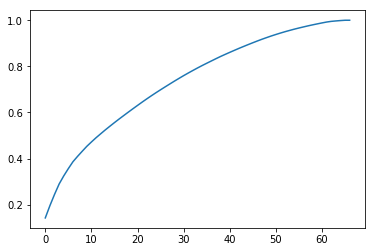

In [356]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance);

In [357]:
# How much variance we'd capture with the first 36 components
cumulative_explained_variance[35]

0.8133455070659478

In [358]:
# Initialize PCA transformation, only keeping 36 components (81% of Data)

pca = PCA(n_components = 35)

# Fit and transform item_data_scaled
pca.fit(raw_df_scaled)

PC_items = pca.transform(raw_df_scaled)

# Display shape of PC_items
PC_items[:5]

PCA(copy=True, iterated_power='auto', n_components=35, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([[ 1.23854426, -0.60681175,  3.18791636,  1.30197479,  0.53555022,
         3.86106968,  4.61656477, -1.3025536 ,  1.04302407, -2.66283435,
        -0.24574857,  1.48240859, -2.17001814,  0.52917594, -1.49813358,
        -0.82166518,  0.66421636, -0.63547967,  0.63662336,  0.38941614,
         1.66928649, -0.89646182,  0.67655757,  1.03891185,  0.26933085,
        -0.62950234,  0.05117047, -0.64607385, -0.32328206, -1.24623042,
        -0.51316749,  1.76688061, -1.75475283, -0.51095441, -1.23593792],
       [-0.69428112,  1.40220093, -1.47987337,  0.78963949,  2.67235436,
         2.04081745,  0.24524164, -2.29073051,  1.54069724, -0.88658913,
         0.57273509,  0.35056329,  1.11494467,  0.53518627, -1.80315372,
        -0.48825311,  0.2632008 ,  0.82846594, -0.32871144, -0.19629113,
         0.61819878,  0.79433182, -0.79749149,  1.09838329, -1.20645632,
        -0.57295974, -0.33165558, -0.09765947,  0.13580194, -0.04410121,
        -1.261171  , -1.18525066,  0.01942686, -0.

In [359]:
print(type(PC_items))
print(PC_items.shape)
PC_items.shape[1]

<class 'numpy.ndarray'>
(3061, 35)


35

In [360]:
# Put PC_items into a dataframe

items_pca = pd.DataFrame(PC_items)

# Name the columns
items_pca.columns = [ 'PC{}' .format(i+1) for i in range(PC_items.shape[1])]

# Update its index
items_pca.index = raw_df.index

# Display first 5 rows
items_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.238544 -0.606812  3.187916  1.301975  0.535550  3.861070  4.616565   
1 -0.694281  1.402201 -1.479873  0.789639  2.672354  2.040817  0.245242   
2  0.657509  2.064892 -2.466126  1.526724  3.471860  1.149398  0.058603   
3 -1.655194  4.980341  0.332472 -0.718847  0.717159  1.980405 -1.043341   
4 -0.891350  1.225666 -1.177457 -0.276949  0.052396 -0.800860  0.999479   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -1.302554  1.043024 -2.662834 -0.245749  1.482409 -2.170018  0.529176   
1 -2.290731  1.540697 -0.886589  0.572735  0.350563  1.114945  0.535186   
2 -0.759313  0.769084 -1.169596 -0.848760  0.106053  1.011224  1.061479   
3 -0.710314 -1.854677  1.202635 -3.023877  1.039788 -0.249492  1.440269   
4  0.076929  1.475285  0.724167  1.258115  0.076182 -0.022617  1.253110   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -1.498134 -0.821665  0.664216 -0.635480  0.636623  0.389416  1.669286   
1 -1.803154 -0.488253  0.263201  0.828466 -0.328711 -0.196291  0.618199   
2  0.177625  2.020311 -0.230757  0.593941  0.073490 -2.066643  0.469236   
3 -1.265064 -1.690868 -2.292170  0.108195 -1.153720  0.089429  0.062602   
4 -0.725640  0.214460  0.641279 -0.652723  0.030139 -0.747288 -1.246844   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0 -0.896462  0.676558  1.038912  0.269331 -0.629502  0.051170 -0.646074   
1  0.794332 -0.797491  1.098383 -1.206456 -0.572960 -0.331656 -0.097659   
2  2.232185 -1.659568  0.387874 -1.221305 -1.072762 -0.496523 -0.152359   
3  0.383846  0.592884  0.573706  0.382961  1.140404  0.316941 -0.153250   
4 -0.881144  0.140548 -0.279531  0.422517 -0.551922  1.167646  0.730025   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  
0 -0.323282 -1.246230 -0.513167  1.766881 -1.754753 -0.510954 -1.235938  
1  0.135802 -0.044101 -1.261171 -1.185251  0.019427 -0.176128 -0.168988  
2  0.351525 -2.390493 -1.210600 -0.163316 -0.631832  0.649033  1.092025  
3 -2.112242 -0.652248  1.006189  1.912615 -0.052424 -1.685208 -0.270668  
4 -0.801118 -0.180391  1.647595 -0.658951 -0.838733 -0.956585 -0.252425

##  Pros and Cons of PCA :-

## Pros :-
- Dimensionality Reduction can help learning
- Remove Noise
- Can deal with large datasets

## Cons :-
- hard to interpret
- sample dependent
- linear

# K-Means clustering

- The k-means clustering algorithm is known to be efficient in clustering large data sets. 
- This algorithm is one of the simplest and best known unsupervised learning algorithm. 
- The k-means algorithm aims to partition a set of objects, based on their attributes/features, into k clusters, where k is a predefined constant. 
- The algorithm defines k centroids, one for each cluster. The centroid of a cluster is formed in such a way that it is closely related, in terms of similarity (where similarity can be measured by using different methods such as Euclidean distance or Extended Jacquard) to all objects in that cluster.
- Technically, what k-means is interested in, is the variance. It minimizes the overall variance, by assigning each object to the cluster such that the variance is minimized. 

In [361]:
# Scikit-Learn's make_pipeline function
from sklearn.pipeline import make_pipeline

# Scikit-Learn's StandardScaler
from sklearn.preprocessing import StandardScaler

# Scikit-Learn's KMeans algorithm (added later)

from sklearn.cluster import KMeans

In [362]:
#
raw_df_y = Hinfo_df['Hospital overall rating']

In [363]:
dropcols =['Hospital overall rating',
          'Hospital overall rating',
          'Score_EDV_num']
raw_df_X = Hinfo_df.drop(dropcols, axis = 1) 

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale #Center to the mean and component wise scale to unit variance.
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering 
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc 

In [365]:
X_scaled = scale(raw_df_X)
pca = PCA(n_components=35)
X_reduced = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, raw_df_y, test_size = 0.33, random_state=0)


In [366]:
pca.explained_variance_ratio_

array([0.1423551 , 0.0531401 , 0.04873536, 0.04518497, 0.03522174,
       0.03174391, 0.02979811, 0.02324007, 0.02194938, 0.02155469,
       0.0188515 , 0.01832477, 0.01703972, 0.01684402, 0.01607707,
       0.01579916, 0.01542487, 0.01500393, 0.01490177, 0.01465721,
       0.01443843, 0.01434561, 0.01391373, 0.01360484, 0.01315495,
       0.01277804, 0.012568  , 0.01243456, 0.01230018, 0.01192345,
       0.01179736, 0.01130373, 0.01088239, 0.01060904, 0.0102701 ])

## Elbow method
- The basic idea behind partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation [or total within-cluster sum of square (WSS)] is minimized. 
- The total WSS measures the compactness of the clustering and we want it to be as small as possible.
- The Elbow method looks at the total WSS as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS.

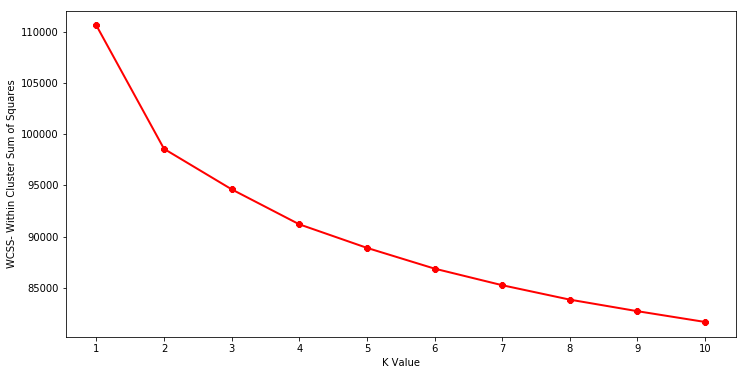

In [367]:
wcss = []  # Within Cluster Sum of Squares
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    ;
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8");
plt.xlabel("K Value");
plt.xticks(np.arange(1,11,1));
plt.ylabel("WCSS- Within Cluster Sum of Squares");
plt.show();

In [368]:
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 12):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_train)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.12400764122584133
For n_clusters=3, The Silhouette Coefficient is 0.0519785716511354
For n_clusters=4, The Silhouette Coefficient is 0.04871146484902645
For n_clusters=5, The Silhouette Coefficient is 0.045331513617315064
For n_clusters=6, The Silhouette Coefficient is 0.04054112555216931
For n_clusters=7, The Silhouette Coefficient is 0.036374101167229375
For n_clusters=8, The Silhouette Coefficient is 0.04107967108121996
For n_clusters=9, The Silhouette Coefficient is 0.039270015137744856
For n_clusters=10, The Silhouette Coefficient is 0.041763552140695076
For n_clusters=11, The Silhouette Coefficient is 0.03423980492491419


## Average silhouette method
- The average silhouette approach we’ll be described comprehensively in the chapter cluster validation statistics. Briefly, it measures the quality of a clustering.
- That is, it determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering.
- Average silhouette method computes the average silhouette of observations for different values of k.
- The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k 

In [369]:
from sklearn.cluster import KMeans

for n_components in range(2, 12):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_components)
    #clusterer = GMM(n_components=n_components)
    clusterer.fit(X_train)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(X_train)

    #print dir(clusterer)
    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_ # for kmeans
    #centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    #sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    from sklearn import metrics
    score = metrics.silhouette_score(X_train, preds)
    print('ncomponents',n_components,'- silhouette score',score)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

ncomponents 2 - silhouette score 0.12400764122584133


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

ncomponents 3 - silhouette score 0.05193760319283998


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

ncomponents 4 - silhouette score 0.047963725892242716


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

ncomponents 5 - silhouette score 0.04443978482198575


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

ncomponents 6 - silhouette score 0.04195134406821958


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

ncomponents 7 - silhouette score 0.03586374222377894


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

ncomponents 8 - silhouette score 0.0406946304553919


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

ncomponents 9 - silhouette score 0.04714576702659786


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

ncomponents 10 - silhouette score 0.03102266532961266


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

ncomponents 11 - silhouette score 0.03139044083352543


In [370]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [371]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)

predictions = kmeans.predict(X_test)

pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))

pred_good = np.where(predictions == 0)[0]
real_good = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))

false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)
print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(predictions))
print("False negatives, false positives, mispredictions:", false_neg, false_pos, false_neg + false_pos)
print("Total test data points:", len(X_test))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Accuracy: 0.7309594460929772
False negative rate (with respect to misclassifications):  0.7683823529411765
False negative rate (with respect to all the data):  0.20672601384767555
False negatives, false positives, mispredictions: 209 63 272
Total test data points: 1011


- Accuracy is more than 70 from K mean clustering model 

##  Pros and cons of clustering(K-Means):

## PROS :-
- Simple ,Understandable
- items automatically assigned to clusters

## CONS :-
- Must pick a no of clusters beforehand
- All items forced into a cluster
- to sensitive to noise,outlier points
- Different intial clusters result into different final clusters

# Hierarchical clustering  

In [372]:
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

#### method='single

Z-Shape: (3060, 4)


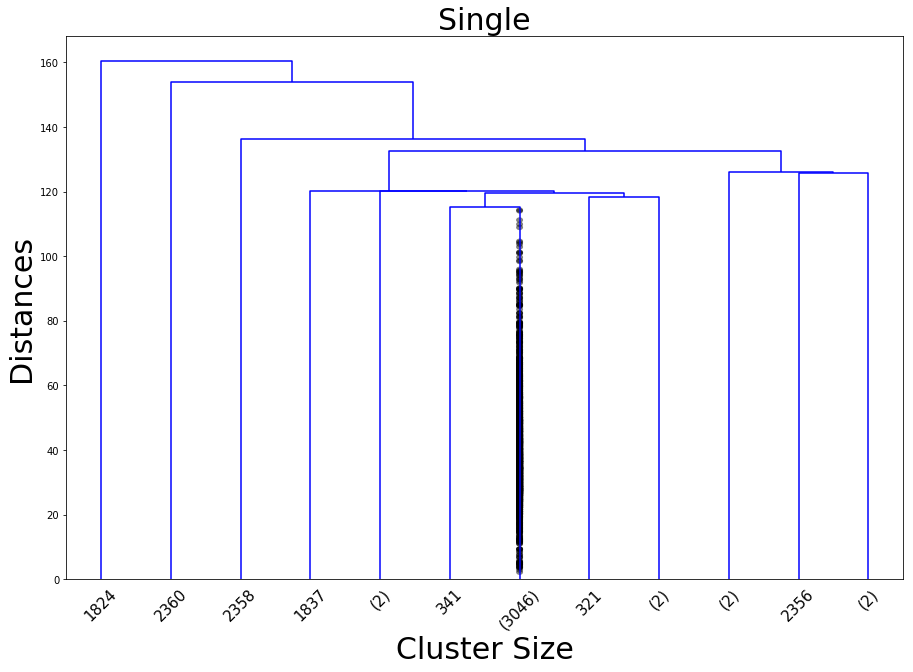

In [373]:
plt.figure(figsize=(15,10))

Z=linkage(Hinfo_df.drop('Hospital overall rating', axis = 1) ,method='single')
print("Z-Shape:",Z.shape)
plt.title("Single",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,);
plt.xlabel("Cluster Size",fontsize=30);
plt.ylabel("Distances",fontsize=30);
plt.show();

#### method='complete'

Z-Shape: (3060, 4)


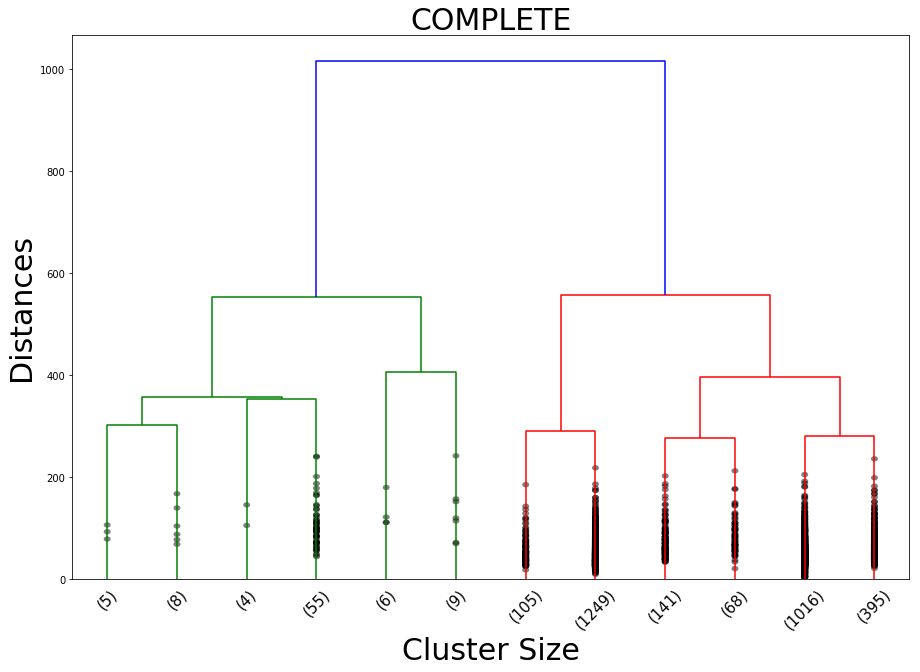

In [374]:
plt.figure(figsize=(15,10))
Z=linkage(Hinfo_df.drop('Hospital overall rating', axis = 1),method='complete')
print("Z-Shape:",Z.shape)
plt.title("COMPLETE",size=30);
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,);
plt.xlabel("Cluster Size",fontsize=30);
plt.ylabel("Distances",fontsize=30);
plt.show();

#### method='average'

Z-Shape: (3060, 4)


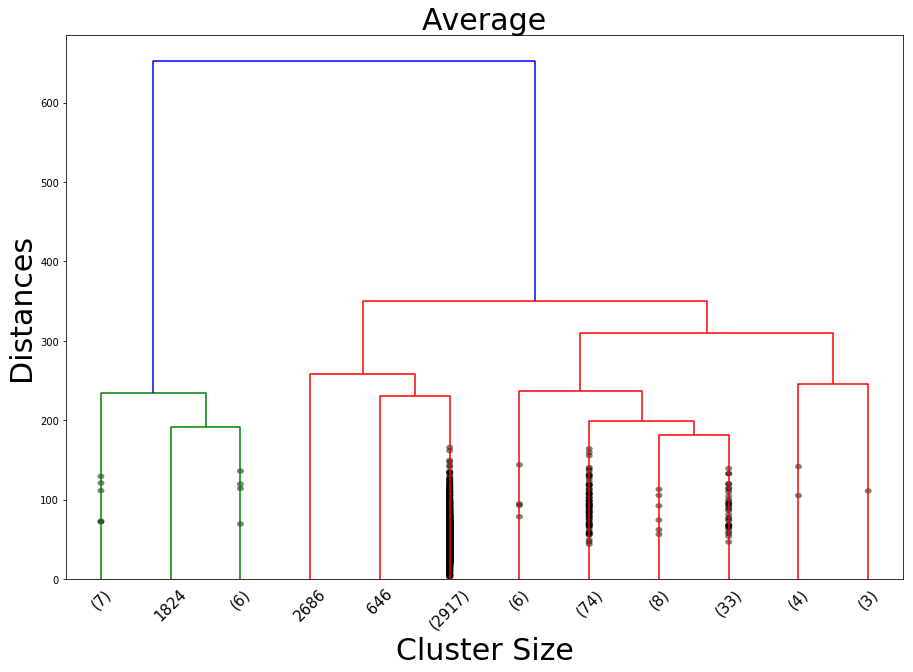

In [375]:
plt.figure(figsize=(15,10))
Z=linkage(Hinfo_df.drop('Hospital overall rating', axis = 1),method='average')
print("Z-Shape:",Z.shape)
plt.title("Average",loc='center',size=30);
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,);
plt.xlabel("Cluster Size",fontsize=30);
plt.ylabel("Distances",fontsize=30);
plt.show();

#### method='weighted'

Z-Shape: (3060, 4)


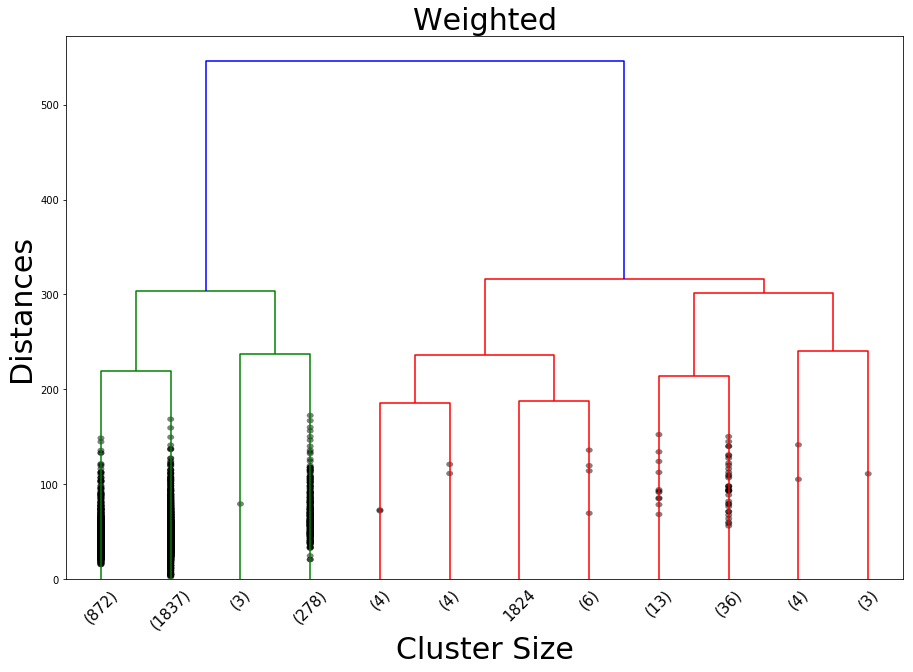

In [376]:
plt.figure(figsize=(15,10))
Z=linkage(Hinfo_df.drop('Hospital overall rating', axis = 1),method='weighted')
print("Z-Shape:",Z.shape);
plt.title("Weighted",loc='center',size=30);
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,);
plt.xlabel("Cluster Size",fontsize=30);
plt.ylabel("Distances",fontsize=30);
plt.show();

#### method='centroid'

Z-Shape: (3060, 4)


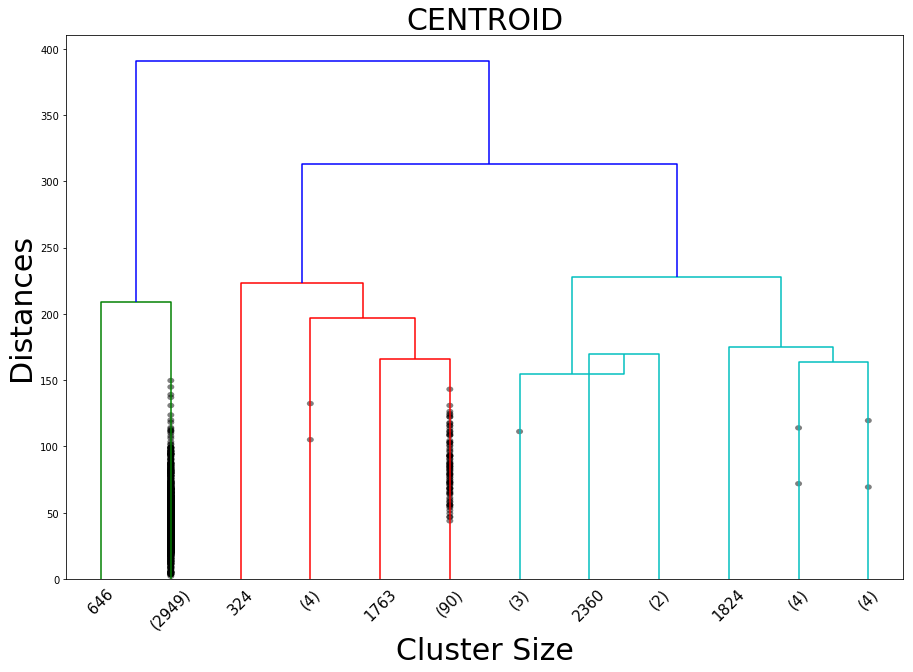

In [377]:
plt.figure(figsize=(15,10))
Z=linkage(Hinfo_df.drop('Hospital overall rating', axis = 1),method='centroid')
print("Z-Shape:",Z.shape)
plt.title("CENTROID",loc='center',size=30);
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,);
plt.xlabel("Cluster Size",fontsize=30);
plt.ylabel("Distances",fontsize=30);
plt.show();

#### method='ward' uses the Ward variance minimization algorithm.

Z-Shape: (3060, 4)


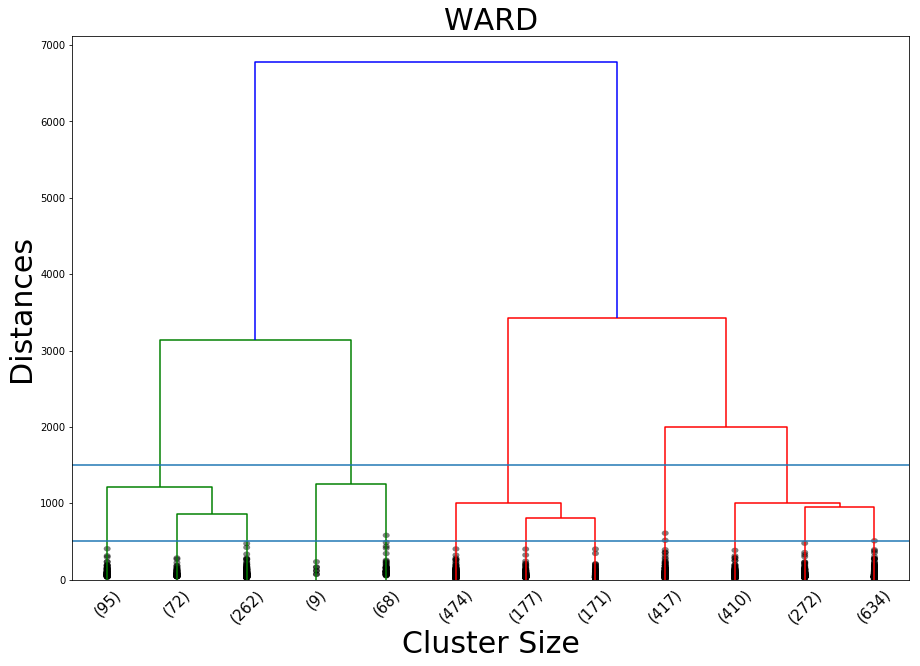

In [378]:
plt.figure(figsize=(15,10))
Z=linkage(Hinfo_df.drop('Hospital overall rating', axis = 1),method='ward')
print("Z-Shape:",Z.shape)
plt.title("WARD",size=30);
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,);
plt.xlabel("Cluster Size",fontsize=30);
plt.ylabel("Distances",fontsize=30);
plt.axhline(y=500);
plt.axhline(y=1500);
plt.show();

## Pros and cons of Hierarchical  clustering :-
## PROS:-
- Dendogram are good for visualization
- Provides Hierarchical relations between clusters
- Does not require pre-defined no of clusters
- Accept any valid measure of distance
- Generates Smaller clusters which maybe helpful for discovery
## CONS:-
- Not easy to define level of clusters
-  Different Dendogram for different linkage methods

## K MEANS Clusing Using Factor Analysis(By Calcuating Group Score and Final Score)

In [379]:
### Print Combine Df
Combine_df2.head()

Hospital overall rating  Score_MORT_30_AMI  Score_MORT_30_COPD  \
0                        3          12.500000                 9.3   
1                        3          16.000000                 7.6   
2                        2          16.700000                 7.1   
3                        3          14.054091                 9.3   
4                        3          14.054091                 8.2   

   Score_MORT_30_HF  Score_MORT_30_PN  Score_MORT_30_STK  Score_READM_30_AMI  \
0              12.4              15.5           15.40000           16.500000   
1              15.5              20.8           15.50000           16.700000   
2              15.6              18.2           17.90000           16.100000   
3              14.4              18.8           16.60000           16.893574   
4              12.7              15.7           14.88976           16.893574   

   Score_READM_30_COPD  Score_READM_30_HF  Score_READM_30_HIP_KNEE  \
0                 21.1               21.4                 5.100000   
1                 18.0               21.9                 5.700000   
2                 19.8               20.6                 5.000000   
3                 19.9               21.1                 4.615622   
4                 19.2               23.1                 4.615622   

   Score_READM_30_HOSP_WIDE  Score_READM_30_PN  Score_READM_30_STK  \
0                      15.4               18.7           12.700000   
1                      14.9               16.4           13.400000   
2                      15.4               17.9           12.000000   
3                      16.6               17.3           12.700000   
4                      15.7               16.0           12.585075   

   Score_HAI_1_SIR  Score_HAI_1a_SIR  Score_HAI_2_SIR  Score_HAI_2a_SIR  \
0         1.740000          2.433000         1.427000          2.307000   
1         1.062000          0.648000         0.456000          0.698000   
2         0.341000          0.443000         0.641000          0.801000   
3         0.539892          0.528434         0.000000          0.581128   
4         0.539892          0.528434         0.482797          0.581128   

   Score_HAI_3_SIR  Score_HAI_5_SIR  Score_HAI_6_SIR  Score_COMP_HIP_KNEE  \
0          1.87000          0.42200            0.787             3.800000   
1          0.38600          1.38800            0.405             3.000000   
2          0.31000          1.26100            0.513             3.800000   
3          0.96446          0.98666            0.000             3.042904   
4          0.96446          0.98666            0.585             3.042904   

   Score_PSI_12_POSTOP_PULMEMB_DVT  Score_PSI_13_POST_SEPSIS  \
0                         3.320000                  5.720000   
1                         5.630000                  9.180000   
2                         3.850000                 10.254041   
3                         4.570000                  9.890000   
4                         5.045179                 10.254041   

   Score_PSI_14_POSTOP_DEHIS  Score_PSI_15_ACC_LAC  Score_PSI_3_ULCER  \
0                   2.720000                  1.35               0.07   
1                   2.110000                  1.25               0.14   
2                   2.500000                  1.93               0.09   
3                   2.318955                  1.20               0.35   
4                   2.318955                  1.41               0.45   

   Score_PSI_4_SURG_COMP  Score_PSI_6_IAT_PTX  Score_PSI_7_CVCBI  \
0             168.260000                 0.36               0.12   
1             179.050000                 0.47               0.11   
2             197.407800                 0.41               0.24   
3             136.771392                 0.40               0.16   
4             136.771392                 0.41               0.17   

   Score_PSI_8_POST_HIP  Score_PSI_90_SAFETY  Score_OP_10  Score_OP_11  \
0                  0.06                 0.68

In [380]:
## Create a new Data frame which is copy of Original Data frame 
df_unsupervised=Combine_df2.copy()

In [381]:
##Check the Columns
df_unsupervised.columns

Index(['Hospital overall rating', 'Score_MORT_30_AMI', 'Score_MORT_30_COPD',
       'Score_MORT_30_HF', 'Score_MORT_30_PN', 'Score_MORT_30_STK',
       'Score_READM_30_AMI', 'Score_READM_30_COPD', 'Score_READM_30_HF',
       'Score_READM_30_HIP_KNEE', 'Score_READM_30_HOSP_WIDE',
       'Score_READM_30_PN', 'Score_READM_30_STK', 'Score_HAI_1_SIR',
       'Score_HAI_1a_SIR', 'Score_HAI_2_SIR', 'Score_HAI_2a_SIR',
       'Score_HAI_3_SIR', 'Score_HAI_5_SIR', 'Score_HAI_6_SIR',
       'Score_COMP_HIP_KNEE', 'Score_PSI_12_POSTOP_PULMEMB_DVT',
       'Score_PSI_13_POST_SEPSIS', 'Score_PSI_14_POSTOP_DEHIS',
       'Score_PSI_15_ACC_LAC', 'Score_PSI_3_ULCER', 'Score_PSI_4_SURG_COMP',
       'Score_PSI_6_IAT_PTX', 'Score_PSI_7_CVCBI', 'Score_PSI_8_POST_HIP',
       'Score_PSI_90_SAFETY', 'Score_OP_10', 'Score_OP_11', 'Score_OP_13',
       'Score_OP_14', 'Score_OP_9',
       'Patient Survey Star Rating_H_CLEAN_STAR_RATING',
       'Patient Survey Star Rating_H_COMP_1_STAR_RATING',
       'Patien

In [382]:
### Lets drop Hospital Overall rating from df_unsupervised as we dont need this column for Modeling 
df_unsupervised.drop(['Hospital overall rating'],axis=1,inplace=True)

In [383]:
## Standardize the data before Factor Analysis 

#Import the StandardScaler()
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = MinMaxScaler()
#scaler = StandardScaler()
col=df_unsupervised.columns
# Create a list of the variables that we need to scale

# Scale these variables using 'fit_transform'
df_unsupervised[col]= scaler.fit_transform(df_unsupervised[col])

In [384]:
## Check unspervised data frame after Scale Transform the data
df_unsupervised.head()

Score_MORT_30_AMI  Score_MORT_30_COPD  Score_MORT_30_HF  Score_MORT_30_PN  \
0           0.256849            0.541046          0.538462          0.347648   
1           0.684932            0.310756          0.879121          0.708930   
2           0.770548            0.243024          0.890110          0.531697   
3           0.446929            0.541046          0.758242          0.572597   
4           0.446929            0.392035          0.571429          0.361282   

   Score_MORT_30_STK  Score_READM_30_AMI  Score_READM_30_COPD  \
0           0.486814            0.411016             0.495903   
1           0.495107            0.442853             0.161708   
2           0.694145            0.347342             0.355757   
3           0.586333            0.473667             0.366537   
4           0.444498            0.473667             0.291074   

   Score_READM_30_HF  Score_READM_30_HIP_KNEE  Score_READM_30_HOSP_WIDE  \
0           0.434607                 0.564300                  0.470536   
1           0.485143                 0.718621                  0.396877   
2           0.353750                 0.538580                  0.470536   
3           0.404285                 0.439718                  0.647319   
4           0.606428                 0.439718                  0.514732   

   Score_READM_30_PN  Score_READM_30_STK  Score_HAI_1_SIR  Score_HAI_1a_SIR  \
0           0.545852            0.393487         0.400374          0.473131   
1           0.317586            0.488467         0.244366          0.126013   
2           0.466455            0.298507         0.078464          0.086148   
3           0.406908            0.393487         0.124229          0.102761   
4           0.277888            0.377894         0.124229          0.102761   

   Score_HAI_2_SIR  Score_HAI_2a_SIR  Score_HAI_3_SIR  Score_HAI_5_SIR  \
0         0.496127          0.717199         0.421145         0.079972   
1         0.158538          0.216994         0.086931         0.263035   
2         0.222857          0.249015         0.069815         0.238968   
3         0.000000          0.180661         0.217207         0.186979   
4         0.167855          0.180661         0.217207         0.186979   

   Score_HAI_6_SIR  Score_COMP_HIP_KNEE  Score_PSI_12_POSTOP_PULMEMB_DVT  \
0         0.218629             0.565173                         0.118126   
1         0.112509             0.359093                         0.273537   
2         0.142512             0.565173                         0.153783   
3         0.000000             0.370145                         0.202223   
4         0.162514             0.370145                         0.234192   

   Score_PSI_13_POST_SEPSIS  Score_PSI_14_POSTOP_DEHIS  Score_PSI_15_ACC_LAC  \
0                  0.052682                   0.439254              0.286018   
1                  0.261385                   0.233047              0.257330   
2                  0.326170                   0.364884              0.452407   
3                  0.304211                   0.303683              0.242986   
4                  0.326170                   0.303683              0.303230   

   Score_PSI_3_ULCER  Score_PSI_4_SURG_COMP  Score_PSI_6_IAT_PTX  \
0           0.005295               0.740731             0.250708   
1           0.017650               0.836708             0.423718   
2           0.008825               1.000000             0.329349   
3           0.054714               0.460640             0.313621   
4           0.072364               0.460640             0.329349   

   Score_PSI_7_CVCBI  Score_PSI_8_POST_HIP  Score_PSI_90_SAFETY  Score_OP_10  \
0           0.111111                   0.0             0.127592     0.099237   
1           0.095238                   0.0             0.236371     0.206227   
2           0.301587                   0.0             0.274763     0.182968   
3           0.174603                   0.0             0.197978     0.376791   
4           0

In [385]:
##import Factor Analyzer
from factor_analyzer import FactorAnalyzer


In [386]:
###Bartlett ’s test,
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_unsupervised)
chi_square_value, p_value

(87889.56333233927, 0.0)

- In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

In [387]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_unsupervised)

In [388]:
# Create factor analysis object and perform factor analysis using 7 factors

fa=FactorAnalyzer(n_factors=7,rotation=None)
fa.fit(df_unsupervised)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=7, rotation=None, rotation_kwargs={},
        use_smc=True)

In [389]:
x=pd.DataFrame(fa.loadings_)

In [390]:
df_transform=pd.DataFrame(fa.transform(df_unsupervised.values))
df_transform.shape

(3061, 7)

In [391]:
# Get variance of each factors
fa.get_factor_variance()

(array([9.29775308, 3.13961692, 2.74777769, 2.42307477, 1.8470321 ,
        1.57283925, 1.42473734]),
 array([0.13673166, 0.04617084, 0.0404085 , 0.03563345, 0.02716224,
        0.02312999, 0.02095202]),
 array([0.13673166, 0.1829025 , 0.223311  , 0.25894445, 0.28610668,
        0.30923667, 0.33018869]))

In [392]:
df_unsupervised

Score_MORT_30_AMI  Score_MORT_30_COPD  Score_MORT_30_HF  \
0              0.256849            0.541046          0.538462   
1              0.684932            0.310756          0.879121   
2              0.770548            0.243024          0.890110   
3              0.446929            0.541046          0.758242   
4              0.446929            0.392035          0.571429   
5              0.428082            0.283663          0.692308   
6              0.782779            0.527499          0.549451   
7              0.525930            0.378488          0.714286   
8              0.636008            0.459767          0.593407   
9              0.446929            0.148198          0.516484   
10             0.446929            0.324302          0.912088   
11             0.366928            0.513953          0.659341   
12             0.538160            0.568139          0.340659   
13             0.623777            0.364942          0.505495   
14             0.446929            0.392035          0.329670   
15             0.244618            0.243024          0.329670   
16             0.446929            0.229477          0.208791   
17             0.648239            0.405581          0.549451   
18             0.446929            0.256570          0.439560   
19             0.501468            0.148198          0.505495   
20             0.330235            0.405581          0.461538   
21             0.562622            0.297209          0.692308   
22             0.446929            0.175291          0.428571   
23             0.446929            0.310756          0.351648   
24             0.672701            0.337849          0.439560   
25             0.446929            0.256570          0.499302   
26             0.446929            0.852614          0.670330   
27             0.446929            0.527499          0.318681   
28             0.446929            0.297209          0.483516   
29             0.807241            0.757789          0.736264   
30             0.623777            0.392035          0.571429   
31             0.501468            0.283663          0.516484   
32             0.446929            0.364942          0.505495   
33             0.446929            0.405581          0.791209   
34             0.525930            0.229477          0.560440   
35             0.446929            0.446221          0.527473   
36             0.446929            0.405581          0.571429   
37             0.464775            0.202384          0.659341   
38             0.446929            0.541046          0.538462   
39             0.464775            0.351395          0.406593   
40             0.501468            0.188838          0.538462   
41             0.446929            0.243024          0.417582   
42             0.446929            0.310756          0.499302   
43             0.281311            0.513953          0.615385   
44             0.770548            0.215931          0.813187   
45             0.446929            0.337849          0.582418   
46             0.709393            0.500406          0.571429   
47             0.446929            0.405581          0.373626   
48             0.648239            0.392035          0.505495   
49             0.501468            0.351395          0.593407   
50             0.477006            0.324302          0.505495   
51             0.954012            0.432674          0.670330   
52             0.587084            0.811975          0.505495   
53             0.428082            0.175291          0.263736   
54             0.446929            0.324302          0.560440   
55             0.446929            0.310756          0.461538   
56             0.446929            0.324302          0.560440   
57             0.623777            0.432674          0.450549   
58             0.379159            0.175291          0.307692   
59             0.599315            0.459767          0.274725   
60             0.446929            0.3920

In [393]:
### Get the MEasure id details for Fa_loading
col=pd.DataFrame(df_unsupervised.columns)
y=pd.merge(col,x, left_index=True, right_index=True)


In [394]:
y.columns=['Measureid','Factor1','Factor2','Factor3','Factor4','Factor5','Factor6','Factor7']
y.head()

Measureid   Factor1   Factor2   Factor3   Factor4   Factor5  \
0   Score_MORT_30_AMI -0.031087 -0.171937 -0.063675 -0.112563  0.163426   
1  Score_MORT_30_COPD  0.048780 -0.062719 -0.111225 -0.328904  0.184459   
2    Score_MORT_30_HF  0.201028 -0.236005 -0.117332 -0.310427  0.231217   
3    Score_MORT_30_PN  0.014483 -0.205849 -0.079004 -0.184175  0.225747   
4   Score_MORT_30_STK  0.052432 -0.093838 -0.076450 -0.288092  0.219095   

    Factor6   Factor7  
0  0.363224 -0.076281  
1  0.387237 -0.094577  
2  0.408784 -0.122864  
3  0.502881 -0.147421  
4  0.286806 -0.060673

In [395]:
#To decide which Measure Id contributes to each group , 
# we decided on a cut off to filter to find the highest absolute values out of available factors
y[(y['Factor1']).abs() > 0.6]

Measureid   Factor1   Factor2  \
35     Patient Survey Star Rating_H_CLEAN_STAR_RATING  0.651282  0.004140   
36    Patient Survey Star Rating_H_COMP_1_STAR_RATING  0.830052  0.123150   
37    Patient Survey Star Rating_H_COMP_2_STAR_RATING  0.725570 -0.052328   
38    Patient Survey Star Rating_H_COMP_3_STAR_RATING  0.810155  0.002359   
39    Patient Survey Star Rating_H_COMP_4_STAR_RATING  0.761244  0.152213   
40    Patient Survey Star Rating_H_COMP_5_STAR_RATING  0.755119  0.078897   
41    Patient Survey Star Rating_H_COMP_6_STAR_RATING  0.666259  0.192212   
42    Patient Survey Star Rating_H_COMP_7_STAR_RATING  0.788513  0.222763   
43  Patient Survey Star Rating_H_HSP_RATING_STAR_R...  0.809866  0.239709   
45    Patient Survey Star Rating_H_RECMND_STAR_RATING  0.719095  0.362487   
46           Patient Survey Star Rating_H_STAR_RATING  0.907271  0.125759   

     Factor3   Factor4   Factor5   Factor6   Factor7  
35  0.114353  0.103439 -0.030449  0.025634 -0.011674  
36  0.214511  0.120716 -0.003717  0.062959 -0.056045  
37  0.252488  0.097802  0.046655  0.080077  0.036134  
38  0.126478  0.072277  0.028801  0.050467 -0.034730  
39  0.175026  0.082375  0.001578  0.022570 -0.021125  
40  0.158670  0.093569  0.028577  0.075594 -0.055151  
41  0.011684 -0.033406  0.064856  0.044060 -0.055140  
42  0.232724  0.046717 -0.021120  0.002053  0.000283  
43  0.204634  0.081227  0.002696  0.023531 -0.011610  
45  0.231832  0.028108 -0.035372 -0.025712  0.008382  
46  0.223885  0.087642  0.031841  0.074479 -0.047275

We see that maximum absolute values belongs to Patient Experience Measure IDs in Factor 1.

In [396]:
y[(y['Factor2']).abs() > 0.4]

Measureid   Factor1   Factor2   Factor3   Factor4   Factor5   Factor6  \
47    Score_ED_1b -0.549353  0.459214  0.348445 -0.114039 -0.171452  0.100370   
48    Score_ED_2b -0.494636  0.451636  0.233249 -0.081609 -0.145303  0.072894   
51   Score_OP_18b -0.399491  0.562721  0.357690 -0.189443 -0.187735  0.091531   
60    Score_STK_1  0.013504  0.428205 -0.338825  0.105240  0.067356  0.069209   
61    Score_STK_6  0.016867  0.466595 -0.226986  0.060953  0.039457  0.026463   
63    Score_VTE_1  0.055081  0.432886 -0.459388  0.151958  0.078147  0.179602   
67  Score_EDV_num -0.377605  0.471043 -0.024562 -0.036131 -0.017716  0.067741   

     Factor7  
47 -0.180405  
48 -0.126872  
51 -0.191316  
60  0.054078  
61  0.030344  
63  0.005563  
67 -0.073733

We see that maximum absolute values belongs to Timeliness and Effective Care Measure IDs in Factor 2.

In [397]:
y[(y['Factor3']).abs() > 0.4]

Measureid   Factor1   Factor2   Factor3   Factor4   Factor5   Factor6  \
49  Score_IMM_2  0.122712  0.242068 -0.420789  0.138746  0.039503  0.153873   
63  Score_VTE_1  0.055081  0.432886 -0.459388  0.151958  0.078147  0.179602   

     Factor7  
49 -0.008473  
63  0.005563

We see that maximum absolute values belongs to Timeliness and Effective Care Measure IDs in Factor 3.

In [398]:
y[(y['Factor4']).abs() > 0.4]

Measureid   Factor1   Factor2   Factor3   Factor4  \
5         Score_READM_30_AMI -0.244120 -0.022019  0.100554  0.403236   
6        Score_READM_30_COPD -0.240804 -0.003252  0.095494  0.413984   
7          Score_READM_30_HF -0.354782 -0.123940  0.139496  0.511498   
9   Score_READM_30_HOSP_WIDE -0.476048 -0.031592  0.168400  0.609591   
10         Score_READM_30_PN -0.351824 -0.022421  0.165218  0.487677   
11        Score_READM_30_STK -0.282352  0.055955  0.176776  0.435636   

     Factor5   Factor6   Factor7  
5   0.099793  0.109918 -0.062395  
6   0.096996  0.206078 -0.050050  
7   0.063433  0.153653 -0.067185  
9   0.136756  0.178954 -0.075441  
10  0.076815  0.175961 -0.060271  
11  0.040473  0.072436 -0.040656

We see that maximum absolute values belongs to Readmission Measure IDs in Factor 4.

In [399]:
y[(y['Factor5']).abs() > 0.4]

Measureid   Factor1   Factor2   Factor3   Factor4  \
20  Score_PSI_12_POSTOP_PULMEMB_DVT -0.255329  0.192638  0.234704  0.094622   
23             Score_PSI_15_ACC_LAC -0.013044  0.042081  0.101406 -0.257434   
29              Score_PSI_90_SAFETY -0.228965  0.204096  0.309053 -0.143895   

     Factor5   Factor6   Factor7  
20  0.402079 -0.251809 -0.033159  
23  0.486299 -0.104583 -0.000927  
29  0.877168 -0.336805 -0.024530

We see that maximum absolute values belongs to Complication Measure IDs in Factor 5.

In [400]:
y[(y['Factor6']).abs() > 0.3]

Measureid   Factor1   Factor2   Factor3   Factor4   Factor5  \
0     Score_MORT_30_AMI -0.031087 -0.171937 -0.063675 -0.112563  0.163426   
1    Score_MORT_30_COPD  0.048780 -0.062719 -0.111225 -0.328904  0.184459   
2      Score_MORT_30_HF  0.201028 -0.236005 -0.117332 -0.310427  0.231217   
3      Score_MORT_30_PN  0.014483 -0.205849 -0.079004 -0.184175  0.225747   
29  Score_PSI_90_SAFETY -0.228965  0.204096  0.309053 -0.143895  0.877168   

     Factor6   Factor7  
0   0.363224 -0.076281  
1   0.387237 -0.094577  
2   0.408784 -0.122864  
3   0.502881 -0.147421  
29 -0.336805 -0.024530

We see that maximum absolute values belongs to Mortality Measure IDs in Factor 6 .

In [401]:
y[(y['Factor7']).abs() > 0.3]

Measureid   Factor1   Factor2   Factor3   Factor4   Factor5  \
12   Score_HAI_1_SIR -0.208132 -0.003598  0.239412  0.005203 -0.004216   
13  Score_HAI_1a_SIR -0.135944 -0.032176  0.226862  0.020775 -0.034539   
14   Score_HAI_2_SIR -0.181383  0.266113  0.175364 -0.128102  0.042166   
15  Score_HAI_2a_SIR -0.074714  0.192754  0.135130 -0.128920  0.038518   

     Factor6   Factor7  
12  0.217783  0.609715  
13  0.214820  0.598155  
14  0.086475  0.431084  
15  0.111860  0.431088

We see that maximum absolute values belongs to Safety of Care Measure IDs in Factor 7 .

As per above observation we can map these factor as :-
 - Factor 1 :-Patient exp
 - Factor 2 = "Timeliness and Effective Care"
 - Factor 3 = "Timeliness and Effective Care"
 - Factor 4 = "Readmission"
 - Factor 5 = "Complication"
 - Factor 6 = "Mortality"
 - Factor 7 = ""Safety of Care"

In [402]:
df_transform

0         1         2         3          4         5         6
0    -0.440003  0.979043  1.405844 -0.719759  -0.009384  1.629882  3.018648
1     0.205005 -0.824143 -0.679661 -0.501759  -0.285137  2.085546  0.329863
2    -0.230730 -1.155792 -0.660383 -0.880818   1.113161  1.451197 -0.126133
3     0.552724 -2.104936  1.020946  0.295804  -0.232950  1.442194 -0.713729
4     0.218478 -0.654139 -0.064512  0.009270   1.821173 -0.947155  0.494280
5    -0.642719 -2.696481  2.728065 -1.688973  -0.018498 -1.212993 -0.953239
6     0.351309 -0.879095 -0.805091 -0.031605   1.207996  1.859411 -0.803660
7    -0.148499  0.385035 -0.450056 -0.822345  -0.544473  0.794648 -0.858433
8    -0.062651 -0.779481  0.379438 -0.004034   2.540649  0.316648 -0.022982
9     1.163133 -0.336637 -0.469529  0.562327   0.211360 -0.323643  0.413573
10    1.059242 -0.704151  0.392586 -0.248674   1.266779  0.131637  0.069974
11   -0.914187  0.584320  0.642085 -0.208333   0.568564  1.390871  0.507861
12   -0.001212  0.111194  0.241533 -0.537625  -1.528464  1.936714  1.886197
13    0.711050 -0.221420  1.020845 -0.057076   0.667973  0.622190  0.050533
14    0.164285 -0.047901  0.125932 -0.406847   1.575532 -1.404735  0.443656
15    0.545920  1.380186  1.923936  1.829070  -1.956673  1.328580 -0.620489
16    0.807133 -1.500987  2.209528 -0.458878  -0.976987 -1.108503  0.030628
17    0.550288 -0.518860 -1.082262  0.184198  -0.495975  1.520923 -0.747263
18   -0.026215 -0.947391 -1.516355  1.065283   0.905115 -0.586635  0.395595
19   -0.469199 -0.621339 -0.389814  0.844627   1.824498 -1.076936  0.833113
20    0.421871  0.706806  1.193518 -0.877285   0.384829  1.014528  0.401848
21   -0.740825 -0.023488  0.341216 -0.000002  -1.411479  1.151870 -1.899508
22    2.207853  0.206932  0.978549  0.580018   0.596228 -0.728110  0.477743
23    2.022323  0.594660  0.729651  1.489664   0.918138  0.270335  0.611700
24   -1.166954 -1.053534  0.028677 -0.233149  -0.183525 -0.093940 -0.196751
25    0.278037 -1.023842  0.428245  0.691540   1.696214 -1.037133  0.622083
26    0.137422 -0.050338 -0.643738 -0.780458   1.569163  0.841749 -0.281153
27    0.103382 -0.611738  1.021504 -0.806554   1.240868 -1.333164  0.312958
28    0.078928 -2.104064  2.134207 -0.863294   0.956513 -2.024321  0.353759
29    1.125590  0.470944 -0.722139 -1.077377   0.346339  1.543514  0.201173
30   -0.127766  0.658103  1.149607 -0.211580   0.837907 -0.204739 -0.736527
31    0.206906 -1.364179  0.031191 -0.078930   1.658344 -1.591027  0.628990
32   -0.085922 -1.069417  0.846161  0.131521  -1.318632  0.671640 -0.360551
33    1.072648 -2.933519  1.313444 -0.497113  -2.894454  0.474786  0.249112
34    0.483905 -0.803266 -0.476418  0.092759  -0.377380  0.235501 -0.834847
35    0.258127 -1.068109 -1.130753  0.165080  -1.067970  0.659956  0.497727
36    0.626689 -1.105471  0.917556 -0.088011   0.915557 -0.040990  0.377886
37   -0.286311 -0.632453  0.459149 -0.901263   0.083877 -0.085118 -0.759390
38   -0.284803 -0.482624 -0.099675  0.548124   0.620896  1.143982  0.467435
39    1.170204  0.354520 -0.091008  0.517462  -0.363347  0.055858 -1.012992
40   -0.162905 -0.900851  0.184878 -0.751897   0.174567  0.522703 -0.678600
41    1.245174 -1.010185 -0.153027  0.862403  -1.039237  0.401516  0.958567
42   -0.119533  1.822066  2.563679 -0.044994  -2.037802  2.912818 -0.629719
43   -0.087449 -0.292977 -1.136822  0.305189  -0.296356  1.178174  0.279174
44   -0.401856  0.316165  0.269409  0.072316   2.063135  0.776003 -0.745660
45    0.157188 -1.596612  0.529183 -0.397028   0.825533 -0.529253  0.201408
46   -0.500835  0.286226 -0.175275  0.565108   0.669425  0.984361 -0.355989
47    0.920090 -1.286497  0.831156  0.327765   1.114272 -0.819107  0.489412
48   -0.126456 -2.735388  2.108201 -1.115557   1.015139 -0.144591 -0.110849
49    0.760706  0.588154  0.831577 -0.934722  -0.000516  0.128890 -0.563207
50   -0.103421 -0.978579 -1.046300  0.486393  -0.090577  0.985772 -0.147283
51    0.679854  0.344058  0.175414 -0.110845  -2.038624  3.99

In [403]:
df_transform.columns=['Patient Exp','Timeliness and Effective care','Timeliness and Effective care1','Readmission','Complication','Mortality','Safety of care']

In [404]:
df_transform

Patient Exp  Timeliness and Effective care  \
0       -0.440003                       0.979043   
1        0.205005                      -0.824143   
2       -0.230730                      -1.155792   
3        0.552724                      -2.104936   
4        0.218478                      -0.654139   
5       -0.642719                      -2.696481   
6        0.351309                      -0.879095   
7       -0.148499                       0.385035   
8       -0.062651                      -0.779481   
9        1.163133                      -0.336637   
10       1.059242                      -0.704151   
11      -0.914187                       0.584320   
12      -0.001212                       0.111194   
13       0.711050                      -0.221420   
14       0.164285                      -0.047901   
15       0.545920                       1.380186   
16       0.807133                      -1.500987   
17       0.550288                      -0.518860   
18      -0.026215                      -0.947391   
19      -0.469199                      -0.621339   
20       0.421871                       0.706806   
21      -0.740825                      -0.023488   
22       2.207853                       0.206932   
23       2.022323                       0.594660   
24      -1.166954                      -1.053534   
25       0.278037                      -1.023842   
26       0.137422                      -0.050338   
27       0.103382                      -0.611738   
28       0.078928                      -2.104064   
29       1.125590                       0.470944   
30      -0.127766                       0.658103   
31       0.206906                      -1.364179   
32      -0.085922                      -1.069417   
33       1.072648                      -2.933519   
34       0.483905                      -0.803266   
35       0.258127                      -1.068109   
36       0.626689                      -1.105471   
37      -0.286311                      -0.632453   
38      -0.284803                      -0.482624   
39       1.170204                       0.354520   
40      -0.162905                      -0.900851   
41       1.245174                      -1.010185   
42      -0.119533                       1.822066   
43      -0.087449                      -0.292977   
44      -0.401856                       0.316165   
45       0.157188                      -1.596612   
46      -0.500835                       0.286226   
47       0.920090                      -1.286497   
48      -0.126456                      -2.735388   
49       0.760706                       0.588154   
50      -0.103421                      -0.978579   
51       0.679854                       0.344058   
52       0.911381                       0.223916   
53       0.683062                       0.521838   
54       0.113407                      -2.325013   
55       0.056024                      -0.980091   
56      -0.188274                      -3.384562   
57       0.081351                       0.583971   
58      -0.267857                      -0.481439   
59      -1.163708                      -1.368906   
60       1.073990                      -0.635619   
61       1.289185                      -0.680655   
62       0.357096                      -0.879424   
63       0.090381                      -0.546926   
64      -0.094616                      -0.207819   
65       1.009216                      -2.515439   
66      -0.076539                       0.149831   
67      -0.393400                       0.487934   
68      -0.253606                      -0.257484   
69      -0.045469                      -0.723354   
70      -0.009183                      -2.672355   
71       0.612716                       1.247407   
72       0.486166                      -0.236241   
73      -0.155759                      -1.180749   
74       0.845857                      -0.800862   
75       0.043339                      -0.290989   
76

#### Use below weightage to calculate the final score

- Mortality 22%
- Safety of Care 22%
- Readmission 22%
- Patient Experience 22%
- Effectiveness of Care 4%
- Timeliness of Care 4%
- Efficient Use of Medical Imaging 4%



In [405]:
df_transform['Score']= (df_transform['Patient Exp']*.22 + df_transform['Readmission']*.22
                   + df_transform['Mortality'] *.22 +df_transform['Safety of care']*.22+
                      df_transform['Complication']*.04+ df_transform['Timeliness and Effective care']*.04 +
                     df_transform['Timeliness and Effective care1']*0.04)

- Score for each Hospital is multiplied with the Weight for each Measure ID Group.

#### K - Means clustering and Rank Determination aftr Factor Analysis

In [406]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

In [407]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [408]:
df_transform.drop(['Mortality', 'Readmission', 'Safety of care', 'Complication',
       'Timeliness and Effective care1', 'Patient Exp', 'Timeliness and Effective care'],axis=1,inplace = True)

In [409]:
hopkins(df_transform)

0.9869325415569548

99% value is good for K means clustering /

In [410]:
df_cluster=df_transform.copy()

In [411]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(df_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [412]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_cluster)
    sse_.append([k, silhouette_score(df_cluster, kmeans.labels_)])

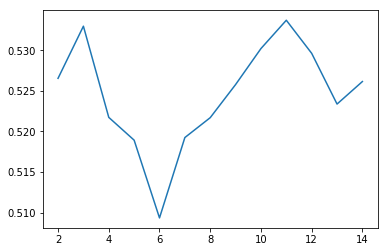

In [413]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=13, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=18, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=19, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

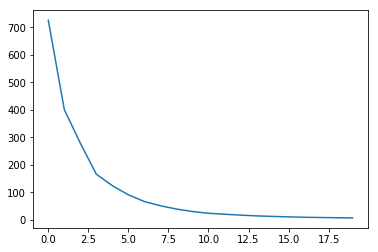

In [414]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_cluster)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [415]:
model_clus5.labels_

array([0, 0, 4, ..., 4, 0, 1])

In [416]:
# analysis of clusters formed
df_cluster.index = pd.RangeIndex(len(df_cluster.index))


In [417]:
df_cluster1 = pd.concat([df_cluster,pd.Series(model_clus5.labels_)], axis=1)

In [418]:
df_cluster1.columns = ['Score',  'ClusterID']
df_cluster1

Score  ClusterID
0     0.862549          0
1     0.394546          0
2     0.018853          4
3     0.294261          4
4    -0.005427          4
5    -0.989020          2
6     0.283553          4
7    -0.251998          1
8     0.135560          4
9     0.375593          0
10    0.260888          4
11    0.242565          4
12    0.675467          0
13    0.350569          0
14   -0.198658          1
15    0.732176          0
16   -0.171254          1
17    0.247908          4
18    0.124221          4
19    0.061487          4
20    0.302818          4
21   -0.371212          1
22    0.629519          0
23    1.056383          0
24   -0.420310          1
25    0.166021          4
26    0.016867          4
27   -0.313118          1
28   -0.500618          1
29    0.398244          0
30   -0.175910          1
31   -0.170479          1
32    0.016796          4
33    0.105294          4
34   -0.071272          4
35    0.217122          4
36    0.221732          4
37   -0.450635          1
38    0.413986          0
39    0.156724          4
40   -0.257210          1
41    0.674787          0
42    0.560003          0
43    0.299473          4
44    0.040125          4
45   -0.134567          1
46    0.183597          4
47    0.228352          4
48   -0.313921          1
49   -0.077065          4
50    0.184103          4
51    1.149560          0
52    0.460996          0
53   -0.165373          1
54   -0.098079          1
55    0.068380          4
56   -0.494345          1
57    0.401826          0
58    0.407259          0
59   -0.260783          1
60    0.452057          0
61    0.011562          4
62    0.220441          4
63   -0.064094          4
64    0.284587          4
65    0.076051          4
66    0.494982          0
67    0.013672          4
68    0.254637          4
69    0.028759          4
70   -0.363211          1
71    0.134850          4
72    0.204194          4
73    0.052120          4
74    0.761607          0
75   -0.069285          4
76    0.211334          4
77    0.219927          4
78   -0.544809          1
79   -0.215679          1
80    0.385767          0
81    0.018722          4
82   -0.024361          4
83   -0.764425          2
84   -0.134683          1
85   -0.454240          1
86   -0.334285          1
87   -0.122121          1
88   -0.137668          1
89   -0.080017          4
90   -0.903111          2
91   -0.585863          2
92   -0.517004          1
93    0.697971          0
94   -0.593957          2
95   -0.407766          1
96   -0.064686          4
97   -0.065976          4
98   -0.251130          1
99   -0.256768          1
100  -0.262415          1
101  -0.606449          2
102  -0.275633          1
103  -1.401264          2
104   0.621041          0
105  -0.544355          1
106  -0.673096          2
107  -0.316507          1
108  -0.220516          1
109  -0.144541          1
110  -0.070584          4
111  -0.566639          2
112  -0.290921          1
113  -0.359665          1
114  -0.273490          1
115  -0.238554          1
116  -0.469804          1
117  -0.489651          1
118   0.535342          0
119  -0.719120          2
120  -0.264113          1
121  -0.425319          1
122   0.108908          4
123  -0.512640          1
124  -0.884407          2
125  -1.569941          2
126  -0.455239          1
127  -0.268697          1
128  -0.144633          1
129  -0.181560          1
130  -0.313263          1
131  -0.804476          2
132   0.032482          4
133  -0.411292          1
134  -0.121710          1
135   0.468582          0
136  -1.556799          2
137   0.440954          0
138   0.259701          4
139  -0.072734          4
140   0.425117          0
141   0.207805          4
142   0.054298          4
143  -0.031594          4
144   0.426663          0
145   0.339003          4
146  -0.491265          1
147   0.206982          4
148   0.309001          4
149   0.030697          4
...        ...        ...
2911 -0.198187          1
2912 -0.997278          2
2913 

In [419]:
# =pd.DataFrame(df_km.groupby(["ClusterID"]).Score.mean())

In [420]:
df_cluster1.columns

Index(['Score', 'ClusterID'], dtype='object')

In [421]:
df_cluster2 = df_cluster1.groupby(['ClusterID'])['Score'].mean()


In [422]:

df_cluster2= pd.DataFrame(df_cluster2 )
df_cluster2 = df_cluster2.reset_index()
df_cluster2.columns = ['ClusterID', 'Mean Score']

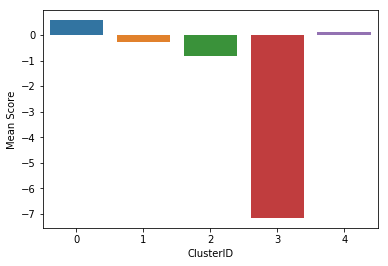

In [423]:
##Check the mean of each cluster assigned by K means
sns.barplot(x=df_cluster2.ClusterID, y=df_cluster2['Mean Score'])

In [424]:
## Sort the value as per final Mean score 
df_cluster2.sort_values(by='Mean Score',ascending=False,inplace=True)
df_cluster2

ClusterID  Mean Score
0          0    0.574418
4          4    0.108840
1          1   -0.279919
2          2   -0.813926
3          3   -7.151303

In [425]:
## Rank column on the basis of Mean score absolute value

df_cluster2["Predicted Overall Rating"]= df_cluster2["Mean Score"].abs().rank() 

In [426]:
df_cluster2

ClusterID  Mean Score  Predicted Overall Rating
0          0    0.574418                       3.0
4          4    0.108840                       1.0
1          1   -0.279919                       2.0
2          2   -0.813926                       4.0
3          3   -7.151303                       5.0

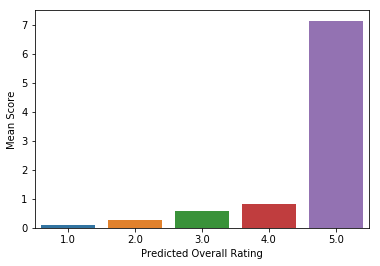

In [427]:
# Plot Final socre mean for Hospital Overall rating (Predicted )
sns.barplot(x=df_cluster2['Predicted Overall Rating'], y=df_cluster2['Mean Score'].abs())

In [428]:
## Get the actual rating and provider id 
Df_cluster2=pd.merge(df_cluster2,df_cluster1,how='left',on='ClusterID')

In [429]:
# Convert predictred rating to string 
Df_cluster2["Predicted Overall Rating"]=Df_cluster2["Predicted Overall Rating"].astype('int8')
Df_cluster2["Predicted Overall Rating"]=Df_cluster2["Predicted Overall Rating"].astype('str')

In [430]:
ab=pd.merge(Df_cluster2,Combine_df1, left_index=True, right_index=True)

In [431]:
ab.head()

ClusterID  Mean Score Predicted Overall Rating     Score  Provider ID  \
0          0    0.574418                        3  0.862549        10001   
1          0    0.574418                        3  0.394546        10005   
2          0    0.574418                        3  0.375593        10006   
3          0    0.574418                        3  0.675467        10007   
4          0    0.574418                        3  0.350569        10008   

  Hospital overall rating  Score_MORT_30_AMI  Score_MORT_30_COPD  \
0                       3               12.5                 9.3   
1                       3               16.0                 7.6   
2                       2               16.7                 7.1   
3                       3                NaN                 9.3   
4                       3                NaN                 8.2   

   Score_MORT_30_HF  Score_MORT_30_PN  Score_MORT_30_STK  Score_READM_30_AMI  \
0              12.4              15.5               15.4                16.5   
1              15.5              20.8               15.5                16.7   
2              15.6              18.2               17.9                16.1   
3              14.4              18.8               16.6                 NaN   
4              12.7              15.7                NaN                 NaN   

   Score_READM_30_COPD  Score_READM_30_HF  Score_READM_30_HIP_KNEE  \
0                 21.1               21.4                      5.1   
1                 18.0               21.9                      5.7   
2                 19.8               20.6                      5.0   
3                 19.9               21.1                      NaN   
4                 19.2               23.1                      NaN   

   Score_READM_30_HOSP_WIDE  Score_READM_30_PN  Score_READM_30_STK  \
0                      15.4               18.7                12.7   
1                      14.9               16.4                13.4   
2                      15.4               17.9                12.0   
3                      16.6               17.3                12.7   
4                      15.7               16.0                 NaN   

   Score_HAI_1_SIR  Score_HAI_1a_SIR  Score_HAI_2_SIR  Score_HAI_2a_SIR  \
0            1.740             2.433            1.427             2.307   
1            1.062             0.648            0.456             0.698   
2            0.341             0.443            0.641             0.801   
3              NaN               NaN            0.000               NaN   
4              NaN               NaN              NaN               NaN   

   Score_HAI_3_SIR  Score_HAI_5_SIR  Score_HAI_6_SIR  Score_COMP_HIP_KNEE  \
0            1.870            0.422            0.787                  3.8   
1            0.386            1.388            0.405                  3.0   
2            0.310            1.261            0.513                  3.8   
3              NaN              NaN            0.000                  NaN   
4              NaN              NaN            0.585                  NaN   

   Score_PSI_12_POSTOP_PULMEMB_DVT  Score_PSI_13_POST_SEPSIS  \
0                             3.32                      5.72   
1                             5.63                      9.18   
2                             3.85                       NaN   
3                             4.57                      9.89   
4                              NaN                       NaN   

   Score_PSI_14_POSTOP_DEHIS  Score_PSI_15_ACC_LAC  Score_PSI_3_ULCER  \
0                       2.72                  1.35               0.07   
1                       2.11                  1.25               0.14   
2                       2.50                  1.93               0.09   
3                        NaN                  1.20               0.35   
4                        NaN                  1.41               0.45   

   Score_PSI_4_SURG_COMP  Score_PSI_6_IAT_PTX  Score_PSI_7_CVCBI  \
0       

In [432]:
from sklearn.metrics import confusion_matrix
y_true =ab['Hospital overall rating'] 
y_pred = ab['Predicted Overall Rating']
confusion_matrix(y_true, y_pred)


array([[ 65,  26,  25,   1,   0],
       [273, 187, 157,  39,   3],
       [565, 450, 301, 110,   0],
       [304, 258, 108,  79,   0],
       [ 40,  42,  18,  10,   0]], dtype=int64)

In [433]:
confusion_matrix(y_true, y_pred).ravel()

array([ 65,  26,  25,   1,   0, 273, 187, 157,  39,   3, 565, 450, 301,
       110,   0, 304, 258, 108,  79,   0,  40,  42,  18,  10,   0],
      dtype=int64)

In [434]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
actual = ab['Hospital overall rating']
predicted = ab['Predicted Overall Rating']
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :') 
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted)) 

Confusion Matrix :
[[ 65  26  25   1   0]
 [273 187 157  39   3]
 [565 450 301 110   0]
 [304 258 108  79   0]
 [ 40  42  18  10   0]]
Accuracy Score : 0.20646847435478602
Report : 
              precision    recall  f1-score   support

           1       0.05      0.56      0.10       117
           2       0.19      0.28      0.23       659
           3       0.49      0.21      0.30      1426
           4       0.33      0.11      0.16       749
           5       0.00      0.00      0.00       110

   micro avg       0.21      0.21      0.21      3061
   macro avg       0.21      0.23      0.16      3061
weighted avg       0.35      0.21      0.23      3061



-Accuracy for Factor anlaysis is 20% which is very low so we Chose Linear regression model for recommedation